Proyecto: Predicción de Lluvia - Colombia

# LIMPIEZA, CARGA Y UNIFICACIÓN DE ARCHIVOS

## Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import pandas as pd
import re
import os
#import plotly.express as pex
#from plotly.subplots import make_subplots
#import plotly.graph_objects as go
import plotly.colors as colors
from scipy.stats import mode
from scipy.stats import tstd
#from statistics import multimode
import folium  
from   folium.plugins import HeatMap

*Sistema de archivos*

    ./
    
    ./Proyecto/
        ./Proyecto/Proyecto_bootcamp_cuaderno.ipynb

    ./Datasets/
        ./Datasets/...... .csv
    
    ./CleanDatasets/
        ./CleanDatasets/.....  .parquet


A continuación se listan los archivos de la segunda carpeta que contiene los datasets:

    - Catálogo nacional de estaciones (Contine el listado de las estaciones)
    - Datos de estaciones IDEAM y terceros (Contiene mediciones de diversas estaciones propias y externas al IDEAM)
    - Datos hidrometeorológicos (Mediciones de temperatura)
    - Presión atmosférica  

## Conversión de Formato CSV a PARQUET

### Datos Precipitaciones

Se importa el primer documento previo a la limpieza. Se inicia con el archivo de menor tamaño. Todos los datos corresponden a precipitación y tienen la misma unidad de medida.

In [28]:
df = pd.read_csv('../Datasets/Precipitaci_n_20241016(vaupes).csv',
                 sep=',',
                 #nrows=10
                 )
df

CodigoEstacion  CodigoSensor        FechaObservacion  ValorObservado  \
0           42077020           240  11/01/2023 07:30:00 PM             0.2   
1           42077020           240  11/01/2023 11:10:00 PM             0.0   
2           42077020           240  11/01/2023 03:10:00 PM             0.0   
3           42077020           240  11/01/2023 09:30:00 PM             0.0   
4           42077020           240  11/01/2023 05:40:00 PM             0.0   
...              ...           ...                     ...             ...   
9147        42077020           240  06/22/2024 02:20:00 AM             0.0   
9148        42077020           240  06/22/2024 01:30:00 AM             0.0   
9149        42077020           240  06/22/2024 01:40:00 AM             0.0   
9150        42077020           240  06/22/2024 01:20:00 AM             0.0   
9151        42077020           240  06/22/2024 02:00:00 AM             0.0   

     NombreEstacion Departamento Municipio ZonaHidrografica  Latitud  \
0              MITU       VAUPES      MITÚ           VAUPES     1.26   
1              MITU       VAUPES      MITÚ           VAUPES     1.26   
2              MITU       VAUPES      MITÚ           VAUPES     1.26   
3              MITU       VAUPES      MITÚ           VAUPES     1.26   
4              MITU       VAUPES      MITÚ           VAUPES     1.26   
...             ...          ...       ...              ...      ...   
9147           MITU       VAUPES      MITÚ           VAUPES     1.26   
9148           MITU       VAUPES      MITÚ           VAUPES     1.26   
9149           MITU       VAUPES      MITÚ           VAUPES     1.26   
9150           MITU       VAUPES      MITÚ           VAUPES     1.26   
9151           MITU       VAUPES      MITÚ           VAUPES     1.26   

      Longitud DescripcionSensor UnidadMedida  
0       -70.24     PRECIPITACIÓN           mm  
1       -70.24     PRECIPITACIÓN           mm  
2       -70.24     PRECIPITACIÓN           mm  
3       -70.24     PRECIPITACIÓN           mm  
4       -70.24     PRECIPITACIÓN           mm  
...        ...               ...          ...  
9147    -70.24     PRECIPITACIÓN           mm  
9148    -70.24     PRECIPITACIÓN           mm  
9149    -70.24     PRECIPITACIÓN           mm  
9150    -70.24     PRECIPITACIÓN           mm  
9151    -70.24     PRECIPITACIÓN           mm  

[9152 rows x 12 columns]

En la siguiente celda se imprime un pequeño resumen. Es importante resaltar que no hay datos nulos y la necesidad de cambiar el formato de cada columna por uno mas adecuado que reduzca el tamaño del dataframe.

In [29]:
size_0=df.memory_usage(deep=True).sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9152 entries, 0 to 9151
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CodigoEstacion     9152 non-null   int64  
 1   CodigoSensor       9152 non-null   int64  
 2   FechaObservacion   9152 non-null   object 
 3   ValorObservado     9152 non-null   float64
 4   NombreEstacion     9152 non-null   object 
 5   Departamento       9152 non-null   object 
 6   Municipio          9152 non-null   object 
 7   ZonaHidrografica   9152 non-null   object 
 8   Latitud            9152 non-null   float64
 9   Longitud           9152 non-null   float64
 10  DescripcionSensor  9152 non-null   object 
 11  UnidadMedida       9152 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 858.1+ KB


#### Primera exploración - Vaupes

Se importa nuevamente el archivo csv, seleccionando las columnas relevantes y eligiendo un formato adeacuado para cada columna.

In [30]:
df = pd.read_csv('../Datasets/Precipitaci_n_20241016(vaupes).csv',
                 sep=',',
                 usecols= [0,1,2,3,4,5,6,7,8,9],
                 dtype={0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category'}
                 )
df

CodigoEstacion CodigoSensor        FechaObservacion  ValorObservado  \
0        0042077020         0240  11/01/2023 07:30:00 PM             0.2   
1        0042077020         0240  11/01/2023 11:10:00 PM             0.0   
2        0042077020         0240  11/01/2023 03:10:00 PM             0.0   
3        0042077020         0240  11/01/2023 09:30:00 PM             0.0   
4        0042077020         0240  11/01/2023 05:40:00 PM             0.0   
...             ...          ...                     ...             ...   
9147     0042077020         0240  06/22/2024 02:20:00 AM             0.0   
9148     0042077020         0240  06/22/2024 01:30:00 AM             0.0   
9149     0042077020         0240  06/22/2024 01:40:00 AM             0.0   
9150     0042077020         0240  06/22/2024 01:20:00 AM             0.0   
9151     0042077020         0240  06/22/2024 02:00:00 AM             0.0   

     NombreEstacion Departamento Municipio ZonaHidrografica Latitud Longitud  
0              MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
1              MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
2              MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
3              MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
4              MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
...             ...          ...       ...              ...     ...      ...  
9147           MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
9148           MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
9149           MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
9150           MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
9151           MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  

[9152 rows x 10 columns]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9152 entries, 0 to 9151
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   CodigoEstacion    9152 non-null   category
 1   CodigoSensor      9152 non-null   category
 2   FechaObservacion  9152 non-null   object  
 3   ValorObservado    9152 non-null   float32 
 4   NombreEstacion    9152 non-null   category
 5   Departamento      9152 non-null   category
 6   Municipio         9152 non-null   category
 7   ZonaHidrografica  9152 non-null   category
 8   Latitud           9152 non-null   category
 9   Longitud          9152 non-null   category
dtypes: category(8), float32(1), object(1)
memory usage: 178.9+ KB


Se muestra una comparación entre el tamaño del dataframe tras el cambio de formato a las columnas

In [32]:
size_f=df.memory_usage(deep=True).sum()
print(size_f/size_0)

0.1759772734217371


**Formato de fecha**

In [33]:
df.loc[:,'FechaObservacion'] = pd.to_datetime(df['FechaObservacion'], format='%m/%d/%Y %I:%M:%S %p')

In [34]:
df

CodigoEstacion CodigoSensor     FechaObservacion  ValorObservado  \
0        0042077020         0240  2023-11-01 19:30:00             0.2   
1        0042077020         0240  2023-11-01 23:10:00             0.0   
2        0042077020         0240  2023-11-01 15:10:00             0.0   
3        0042077020         0240  2023-11-01 21:30:00             0.0   
4        0042077020         0240  2023-11-01 17:40:00             0.0   
...             ...          ...                  ...             ...   
9147     0042077020         0240  2024-06-22 02:20:00             0.0   
9148     0042077020         0240  2024-06-22 01:30:00             0.0   
9149     0042077020         0240  2024-06-22 01:40:00             0.0   
9150     0042077020         0240  2024-06-22 01:20:00             0.0   
9151     0042077020         0240  2024-06-22 02:00:00             0.0   

     NombreEstacion Departamento Municipio ZonaHidrografica Latitud Longitud  
0              MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
1              MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
2              MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
3              MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
4              MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
...             ...          ...       ...              ...     ...      ...  
9147           MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
9148           MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
9149           MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
9150           MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  
9151           MITU       VAUPES      MITÚ           VAUPES    1.26   -70.24  

[9152 rows x 10 columns]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9152 entries, 0 to 9151
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   CodigoEstacion    9152 non-null   category
 1   CodigoSensor      9152 non-null   category
 2   FechaObservacion  9152 non-null   object  
 3   ValorObservado    9152 non-null   float32 
 4   NombreEstacion    9152 non-null   category
 5   Departamento      9152 non-null   category
 6   Municipio         9152 non-null   category
 7   ZonaHidrografica  9152 non-null   category
 8   Latitud           9152 non-null   category
 9   Longitud          9152 non-null   category
dtypes: category(8), float32(1), object(1)
memory usage: 178.9+ KB


In [39]:
df.to_parquet('../CleanDatasets/rain_vaupes.parquet')

In [69]:
namesFiles = os.listdir('../Datasets')
namesFiles = [re.findall(r'\((\w*)\)',x)[0] for x in namesFiles]
print(namesFiles)

['amazonas', 'antioquia', 'arauca', 'atlantico1', 'atlantico2', 'bogota1', 'bogota2', 'bogota3', 'bolivar1', 'bolivar2', 'boyaca', 'caldas', 'caqueta1', 'caqueta2', 'casanare', 'cauca', 'cesar', 'choco', 'choco1', 'cordoba1', 'cordoba2', 'cundinamarca', 'guainia', 'guajira', 'guaviare', 'huila', 'magdalena', 'meta', 'narino', 'narino1', 'nill', 'norte_de_santander', 'putumayo', 'quindio', 'risaralda', 'sanandres1', 'sanandres2', 'sanandres3', 'sanandres4', 'santander', 'sucre', 'tolima', 'valle_del_cauca', 'vaupes', 'vaupes1', 'vichada']


#### Todos los departamentos

In [70]:
print(namesFiles)
print(len(namesFiles))

['amazonas', 'antioquia', 'arauca', 'atlantico1', 'atlantico2', 'bogota1', 'bogota2', 'bogota3', 'bolivar1', 'bolivar2', 'boyaca', 'caldas', 'caqueta1', 'caqueta2', 'casanare', 'cauca', 'cesar', 'choco', 'choco1', 'cordoba1', 'cordoba2', 'cundinamarca', 'guainia', 'guajira', 'guaviare', 'huila', 'magdalena', 'meta', 'narino', 'narino1', 'nill', 'norte_de_santander', 'putumayo', 'quindio', 'risaralda', 'sanandres1', 'sanandres2', 'sanandres3', 'sanandres4', 'santander', 'sucre', 'tolima', 'valle_del_cauca', 'vaupes', 'vaupes1', 'vichada']
46


In [47]:
for name in namesFiles[:]:
    nameFile = '../Datasets/Precipitaci_n_20241016('+ name +').csv'
    df_dept = pd.read_csv(nameFile,
                 sep=',',
                 usecols= [0,1,2,3,4,5,6,7,8,9],
                 dtype={0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category'}
                 )
    df_dept['FechaObservacion'] = pd.to_datetime(df_dept['FechaObservacion'], format='%m/%d/%Y %I:%M:%S %p')
    nulls = df_dept.count(axis=1).sum()
    size = df_dept.shape[0]*df_dept.shape[1]
    if nulls-size != 0:
        print(f'{nulls-size} nulls in {name}, parquet file can not created')
    else:
        df_dept.to_parquet(f'../CleanDatasets/rain_{name}.parquet')
        print(f'Not nulls in {name}, parquet file created')


Not nulls in amazonas, parquet file created
Not nulls in antioquia, parquet file created
Not nulls in arauca, parquet file created
Not nulls in atlantico1, parquet file created
Not nulls in atlantico2, parquet file created
Not nulls in bogota1, parquet file created
Not nulls in bogota2, parquet file created
Not nulls in bogota3, parquet file created
Not nulls in bolivar1, parquet file created
Not nulls in bolivar2, parquet file created
Not nulls in boyaca, parquet file created
Not nulls in caldas, parquet file created
Not nulls in caqueta1, parquet file created
Not nulls in caqueta2, parquet file created
Not nulls in casanare, parquet file created
Not nulls in cauca, parquet file created
Not nulls in cesar, parquet file created
Not nulls in choco, parquet file created
Not nulls in choco1, parquet file created
Not nulls in cordoba1, parquet file created
Not nulls in cordoba2, parquet file created
Not nulls in cundinamarca, parquet file created
Not nulls in guainia, parquet file created


### Datos Estaciones IDEAM

In [4]:
namesFiles2 = os.listdir('../Datasets2')
namesFiles2 = [x for x in namesFiles2]
print(namesFiles2)

['Cat_logo_Nacional_de_Estaciones_del_IDEAM_20241017.csv', 'Datos_de_Estaciones_de_IDEAM_y_de_Terceros_20241017.csv', 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(0).csv', 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(1).csv', 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(2).csv', 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(3).csv', 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(4).csv', 'Presi_n_Atmosf_rica_20241017.csv']


La ruta de acceso al archivo de Datos estaciones IDEAM es f'../Datasets2/{namesFiles2[1]}'

In [49]:
df_estaciones = pd.read_csv(f'../Datasets2/{namesFiles2[1]}',
                            sep=',',
                            nrows=3
)
df_estaciones

CodigoEstacion  CodigoSensor        FechaObservacion  ValorObservado  \
0      2120500204            69  10/15/2024 09:04:00 PM            15.8   
1      2120500204            70  10/15/2024 09:59:00 PM            15.5   
2      2120500204            69  10/15/2024 10:25:00 PM            15.7   

        NombreEstacion Departamento   Municipio ZonaHidrografica   Latitud  \
0  IDEAM PUENTE ARANDA       BOGOTÁ  BOGOTÁ D.C   ALTO MAGDALENA  4.621556   
1  IDEAM PUENTE ARANDA       BOGOTÁ  BOGOTÁ D.C   ALTO MAGDALENA  4.621556   
2  IDEAM PUENTE ARANDA       BOGOTÁ  BOGOTÁ D.C   ALTO MAGDALENA  4.621556   

    Longitud                  DescripcionSensor UnidadMedida  \
0 -74.104709  TEMPERATURA DEL AIRE MÁXIMA A 2 m           °C   
1 -74.104709  TEMPERATURA MÍNIMA DEL AIRE A 2 m           °C   
2 -74.104709  TEMPERATURA DEL AIRE MÁXIMA A 2 m           °C   

                                             Entidad  
0  INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...  
1  INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...  
2  INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...

In [50]:
df_estaciones = pd.read_csv(f'../Datasets2/{namesFiles2[1]}',
                            sep=',',
                            dtype={0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category',10:'category',11:'category',12:'category'}
                            #nrows=3
)
df_estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202642 entries, 0 to 202641
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   CodigoEstacion     202642 non-null  category
 1   CodigoSensor       202642 non-null  category
 2   FechaObservacion   202642 non-null  object  
 3   ValorObservado     202642 non-null  float32 
 4   NombreEstacion     202642 non-null  category
 5   Departamento       202642 non-null  category
 6   Municipio          202642 non-null  category
 7   ZonaHidrografica   202642 non-null  category
 8   Latitud            202642 non-null  category
 9   Longitud           202642 non-null  category
 10  DescripcionSensor  202642 non-null  category
 11  UnidadMedida       202642 non-null  category
 12  Entidad            202642 non-null  category
dtypes: category(11), float32(1), object(1)
memory usage: 5.3+ MB


Se evidencia que no hay valores nulos. Hacemos una conversión a formato de fecha y almacenamos el archivo en formato .parquet

In [51]:
df_estaciones['FechaObservacion'] = pd.to_datetime(df_estaciones['FechaObservacion'], format='%m/%d/%Y %I:%M:%S %p')
df_estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202642 entries, 0 to 202641
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CodigoEstacion     202642 non-null  category      
 1   CodigoSensor       202642 non-null  category      
 2   FechaObservacion   202642 non-null  datetime64[ns]
 3   ValorObservado     202642 non-null  float32       
 4   NombreEstacion     202642 non-null  category      
 5   Departamento       202642 non-null  category      
 6   Municipio          202642 non-null  category      
 7   ZonaHidrografica   202642 non-null  category      
 8   Latitud            202642 non-null  category      
 9   Longitud           202642 non-null  category      
 10  DescripcionSensor  202642 non-null  category      
 11  UnidadMedida       202642 non-null  category      
 12  Entidad            202642 non-null  category      
dtypes: category(11), datetime64[ns](1), float32(

In [53]:
df_estaciones.to_parquet('../CleanDatasets2/estaciones.parquet')

### Datos Presión Atmosférica

In [5]:
namesFiles2

['Cat_logo_Nacional_de_Estaciones_del_IDEAM_20241017.csv',
 'Datos_de_Estaciones_de_IDEAM_y_de_Terceros_20241017.csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(0).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(1).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(2).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(3).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(4).csv',
 'Presi_n_Atmosf_rica_20241017.csv']

La ruta de acceso a los datos de presión atmosférica es: f '../Datasets2/{namesFiles2[-1]}']

In [6]:
df_presion = pd.read_csv(
                        f'../Datasets2/{namesFiles2[-1]}',
                        sep=',',
                        nrows=3
)
df_presion

CodigoEstacion  CodigoSensor        FechaObservacion  ValorObservado  \
0        36015020           255  10/03/2017 06:00:00 AM           992.5   
1        21195190           255  02/14/2014 05:00:00 AM           785.2   
2        21015050           255  09/27/2013 06:00:00 PM           805.3   

      NombreEstacion  Departamento       Municipio ZonaHidrografica   Latitud  \
0  EL DIAMANTE - AUT      CASANARE  PAZ DE ARIPORO             META  5.816194   
1        PASCA - AUT  CUNDINAMARCA           PASCA   ALTO MAGDALENA  4.310111   
2      PURACE  - AUT         HUILA     SAN AGUSTÍN   ALTO MAGDALENA  1.925917   

    Longitud         DescripcionSensor UnidadMedida  
0 -71.419833  Presión Atmosferica (1h)          HPa  
1 -74.311750  Presión Atmosferica (1h)          HPa  
2 -76.427556  Presión Atmosferica (1h)          HPa

In [7]:
df_presion = pd.read_csv(
                        f'../Datasets2/{namesFiles2[-1]}',
                        sep=',',
                        dtype={0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category',10:'category',11:'category'}
)
df_presion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22611008 entries, 0 to 22611007
Data columns (total 12 columns):
 #   Column             Dtype   
---  ------             -----   
 0   CodigoEstacion     category
 1   CodigoSensor       category
 2   FechaObservacion   object  
 3   ValorObservado     float32 
 4   NombreEstacion     category
 5   Departamento       category
 6   Municipio          category
 7   ZonaHidrografica   category
 8   Latitud            category
 9   Longitud           category
 10  DescripcionSensor  category
 11  UnidadMedida       category
dtypes: category(10), float32(1), object(1)
memory usage: 582.3+ MB


In [9]:
df_presion['FechaObservacion'] = pd.to_datetime(df_presion['FechaObservacion'],format='%m/%d/%Y %I:%M:%S %p')
df_presion

CodigoEstacion CodigoSensor    FechaObservacion  ValorObservado  \
0            0036015020         0255 2017-10-03 06:00:00      992.500000   
1            0021195190         0255 2014-02-14 05:00:00      785.200012   
2            0021015050         0255 2013-09-27 18:00:00      805.299988   
3            0021115010         0255 2005-11-28 10:00:00      958.500000   
4            0028035060         0255 2008-04-08 04:00:00      988.700012   
...                 ...          ...                 ...             ...   
22611003     0048015050         0258 2024-10-16 23:04:00     1000.500000   
22611004     0048015050         0258 2024-10-16 09:08:00     1004.099976   
22611005     0016015501         0258 2024-10-16 19:02:00      972.900024   
22611006     0048015040         0255 2024-10-16 22:40:00      997.400024   
22611007     0011175000         0255 2024-10-16 14:00:00     1006.000000   

                   NombreEstacion        Departamento       Municipio  \
0               EL DIAMANTE - AUT            CASANARE  PAZ DE ARIPORO   
1                     PASCA - AUT        CUNDINAMARCA           PASCA   
2                   PURACE  - AUT               HUILA     SAN AGUSTÍN   
3                DESIERTO TATACOA               HUILA      VILLAVIEJA   
4                 FEDEARROZ - AUT               CESAR      VALLEDUPAR   
...                           ...                 ...             ...   
22611003  AEROPUERTO VASQUEZ COBO            AMAZONAS         LETICIA   
22611004  AEROPUERTO VASQUEZ COBO            AMAZONAS         LETICIA   
22611005   AEROPUERTO CAMILO DAZA  NORTE DE SANTANDER          CÚCUTA   
22611006            PUERTO NARIÑO            AMAZONAS   PUERTO NARIÑO   
22611007                   ATRATO               CHOCO        CÉRTEGUI   

             ZonaHidrografica       Latitud      Longitud  \
0                        META   5.816194444  -71.41983333   
1              ALTO MAGDALENA   4.310111111     -74.31175   
2              ALTO MAGDALENA   1.925916667  -76.42755556   
3              ALTO MAGDALENA         3.234       -75.168   
4                       CESAR   10.46361111  -73.24805556   
...                       ...           ...           ...   
22611003  AMAZONAS - DIRECTOS  -4.193861111  -69.94091667   
22611004  AMAZONAS - DIRECTOS  -4.193861111  -69.94091667   
22611005            CATATUMBO       7.93028     -72.50917   
22611006  AMAZONAS - DIRECTOS  -3.780305556  -70.36263889   
22611007      ATRATO - DARIÉN      5.585776    -76.649978   

                   DescripcionSensor UnidadMedida  
0           Presión Atmosferica (1h)          HPa  
1           Presión Atmosferica (1h)          HPa  
2           Presión Atmosferica (1h)          HPa  
3           Presión Atmosferica (1h)          HPa  
4           Presión Atmosferica (1h)          HPa  
...                              ...          ...  
22611003  GPRS - PRESIÓN ATMOSFÉRICA          hPA  
22611004  GPRS - PRESIÓN ATMOSFÉRICA          hPA  
22611005  GPRS - PRESIÓN ATMOSFÉRICA          hPA  
22611006         PRESIÓN ATMOSFÉRICA          hPa  
22611007         PRESIÓN ATMOSFÉRICA          hPa  

[22611008 rows x 12 columns]

In [10]:
df_presion.count()

CodigoEstacion       22611008
CodigoSensor         22611008
FechaObservacion     22611008
ValorObservado       22611008
NombreEstacion       22611008
Departamento         22611008
Municipio            22611008
ZonaHidrografica     22611008
Latitud              22611008
Longitud             22611008
DescripcionSensor    22611008
UnidadMedida         22611008
dtype: int64

Se observa con la función .count() que el tamaño de valores no nulos es igual al índice del rango del dataframe encontrado en la celda anterior.

In [12]:
df_presion

CodigoEstacion CodigoSensor    FechaObservacion  ValorObservado  \
0            0036015020         0255 2017-10-03 06:00:00      992.500000   
1            0021195190         0255 2014-02-14 05:00:00      785.200012   
2            0021015050         0255 2013-09-27 18:00:00      805.299988   
3            0021115010         0255 2005-11-28 10:00:00      958.500000   
4            0028035060         0255 2008-04-08 04:00:00      988.700012   
...                 ...          ...                 ...             ...   
22611003     0048015050         0258 2024-10-16 23:04:00     1000.500000   
22611004     0048015050         0258 2024-10-16 09:08:00     1004.099976   
22611005     0016015501         0258 2024-10-16 19:02:00      972.900024   
22611006     0048015040         0255 2024-10-16 22:40:00      997.400024   
22611007     0011175000         0255 2024-10-16 14:00:00     1006.000000   

                   NombreEstacion        Departamento       Municipio  \
0               EL DIAMANTE - AUT            CASANARE  PAZ DE ARIPORO   
1                     PASCA - AUT        CUNDINAMARCA           PASCA   
2                   PURACE  - AUT               HUILA     SAN AGUSTÍN   
3                DESIERTO TATACOA               HUILA      VILLAVIEJA   
4                 FEDEARROZ - AUT               CESAR      VALLEDUPAR   
...                           ...                 ...             ...   
22611003  AEROPUERTO VASQUEZ COBO            AMAZONAS         LETICIA   
22611004  AEROPUERTO VASQUEZ COBO            AMAZONAS         LETICIA   
22611005   AEROPUERTO CAMILO DAZA  NORTE DE SANTANDER          CÚCUTA   
22611006            PUERTO NARIÑO            AMAZONAS   PUERTO NARIÑO   
22611007                   ATRATO               CHOCO        CÉRTEGUI   

             ZonaHidrografica       Latitud      Longitud  \
0                        META   5.816194444  -71.41983333   
1              ALTO MAGDALENA   4.310111111     -74.31175   
2              ALTO MAGDALENA   1.925916667  -76.42755556   
3              ALTO MAGDALENA         3.234       -75.168   
4                       CESAR   10.46361111  -73.24805556   
...                       ...           ...           ...   
22611003  AMAZONAS - DIRECTOS  -4.193861111  -69.94091667   
22611004  AMAZONAS - DIRECTOS  -4.193861111  -69.94091667   
22611005            CATATUMBO       7.93028     -72.50917   
22611006  AMAZONAS - DIRECTOS  -3.780305556  -70.36263889   
22611007      ATRATO - DARIÉN      5.585776    -76.649978   

                   DescripcionSensor UnidadMedida  
0           Presión Atmosferica (1h)          HPa  
1           Presión Atmosferica (1h)          HPa  
2           Presión Atmosferica (1h)          HPa  
3           Presión Atmosferica (1h)          HPa  
4           Presión Atmosferica (1h)          HPa  
...                              ...          ...  
22611003  GPRS - PRESIÓN ATMOSFÉRICA          hPA  
22611004  GPRS - PRESIÓN ATMOSFÉRICA          hPA  
22611005  GPRS - PRESIÓN ATMOSFÉRICA          hPA  
22611006         PRESIÓN ATMOSFÉRICA          hPa  
22611007         PRESIÓN ATMOSFÉRICA          hPa  

[22611008 rows x 12 columns]

In [ ]:
df_presion.to_parquet('../CleanDatasets2/presion.parquet')

### Datos Temperatura

Los datos de temperatura se distribuyen en 5 archivos csv distintos, todos con las mismas columnas. La ruta de acceso a los archivos es 

- '../Datasets2/Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(*)' Donde * es un valor entre 0 y 4

In [60]:
namesFiles2[2:-1]

['Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(0).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(1).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(2).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(3).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(4).csv']

In [61]:
df_temp = pd.read_csv(
                        f'../Datasets2/{namesFiles2[2]}',
                        sep=',',
                        nrows=3
)
df_temp

CodigoEstacion  CodigoSensor        FechaObservacion  ValorObservado  \
0        48015050            71  01/04/2024 09:58:00 PM            21.1   
1        15065180            71  01/04/2024 07:46:00 PM            22.3   
2      3502500135            71  01/04/2024 03:56:00 AM            17.0   

              NombreEstacion  Departamento   Municipio     ZonaHidrografica  \
0    AEROPUERTO VASQUEZ COBO      AMAZONAS     LETICIA  AMAZONAS - DIRECTOS   
1  AEROPUERTO ALM. PADILLA -    LA GUAJIRA    RIOHACHA     CARIBE - GUAJIRA   
2  GUAYABETAL POLLO OLIMPICO  CUNDINAMARCA  GUAYABETAL                 META   

     Latitud   Longitud                  DescripcionSensor UnidadMedida  
0  -4.193861 -69.940917  GPRS - TEMPERATURA DEL AIRE A 2 m           °C  
1  11.528444 -72.917722  GPRS - TEMPERATURA DEL AIRE A 2 m           °C  
2   4.225530 -73.814810  GPRS - TEMPERATURA DEL AIRE A 2 m           °C

In [62]:
df_temp = pd.read_csv(
                        f'../Datasets2/{namesFiles2[2]}',
                        sep=',',
                        dtype= {0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category',10:'category',11:'category'}         
                    )
df_temp

CodigoEstacion CodigoSensor        FechaObservacion  ValorObservado  \
0           0048015050         0071  01/04/2024 09:58:00 PM       21.100000   
1           0015065180         0071  01/04/2024 07:46:00 PM       22.299999   
2           3502500135         0071  01/04/2024 03:56:00 AM       17.000000   
3           0016015501         0071  01/04/2024 04:30:00 PM       28.500000   
4           0026125710         0071  01/04/2024 06:58:00 AM       20.900000   
...                ...          ...                     ...             ...   
4101303     0015015050         0071  10/16/2024 10:08:00 AM       29.700001   
4101304     0026125710         0071  10/16/2024 05:32:00 AM       18.500000   
4101305     0015015050         0071  10/16/2024 07:20:00 PM       28.000000   
4101306     0017015010         0071  10/16/2024 01:04:00 PM       26.900000   
4101307     0015015050         0071  10/16/2024 02:26:00 PM       31.100000   

                      NombreEstacion  \
0            AEROPUERTO VASQUEZ COBO   
1          AEROPUERTO ALM. PADILLA -   
2          GUAYABETAL POLLO OLIMPICO   
3             AEROPUERTO CAMILO DAZA   
4                AEROPUERTO MATECANA   
...                              ...   
4101303     AEROPUERTO SIMON BOLIVAR   
4101304          AEROPUERTO MATECANA   
4101305     AEROPUERTO SIMON BOLIVAR   
4101306  AEROPUERTO SESQUICENTENARIO   
4101307     AEROPUERTO SIMON BOLIVAR   

                                              Departamento    Municipio  \
0                                                 AMAZONAS      LETICIA   
1                                               LA GUAJIRA     RIOHACHA   
2                                             CUNDINAMARCA   GUAYABETAL   
3                                       NORTE DE SANTANDER       CÚCUTA   
4                                                RISARALDA      PEREIRA   
...                                                    ...          ...   
4101303                                          MAGDALENA  SANTA MARTA   
4101304                                          RISARALDA      PEREIRA   
4101305                                          MAGDALENA  SANTA MARTA   
4101306  ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA...   SAN ANDRÉS   
4101307                                          MAGDALENA  SANTA MARTA   

            ZonaHidrografica      Latitud       Longitud  \
0        AMAZONAS - DIRECTOS  -4.19386111   -69.94091667   
1           CARIBE - GUAJIRA   11.5284444   -72.91772222   
2                       META      4.22553      -73.81481   
3                  CATATUMBO      7.93028      -72.50917   
4                      CAUCA     4.812675   -75.73951944   
...                      ...          ...            ...   
4101303     CARIBE - GUAJIRA   11.1146944  -74.231027778   
4101304                CAUCA     4.812675  -75.739519444   
4101305     CARIBE - GUAJIRA   11.1146944  -74.231027778   
4101306         ISLAS CARIBE    12.587849     -81.701117   
4101307     CARIBE - GUAJIRA   11.1146944  -74.231027778   

                         DescripcionSensor UnidadMedida  
0        GPRS - TEMPERATURA DEL AIRE A 2 m           °C  
1        GPRS - TEMPERATURA DEL AIRE A 2 m           °C  
2        GPRS - TEMPERATURA DEL AIRE A 2 m           °C  
3        GPRS - TEMPERATURA DEL AIRE A 2 m           °C  
4        GPRS - TEMPERATURA DEL AIRE A 2 m           °C  
...                                    ...          ...  
4101303  GPRS - TEMPERATURA DEL AIRE A 2 m           °C  
4101304  GPRS - TEMPERATURA DEL AIRE A 2 m           °C  
4101305  GPRS - TEMPERATURA DEL AIRE A 2 m           °C  
4101306  GPRS - TEMPERATURA DEL AIRE A 2 m           °C  
4101307  GPRS - TEMPERATURA DEL AIRE A 2 m           °C  

[4101308 rows x 12 columns]

In [63]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101308 entries, 0 to 4101307
Data columns (total 12 columns):
 #   Column             Dtype   
---  ------             -----   
 0   CodigoEstacion     category
 1   CodigoSensor       category
 2   FechaObservacion   object  
 3   ValorObservado     float32 
 4   NombreEstacion     category
 5   Departamento       category
 6   Municipio          category
 7   ZonaHidrografica   category
 8   Latitud            category
 9   Longitud           category
 10  DescripcionSensor  category
 11  UnidadMedida       category
dtypes: category(10), float32(1), object(1)
memory usage: 86.1+ MB


In [64]:
df_temp['FechaObservacion'] = pd.to_datetime(df_temp['FechaObservacion'], format='%m/%d/%Y %I:%M:%S %p')
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101308 entries, 0 to 4101307
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   CodigoEstacion     category      
 1   CodigoSensor       category      
 2   FechaObservacion   datetime64[ns]
 3   ValorObservado     float32       
 4   NombreEstacion     category      
 5   Departamento       category      
 6   Municipio          category      
 7   ZonaHidrografica   category      
 8   Latitud            category      
 9   Longitud           category      
 10  DescripcionSensor  category      
 11  UnidadMedida       category      
dtypes: category(10), datetime64[ns](1), float32(1)
memory usage: 86.1 MB


In [65]:
df_temp.to_parquet('../CleanDatasets2/Temp_0.parquet')

In [66]:
index_temp = 1
for i in namesFiles2[3:-1]:
    df_temp = pd.read_csv(
                        f'../Datasets2/{i}',
                        sep=',',
                        dtype= {0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category',10:'category',11:'category'}         
                    )
    df_temp['FechaObservacion'] = pd.to_datetime(df_temp['FechaObservacion'], format='%m/%d/%Y %I:%M:%S %p')
    df_temp.to_parquet(f'../CleanDatasets2/Temp_{str(index_temp)}.parquet')
    index_temp += 1

### Datos Humedad

La ruta de acceso a los datos de humedad es: f '../Datasets2/{r'Humedad.*'}']

In [2]:
df_humedad = pd.read_csv(
                        f'../Datasets2/Humedad_del_Aire_2_metros_20241109.csv',
                        sep=',',
                        nrows=3
)
df_humedad

CodigoEstacion  CodigoSensor        FechaObservacion  ValorObservado  \
0        21015502            27  12/21/2018 04:45:00 PM        76.57249   
1        21215501            27  06/06/2016 05:55:00 AM        87.00000   
2        26185501            27  09/07/2016 07:50:00 PM        88.00000   

        NombreEstacion Departamento    Municipio ZonaHidrografica   Latitud  \
0   SAN AGUSTIN  - AUT        HUILA  SAN AGUSTÍN   ALTO MAGDALENA  1.851417   
1  ESPERANZA LA  - AUT       TOLIMA       IBAGUÉ   ALTO MAGDALENA  4.450000   
2        SONSON  - AUT    ANTIOQUIA       SONSÓN            CAUCA  5.677719   

    Longitud      DescripcionSensor UnidadMedida  
0 -76.304331  Humedad del aire 2 mt            %  
1 -75.250000  Humedad del aire 2 mt            %  
2 -75.347806  Humedad del aire 2 mt            %

In [3]:
df_humedad = pd.read_csv(
                        f'../Datasets2/Humedad_del_Aire_2_metros_20241109.csv',
                        sep=',',
                        dtype={0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category',10:'category',11:'category'}
)
df_humedad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75133190 entries, 0 to 75133189
Data columns (total 12 columns):
 #   Column             Dtype   
---  ------             -----   
 0   CodigoEstacion     category
 1   CodigoSensor       category
 2   FechaObservacion   object  
 3   ValorObservado     float32 
 4   NombreEstacion     category
 5   Departamento       category
 6   Municipio          category
 7   ZonaHidrografica   category
 8   Latitud            category
 9   Longitud           category
 10  DescripcionSensor  category
 11  UnidadMedida       category
dtypes: category(10), float32(1), object(1)
memory usage: 1.9+ GB


In [4]:
df_humedad['FechaObservacion'] = pd.to_datetime(df_humedad['FechaObservacion'],format='%m/%d/%Y %I:%M:%S %p')
df_humedad

CodigoEstacion CodigoSensor    FechaObservacion  ValorObservado  \
0            0021015502         0027 2018-12-21 16:45:00       76.572487   
1            0021215501         0027 2016-06-06 05:55:00       87.000000   
2            0026185501         0027 2016-09-07 19:50:00       88.000000   
3            0021185501         0027 2019-03-08 01:25:00       95.609352   
4            0026135502         0027 2019-01-05 07:00:00       76.345413   
...                 ...          ...                 ...             ...   
75133185     0026125710         0028 2024-11-07 05:14:00       84.000000   
75133186     0024035340         0028 2024-11-07 15:20:00       73.000000   
75133187     0024035340         0028 2024-11-07 01:26:00      100.000000   
75133188     0021215160         0027 2024-11-07 02:00:00       98.000000   
75133189     0014015080         0028 2024-11-07 20:30:00       80.000000   

                   NombreEstacion Departamento            Municipio  \
0              SAN AGUSTIN  - AUT        HUILA          SAN AGUSTÍN   
1             ESPERANZA LA  - AUT       TOLIMA               IBAGUÉ   
2                   SONSON  - AUT    ANTIOQUIA               SONSÓN   
3                   ROVIRA  - AUT       TOLIMA               ROVIRA   
4                EL JAZMIN  - AUT    RISARALDA  SANTA ROSA DE CABAL   
...                           ...          ...                  ...   
75133185      AEROPUERTO MATECANA    RISARALDA              PEREIRA   
75133186    AEROPUERTO A LLERAS C       BOYACÁ             SOGAMOSO   
75133187    AEROPUERTO A LLERAS C       BOYACÁ             SOGAMOSO   
75133188   CERROS NOROCCIDENTALES       TOLIMA               IBAGUÉ   
75133189  AEROPUERTO RAFAEL NUNEZ      BOLIVAR  CARTAGENA DE INDIAS   

          ZonaHidrografica      Latitud       Longitud  \
0           ALTO MAGDALENA  1.851416667   -76.30433056   
1           ALTO MAGDALENA         4.45         -75.25   
2                    CAUCA  5.677719444   -75.34780556   
3           ALTO MAGDALENA  4.266666667   -75.28305556   
4                    CAUCA  4.911944444   -75.62416389   
...                    ...          ...            ...   
75133185             CAUCA     4.812675  -75.739519444   
75133186          SOGAMOSO  5.676944444   -72.96791667   
75133187          SOGAMOSO  5.676944444   -72.96791667   
75133188    ALTO MAGDALENA  4.470361111   -75.24386111   
75133189  CARIBE - LITORAL     10.44725   -75.51602778   

                      DescripcionSensor UnidadMedida  
0                 Humedad del aire 2 mt            %  
1                 Humedad del aire 2 mt            %  
2                 Humedad del aire 2 mt            %  
3                 Humedad del aire 2 mt            %  
4                 Humedad del aire 2 mt            %  
...                                 ...          ...  
75133185  GPRS - HUMEDAD DEL AIRE A 2 m            %  
75133186  GPRS - HUMEDAD DEL AIRE A 2 m            %  
75133187  GPRS - HUMEDAD DEL AIRE A 2 m            %  
75133188  HUMEDAD DEL SUELO A 1 m Ó MAS            %  
75133189  GPRS - HUMEDAD DEL AIRE A 2 m            %  

[75133190 rows x 12 columns]

In [6]:
df_humedad.count()

CodigoEstacion       75133190
CodigoSensor         75133190
FechaObservacion     75133190
ValorObservado       75133190
NombreEstacion       75133190
Departamento         75133190
Municipio            75133190
ZonaHidrografica     75133190
Latitud              75133190
Longitud             75133190
DescripcionSensor    75133190
UnidadMedida         75133190
dtype: int64

Se observa con la función .count() que el tamaño de valores no nulos es igual al índice del rango del dataframe encontrado en la celda anterior.

In [7]:
df_humedad.to_parquet('../CleanDatasets2/humidity.parquet')

### Velocidad del Viento

La ruta de acceso a los datos de velocidad del viento es: f '../Datasets2/Velocidad_Viento_20241109.csv']

In [6]:
df_windSpeed = pd.read_csv(
                        f'../Datasets2/Velocidad_Viento_20241109.csv',
                        sep=',',
                        nrows=3
)
df_windSpeed

CodigoEstacion  CodigoSensor        FechaObservacion  ValorObservado  \
0        11105020           103  05/31/2006 12:40:00 AM             0.9   
1        13085050           103  11/20/2007 08:20:00 PM             0.6   
2        26135290           103  09/22/2009 02:50:00 AM             2.0   

              NombreEstacion Departamento                       Municipio  \
0              CARMEN DARIEN        CHOCÓ  CARMEN DEL DARIÉN  (CURBARADÓ)   
1  LORICA ITA - En Siniestro      CÓRDOBA                          LORICA   
2             MARSELLA - AUT    RISARALDA                        MARSELLA   

  ZonaHidrografica   Latitud   Longitud          DescripcionSensor  \
0  ATRATO - DARIÉN  7.154000 -76.977000  Velocidad Viento (10 min)   
1             SINÚ  9.253000 -75.844000  Velocidad Viento (10 min)   
2            CAUCA  4.929583 -75.738389  Velocidad Viento (10 min)   

  UnidadMedida  
0          m/s  
1          m/s  
2          m/s

In [8]:
df_windSpeed = pd.read_csv(
                        f'../Datasets2/Velocidad_Viento_20241109.csv',
                        sep=',',
                        dtype={0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category',10:'category',11:'category'}
)
df_windSpeed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139291856 entries, 0 to 139291855
Data columns (total 12 columns):
 #   Column             Dtype   
---  ------             -----   
 0   CodigoEstacion     category
 1   CodigoSensor       category
 2   FechaObservacion   object  
 3   ValorObservado     float32 
 4   NombreEstacion     category
 5   Departamento       category
 6   Municipio          category
 7   ZonaHidrografica   category
 8   Latitud            category
 9   Longitud           category
 10  DescripcionSensor  category
 11  UnidadMedida       category
dtypes: category(10), float32(1), object(1)
memory usage: 3.5+ GB


In [9]:
df_windSpeed['FechaObservacion'] = pd.to_datetime(df_windSpeed['FechaObservacion'],format='%m/%d/%Y %I:%M:%S %p')
df_windSpeed

CodigoEstacion CodigoSensor    FechaObservacion  ValorObservado  \
0             0011105020         0103 2006-05-31 00:40:00        0.900000   
1             0013085050         0103 2007-11-20 20:20:00        0.600000   
2             0026135290         0103 2009-09-22 02:50:00        2.000000   
3             0029004520         0103 2019-05-01 00:20:00        1.600000   
4             0026135503         0103 2019-05-24 09:30:00        1.632122   
...                  ...          ...                 ...             ...   
139291851     0053075020         0103 2018-07-08 03:00:00        1.100000   
139291852     0022075050         0103 2013-08-04 18:20:00        6.200000   
139291853     0021206960         0103 2012-09-23 11:20:00        2.300000   
139291854     0021206930         0103 2012-03-06 15:30:00        2.900000   
139291855     0026105240         0103 2019-08-04 16:50:00        0.200000   

                              NombreEstacion     Departamento  \
0                              CARMEN DARIEN            CHOCÓ   
1                  LORICA ITA - En Siniestro          CÓRDOBA   
2                             MARSELLA - AUT        RISARALDA   
3          ESCUELA NAVAL BARRANQUILLA  - AUT        ATLANTICO   
4                            NARANJAL  - AUT           CALDAS   
...                                      ...              ...   
139291851                    EL DIVISO - AUT            CAUCA   
139291852        PARAMO DE YERBABUENA  - AUT           TOLIMA   
139291853                IDEAM BOGOTA  - AUT           BOGOTA   
139291854             PARAMO GUERRERO  - AUT     CUNDINAMARCA   
139291855                    EL PLACER - AUT  VALLE DEL CAUCA   

                                Municipio           ZonaHidrografica  \
0          CARMEN DEL DARIÉN  (CURBARADÓ)            ATRATO - DARIÉN   
1                                  LORICA                       SINÚ   
2                                MARSELLA                      CAUCA   
3                            BARRANQUILLA             BAJO MAGDALENA   
4                               CHINCHINA                      CAUCA   
...                                   ...                        ...   
139291851                         ARGELIA  TAPAJE - DAGUA - DIRECTOS   
139291852                    RONCESVALLES                    SALDAÑA   
139291853                     BOGOTA, D.C             ALTO MAGDALENA   
139291854                       ZIPAQUIRÁ             ALTO MAGDALENA   
139291855                            BUGA                      CAUCA   

               Latitud      Longitud          DescripcionSensor UnidadMedida  
0                7.154       -76.977  Velocidad Viento (10 min)          m/s  
1                9.253       -75.844  Velocidad Viento (10 min)          m/s  
2          4.929583333  -75.73838889  Velocidad Viento (10 min)          m/s  
3          11.00638889       -74.785  Velocidad Viento (10 min)          m/s  
4          4.971944444  -75.65221944  Velocidad Viento (10 min)          m/s  
...                ...           ...                        ...          ...  
139291851  2.311416667  -77.25877778  Velocidad Viento (10 min)          m/s  
139291852  4.075805556  -75.70083333  Velocidad Viento (10 min)          m/s  
139291853          4.6  -74.06666667  Velocidad Viento (10 min)          m/s  
139291854  5.086444444  -74.02216667  Velocidad Viento (10 min)          m/s  
139291855  3.879111111  -76.10055556  Velocidad Viento (10 min)          m/s  

[139291856 rows x 12 columns]

In [10]:
df_windSpeed.count()

CodigoEstacion       139291856
CodigoSensor         139291856
FechaObservacion     139291856
ValorObservado       139291856
NombreEstacion       139291856
Departamento         139291856
Municipio            139291856
ZonaHidrografica     139291856
Latitud              139291856
Longitud             139291856
DescripcionSensor    139291856
UnidadMedida         139291856
dtype: int64

Se observa con la función .count() que el tamaño de valores no nulos es igual al índice del rango del dataframe encontrado en la celda anterior.

In [11]:
df_windSpeed.to_parquet('../CleanDatasets2/windSpeed.parquet')

### Dirección del Viento

La ruta de acceso a los datos de dirección del viento es: r'../Datasets2/.csv']

In [7]:
namesFiles = os.listdir('../Datasets2')
namesFiles = [x for x in namesFiles if re.match(r'(Direcc.*)',x)]
namesFiles

['Direcci_n_Viento_20241110.csv',
 'Direcci_n_Viento_20241111(1).csv',
 'Direcci_n_Viento_20241111(2).csv',
 'Direcci_n_Viento_20241111(3).csv',
 'Direcci_n_Viento_20241111(4).csv',
 'Direcci_n_Viento_20241111(5).csv',
 'Direcci_n_Viento_20241111(6).csv',
 'Direcci_n_Viento_20241111(7).csv',
 'Direcci_n_Viento_20241111.csv']

In [10]:
[x for x in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [12]:
df_windDir = pd.DataFrame()
for i in namesFiles:
    df_windDir_aux = pd.read_csv(
                            f'../Datasets2/{i}',
                            sep=',',
                            usecols= [x for x in range(10)],
                            dtype={0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category'},
    )
    df_windDir_aux['FechaObservacion'] = pd.to_datetime(df_windDir_aux['FechaObservacion'], format='%m/%d/%Y %I:%M:%S %p')
    df_windDir = pd.concat([df_windDir,df_windDir_aux], ignore_index=True)

df_windDir

CodigoEstacion CodigoSensor    FechaObservacion  ValorObservado  \
0             0025025340         0104 2018-03-07 22:40:00           280.0   
1             0025025280         0104 2013-04-05 19:50:00            43.0   
2             0021215190         0104 2016-11-29 11:20:00            93.0   
3             0021206790         0104 2005-03-26 07:50:00             6.0   
4             0021206990         0104 2011-01-17 16:20:00            14.0   
...                  ...          ...                 ...             ...   
105565593     0026135300         0104 2012-03-23 08:10:00           351.0   
105565594     0026055120         0104 2015-08-30 08:30:00            84.0   
105565595     0026015040         0104 2019-01-15 00:50:00            75.0   
105565596     0026125710         0104 2019-01-24 09:30:00           307.5   
105565597     0026155230         0104 2017-12-04 02:00:00            83.0   

                         NombreEstacion     Departamento   Municipio  \
0                      SAN MARCOS - AUT            SUCRE  SAN MARCOS   
1                EL TESORO IDEAM  - AUT            SUCRE      MORROA   
2                       CAJAMARCA - AUT           TOLIMA   CAJAMARCA   
3              HACIENDA SANTA ANA - AUT     CUNDINAMARCA     NEMOCÓN   
4                       TIBAITATA - AUT     CUNDINAMARCA    MOSQUERA   
...                                 ...              ...         ...   
105565593            PNN QUIMBAYA - AUT        RISARALDA     PEREIRA   
105565594  UNIVERSIDAD DEL VALLE  - AUT  VALLE DEL CAUCA        CALI   
105565595             ARRAYANALES - AUT            CAUCA     POPAYÁN   
105565596     APTO MATECAÑA TX GPS/GOES        RISARALDA     PEREIRA   
105565597                    EMAS - AUT           CALDAS   MANIZALES   

                           ZonaHidrografica      Latitud      Longitud  
0          BAJO MAGDALENA- CAUCA -SAN JORGE  8.596833333  -75.14269444  
1          BAJO MAGDALENA- CAUCA -SAN JORGE  9.357083333     -75.28925  
2                            ALTO MAGDALENA  4.435666667  -75.50036111  
3                            ALTO MAGDALENA       5.0905     -73.88125  
4                            ALTO MAGDALENA  4.691416667       -74.209  
...                                     ...          ...           ...  
105565593                             CAUCA  4.761916667  -75.74491667  
105565594                             CAUCA        3.378  -76.53388889  
105565595                             CAUCA  2.448041111  -76.43574694  
105565596                             CAUCA        4.813        -75.74  
105565597                             CAUCA      5.08525  -75.50713889  

[105565598 rows x 10 columns]

In [13]:
df_windDir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105565598 entries, 0 to 105565597
Data columns (total 10 columns):
 #   Column            Dtype         
---  ------            -----         
 0   CodigoEstacion    object        
 1   CodigoSensor      category      
 2   FechaObservacion  datetime64[ns]
 3   ValorObservado    float32       
 4   NombreEstacion    object        
 5   Departamento      object        
 6   Municipio         object        
 7   ZonaHidrografica  object        
 8   Latitud           object        
 9   Longitud          object        
dtypes: category(1), datetime64[ns](1), float32(1), object(7)
memory usage: 6.8+ GB


In [14]:
df_windDir.count()

CodigoEstacion      105565598
CodigoSensor        105565598
FechaObservacion    105565598
ValorObservado      105565598
NombreEstacion      105565598
Departamento        105565598
Municipio           105565598
ZonaHidrografica    105565598
Latitud             105565598
Longitud            105565598
dtype: int64

Se observa con la función .count() que el tamaño de valores no nulos es igual al índice del rango del dataframe encontrado en la celda anterior.

In [15]:
df_windDir.to_parquet('../CleanDatasets2/windDir.parquet')

## Unificación de archivos

Los archivos en formato parquet pueden ser consultados en la carpeta compartida de google drive: https://drive.google.com/drive/folders/1h9_VFIFKbZ8tiavxZM9Nm9koIxJxtCWf?usp=sharing

Se puede acceder a la carpeta compartida desde local instalando la versión de escritorio y buscando la ruta de los archivos.

CleanDatasets contiene los archivos parquet sobre precipitaciones

CleanDatasets2 contiene los archivos parquet sobre temperatura, presión, catálogo de estaciones.

### Datos Precipitaciones

Lista de archivos:

In [78]:
namesFiles = os.listdir(R'../CleanDatasets')
print(namesFiles)

['rain_amazonas.parquet', 'rain_antioquia.parquet', 'rain_arauca.parquet', 'rain_atlantico1.parquet', 'rain_atlantico2.parquet', 'rain_bogota1.parquet', 'rain_bogota2.parquet', 'rain_bogota3.parquet', 'rain_bolivar1.parquet', 'rain_bolivar2.parquet', 'rain_boyaca.parquet', 'rain_caldas.parquet', 'rain_caqueta1.parquet', 'rain_caqueta2.parquet', 'rain_casanare.parquet', 'rain_cauca.parquet', 'rain_cesar.parquet', 'rain_choco.parquet', 'rain_choco1.parquet', 'rain_cordoba1.parquet', 'rain_cordoba2.parquet', 'rain_cundinamarca.parquet', 'rain_guainia.parquet', 'rain_guajira.parquet', 'rain_guaviare.parquet', 'rain_huila.parquet', 'rain_magdalena.parquet', 'rain_meta.parquet', 'rain_narino.parquet', 'rain_narino1.parquet', 'rain_nill.parquet', 'rain_norte_de_santander.parquet', 'rain_putumayo.parquet', 'rain_quindio.parquet', 'rain_risaralda.parquet', 'rain_sanandres1.parquet', 'rain_sanandres2.parquet', 'rain_sanandres3.parquet', 'rain_sanandres4.parquet', 'rain_santander.parquet', 'rain_

#### Dimensionalidad de los dataset

Estamos interesados en encontrar los valores nulos dentro de los diferentes archivos, en la siguiente celda se calcula un DataFrame que detalla la siguiente información:

- File: Nombre del archivo
- Rows: Cantidad de filas del archivo
- Columns: Cantidad de columnas del archivo
- Size: Tamaño del dataframe, cantidad de celdas
- Nulls: Cantidad de valores nulos

Se observa que ningún archivo contiene valores nulos, además todos tienen la misma cantidad de columnas por tanto es posible formar un solo dataframe

In [81]:
dim = pd.DataFrame(columns=['File','Rows','Columns','Size','Nulls'])

for i in namesFiles:
    path_file = r"../CleanDatasets/" + i
    df_dept2 = pd.read_parquet(
                                path_file
                            )
    row = pd.DataFrame({'File':[i],
                        'Rows':[df_dept2.shape[0]],
                        'Columns':[df_dept2.shape[1]],
                        'Size':[df_dept2.size],
                        'Nulls':[df_dept2.size-df_dept2.count().sum()],
                        'CodigoEstacion': df_dept2['CodigoEstacion'].dtype,
                        'CodigoSensor': df_dept2['CodigoSensor'].dtype,
                        'FechaObservacion': df_dept2['FechaObservacion'].dtype,
                        'ValorObservado': df_dept2['ValorObservado'].dtype,
                        'NombreEstacion': df_dept2['NombreEstacion'].dtype,
                        'Departamento': df_dept2['Departamento'].dtype,
                        'Municipio': df_dept2['Municipio'].dtype,
                        'ZonaHidrografica': df_dept2['ZonaHidrografica'].dtype,
                        'Latitud': df_dept2['Latitud'].dtype,
                        'Longitud': df_dept2['Longitud'].dtype
                        }
                        )
    dim = pd.concat([dim,row], ignore_index=True)

dim

File      Rows Columns       Size Nulls  \
0             rain_amazonas.parquet    706717      10    7067170     0   
1            rain_antioquia.parquet  14178669      10  141786690     0   
2               rain_arauca.parquet    794950      10    7949500     0   
3           rain_atlantico1.parquet   1371211      10   13712110     0   
4           rain_atlantico2.parquet   1156367      10   11563670     0   
5              rain_bogota1.parquet   1779933      10   17799330     0   
6              rain_bogota2.parquet  19408968      10  194089680     0   
7              rain_bogota3.parquet   3180034      10   31800340     0   
8             rain_bolivar1.parquet   1917368      10   19173680     0   
9             rain_bolivar2.parquet   1498134      10   14981340     0   
10              rain_boyaca.parquet  13730170      10  137301700     0   
11              rain_caldas.parquet   9882585      10   98825850     0   
12            rain_caqueta1.parquet   1312815      10   13128150     0   
13            rain_caqueta2.parquet     14546      10     145460     0   
14            rain_casanare.parquet   2615277      10   26152770     0   
15               rain_cauca.parquet   5192223      10   51922230     0   
16               rain_cesar.parquet   3206827      10   32068270     0   
17               rain_choco.parquet   2259395      10   22593950     0   
18              rain_choco1.parquet   3524108      10   35241080     0   
19            rain_cordoba1.parquet   3015580      10   30155800     0   
20            rain_cordoba2.parquet   2550273      10   25502730     0   
21        rain_cundinamarca.parquet  22413265      10  224132650     0   
22             rain_guainia.parquet    276176      10    2761760     0   
23             rain_guajira.parquet   4448321      10   44483210     0   
24            rain_guaviare.parquet     29100      10     291000     0   
25               rain_huila.parquet  10676628      10  106766280     0   
26           rain_magdalena.parquet   5150365      10   51503650     0   
27                rain_meta.parquet   2470476      10   24704760     0   
28              rain_narino.parquet    469965      10    4699650     0   
29             rain_narino1.parquet   5432162      10   54321620     0   
30                rain_nill.parquet    334763      10    3347630     0   
31  rain_norte_de_santander.parquet   8764156      10   87641560     0   
32            rain_putumayo.parquet    854162      10    8541620     0   
33             rain_quindio.parquet   3638112      10   36381120     0   
34           rain_risaralda.parquet   5098643      10   50986430     0   
35          rain_sanandres1.parquet    812917      10    8129170     0   
36          rain_sanandres2.parquet    325509      10    3255090     0   
37          rain_sanandres3.parquet    166771      10    1667710     0   
38          rain_sanandres4.parquet     68333      10     683330     0   
39           rain_santander.parquet   9858363      10   98583630     0   
40               rain_sucre.parquet   2072527      10   20725270     0   
41              rain_tolima.parquet  14540103      10  145401030     0   
42     rain_valle_del_cauca.parquet   8175161      10   81751610     0   
43              rain_vaupes.parquet      9152      10      91520     0   
44             rain_vaupes1.parquet    203957      10    2039570     0   
45             rain_vichada.parquet    195915      10    1959150     0   

   CodigoEstacion CodigoSensor FechaObservacion ValorObservado NombreEstacion  \
0        category     category   datetime64[ns]        float32       category   
1        category     category   datetime64[ns]        float32       category   
2        category     category   datetime64[ns]        float32       category   
3        category     category   datetime64[ns]        float32       category   
4        category     category   datetime64[ns]        float32       category   
5        category     category   datetime64[ns]        float32    

#### Coordenadas y nombres de las estaciones

Estamos interesados en recopilar la información de los diferentes archivos parquet para formar un solo dataframe sobre el cual se pudieran calcular algunas estadísticas exploratorias. 

Con el fin de evitar el consumo excesivo de memoria vamos a dividir el Dataframe de precipitaciones de manera que uno de ellos almacenará la ubicación de las diferentes estaciones de monitoreo de la precipitación y el otro almacenará los registros de la precipitación.

Adicionalmente con el objetivo de conservar la cantidad de registros de cada ubicación, calculamos la columa 'TotalEntries'. Es importante resaltar que la agrupación de todos los archivos indica que existen *199781152* filas.

In [82]:
df_part = pd.DataFrame()
for i in namesFiles:
    path_file = r"../CleanDatasets/" + i
    df_dept_aux = pd.read_parquet(
                                path_file,
                                columns=['CodigoEstacion','NombreEstacion','Departamento','Municipio','ZonaHidrografica','Latitud','Longitud']
                            )
    df_dept = df_dept_aux.groupby(['CodigoEstacion','NombreEstacion','Departamento','Municipio','ZonaHidrografica','Latitud','Longitud'], observed=True).agg({'Longitud':'count'})
    df_dept.columns = ['TotalEntries']
    df_dept = df_dept.reset_index()
    df_dept = df_dept.rename({'CodigoEstacion':'CodSta',
                            'NombreEstacion':'NameSta',
                            'Departamento':'Dept',
                            'Municipio':'City',
                            'ZonaHidrografica':'Zone',
                            'Latitud':'Lat',
                            'Longitud':'Long'
                            }, 
                            axis=1)
    df_dept = df_dept.astype({'CodSta':'str',
                            'NameSta':'str',
                            'Dept':'str',
                            'City':'str',
                            'Zone':'str',
                            'Lat':'float64',
                            'Long':'float64',
                            'TotalEntries':'int64'
                            })
    df_part = pd.concat([df_part,df_dept], ignore_index=True)


df_part.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CodSta        1440 non-null   object 
 1   NameSta       1440 non-null   object 
 2   Dept          1440 non-null   object 
 3   City          1440 non-null   object 
 4   Zone          1440 non-null   object 
 5   Lat           1440 non-null   float64
 6   Long          1440 non-null   float64
 7   TotalEntries  1440 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 90.1+ KB


En la siguiente celda imprimimos la cantidad de valores diferentes por cada columna con el objetivo de identificar incoherencias en los datos y posibles valores duplicados.
Por ejemplo, es posible que un municipio como Bogotá se encuentre escrito de diferentes formas como: 'Bogota', 'Bogotá, D.C.' ...etc pero que corresponden al mismo municipio. Esto puede suceder con los nombres de las estaciones y con demás columnas con formato category

In [83]:
df_part.nunique()

CodSta           894
NameSta         1186
Dept              46
City             505
Zone              34
Lat             1191
Long            1098
TotalEntries    1307
dtype: int64

Note que existen 894 códigos de estación pero existen 1186 nombres de estación, 1191 latitudes y 1098 longitudes. Esto indica que para algunos nombres de estación y coordenadas están escritos de manera diferente para una misma estación. Vamos a hacer un pequeño análisis para identificar estas incongruencias y evitar pérdidas de información.

In [84]:
df_part.groupby(['CodSta','NameSta','Lat','Long'], observed=True).agg({'TotalEntries':'sum'}).reset_index()

CodSta                         NameSta       Lat       Long  \
0     0011017020                PR CHOCO: BAGADO  5.412000 -76.418000   
1     0011025501         CARMEN DE ATRATO  - AUT  5.888719 -76.145167   
2     0011027030                        EL SIETE  5.862000 -76.152056   
3     0011027030                  EL SIETE - AUT  5.862000 -76.152056   
4     0011027070                         BORAUDO  5.515000 -76.576000   
...          ...                             ...       ...        ...   
1370  5311500056  UNIVERSIDAD DEL PACIFICO - AUT  3.848308 -76.987017   
1371  5311500121                       LA CUMBRE  3.645194 -76.564750   
1372  5311500121                 LA CUMBRE - AUT  3.645194 -76.564750   
1373  5311500149   COLEGIO VASCO NUÑEZ DE BALBOA  3.884194 -77.049381   
1374  5311700154           PUENTE ZACARIAS - AUT  3.814528 -77.005417   

      TotalEntries  
0            60599  
1           499161  
2             1023  
3           179006  
4           409792  
...            ...  
1370        129900  
1371           996  
1372        151366  
1373          8271  
1374         49591  

[1375 rows x 5 columns]

Se observa que al filtrar por Código de Estación, Nombre de Estación, Latitud y Longitud se encuentran 1375 filas lo cual contrasta con los 894 valores únicos de CodigoEstacion, se evidencia que algunas estaciones tienen el nombre de la estación o las coordenadas escritas de maneras diferentes. Empezaremos por corregir las coordenadas Latitud y Longitud:

##### Coordenadas

Aplicamos una primera aproximación donde redondeamos las coordenadas *Latitud* y *Longitud* a 3 decimales, esto se justifica en que 0.001° equivalen aproximadamente a 100m. Realizamos un conteó de los registros totales que debe coincidir con el valor inicial de *199781152*.

En esta primera celda calculamos el total de registros por cada ubicación, incluimos el nombre de la estación para consultas futuras en el procedimiento de limpieza de las coordenadas.

In [85]:
coordSta_0 = df_part.groupby(['CodSta','NameSta','Lat','Long'], observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_0[['Lat','Long']] = coordSta_0[['Lat','Long']].round(3)
print(f'Total Entries: {coordSta_0['TotalEntries'].agg('sum')}')
coordSta_0

Total Entries: 199781152


CodSta                         NameSta    Lat    Long  TotalEntries
0     0011017020                PR CHOCO: BAGADO  5.412 -76.418         60599
1     0011025501         CARMEN DE ATRATO  - AUT  5.889 -76.145        499161
2     0011027030                        EL SIETE  5.862 -76.152          1023
3     0011027030                  EL SIETE - AUT  5.862 -76.152        179006
4     0011027070                         BORAUDO  5.515 -76.576        409792
...          ...                             ...    ...     ...           ...
1370  5311500056  UNIVERSIDAD DEL PACIFICO - AUT  3.848 -76.987        129900
1371  5311500121                       LA CUMBRE  3.645 -76.565           996
1372  5311500121                 LA CUMBRE - AUT  3.645 -76.565        151366
1373  5311500149   COLEGIO VASCO NUÑEZ DE BALBOA  3.884 -77.049          8271
1374  5311700154           PUENTE ZACARIAS - AUT  3.815 -77.005         49591

[1375 rows x 5 columns]

Al agrupar el dataframe por CodSta, Lat y Long se obtiene un total de 968 filas, de manera que existen Códigos de estación con diferentes coordenadas. Realizaremos ajustes a las coordenadas para obtener una coordenada única para cada estación. 

In [86]:
coordSta_1 = coordSta_0.groupby(['CodSta','Lat','Long'],observed=True).agg({'TotalEntries':'sum'}).reset_index()
print(f'Total Entries: {coordSta_1['TotalEntries'].agg('sum')}')
coordSta_1

Total Entries: 199781152


CodSta    Lat    Long  TotalEntries
0    0011017020  5.412 -76.418         60599
1    0011025501  5.889 -76.145        499161
2    0011027030  5.862 -76.152        180029
3    0011027070  5.515 -76.576        409792
4    0011030010  5.375 -76.613        216178
..          ...    ...     ...           ...
963  5205500123  1.055 -77.270         89993
964  5311500056  3.848 -76.987        129900
965  5311500121  3.645 -76.565        152362
966  5311500149  3.884 -77.049          8271
967  5311700154  3.815 -77.005         49591

[968 rows x 4 columns]

Definimos una función que nos permite encontrar la distancia en Km entre dos ubicaciones en base a las coordenadas.

In [87]:
def Distance(Lat1:float,Long1:float,Lat2:float,Long2:float):
    Lat1, Long1, Lat2, Long2 = map(np.radians, [Lat1, Long1, Lat2, Long2])
    DeltaLong = Long2-Long1
    DeltaLat = Lat2-Lat1
    R = 6371   #Asumiendo un modelo esférico de la tierra  
    return round(2*R*np.arcsin(np.sqrt(np.sin(DeltaLat/2)**2 + ( np.cos(Lat1)*np.cos(Lat2)*np.sin(DeltaLong/2)**2 ))),3)

Calculamos para cada Código de Estación el valor medio de las diferentes coordenadas. Adicionalmente calculamos la columna *Distance* como la distancia de la coordenada registrada al punto coordenado medio.

In [88]:
coordSta_aux = coordSta_1.groupby(['CodSta'], observed=True).agg({'Lat':'mean','Long':'mean'}).round(3)
coordSta_aux = coordSta_aux.reset_index()
coordSta_1 = coordSta_1[['CodSta','Lat','Long','TotalEntries']].merge(coordSta_aux, how='inner', on='CodSta', suffixes=('','_mean'))
coordSta_1['Distance'] = coordSta_1.apply(lambda x: Distance(x['Lat'],x['Long'],x['Lat_mean'],x['Long_mean']), axis=1)
print(f'Total Entries: {coordSta_1['TotalEntries'].agg('sum')}')
coordSta_1

Total Entries: 199781152


CodSta    Lat    Long  TotalEntries  Lat_mean  Long_mean  Distance
0    0011017020  5.412 -76.418         60599     5.412    -76.418     0.000
1    0011025501  5.889 -76.145        499161     5.889    -76.145     0.000
2    0011027030  5.862 -76.152        180029     5.862    -76.152     0.000
3    0011027070  5.515 -76.576        409792     5.515    -76.576     0.000
4    0011030010  5.375 -76.613        216178     5.377    -76.612     0.248
..          ...    ...     ...           ...       ...        ...       ...
963  5205500123  1.055 -77.270         89993     1.055    -77.270     0.000
964  5311500056  3.848 -76.987        129900     3.848    -76.987     0.000
965  5311500121  3.645 -76.565        152362     3.645    -76.565     0.000
966  5311500149  3.884 -77.049          8271     3.884    -77.049     0.000
967  5311700154  3.815 -77.005         49591     3.815    -77.005     0.000

[968 rows x 7 columns]

Consideramos un radio de precisión de las coordenadas de 1.5Km. Los registros de coordenadas con distancias menores a 1.5Km los reemplazamos con el valor medio de las coordenadas. El dataframe *coordSta_2* almacenará las coordenadas de las estaciones que presentan variaciones en sus coordenadas, menores a un radio de 1.5Km desde el punto medio de las coordenadas.

In [89]:
coordSta_2 = coordSta_1[coordSta_1['Distance']<=1.5].copy()
coordSta_2['Lat'] = coordSta_2['Lat_mean']
coordSta_2['Long'] = coordSta_2['Long_mean']
coordSta_2 = coordSta_2.drop(['Lat_mean','Long_mean'], axis=1)
coordSta_2 = coordSta_2.groupby(['CodSta','Lat','Long']).agg({'TotalEntries':'sum'})
coordSta_2 = coordSta_2.reset_index()
print(f'Total Entries: {coordSta_2['TotalEntries'].agg('sum')}')
coordSta_2

Total Entries: 194597200


CodSta    Lat    Long  TotalEntries
0    0011017020  5.412 -76.418         60599
1    0011025501  5.889 -76.145        499161
2    0011027030  5.862 -76.152        180029
3    0011027070  5.515 -76.576        409792
4    0011030010  5.377 -76.612        241903
..          ...    ...     ...           ...
873  5205500123  1.055 -77.270         89993
874  5311500056  3.848 -76.987        129900
875  5311500121  3.645 -76.565        152362
876  5311500149  3.884 -77.049          8271
877  5311700154  3.815 -77.005         49591

[878 rows x 4 columns]

En la siguiente celda listamos los registros que presentan una distancia al punto medio mayor a 1.5Km. Realizamos para cada *CodSta* el cálculo de *%Entries*, esta última columna servirá como criterio para elegir una coordenada única para cada *CodSta*.

In [90]:
coordSta_3_temp = coordSta_1[coordSta_1['Distance']>1.5].copy()

coordSta_aux = coordSta_3_temp.groupby(['CodSta'], observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_3_temp = coordSta_3_temp.merge(coordSta_aux, how='inner', on='CodSta', suffixes=('','_byCodSta'))
coordSta_3_temp['%Entries'] = coordSta_3_temp['TotalEntries']/coordSta_3_temp['TotalEntries_byCodSta']
coordSta_3_temp = coordSta_3_temp.sort_values(['CodSta','%Entries'])
coordSta_3_temp = coordSta_3_temp.drop('TotalEntries_byCodSta', axis=1)
coordSta_3_temp.groupby('CodSta',observed=True).apply(lambda x: x, include_groups=False)

Lat    Long  TotalEntries  Lat_mean  Long_mean  Distance  \
CodSta                                                                       
0011175000 1    5.586 -76.650         54344     5.558    -76.642     3.237   
           0    5.529 -76.634        163543     5.558    -76.642     3.344   
0017015010 3   12.588 -81.701        327660    12.565    -81.716     3.032   
           2   12.542 -81.731        353202    12.565    -81.716     3.032   
0021206780 5    4.619 -74.195         76792     4.618    -74.256     6.762   
           4    4.617 -74.317        316876     4.618    -74.256     6.762   
0021206810 7    4.564 -74.138         70445     4.557    -74.186     5.377   
           6    4.550 -74.233        589417     4.557    -74.186     5.267   
0021208480 8    4.611 -74.178        107012     4.622    -74.164     1.976   
           9    4.633 -74.150        111513     4.622    -74.164     1.976   
0021209920 10   5.106 -73.754          4442     5.149    -73.767     4.993   
           11   5.192 -73.779        887897     5.149    -73.767     4.963   
0024015300 12   5.643 -73.518          1054     5.650    -73.531     1.636   
           13   5.656 -73.544        184056     5.650    -73.531     1.586   
0024035410 14   5.726 -72.921          1047     5.740    -72.916     1.652   
           15   5.753 -72.911        700013     5.740    -72.916     1.548   
0025025240 16   8.543 -74.627         53270     8.544    -74.585     4.620   
           17   8.544 -74.543        109118     8.544    -74.585     4.618   
0054025010 18   4.898 -76.677         46353     4.898    -76.454    24.706   
           19   4.898 -76.232        250659     4.898    -76.454    24.595   
2319500125 21   7.737 -73.049          1025     7.694    -73.114     8.612   
           20   7.650 -73.178        122441     7.694    -73.114     8.584   
2401500086 23   5.554 -73.355          1024     5.498    -73.454    12.603   
           22   5.442 -73.552        164288     5.498    -73.454    12.508   
2403500041 25   5.788 -73.052          1052     5.788    -73.067     1.659   
           24   5.788 -73.082        157867     5.788    -73.067     1.659   
2633500119 26   3.560 -76.457           848     3.722    -76.330    22.872   
           27   3.883 -76.202         97176     3.722    -76.330    22.851   
2633700150 29   4.405 -76.101          1023     4.150    -76.224    31.464   
           28   3.895 -76.347        120951     4.150    -76.224    31.466   
3206500045 30   3.444 -73.744           997     3.480    -73.742     4.009   
           31   3.516 -73.740        106547     3.480    -73.742     4.009   

               %Entries  
CodSta                   
0011175000 1   0.249414  
           0   0.750586  
0017015010 3   0.481243  
           2   0.518757  
0021206780 5   0.195068  
           4   0.804932  
0021206810 7   0.106757  
           6   0.893243  
0021208480 8   0.489701  
           9   0.510299  
0021209920 10  0.004978  
           11  0.995022  
0024015300 12  0.005694  
           13  0.994306  
0024035410 14  0.001493  
           15  0.998507  
0025025240 16  0.328041  
           17  0.671959  
0054025010 18  0.156064  
           19  0.843936  
2319500125 21  0.008302  
           20  0.991698  
2401500086 23  0.006194  
           22  0.993806  
2403500041 25  0.006620  
           24  0.993380  
2633500119 26  0.008651  
           27  0.991349  
2633700150 29  0.008387  
           28  0.991613  
3206500045 30  0.009271  
           31  0.990729

Teniendo en cuenta las observaciones, elegimos como criterio de selección *%Entries*>0.7, de manera que los registros de coordenadas anómalos serán reemplazados con los registros de coordenadas que cumplan esta condición.

In [91]:
coordSta_aux = coordSta_3_temp[coordSta_3_temp['%Entries']>0.7][['CodSta','Lat','Long']]
coordSta_3 = coordSta_3_temp.merge(coordSta_aux, how='left', on='CodSta', suffixes=('','_sel'))
coordSta_3.loc[coordSta_3['Lat_sel'].notna(),'Lat'] = coordSta_3['Lat_sel']
coordSta_3.loc[coordSta_3['Long_sel'].notna(),'Long'] = coordSta_3['Long_sel']

Los registros que cumplen la condición de tener un registro coordenado con *%Entries*>0.7 se muestran a continuación en el dataframe *coordSta4*:

In [92]:
coordSta_4 = coordSta_3[coordSta_3['Lat_sel'].notna()][coordSta_3.columns[:4]]
coordSta_aux = coordSta_4.groupby(['CodSta','Lat','Long'], observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_4 = coordSta_4.merge(coordSta_aux, how='left', on=['CodSta','Lat','Long'], suffixes=('','_adj'))
coordSta_4 = coordSta_4.drop('TotalEntries', axis=1)
coordSta_4.rename({'TotalEntries_adj':'TotalEntries'}, inplace=True, axis=1)
coordSta_4 = coordSta_4.drop_duplicates().reset_index(drop=True)
coordSta_4

CodSta    Lat    Long  TotalEntries
0   0011175000  5.529 -76.634        217887
1   0021206780  4.617 -74.317        393668
2   0021206810  4.550 -74.233        659862
3   0021209920  5.192 -73.779        892339
4   0024015300  5.656 -73.544        185110
5   0024035410  5.753 -72.911        701060
6   0054025010  4.898 -76.232        297012
7   2319500125  7.650 -73.178        123466
8   2401500086  5.442 -73.552        165312
9   2403500041  5.788 -73.082        158919
10  2633500119  3.883 -76.202         98024
11  2633700150  3.895 -76.347        121974
12  3206500045  3.516 -73.740        107544

Por otra parte, a continuación se lista los registros que no cumplen dicha condición. Para estas estaciones realizamos una busqueda manual en GoogleEarth para identificar las coordenadas correctas de las estaciones.

In [93]:
coordSta_5 = coordSta_3[coordSta_3['Lat_sel'].isna()][coordSta_3.columns[:4]]
coordSta_aux = coordSta_5.merge(coordSta_0, how='left', on=['CodSta','Lat','Long','TotalEntries'])
coordSta_aux

CodSta     Lat    Long  TotalEntries                        NameSta
0  0017015010  12.588 -81.701        327660    AEROPUERTO SESQUICENTENARIO
1  0017015010  12.542 -81.731        353202  APTO SESQUICENTENARIO TX GPRS
2  0021208480   4.611 -74.178        107012                        KENNEDY
3  0021208480   4.633 -74.150        111513                KENNEDY - FOPAE
4  0025025240   8.543 -74.627         53270                            NaN
5  0025025240   8.544 -74.543        109118                       MAJAGUAL

Las coordenadas correctas de cada sitio son: 

    AEROPUERTO SESQUICENTENARIO  '0017015010':[12.588,-81.701]
    KENNEDY                      '0021208480':[4.633,-74.150]
    MAJAGUAL                     '0025025240':[8.543,-74.627]

In [94]:
coordSta_5 = coordSta_3[coordSta_3['Lat_sel'].isna()][coordSta_3.columns[:4]]
coordSta_aux = pd.DataFrame({'0017015010':[12.588,-81.701],
                             '0021208480':[4.633,-74.150],
                             '0025025240':[8.543,-74.627]
                             }, index=coordSta_5.columns[1:-1])
coordSta_aux = coordSta_aux.transpose().reset_index(names='CodSta')
coordSta_5 = coordSta_5.merge(coordSta_aux, how='left', on='CodSta', suffixes=('','_adj'))
coordSta_5['Lat'] = coordSta_5['Lat_adj']
coordSta_5['Long'] = coordSta_5['Long_adj']
coordSta_5 = coordSta_5.groupby(['CodSta','Lat','Long'],observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_5

CodSta     Lat    Long  TotalEntries
0  0017015010  12.588 -81.701        680862
1  0021208480   4.633 -74.150        218525
2  0025025240   8.543 -74.627        162388

Finalmente, concatenamos los DataFrames que contienen las correcciones aplicadas en cada criterio usado:

    coordSta_2 : Radio de aproximación < 1.5Km
    coordSta_4 : Radio de aproximación > 1.5Km y registros con frecuencias relativas mayores a 0.7
    coordSta_5 : Corrección manual

Adicionalmente, realizamos una sumatoria del total de registros para cada CodSta con el fin de evaluar la integridad de la operación de limpieza. El valor inicial de registros es de *199781152*.

In [95]:
coordSta_f = pd.concat([coordSta_2,coordSta_4,coordSta_5], ignore_index=True)
print(f'Total Entries: {coordSta_f['TotalEntries'].agg('sum')}')
coordSta_f

Total Entries: 199781152


CodSta     Lat    Long  TotalEntries
0    0011017020   5.412 -76.418         60599
1    0011025501   5.889 -76.145        499161
2    0011027030   5.862 -76.152        180029
3    0011027070   5.515 -76.576        409792
4    0011030010   5.377 -76.612        241903
..          ...     ...     ...           ...
889  2633700150   3.895 -76.347        121974
890  3206500045   3.516 -73.740        107544
891  0017015010  12.588 -81.701        680862
892  0021208480   4.633 -74.150        218525
893  0025025240   8.543 -74.627        162388

[894 rows x 4 columns]

##### Nombre Estaciones

Ahora nos interesa corregir los nombres de las estaciones, ya que se evidencia que algunos Códigos de Estación tienen asociados diferentes nombres.

In [96]:
NameSta_0 = coordSta_0.groupby(['CodSta','NameSta'],observed=True).agg({'TotalEntries':'sum'}).reset_index()
NameSta_0['SizeString'] = NameSta_0['NameSta'].apply(lambda x: len(x))
NameSta_0

CodSta                         NameSta  TotalEntries  SizeString
0     0011017020                PR CHOCO: BAGADO         60599          16
1     0011025501         CARMEN DE ATRATO  - AUT        499161          23
2     0011027030                        EL SIETE          1023           8
3     0011027030                  EL SIETE - AUT        179006          14
4     0011027070                         BORAUDO        409792           7
...          ...                             ...           ...         ...
1215  5311500056  UNIVERSIDAD DEL PACIFICO - AUT        129900          30
1216  5311500121                       LA CUMBRE           996           9
1217  5311500121                 LA CUMBRE - AUT        151366          15
1218  5311500149   COLEGIO VASCO NUÑEZ DE BALBOA          8271          29
1219  5311700154           PUENTE ZACARIAS - AUT         49591          21

[1220 rows x 4 columns]

Filtramos inicialmente los registros con un único Nombre de estación para cada código de estación. 

In [97]:
NameSta_1 = NameSta_0[~NameSta_0[['CodSta']].duplicated(keep=False)][NameSta_0.columns[:-1]].reset_index(drop=True)
NameSta_1

CodSta                              NameSta  TotalEntries
0    0011017020                     PR CHOCO: BAGADO         60599
1    0011025501              CARMEN DE ATRATO  - AUT        499161
2    0011027070                              BORAUDO        409792
3    0011037030  LA LOMA PUEBLO NUEVO - En Siniestro        312861
4    0011050020                       PR CHOCO: BETE        130369
..          ...                                  ...           ...
566  5204700100             PUENTE LOS DOLORES - AUT         98176
567  5205500123                  LAS IGLESIAS  - AUT         89993
568  5311500056       UNIVERSIDAD DEL PACIFICO - AUT        129900
569  5311500149        COLEGIO VASCO NUÑEZ DE BALBOA          8271
570  5311700154                PUENTE ZACARIAS - AUT         49591

[571 rows x 3 columns]

Dado que el nombre de la estación no es una variable de interés reelevante para el proyecto, elegimos como criterio para seleccionar un nombre de estación tener una probabilidad de ocurrencia mayor a 0.5

In [98]:
NameSta_2 = NameSta_0[NameSta_0[['CodSta']].duplicated(keep=False)].reset_index(drop=True)
NameSta_2['%Entries'] = NameSta_2.groupby('CodSta', observed=True)[['TotalEntries']].transform(lambda x: x/x.sum())
NameSta_2aux = NameSta_2.loc[NameSta_2['%Entries']>0.5,['CodSta','NameSta']]
NameSta_2 = NameSta_2.merge(NameSta_2aux, how='left', on='CodSta', suffixes=('','_adj'))
NameSta_2.loc[NameSta_2['NameSta_adj'].notna(),'NameSta'] = NameSta_2['NameSta_adj']
NameSta_3 = NameSta_2[NameSta_2['NameSta_adj'].notna()][NameSta_2.columns[:3]]
NameSta_3 = NameSta_3.groupby(['CodSta','NameSta'],observed=True).agg({'TotalEntries':'sum'}).reset_index()
NameSta_3

CodSta                       NameSta  TotalEntries
0    0011027030                EL SIETE - AUT        180029
1    0011030010            PR CHOCO: CERTEGUI        241903
2    0011035030  PR CHOCO: UNION PANAMERICANA        104716
3    0011045010      PR CHOCO: APTO EL CARANO        250266
4    0011047040                  QUIBDO - AUT        595199
..          ...                           ...           ...
318  3505500061                  MEDINA - AUT        125884
319  3519700092                    MANI - AUT        131678
320  3602700101            SAN SALVADOR - AUT        157685
321  3706500109         ARAUCA TERMINAL - AUT        137085
322  5311500121               LA CUMBRE - AUT        152362

[323 rows x 3 columns]

Adicionalmente, realizamos una sumatoria del total de registros para cada CodSta con el fin de evaluar la integridad de la operación de limpieza. El valor inicial de registros es de *199781152*.

In [99]:
NameSta_f = pd.concat([NameSta_1,NameSta_3], ignore_index=True)
print(f'Total Entries: {NameSta_f['TotalEntries'].agg('sum')}')
NameSta_f

Total Entries: 199781152


CodSta                              NameSta  TotalEntries
0    0011017020                     PR CHOCO: BAGADO         60599
1    0011025501              CARMEN DE ATRATO  - AUT        499161
2    0011027070                              BORAUDO        409792
3    0011037030  LA LOMA PUEBLO NUEVO - En Siniestro        312861
4    0011050020                       PR CHOCO: BETE        130369
..          ...                                  ...           ...
889  3505500061                         MEDINA - AUT        125884
890  3519700092                           MANI - AUT        131678
891  3602700101                   SAN SALVADOR - AUT        157685
892  3706500109                ARAUCA TERMINAL - AUT        137085
893  5311500121                      LA CUMBRE - AUT        152362

[894 rows x 3 columns]

Recopilamos los resultados de la limpieza de las coordenadas y los nombres de las estaciones en un solo dataframe.

In [100]:
df_part_f = NameSta_f.merge(coordSta_f, how='inner', on='CodSta', suffixes=('','_coord'))
print(f'Total entries of NameSta: {df_part_f['TotalEntries'].sum()}')
print(f'Total entries of CoordSta: {df_part_f['TotalEntries_coord'].sum()}')
df_part_f = df_part_f.drop(['TotalEntries','TotalEntries_coord'],axis=1)
df_part_f

Total entries of NameSta: 199781152
Total entries of CoordSta: 199781152


CodSta                              NameSta    Lat    Long
0    0011017020                     PR CHOCO: BAGADO  5.412 -76.418
1    0011025501              CARMEN DE ATRATO  - AUT  5.889 -76.145
2    0011027070                              BORAUDO  5.515 -76.576
3    0011037030  LA LOMA PUEBLO NUEVO - En Siniestro  5.585 -76.753
4    0011050020                       PR CHOCO: BETE  5.995 -76.780
..          ...                                  ...    ...     ...
889  3505500061                         MEDINA - AUT  4.508 -73.348
890  3519700092                           MANI - AUT  4.816 -72.309
891  3602700101                   SAN SALVADOR - AUT  6.228 -71.618
892  3706500109                ARAUCA TERMINAL - AUT  7.064 -70.733
893  5311500121                      LA CUMBRE - AUT  3.645 -76.565

[894 rows x 4 columns]

#### Municipio, Departamento y ZonaHidrografica

Realizamos un conteo de los valores únicos de cada columna.

In [101]:
Ubic_0 = df_part[['CodSta','Dept','City','Zone']].copy()
Ubic_0 = Ubic_0.drop_duplicates().reset_index(drop=True)
Ubic_0.nunique()

CodSta    894
Dept       46
City      505
Zone       34
dtype: int64

##### Departamentos

Realizamos una limpieza sobre los nombres de los departamentos, esto lo realizamos de manera manual debido a que son correcciones ortográficas.

In [102]:
Dept = Ubic_0['Dept'].drop_duplicates().reset_index(drop=True)
Dept = Dept.astype('str')
print(list(Dept))

['AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLÁNTICO', 'ATLANTICO', 'BOGOTÁ', 'BOGOTA D.C.', 'BOGOTA', 'CUNDINAMARCA', 'BOLIVAR', 'BOLÍVAR', 'BOYACÁ', 'CALDAS', 'CAQUETA', 'CAQUETÁ', 'CASANARE', 'CAUCA', 'CESAR', 'CHOCO', 'CHOCÓ', 'CÓRDOBA', 'CORDOBA', 'GUAINÍA', 'LA GUAJIRA', 'GUAVIARE', 'HUILA', 'MAGDALENA', 'META', 'NARINO', 'NARIÑO', '<nil>', 'NORTE DE SANTANDER', 'PUTUMAYO', 'QUINDÍO', 'RISARALDA', 'SAN ANDRÉS PROVIDENCIA', 'ARCHIPIÉLAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA', 'ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA', 'ARCHIPIELAGO DE SAN ANDRES, PROVIDENCIA Y SANTA CATALINA', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE DEL CAUCA', 'VAUPES', 'VAUPÉS', 'VICHADA']


In [103]:
Ubic_0.replace({'Dept':r'ATL.NTICO'},{'Dept':'ATLÁNTICO'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'.*BOG.*'},{'Dept':'BOGOTÁ, D.C.'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'BOL.VAR'},{'Dept':'BOLÍVAR'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'CAQUET.*'},{'Dept':'CAQUETÁ'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'CHOC.'},{'Dept':'CHOCÓ'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'C.RDOBA'},{'Dept':'CÓRDOBA'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'.*SAN AND.*'},{'Dept':'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA'},regex=True, inplace=True)
Ubic_0.replace({'Dept':'NARINO'},{'Dept':'NARIÑO'},regex=True, inplace=True)
Ubic_0.replace({'Dept':'VAUPES'},{'Dept':'VAUPÉS'},regex=True, inplace=True)
Dept = Ubic_0['Dept'].drop_duplicates().reset_index(drop=True)
Dept = Dept.astype('str')
print(list(Dept))


['AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLÁNTICO', 'BOGOTÁ, D.C.', 'CUNDINAMARCA', 'BOLÍVAR', 'BOYACÁ', 'CALDAS', 'CAQUETÁ', 'CASANARE', 'CAUCA', 'CESAR', 'CHOCÓ', 'CÓRDOBA', 'GUAINÍA', 'LA GUAJIRA', 'GUAVIARE', 'HUILA', 'MAGDALENA', 'META', 'NARIÑO', '<nil>', 'NORTE DE SANTANDER', 'PUTUMAYO', 'QUINDÍO', 'RISARALDA', 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE DEL CAUCA', 'VAUPÉS', 'VICHADA']


Vemos en la siguiente celda que las columnas Dept, City y Zone contienen un valor nulo nil por tanto, vamos a obtener la información de las coordenadas asociadas a estos códigos de estación para recuperar los valores correctos de las columnas con estos datos nulos.

In [104]:
Ubic_D1 = Ubic_0[Ubic_0['Dept']=='<nil>']
Ubic_D1.merge(df_part_f, how='inner', on='CodSta')

CodSta   Dept   City       Zone                               NameSta  \
0  0016027120  <nil>  <nil>  CATATUMBO                SAN JAVIER - RIO ZULIA   
1  0023157050  <nil>  <nil>      <nil>                       BARRANCABERMEJA   
2  0035217080  <nil>  <nil>      <nil>  PERENCO: LA CABANA - TERMO ELECTRICA   
3  0035227020  <nil>  <nil>      <nil>               PERENCO: OROCUE PIPESCA   
4  0035237040  <nil>  <nil>      <nil>               PERENCO: TRINIDAD METEO   
5  0088112901  <nil>  <nil>      <nil>    ECI JULIO GARAVITO EST. EN PRUEBAS   

     Lat    Long  
0  7.834 -72.650  
1  7.060 -73.877  
2  5.438 -72.455  
3  4.783 -71.345  
4  5.419 -71.666  
5  0.000   0.000

Realizando una busquedo en google earth encontramos la siguiente información:
    {0016027120: {'Dept':'NORTE DE SANTANDER','City':'DURANIA', 'Zone':'CATATUMBO}}
    {0023157050: {'Dept':'SANTANDER','City':'BARRANCABERMEJA', 'Zone':'MAGDALENA MEDIO'}}
    {0035217080: {'Dept':'CASANARE','City':'YOPAL', 'Zone':'META'}}
    {0035227020: {'Dept':'CASANARE','City':'OROCUÉ', 'Zone':'META'}}
    {0035237040: {'Dept':'CASANARE','City':'TRINIDAD', 'Zone':'META'}}
    {0088112901: {'Dept':'BOGOTÁ, D.C.','City':'BOGOTÁ, D.C.', 'Zone':'MAGDALENA MEDIO'}}

In [108]:
Ubic_D2 =pd.DataFrame([{'CodSta':'0016027120','Dept':'NORTE DE SANTANDER','City':'DURANIA', 'Zone':'CATATUMBO'},
    {'CodSta':'0023157050','Dept':'SANTANDER','City':'BARRANCABERMEJA', 'Zone':'MEDIO MAGDALENA'},
    {'CodSta':'0035217080','Dept':'CASANARE','City':'YOPAL', 'Zone':'META'},
    {'CodSta':'0035227020','Dept':'CASANARE','City':'OROCUÉ', 'Zone':'META'},
    {'CodSta':'0035237040','Dept':'CASANARE','City':'TRINIDAD', 'Zone':'META'},
    {'CodSta':'0088112901','Dept':'BOGOTÁ, D.C.','City':'BOGOTÁ, D.C.', 'Zone':'MEDIO MAGDALENA'},    
    ]
)
Ubic_D2

CodSta                Dept             City             Zone
0  0016027120  NORTE DE SANTANDER          DURANIA        CATATUMBO
1  0023157050           SANTANDER  BARRANCABERMEJA  MEDIO MAGDALENA
2  0035217080            CASANARE            YOPAL             META
3  0035227020            CASANARE           OROCUÉ             META
4  0035237040            CASANARE         TRINIDAD             META
5  0088112901        BOGOTÁ, D.C.     BOGOTÁ, D.C.  MEDIO MAGDALENA

In [109]:
Ubic_1 = Ubic_0.merge(Ubic_D2, how='left', on='CodSta', suffixes=('','_nil'))
Ubic_1.loc[Ubic_1['Dept_nil'].notna(),'Dept'] = Ubic_1['Dept_nil']
Ubic_1.loc[Ubic_1['City_nil'].notna(),'City'] = Ubic_1['City_nil']
Ubic_1.loc[Ubic_1['Zone_nil'].notna(),'Zone'] = Ubic_1['Zone_nil']
Ubic_1 = Ubic_1[Ubic_1.columns[:-3]]
Ubic_1

CodSta       Dept              City                 Zone
0     0044197020   AMAZONAS        LA PEDRERA              CAQUETÁ
1     0048015010   AMAZONAS           LETICIA                <nil>
2     0048015040   AMAZONAS     PUERTO NARIÑO  AMAZONAS - DIRECTOS
3     0048015050   AMAZONAS           LETICIA  AMAZONAS - DIRECTOS
4     0011057020  ANTIOQUIA  VIGIA DEL FUERTE      ATRATO - DARIÉN
...          ...        ...               ...                  ...
1032  0042077020     VAUPÉS              MITÚ               VAUPES
1033  0042077020     VAUPÉS              MITÚ               VAUPES
1034  0035260050    VICHADA      LA PRIMAVERA                 META
1035  3526500201    VICHADA      LA PRIMAVERA                 META
1036  3526500201    VICHADA      LA PRIMAVERA              ORINOCO

[1037 rows x 4 columns]

In [110]:
print(Ubic_1['Dept'].unique())

['AMAZONAS' 'ANTIOQUIA' 'ARAUCA' 'ATLÁNTICO' 'BOGOTÁ, D.C.' 'CUNDINAMARCA'
 'BOLÍVAR' 'BOYACÁ' 'CALDAS' 'CAQUETÁ' 'CASANARE' 'CAUCA' 'CESAR' 'CHOCÓ'
 'CÓRDOBA' 'GUAINÍA' 'LA GUAJIRA' 'GUAVIARE' 'HUILA' 'MAGDALENA' 'META'
 'NARIÑO' 'NORTE DE SANTANDER' 'SANTANDER' 'PUTUMAYO' 'QUINDÍO'
 'RISARALDA' 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA'
 'SUCRE' 'TOLIMA' 'VALLE DEL CAUCA' 'VAUPÉS' 'VICHADA']


##### Municipios

Nos interesamos inicialmente en encontrar aquellas estaciones que tienen asociados más de un municipio.

In [111]:
Ubic_M1 = Ubic_1[['CodSta','City']].drop_duplicates()
Ubic_M1 = Ubic_M1[Ubic_M1['CodSta'].duplicated(keep=False)].reset_index(drop=True)
Ubic_M1 = Ubic_M1.merge(coordSta_f[['CodSta','Lat','Long']], how='inner', on='CodSta', suffixes=('','_adj'))
Ubic_M1 = Ubic_M1.sort_values(['CodSta','City']).reset_index(drop=True)
Ubic_M1 = Ubic_M1.groupby(['CodSta','Lat','Long'], observed=True)['City'].agg(list).reset_index()
Ubic_M1['Count'] = Ubic_M1['City'].apply(lambda x: len(x))
print(f'Maximum number of different cities by CodSta: {Ubic_M1['Count'].max()}')
Ubic_M1
#184

Maximum number of different cities by CodSta: 3


CodSta     Lat    Long  \
0   0011175000   5.529 -76.634   
1   0017025020  13.360 -81.358   
2   0021201200   4.343 -74.184   
3   0021201580   4.446 -74.155   
4   0021201980   4.579 -74.053   
..         ...     ...     ...   
74  2120700038   4.562 -74.149   
75  2120700154   4.553 -74.108   
76  2401500086   5.442 -73.552   
77  2633500119   3.883 -76.202   
78  2633700150   3.895 -76.347   

                                                 City  Count  
0                               [CÉRTEGUI, EL ATRATO]      2  
1   [SAN ANDRES Y  PROVIDENCIA, SAN ANDRES Y  PROV...      2  
2               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
3               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
4               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
..                                                ...    ...  
74              [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
75                           [BOGOTA D.C, BOGOTÁ D.C]      2  
76                                    [SAMACÁ, TUNJA]      2  
77                                    [BUGA, PALMIRA]      2  
78                                     [BUGA, ZARZAL]      2  

[79 rows x 5 columns]

In [112]:
Ubic_M1['City'].drop_duplicates().reset_index(drop=True)

0                                 [CÉRTEGUI, EL ATRATO]
1     [SAN ANDRES Y  PROVIDENCIA, SAN ANDRES Y  PROV...
2                 [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]
3                              [BOGOTA D.C, BOGOTÁ D.C]
4                             [BOGOTA, D.C, BOGOTÁ D.C]
5                           [ARMERO, ARMERO (GUAYABAL)]
6                                 [CHAPARRAL, PLANADAS]
7                                      [ACHÍ, MAJAGUAL]
8                               [ANSERMANUEVO, ARGELIA]
9                                    [TÁMESIS, VENECIA]
10                      [MALLAMA, MALLAMA (PIEDRANCHA)]
11                            [PATÍA, PATÍA (EL BORDO)]
12                        [NÓVITA, SAN JOSÉ DEL PALMAR]
13                                   [RIO IRO, RIO IRÓ]
14               [ALTO BAUDÓ, ALTO BAUDÓ (PIE DE PATO)]
15                 [BAHÍA SOLANO, BAHÍA SOLANO (MUTIS)]
16                            [BOGOTA D.C, BOGOTA, D.C]
17                                      [SAMACÁ,

Se podría realizar un reemplazo inicial en base a las siguientes condiciones:

    - Eliminar caracteres dentro de paréntesis
    - Hacer correcciones ortográficas sobre: 'San Andrés, providencia y santa catalina', 'Bogotá, D.C.', y 'Rio Iró' 

Los cambios los aplicaremos sobre el dataframe Ubic_1

In [113]:
Ubic_1.replace({'City':r'.\(.*\)'},{'City':''},regex=True, inplace=True)
Ubic_1.replace({'City':r'.*BOG.*'},{'City':'BOGOTÁ, D.C.'},regex=True, inplace=True)
Ubic_1.replace({'City':r'.*SAN AND.*'},{'City':'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA'},regex=True, inplace=True)
Ubic_1.replace({'City':r'RIO IR.*'},{'City':'RIO IRÓ'},regex=True, inplace=True)

De nuevo aplicamos el filtrado anterior para listar las estaciones que presentan mas de un municipio en los registros. Se evidencian 9 estaciones con este tipo de diferencias.

In [114]:
Ubic_M2 = Ubic_1[['CodSta','City']].drop_duplicates()
Ubic_M2 = Ubic_M2[Ubic_M2['CodSta'].duplicated(keep=False)].reset_index(drop=True)
Ubic_M2 = Ubic_M2.merge(coordSta_f[['CodSta','Lat','Long']], how='inner', on='CodSta', suffixes=('','_adj'))
Ubic_M2 = Ubic_M2.sort_values(['CodSta','City']).reset_index(drop=True)
Ubic_M2 = Ubic_M2.groupby(['CodSta','Lat','Long'], observed=True)['City'].agg(list).reset_index()
Ubic_M2['Count'] = Ubic_M2['City'].apply(lambda x: len(x))
print(f'Maximum number of different cities by CodSta: {Ubic_M2['Count'].max()}')
Ubic_M2

Maximum number of different cities by CodSta: 2


CodSta    Lat    Long                           City  Count
0  0011175000  5.529 -76.634          [CÉRTEGUI, EL ATRATO]      2
1  0022045502  3.950 -75.667          [CHAPARRAL, PLANADAS]      2
2  0025025240  8.543 -74.627               [ACHÍ, MAJAGUAL]      2
3  0026115090  4.776 -76.144        [ANSERMANUEVO, ARGELIA]      2
4  0026205501  5.626 -75.705             [TÁMESIS, VENECIA]      2
5  0054025010  4.898 -76.232  [NÓVITA, SAN JOSÉ DEL PALMAR]      2
6  2401500086  5.442 -73.552                [SAMACÁ, TUNJA]      2
7  2633500119  3.883 -76.202                [BUGA, PALMIRA]      2
8  2633700150  3.895 -76.347                 [BUGA, ZARZAL]      2

Para resolver este conflicto, realizamos una busqueda en Google Earth para encontrar el municipio relacionado con las coordenadas de la estación. Las correcciones son las siguientes:

    - 0011175000 EL ATRATO
    - 0022045502 CHAPARRAL
    - 0025025240 MAJAGUAL
    - 0026115090 ANSERMANUEVO
    - 0026205501 TÁMESIS
    - 0054025010 SAN JOSÉ DEL PALMAR
    - 2401500086 SAMACÁ
    - 2633500119 BUGA
    - 2633700150 BUGA

In [115]:
Ubic_1.loc[Ubic_1['CodSta']=='0011175000','City'] = 'EL ATRATO'
Ubic_1.loc[Ubic_1['CodSta']=='0022045502','City'] = 'CHAPARRAL'
Ubic_1.loc[Ubic_1['CodSta']=='0025025240','City'] = 'MAJAGUAL'
Ubic_1.loc[Ubic_1['CodSta']=='0026115090','City'] = 'ANSERMANUEVO'
Ubic_1.loc[Ubic_1['CodSta']=='0026205501','City'] = 'TÁMESIS'
Ubic_1.loc[Ubic_1['CodSta']=='0054025010','City'] = 'SAN JOSÉ DEL PALMAR'
Ubic_1.loc[Ubic_1['CodSta']=='2401500086','City'] = 'SAMACÁ'
Ubic_1.loc[Ubic_1['CodSta']=='2633500119','City'] = 'BUGA'
Ubic_1.loc[Ubic_1['CodSta']=='2633700150','City'] = 'BUGA'
Ubic_1[['CodSta','City']].drop_duplicates().reset_index(drop=True)

CodSta              City
0    0044197020        LA PEDRERA
1    0048015010           LETICIA
2    0048015040     PUERTO NARIÑO
3    0048015050           LETICIA
4    0011057020  VIGIA DEL FUERTE
..          ...               ...
889  5311700154      BUENAVENTURA
890  5311500149      BUENAVENTURA
891  0042077020              MITÚ
892  0035260050      LA PRIMAVERA
893  3526500201      LA PRIMAVERA

[894 rows x 2 columns]

Con las modificaciones realizadas se encuentra que cada estación ahora queda asociada a un municipio.

##### Zonas hidrográficas

En la siguiente celda listamos las zonas hidrográficas. Sin embargo, dichas delimitaciones no representan adecuadamente las zonas hidrográficas nacionales, ya que en los registros no parece existir un criterio claro para delimitar dichas zonas. Por esta razón vamos a excluir esta columna del análisis.

In [116]:
Ubic_1['Zone'].drop_duplicates().reset_index(drop=True).sort_values().values[:]

array(['<nil>', 'ALTO MAGDALENA', 'AMAZONAS - DIRECTOS', 'ARAUCA',
       'ATRATO - DARIÉN', 'BAJO MAGDALENA',
       'BAJO MAGDALENA- CAUCA -SAN JORGE', 'BAUDÓ - DIRECTOS PACIFICO',
       'CAGUÁN', 'CAQUETÁ', 'CARIBE - GUAJIRA', 'CARIBE - LITORAL',
       'CASANARE', 'CATATUMBO', 'CAUCA', 'CESAR', 'GUAVIARE', 'INÍRIDA',
       'ISLAS CARIBE', 'MEDIO MAGDALENA', 'META', 'MIRA', 'NECHÍ',
       'ORINOCO', 'PACÍFICO - DIRECTOS', 'PATÍA', 'PUTUMAYO', 'SALDAÑA',
       'SAN JUÁN', 'SINÚ', 'SOGAMOSO', 'TAPAJE - DAGUA - DIRECTOS',
       'VAUPES', 'VICHADA'], dtype=object)

In [117]:
Ubic_2 = Ubic_1.drop('Zone', axis=1).drop_duplicates().reset_index(drop=True)
Ubic_2


CodSta             Dept              City
0    0044197020         AMAZONAS        LA PEDRERA
1    0048015010         AMAZONAS           LETICIA
2    0048015040         AMAZONAS     PUERTO NARIÑO
3    0048015050         AMAZONAS           LETICIA
4    0011057020        ANTIOQUIA  VIGIA DEL FUERTE
..          ...              ...               ...
891  5311700154  VALLE DEL CAUCA      BUENAVENTURA
892  5311500149  VALLE DEL CAUCA      BUENAVENTURA
893  0042077020           VAUPÉS              MITÚ
894  0035260050          VICHADA      LA PRIMAVERA
895  3526500201          VICHADA      LA PRIMAVERA

[896 rows x 3 columns]

##### Estaciones registradas con diferentes departamentos

A continuación listamos un pequeño grupo de registros que presentan incoherencias en la columna Dept. Para corregir las incoherencias vamos a realizar una busqueda en internet para determinar el departamento correcto de cada municipio.

In [118]:
Ubic_2[Ubic_2['CodSta'].duplicated(keep=False)].sort_values('CodSta').reset_index(drop=True)

CodSta          Dept          City
0  0025025240       BOLÍVAR      MAJAGUAL
1  0025025240         SUCRE      MAJAGUAL
2  2120500204  BOGOTÁ, D.C.  BOGOTÁ, D.C.
3  2120500204  CUNDINAMARCA  BOGOTÁ, D.C.

Los departamentos correctos de las estaciones son:

    - 0025025240 : SUCRE
    - 2120500204 : BOGOTÁ, D.C.

In [119]:
Ubic_2.loc[Ubic_2['CodSta']=='0025025240','Dept'] = 'SUCRE'
Ubic_2.loc[Ubic_2['CodSta']=='2120500204','Dept'] = 'BOGOTÁ, D.C.'
Ubic_f = Ubic_2.drop_duplicates().reset_index(drop=True)
Ubic_f

CodSta             Dept              City
0    0044197020         AMAZONAS        LA PEDRERA
1    0048015010         AMAZONAS           LETICIA
2    0048015040         AMAZONAS     PUERTO NARIÑO
3    0048015050         AMAZONAS           LETICIA
4    0011057020        ANTIOQUIA  VIGIA DEL FUERTE
..          ...              ...               ...
889  5311700154  VALLE DEL CAUCA      BUENAVENTURA
890  5311500149  VALLE DEL CAUCA      BUENAVENTURA
891  0042077020           VAUPÉS              MITÚ
892  0035260050          VICHADA      LA PRIMAVERA
893  3526500201          VICHADA      LA PRIMAVERA

[894 rows x 3 columns]

Finalmente recopilamos los dos dataframes de limpieza de coordenadas y de ubicaciones de las 894 estaciones descritas en el dataset inicial. Adicionalmente, asignamos el tipo de dato category a las columnas: 'Dept','City'

In [120]:
dfSta = df_part_f.merge(Ubic_f, how='inner', on='CodSta').sort_values(['Dept','City'])
dfSta[['Dept','City']] = dfSta[['Dept','City']].astype('category')
dfSta = dfSta.sort_values('CodSta').reset_index(drop=True)
dfSta['CodSta'] = dfSta['CodSta'].astype('uint64')
dfSta = dfSta.rename_axis('Sta').reset_index()
dfSta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Sta      894 non-null    int64   
 1   CodSta   894 non-null    uint64  
 2   NameSta  894 non-null    object  
 3   Lat      894 non-null    float64 
 4   Long     894 non-null    float64 
 5   Dept     894 non-null    category
 6   City     894 non-null    category
dtypes: category(2), float64(2), int64(1), object(1), uint64(1)
memory usage: 59.0+ KB


In [ ]:
path_file = r"../InfoStationsByDataset/stations_r.parquet"
dfSta.to_parquet(path = path_file)

#### Registros de precipitaciones

Teniendo en cuenta que contamos con un dataframe 'dfSta' que define claramente las coordenadas y ubicación de cada estación. Conviene obtener de manera similar un solo archivo que recopile los registros de las precipitaciones de todas las estaciones. Para conseguir esto, vamos a concatenar los diferentes archivos parquet y vamos a almacenar en un dataframe solo las columnas correspondientes al código de la estación, el código del sensor, la fecha de observación y el valor de la medida.

In [3]:
namesFiles = os.listdir(r'../CleanDatasets')
print(namesFiles)

['rain_amazonas.parquet', 'rain_antioquia.parquet', 'rain_arauca.parquet', 'rain_atlantico1.parquet', 'rain_atlantico2.parquet', 'rain_bogota1.parquet', 'rain_bogota2.parquet', 'rain_bogota3.parquet', 'rain_bolivar1.parquet', 'rain_bolivar2.parquet', 'rain_boyaca.parquet', 'rain_caldas.parquet', 'rain_caqueta1.parquet', 'rain_caqueta2.parquet', 'rain_casanare.parquet', 'rain_cauca.parquet', 'rain_cesar.parquet', 'rain_choco.parquet', 'rain_choco1.parquet', 'rain_cordoba1.parquet', 'rain_cordoba2.parquet', 'rain_cundinamarca.parquet', 'rain_guainia.parquet', 'rain_guajira.parquet', 'rain_guaviare.parquet', 'rain_huila.parquet', 'rain_magdalena.parquet', 'rain_meta.parquet', 'rain_narino.parquet', 'rain_narino1.parquet', 'rain_nill.parquet', 'rain_norte_de_santander.parquet', 'rain_putumayo.parquet', 'rain_quindio.parquet', 'rain_risaralda.parquet', 'rain_sanandres1.parquet', 'rain_sanandres2.parquet', 'rain_sanandres3.parquet', 'rain_sanandres4.parquet', 'rain_santander.parquet', 'rain_

En la siguiente celda importamos y concatenamos los diferentes archivos parquet, adicionalmente cambiamos las unidades de la columna 'Rain' a ${\mu m}$

In [4]:
df_rain = pd.DataFrame()
for i in namesFiles:
    path_file = r'../CleanDatasets/' + i
    df_rain_aux = pd.read_parquet(
                                path_file,
                                columns=['CodigoEstacion','CodigoSensor','FechaObservacion','ValorObservado']
                            )
    df_rain_aux = df_rain_aux.rename({'CodigoEstacion':'CodSta',       
                            'CodigoSensor':'CodSen',   
                            'FechaObservacion':'Date',
                            'ValorObservado':'Rain'
                            }, 
                            axis=1)
    df_rain_aux['Rain'] = df_rain_aux['Rain']*1000
    df_rain_aux['Date'] = pd.to_datetime(df_rain_aux['Date'])
    df_rain_aux['CodSta'] = df_rain_aux['CodSta'].astype('uint64')
    df_rain_aux['CodSen'] = df_rain_aux['CodSen'].astype('uint16')
    df_rain_aux['Rain'] = df_rain_aux['Rain'].astype('uint16')
    df_rain = pd.concat([df_rain,df_rain_aux], ignore_index=True)


df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199781152 entries, 0 to 199781151
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   CodSta  uint64        
 1   CodSen  uint16        
 2   Date    datetime64[ns]
 3   Rain    uint16        
dtypes: datetime64[ns](1), uint16(2), uint64(1)
memory usage: 3.7 GB


Ajustamos algunos tipos de dato con el objetivo de reducir el tamaño del dataframe y evitar un consumo excesivo de memoria. Sin embargo, es posible realizar un ajuste mas minucioso a cada columna para lograr reducir aún mas el tamaño.

   - La columna CodSta describe 894 estaciones, por tanto podríamos emplear una codificación diferente para optimizar el uso de memoria.
      - Usaremos el índice del dataframe que almacena la ubicación de las estaciones en lugar del código de la estación y le llamaremos a dicha columna Sta.
   - La columna CodSen describe solamente 2 valores diferentes a lo largo del dataframe, de manera que se puede cambiar de manera similar la codificación.
      - Para el Código de sensor 240 usaremos 0 y para el Código de sensor 257 usaremos 1.

In [ ]:
path_file = r'../InfoStationsByDataset/stations_r.parquet' 
dfSta = pd.read_parquet(path_file)
dfSta_cod = dfSta['CodSta'].reset_index()
dfSta_cod.rename(columns={'index':'Sta'}, inplace=True)

df_rain = df_rain.merge(dfSta_cod, how='left', on='CodSta')
df_rain = df_rain.drop('CodSta', axis=1)

df_rain.loc[df_rain['CodSen']==240,'CodSen'] = 0
df_rain.loc[df_rain['CodSen']==257,'CodSen'] = 1
df_rain

CodSen                Date  Rain  Sta
0               0 2019-06-10 03:10:00     0  659
1               0 2017-11-12 20:30:00     0  650
2               0 2017-04-26 09:10:00     0  658
3               0 2019-03-03 06:50:00     0  658
4               0 2019-08-03 23:00:00     0  658
...           ...                 ...   ...  ...
199781147       0 2024-10-15 06:20:00     0  879
199781148       0 2024-10-15 22:20:00     0  879
199781149       0 2024-10-15 10:50:00     0  879
199781150       0 2024-10-15 18:50:00     0  879
199781151       0 2024-10-15 19:40:00     0  879

[199781152 rows x 4 columns]

In [6]:
df_rain['CodSen'] = df_rain['CodSen'].astype('uint8')
df_rain['Sta'] = df_rain['Sta'].astype('uint16')
df_rain = df_rain.reindex(['Sta','CodSen','Date','Rain'], axis=1)
df_rain = df_rain.sort_values(['Sta','Date'])
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199781152 entries, 86050022 to 196782247
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Sta     uint16        
 1   CodSen  uint8         
 2   Date    datetime64[ns]
 3   Rain    uint16        
dtypes: datetime64[ns](1), uint16(2), uint8(1)
memory usage: 3.9 GB


In [ ]:
df_rain.to_parquet(r"../Temp_Datasets/rain_version1.parquet")

##### Separación de las observaciones de acuerdo al código de sensor

Teniendo en cuenta que las mediciones de algunas estaciones fueron tomadas simultaneamente con dos tipos de sensor, dividimos el dataframe en 2:

In [ ]:
df_rain = pd.read_parquet(r"../Temp_Datasets/rain_version1.parquet")
df_rain

Sta  CodSen                Date  Rain
86050022     0       0 2018-05-04 12:00:00     0
85276804     0       0 2018-05-04 12:10:00     0
85334374     0       0 2018-05-04 12:20:00     0
86177805     0       0 2018-05-04 12:30:00     0
84247879     0       0 2018-05-04 12:40:00     0
...        ...     ...                 ...   ...
196783612  893       0 2020-08-27 11:20:00     0
196781914  893       0 2020-08-27 11:30:00     0
196783171  893       0 2020-08-27 11:40:00     0
196785212  893       0 2020-08-27 11:50:00     0
196782247  893       0 2020-08-27 12:00:00     0

[199781152 rows x 4 columns]

###### Sensor 0

In [4]:
df_rain0 = df_rain[df_rain['CodSen']==0]
df_rain0

Sta  CodSen                Date  Rain
86050022     0       0 2018-05-04 12:00:00     0
85276804     0       0 2018-05-04 12:10:00     0
85334374     0       0 2018-05-04 12:20:00     0
86177805     0       0 2018-05-04 12:30:00     0
84247879     0       0 2018-05-04 12:40:00     0
...        ...     ...                 ...   ...
196783612  893       0 2020-08-27 11:20:00     0
196781914  893       0 2020-08-27 11:30:00     0
196783171  893       0 2020-08-27 11:40:00     0
196785212  893       0 2020-08-27 11:50:00     0
196782247  893       0 2020-08-27 12:00:00     0

[195497415 rows x 4 columns]

En la siguiente celda agrupamos los registros de cada estación según el momento en el que se registró la información. Adicionalmente calculamos los valores máximo y mínimo con el objetivo de verificar que todos los registros correspondientes a un mismo perido de tiempo para una estación son iguales.

In [ ]:
RainAux0 = df_rain0.groupby(['Sta','Date'], observed=True).agg(
                                                                        Rain_min = ('Rain','min'),
                                                                        Rain_max = ('Rain','max')
                                                                        ).reset_index()

RainAux0

All duplicate records are identical: 0            True
1            True
2            True
3            True
4            True
             ... 
190977000    True
190977001    True
190977002    True
190977003    True
190977004    True
Length: 190977005, dtype: bool


In [12]:
print(f'All duplicate records are identical: {(RainAux0['Rain_min']==RainAux0['Rain_max']).all()}')

All duplicate records are identical: True


En la siguiente celda eliminamos los registros duplicados y adicionamos una columna que calcula la separación temporal de los diferentes registros.

In [13]:
Rain = df_rain0.drop_duplicates().reset_index(drop=True)
Diff = Rain.groupby('Sta', observed=True).agg({'Date':'diff'})
Rain = Rain.merge(Diff, how='left', left_index=True, right_index=True, suffixes=('','_diff'))
Rain

Sta  CodSen                Date  Rain       Date_diff
0            0       0 2018-05-04 12:00:00     0             NaT
1            0       0 2018-05-04 12:10:00     0 0 days 00:10:00
2            0       0 2018-05-04 12:20:00     0 0 days 00:10:00
3            0       0 2018-05-04 12:30:00     0 0 days 00:10:00
4            0       0 2018-05-04 12:40:00     0 0 days 00:10:00
...        ...     ...                 ...   ...             ...
190977000  893       0 2020-08-27 11:20:00     0 0 days 00:10:00
190977001  893       0 2020-08-27 11:30:00     0 0 days 00:10:00
190977002  893       0 2020-08-27 11:40:00     0 0 days 00:10:00
190977003  893       0 2020-08-27 11:50:00     0 0 days 00:10:00
190977004  893       0 2020-08-27 12:00:00     0 0 days 00:10:00

[190977005 rows x 5 columns]

Debido al gran consumo de memoria de los dataframes anteriores, guardamos los cambios aplicados hasta el momento.

In [ ]:
Rain.to_parquet(r"../Temp_Datasets/rain0_version2.parquet")

###### Sensor 1

In [15]:
df_rain1 = df_rain[df_rain['CodSen']==1]
df_rain1

Sta  CodSen                Date  Rain
90409529    29       1 2023-09-12 00:00:00     0
90399836    29       1 2023-09-12 00:02:00     0
90395972    29       1 2023-09-12 00:04:00     0
90400582    29       1 2023-09-12 00:06:00     0
90392445    29       1 2023-09-12 00:08:00     0
...        ...     ...                 ...   ...
115071385  870       1 2024-04-17 22:30:00     0
115073698  870       1 2024-04-17 22:32:00     0
115071070  870       1 2024-04-17 22:34:00     0
115071663  870       1 2024-04-17 22:36:00     0
115074188  870       1 2024-04-17 22:38:00     0

[4283737 rows x 4 columns]

En la siguiente celda agrupamos los registros de cada estación según el momento en el que se registró la información. Adicionalmente calculamos los valores máximo y mínimo con el objetivo de verificar que todos los registros correspondientes a un mismo perido de tiempo para una estación son iguales.

In [16]:
RainAux1 = df_rain1.groupby(['Sta','Date'], observed=True).agg(
                                                                        Rain_min = ('Rain','min'),
                                                                        Rain_max = ('Rain','max')
                                                                        ).reset_index()
print(f'All duplicate records are identical: {(RainAux0['Rain_min']==RainAux0['Rain_max']).all()}')

All duplicate records are identical: True


En la siguiente celda eliminamos los registros duplicados y adicionamos una columna que calcula la separación temporal de los diferentes registros.

In [17]:
Rain = df_rain1.drop_duplicates().reset_index(drop=True)
Diff = Rain.groupby('Sta', observed=True).agg({'Date':'diff'})
Rain = Rain.merge(Diff, how='left', left_index=True, right_index=True, suffixes=('','_diff'))
Rain

Sta  CodSen                Date  Rain       Date_diff
0         29       1 2023-09-12 00:00:00     0             NaT
1         29       1 2023-09-12 00:02:00     0 0 days 00:02:00
2         29       1 2023-09-12 00:04:00     0 0 days 00:02:00
3         29       1 2023-09-12 00:06:00     0 0 days 00:02:00
4         29       1 2023-09-12 00:08:00     0 0 days 00:02:00
...      ...     ...                 ...   ...             ...
4109126  870       1 2024-04-17 22:30:00     0 0 days 00:02:00
4109127  870       1 2024-04-17 22:32:00     0 0 days 00:02:00
4109128  870       1 2024-04-17 22:34:00     0 0 days 00:02:00
4109129  870       1 2024-04-17 22:36:00     0 0 days 00:02:00
4109130  870       1 2024-04-17 22:38:00     0 0 days 00:02:00

[4109131 rows x 5 columns]

Debido al gran consumo de memoria de los dataframes anteriores, guardamos los cambios aplicados hasta el momento.

In [ ]:
Rain.to_parquet(r"../Temp_Datasets/rain1_version2.parquet")

##### Definición del periodo de observación

En la siguiente celda observamos que no existe una continuidad en los periodos de tiempo registrados. Adicionalmente, los tiempos de muestreo no son iguales en todas las estaciones. Por tanto, realizaremos una exploración sobre los registros con el fín recuperar los registros perdidos y obtener un registro de las precipitaciones acumuladas en periodos de 6 horas.

In [ ]:
Rain = pd.read_parquet(r"../Temp_Datasets/rain0_version2.parquet")

Inicialmente realizaremos la exploración y agrupación de las observaciones en periodos de tiempo mas grandes y homogeneos para una sola estación:

In [71]:
Rain868 = Rain[Rain['Sta']==379]
Rain868['Date_diff'].value_counts()/Rain868['Date_diff'].value_counts().sum()

Date_diff
0 days 00:10:00     0.988182
0 days 01:10:00     0.003809
0 days 00:20:00     0.003435
0 days 00:40:00     0.001203
0 days 02:10:00     0.000811
                      ...   
4 days 03:00:00     0.000004
0 days 06:20:00     0.000004
16 days 18:00:00    0.000004
0 days 05:40:00     0.000004
3 days 13:10:00     0.000004
Name: count, Length: 100, dtype: float64

En la estación 868 observamos que el 98% de los registros fueron tomados con una separación temporal de 10 minutos, por tanto asumimos que este tiempo corresponde al periodo de cada una de las observaciones. 

In [264]:
Rain868 = Rain868.rename(columns={'Date':'T_f'})
Rain868['T_0'] = Rain868['T_f']- pd.Timedelta('10 minutes')
Rain868 = Rain868[['Sta','Rain','T_0','T_f']]
Rain868['Gaps'] = (Rain868['T_0'].shift(-1) - Rain868['T_f'])/pd.Timedelta('10 minutes')
Rain868['Gaps<3'] = Rain868.apply(lambda x: True if (x['Gaps']<=3 and np.mod(x['Gaps'],1)==0) else False, axis=1)
Rain868['Near'] = (Rain868['Gaps']!=0)|(Rain868['Gaps'].shift(+1)!=0)
Rain868 = Rain868.reset_index(drop=True).dropna()
Rain868

Sta  Rain                 T_0                 T_f  Gaps  Gaps<3   Near
0       379     0 2017-01-18 21:00:00 2017-01-18 21:10:00   0.0    True   True
1       379     0 2017-01-18 21:10:00 2017-01-18 21:20:00   0.0    True  False
2       379     0 2017-01-18 21:20:00 2017-01-18 21:30:00   0.0    True  False
3       379     0 2017-01-18 21:30:00 2017-01-18 21:40:00   0.0    True  False
4       379     0 2017-01-18 21:40:00 2017-01-18 21:50:00   0.0    True  False
...     ...   ...                 ...                 ...   ...     ...    ...
270167  379     0 2024-10-15 22:50:00 2024-10-15 23:00:00   0.0    True  False
270168  379     0 2024-10-15 23:00:00 2024-10-15 23:10:00   0.0    True  False
270169  379     0 2024-10-15 23:10:00 2024-10-15 23:20:00   0.0    True  False
270170  379     0 2024-10-15 23:20:00 2024-10-15 23:30:00   0.0    True  False
270171  379     0 2024-10-15 23:30:00 2024-10-15 23:40:00   0.0    True  False

[270172 rows x 7 columns]

Es importante revisar que todos los periodos faltantes son un múltiplo 'entero' del intervalo mas común del dataframe

In [265]:
Rain868[np.mod(Rain868['Gaps'],1)!=0]

Empty DataFrame
Columns: [Sta, Rain, T_0, T_f, Gaps, Gaps<3, Near]
Index: []

En la siguiente celda insertamos los periodos de tiempo faltantes y completamos los valores de precipitación solo para intervalos de tiempo menores o iguales a 30 minutos.

In [271]:
Rain_aux = Rain868.loc[Rain868.index.repeat(Rain868['Gaps']+1)].reset_index(drop=True)
Rain_aux['oldInd'] = np.repeat(Rain868.index, Rain868['Gaps']+1)
Rain_aux['old'] = Rain_aux.groupby('oldInd').cumcount() == 0
Rain_aux['Rain'] = np.where(Rain_aux['old'], Rain_aux['Rain'], np.nan)
Rain_aux.loc[Rain_aux['old']==False,['T_0','T_f']] = pd.NaT


Rain_aux.loc[(Rain_aux['Near']==True)&(Rain_aux['Gaps<3']==True),'Rain'] = Rain_aux['Rain'].interpolate(method='linear').round(0)
Rain_aux['T_0'] = Rain_aux['T_0'].interpolate(method='linear')
Rain_aux['T_f'] = Rain_aux['T_f'].interpolate(method='linear')

En la siguiente celda mostramos algunas filas de interés donde se puede evidenciar el llenado de valores faltantes. Por ejemplo, se completan 2 registros de 10min entre los tiempos 2019-12-14 19:30:00 y 2019-12-14 19:50:00

In [272]:
Rain_aux[(Rain_aux['Gaps']==2)&(Rain_aux['Rain']!=0)]
Rain_aux.loc[152629:152641]

Sta     Rain                 T_0                 T_f  Gaps  Gaps<3  \
152629  379      0.0 2019-12-14 19:10:00 2019-12-14 19:20:00   0.0    True   
152630  379      0.0 2019-12-14 19:20:00 2019-12-14 19:30:00   2.0    True   
152631  379   7367.0 2019-12-14 19:30:00 2019-12-14 19:40:00   2.0    True   
152632  379  14733.0 2019-12-14 19:40:00 2019-12-14 19:50:00   2.0    True   
152633  379  22100.0 2019-12-14 19:50:00 2019-12-14 20:00:00   0.0    True   
152634  379      0.0 2019-12-14 20:00:00 2019-12-14 20:10:00   0.0    True   
152635  379      0.0 2019-12-14 20:10:00 2019-12-14 20:20:00   0.0    True   
152636  379      0.0 2019-12-14 20:20:00 2019-12-14 20:30:00   3.0    True   
152637  379      0.0 2019-12-14 20:30:00 2019-12-14 20:40:00   3.0    True   
152638  379      0.0 2019-12-14 20:40:00 2019-12-14 20:50:00   3.0    True   
152639  379      0.0 2019-12-14 20:50:00 2019-12-14 21:00:00   3.0    True   
152640  379      0.0 2019-12-14 21:00:00 2019-12-14 21:10:00   0.0    True   
152641  379      0.0 2019-12-14 21:10:00 2019-12-14 21:20:00   0.0    True   

         Near  oldInd    old  
152629  False   69246   True  
152630   True   69247   True  
152631   True   69247  False  
152632   True   69247  False  
152633   True   69248   True  
152634  False   69249   True  
152635  False   69250   True  
152636   True   69251   True  
152637   True   69251  False  
152638   True   69251  False  
152639   True   69251  False  
152640   True   69252   True  
152641  False   69253   True

En la siguiente celda mostramos algunas filas donde se evidencia el llenado de valores nan entre periodos de tiempo mayores a 30min. Un ejemplo ocurre entre 2019-12-14 15:20:00 y 2019-12-14 16:00:00

In [283]:
Rain_aux[(Rain_aux['Gaps']==4)&(Rain_aux['Rain']!=0)]
Rain_aux.loc[152600:152620]

Sta   Rain                 T_0                 T_f  Gaps  Gaps<3  \
152600  379    NaN 2019-12-14 14:20:00 2019-12-14 14:30:00   4.0   False   
152601  379    NaN 2019-12-14 14:30:00 2019-12-14 14:40:00   4.0   False   
152602  379    NaN 2019-12-14 14:40:00 2019-12-14 14:50:00   4.0   False   
152603  379    NaN 2019-12-14 14:50:00 2019-12-14 15:00:00   4.0   False   
152604  379    0.0 2019-12-14 15:00:00 2019-12-14 15:10:00   0.0    True   
152605  379  300.0 2019-12-14 15:10:00 2019-12-14 15:20:00   4.0   False   
152606  379    NaN 2019-12-14 15:20:00 2019-12-14 15:30:00   4.0   False   
152607  379    NaN 2019-12-14 15:30:00 2019-12-14 15:40:00   4.0   False   
152608  379    NaN 2019-12-14 15:40:00 2019-12-14 15:50:00   4.0   False   
152609  379    NaN 2019-12-14 15:50:00 2019-12-14 16:00:00   4.0   False   
152610  379    0.0 2019-12-14 16:00:00 2019-12-14 16:10:00   0.0    True   
152611  379    0.0 2019-12-14 16:10:00 2019-12-14 16:20:00   0.0    True   
152612  379    0.0 2019-12-14 16:20:00 2019-12-14 16:30:00   3.0    True   
152613  379    0.0 2019-12-14 16:30:00 2019-12-14 16:40:00   3.0    True   
152614  379    0.0 2019-12-14 16:40:00 2019-12-14 16:50:00   3.0    True   
152615  379    0.0 2019-12-14 16:50:00 2019-12-14 17:00:00   3.0    True   
152616  379    0.0 2019-12-14 17:00:00 2019-12-14 17:10:00   0.0    True   
152617  379    0.0 2019-12-14 17:10:00 2019-12-14 17:20:00   0.0    True   
152618  379    0.0 2019-12-14 17:20:00 2019-12-14 17:30:00   3.0    True   
152619  379    0.0 2019-12-14 17:30:00 2019-12-14 17:40:00   3.0    True   
152620  379    0.0 2019-12-14 17:40:00 2019-12-14 17:50:00   3.0    True   

         Near  oldInd    old  
152600   True   69233  False  
152601   True   69233  False  
152602   True   69233  False  
152603   True   69233  False  
152604   True   69234   True  
152605   True   69235   True  
152606   True   69235  False  
152607   True   69235  False  
152608   True   69235  False  
152609   True   69235  False  
152610   True   69236   True  
152611  False   69237   True  
152612   True   69238   True  
152613   True   69238  False  
152614   True   69238  False  
152615   True   69238  False  
152616   True   69239   True  
152617  False   69240   True  
152618   True   69241   True  
152619   True   69241  False  
152620   True   69241  False

En la siguiente celda realizamos una agrupación en periodos de tiempo de 30 minutos. Aquellos periodos de tiempo de 30 minutos con al menos un registro faltante se reemplaza por un NAN

In [ ]:
Rain_aux0 = Rain_aux.set_index('T_0').copy()
rain_30min = Rain_aux0['Rain'].resample('30min').apply(lambda x: np.nan if x.isna().any() else x.sum())
rain_30min = rain_30min.reset_index()

En la siguiente celda mostramos nuevamente algunas filas de interés. Por ejemplo, se realiza la agrupación de los registros entre 2019-12-14 19:30:00 y 2019-12-14 20:00:00

In [273]:
rain_30min[rain_30min['T_0'].dt.date == pd.to_datetime('2019-12-14').date()][-10:] #15:00

T_0     Rain
50876 2019-12-14 19:00:00      0.0
50877 2019-12-14 19:30:00  44200.0
50878 2019-12-14 20:00:00      0.0
50879 2019-12-14 20:30:00      0.0
50880 2019-12-14 21:00:00      0.0
50881 2019-12-14 21:30:00      0.0
50882 2019-12-14 22:00:00      0.0
50883 2019-12-14 22:30:00      0.0
50884 2019-12-14 23:00:00      0.0
50885 2019-12-14 23:30:00      0.0

En la siguiente celda mostramos nuevamente algunas filas donde se evidencia la agrupación en periodos de 30 minutos en los casos de existencia de valores nan en dicho periodo. Un ejemplo ocurre entre 2019-12-14 15:20:00 y 2019-12-14 16:00:00

In [286]:
rain_30min[rain_30min['T_0'].dt.date == pd.to_datetime('2019-12-14').date()][-20:-10] #15:00

T_0  Rain
50866 2019-12-14 14:00:00   NaN
50867 2019-12-14 14:30:00   NaN
50868 2019-12-14 15:00:00   NaN
50869 2019-12-14 15:30:00   NaN
50870 2019-12-14 16:00:00   0.0
50871 2019-12-14 16:30:00   0.0
50872 2019-12-14 17:00:00   0.0
50873 2019-12-14 17:30:00   0.0
50874 2019-12-14 18:00:00   0.0
50875 2019-12-14 18:30:00   0.0

Finalmente, reorganizamos las columnas y agregamos las columnas T_f y Sta.

In [288]:
rain_30min['Sta'] = Rain_aux['Sta'].values[0]
rain_30min['T_f'] = rain_30min['T_0'] + pd.Timedelta('30 minutes')
rain_30min = rain_30min[['Sta','Rain','T_f']]
rain_30min

Sta  Rain                 T_f
0       379   0.0 2017-01-18 21:30:00
1       379   0.0 2017-01-18 22:00:00
2       379   NaN 2017-01-18 22:30:00
3       379   NaN 2017-01-18 23:00:00
4       379   NaN 2017-01-18 23:30:00
...     ...   ...                 ...
135697  379   0.0 2024-10-15 22:00:00
135698  379   0.0 2024-10-15 22:30:00
135699  379   0.0 2024-10-15 23:00:00
135700  379   0.0 2024-10-15 23:30:00
135701  379   0.0 2024-10-16 00:00:00

[135702 rows x 3 columns]

###### **Distribución de los periodos de observación mas frecuentes por estación**

**Distribución de los periodos de observación mas frecuentes por estación**

Con el fin de extender las modificaciones anteriores a las otras estaciones requerimos comprobar algunas condiciones como:

    -Encontrar el periodo de muestreo mas frecuente en las observaciones.
    -Identificar en los registros de cada estación que periodo de observación presentan el mayor intervalo de periodo consecutivos continuos.
    -Identificar el minimo periodo de observación en los registros de cada estación.

Con el fin de comprobar dichas condiciones obtenemos dos dataframes de apoyo que contienen el conteo de las frecuencias de los periodos de observación ('DateCount2') y el periodo de observación mas frecuente por estación ('StaPeriod_FreqRec')

In [49]:
DateCount = Rain.groupby(['Sta','Date_diff'], observed=True).agg(CountDatediff = ('Date_diff','count')).reset_index()
DateCount1 = Rain.groupby('Sta', observed=True).agg(SumRec = ('Date_diff','count')).reset_index()
DateCount2 = DateCount.merge(DateCount1, on='Sta', how='left')
DateCount2['%'] = DateCount2['CountDatediff']/DateCount2['SumRec']
DateCount2

Sta        Date_diff  CountDatediff  SumRec         %
0        0  0 days 00:10:00          60558   60598  0.999340
1        0  0 days 00:20:00             18   60598  0.000297
2        0  0 days 00:30:00              3   60598  0.000050
3        0  0 days 00:40:00              2   60598  0.000033
4        0  0 days 00:50:00              5   60598  0.000083
...    ...              ...            ...     ...       ...
89698  893  3 days 13:10:00              1   44864  0.000022
89699  893  5 days 17:50:00              1   44864  0.000022
89700  893  6 days 22:00:00              1   44864  0.000022
89701  893  7 days 01:10:00              1   44864  0.000022
89702  893 40 days 00:50:00              1   44864  0.000022

[89703 rows x 5 columns]

In [50]:
StaPeriod_FreqRec = DateCount2.groupby('Sta', observed=True).agg({'%':'max'}).reset_index()
StaPeriod_FreqRec = StaPeriod_FreqRec.merge(DateCount2[['Sta','Date_diff','%','CountDatediff']], on=['Sta','%'], how='inner')
StaPeriod_FreqRec['Date_diff'] = StaPeriod_FreqRec['Date_diff']/ pd.Timedelta(minutes=1)
StaPeriod_FreqRec

Sta         %  Date_diff  CountDatediff
0      0  0.999340       10.0          60558
1      1  0.998941        5.0         488776
2      2  0.998685       10.0         174618
3      3  0.979936       10.0         401569
4      4  0.997246       10.0         236066
..   ...       ...        ...            ...
889  889  0.965314       10.0          81876
890  890  0.997490       10.0         127578
891  891  0.998571       10.0         147424
892  892  0.985369       10.0           8149
893  893  0.998685       10.0          44805

[894 rows x 4 columns]

In [30]:
import plotly.express as pex
fig = pex.scatter(StaPeriod_FreqRec                       
            , x="Date_diff"                               # columna x
            , y="%"                                       # columna y
            , width = 1600, height=600                    # tamaño del gráfico
            , hover_data= ["Date_diff"]                   # información a despelegar de manera emergente al pasar el cursor
            , color_discrete_sequence=["#3345fe"]         # color de los puntos
            , title = "Scatter Plot of Maximum Period Frequencies vs Maximum Period Values"
            ,marginal_x = "box"
            ,marginal_y = "box"
            ,symbol_sequence = ["circle"]
              )
fig.update_layout(xaxis_title="Time Difference (Minutes)", yaxis_title="Frequency (%)")
fig.show()

 - Se observa que la estación 371 presenta una secuencia temporal en los registros que no permite inferir un conjunto de periodos de observación comun a la mayoría de las observaciones.
 - Por otra parte, la estación 682 presenta un periodo de observación mayor al periodo máximo de observación aceptado para el analísis.
 - El periodo de observación mas frecuente en los registros es 10 minutos.
 - La mayoría de las estaciones presentan un periodo de observación que tiene una frecuencia superior al 97%.

 El dataframe DateCount2 es reemplazado por el dataframe DateCount3, este excluye las estaciones 371 y 682.

In [34]:
DateCount3 = DateCount2.copy()
DateCount3.drop((DateCount3[DateCount3['Sta']==371].index), inplace=True)
DateCount3.drop((DateCount3[DateCount3['Sta']==682].index), inplace=True)

###### **Frecuencia<50%: Exploración de estaciones con frecuencias de periodo de observación menor al 50%**

**Exploración de estaciones con frecuencias de periodo de observación menor al 50%**

Existe una cantidad aproximada de 39 estaciones en las cuales la frecuencia de periodo de observación del periodo mas frecuente es menor al 50%, esto podría ser un indicador de:

  - Fallas en el registro y transmisión de información de la estación
  - Cambios en el periodo de observación a lo largo del tiempo

Con el objetivo de discriminar las causas de la baja frecuencia del periodo de observación mas frecuente usaremos como criterio las otras 2 condiciones mencionadas anteriormente:

  - Identificar el minimo periodo de observación en los registros de cada estación (Permitirá encontrar fallas en el registro y transmisión de información)
  - Identificar en los registros de cada estación que periodo de observación presentan el mayor intervalo de periodo consecutivos continuos (Permitirá identificar cambios en el periodo de observación).
  
  En la siguiente celda filtramos las estaciones que presentan el periodo de observación mas común con una frecuencia menor al 50%. 

In [101]:
StaLowFreq50 = StaPeriod_FreqRec[StaPeriod_FreqRec['%']<0.5]['Sta']
DateCount4 = DateCount3[DateCount3['Sta'].isin(StaLowFreq50)].copy()
DateCount4 = DateCount4.sort_values(['Sta','Date_diff'], ascending=[True,True])
DateCount4['Sta'] = DateCount4['Sta'].astype('str')
DateCount4['Date_diff'] = DateCount4['Date_diff'] / pd.Timedelta(minutes=1)
DateCount4['C'] =  DateCount4['Date_diff'].round(1).astype('str')

In [102]:
custom_colors = colors.sequential.GnBu

fig = pex.bar(
    DateCount4,
    x="Sta",
    y="%",
    color="%",
    text="%",
    title="Analysis of Observation Period Distribution in Stations: Frequencies of Differences Less than 50%",
    color_continuous_scale=custom_colors
)
fig.update_layout(
    yaxis=dict(tickformat=".0%"),
    barmode="stack", 
    yaxis_title="% Records by Period",
    xaxis_title="Index Stations"
)
fig.update_traces(customdata=DateCount4["Date_diff"], 
                  texttemplate='%{customdata}',  
                  textposition='inside')
fig.show()

  - Las estaciones 178, 755 al 784, 787 y 792 presentan periodo mínimo de observación y periodo más frecuente de observación 1 minuto.
  - Las estaciones 54, 96, 174 y 183 presentan periodos periodos de observación mas frecuentes periodos que son múltiplos de 5 minutos.
  - La estación 218 tiene como periodo de observación mas frecuentes: 1 y 15 minutos.

Realizaremos una inspección sobre la continuidad de los intervalos de observación que presentan los periodos mas frecuentes de cada estación.

In [103]:
RainLF50 = Rain[Rain['Sta'].isin(StaLowFreq50)].copy()
RainLF50

Sta  CodSen                Date  Rain       Date_diff
14551321    54       0 2005-01-02 03:00:00     0             NaT
14551322    54       0 2005-01-02 03:15:00     0 0 days 00:15:00
14551323    54       0 2005-01-02 03:30:00     0 0 days 00:15:00
14551324    54       0 2005-01-02 03:45:00     0 0 days 00:15:00
14551325    54       0 2005-01-02 04:00:00     0 0 days 00:15:00
...        ...     ...                 ...   ...             ...
179442856  792       0 2024-10-15 23:50:00     0 0 days 00:01:00
179442857  792       0 2024-10-15 23:53:00     0 0 days 00:03:00
179442858  792       0 2024-10-15 23:57:00     0 0 days 00:04:00
179442859  792       0 2024-10-15 23:58:00     0 0 days 00:01:00
179442860  792       0 2024-10-15 23:59:00     0 0 days 00:01:00

[3826863 rows x 5 columns]

En la siguiente celda calculamos algunas estadísticas exploratorias sobre los conjuntos de periodos sucesivos presentes en los registros de las estaciones descritas anteriormente.

In [104]:
RainLF50['C'] = (RainLF50['Date_diff'] != RainLF50['Date_diff'].shift(1)).cumsum()
RainLF50_aux = RainLF50.groupby(['Sta','C']).agg(N_cont = ('Date_diff','count'), Period = ('Date_diff','mean')).reset_index().copy()
RainLF50_aux = RainLF50_aux.sort_values('C')
RainLF50_aux1 = RainLF50_aux.groupby(['Sta','Period'], observed=True).agg(
                                                            SizeFragm_Min = ('N_cont','min'),
                                                            SizeFragm_Max = ('N_cont','max'),
                                                            SizeFragm_Mean = ('N_cont','mean'), 
                                                            SizeFragm_Std = ('N_cont','std'),
                                                            Number_Fragm = ('N_cont','count'),
                                                            ).reset_index()
RainLF50_aux1 = RainLF50_aux1.sort_values(['Sta','SizeFragm_Max'], ascending=[True,False]).reset_index(drop=True)
RainLF50_aux1['SizeFragm_Mean'] = RainLF50_aux1['SizeFragm_Mean'].round(0)
RainLF50_aux1['SizeFragm_Std'] = RainLF50_aux1['SizeFragm_Std'].round(0)
RainLF50_aux1

Sta           Period  SizeFragm_Min  SizeFragm_Max  SizeFragm_Mean  \
0      54  0 days 01:00:00              1          26220            44.0   
1      54  0 days 00:10:00              1          11736           698.0   
2      54  0 days 00:15:00              5           1169           338.0   
3      54  0 days 02:00:00              1              2             1.0   
4      54  0 days 03:00:00              1              2             1.0   
...   ...              ...            ...            ...             ...   
9877  792  6 days 10:52:00              1              1             1.0   
9878  792  7 days 01:38:00              1              1             1.0   
9879  792  7 days 09:38:00              1              1             1.0   
9880  792 19 days 01:59:00              1              1             1.0   
9881  792 33 days 20:36:00              1              1             1.0   

      SizeFragm_Std  Number_Fragm  
0             777.0          1201  
1            1495.0            97  
2             325.0            26  
3               0.0            24  
4               0.0            38  
...             ...           ...  
9877            NaN             1  
9878            NaN             1  
9879            NaN             1  
9880            NaN             1  
9881            NaN             1  

[9882 rows x 7 columns]

A continuación filtramos el periodo con mayor cantidad de registros sucesivos por estación y de este periodo obtenemos algunos indicadores importantes: 

 - SizeFragm_Min: Cantidad mínima de registros sucesivos con el mismo periodo.
 - SizeFragm_Max: Cantidad máxima de registros sucesivos con el mismo periodo.
 - SizeFragm_Mean: Cantidad media de registros sucesivos con el mismo periodo.
 - SizeFragm_Std: Desviación estandar de la cantidad de registros sucesivos con el mismo periodo.
 - Number_Fragm: Número de fragmentos de registros sucesivos con el mismo periodo.
 - MinPeriod: Periodo mínimo registrado.
 - Time_MaxFragm: Tiempo máximo con registros continuos por estación.
 - Crit_MinPer: Criterio que compara si el periodo con la mayor cantidad de registros sucesivos por estación es menor o igual al mínimo periodo registrado.

In [105]:
RainLF50_1 = RainLF50_aux1.loc[RainLF50_aux1.groupby('Sta')['SizeFragm_Max'].idxmax()].reset_index(drop=True)
RainLF50_2 = RainLF50.groupby('Sta', observed=True).agg({'Date_diff':'min'}).reset_index()
RainLF50_1 = RainLF50_1.merge(RainLF50_2, on='Sta', how='inner')
RainLF50_1 = RainLF50_1.rename(columns = {'Date_diff':'MinPeriod'})
RainLF50_1['Time_MaxFragm'] = RainLF50_1['SizeFragm_Max']*RainLF50_1['Period']
RainLF50_1['Crit_MinPer'] = RainLF50_1['Period'] <= RainLF50_1['MinPeriod']
RainLF50_1.sort_values('Crit_MinPer').reset_index(drop=True)

Sta          Period  SizeFragm_Min  SizeFragm_Max  SizeFragm_Mean  \
0    54 0 days 01:00:00              1          26220            44.0   
1    96 0 days 00:10:00              1            453             3.0   
2   183 0 days 00:10:00              1           6478            11.0   
3   218 0 days 00:15:00              1           1072            12.0   
4   371 0 days 00:45:00              1              2             1.0   
5   771 0 days 00:01:00              1            994             2.0   
6   772 0 days 00:01:00              1            995             2.0   
7   773 0 days 00:01:00              1            994             2.0   
8   774 0 days 00:01:00              1            993             2.0   
9   775 0 days 00:01:00              1            993             2.0   
10  776 0 days 00:01:00              1            992             2.0   
11  777 0 days 00:01:00              1            995             2.0   
12  779 0 days 00:01:00              1            998             2.0   
13  770 0 days 00:01:00              1            992             2.0   
14  780 0 days 00:01:00              1            993             2.0   
15  781 0 days 00:01:00              1            993             2.0   
16  782 0 days 00:01:00              1            993             2.0   
17  783 0 days 00:01:00              1            994             2.0   
18  784 0 days 00:01:00              1            995             2.0   
19  778 0 days 00:01:00              1            993             2.0   
20  769 0 days 00:01:00              1            994             2.0   
21  767 0 days 00:01:00              1            993             2.0   
22  787 0 days 00:01:00              1            995             2.0   
23  174 0 days 00:01:00              1            993             2.0   
24  178 0 days 00:01:00              1            994             2.0   
25  755 0 days 00:01:00              1            993             2.0   
26  756 0 days 00:01:00              1            993             2.0   
27  757 0 days 00:01:00              1            995             2.0   
28  758 0 days 00:01:00              1            994             2.0   
29  768 0 days 00:01:00              1            994             2.0   
30  759 0 days 00:01:00              1            994             2.0   
31  761 0 days 00:01:00              1            993             2.0   
32  762 0 days 00:01:00              1            991             2.0   
33  763 0 days 00:01:00              1            992             2.0   
34  764 0 days 00:01:00              1            993             2.0   
35  765 0 days 00:01:00              1            993             2.0   
36  766 0 days 00:01:00              1            993             2.0   
37  760 0 days 00:01:00              1            994             2.0   
38  792 0 days 00:01:00              1            994             2.0   

    SizeFragm_Std  Number_Fragm       MinPeriod      Time_MaxFragm  \
0           777.0          1201 0 days 00:00:05 1092 days 12:00:00   
1            16.0          3461 0 days 00:08:00    3 days 03:30:00   
2           112.0         23056 0 days 00:01:00   44 days 23:40:00   
3            42.0          6665 0 days 00:01:00   11 days 04:00:00   
4             0.0            40 0 days 00:01:00    0 days 01:30:00   
5             8.0         18761 0 days 00:01:00    0 days 16:34:00   
6             7.0         19095 0 days 00:01:00    0 days 16:35:00   
7             7.0         19184 0 days 00:01:00    0 days 16:34:00   
8             8.0         17725 0 days 00:01:00    0 days 16:33:00   
9             8.0         16971 0 days 00:01:00    0 days 16:33:00   
10            7.0         19330 0 days 00:01:00    0 days 16:32:00   
11            8.0         14208 0 days 00:01:00    0 days 16:35:00   
12            8.0         18640 0 days 00:01:00    0 days 16:38:00   
13            8.0         18375 0 days 00:01:00    0 days 16:32:00   
14            8.0         18105 0

 - Las estaciones 54, 96, 183, 218 y 371 presentan un periodo mínimo de observación menor al periodo de observación mas frecuente. Por tanto no será posible inferir con la información obtenida un periodo común a todos los registros de cada estación, esto sugiere la existencia de cambios de periodo de observación a lo largo del tiempo. 
 - Las demás estaciones presentan un comportamiento similar entre ellas. Su periodo de observación mas frecuente es igual al mínimo periodo de observación. Sin embargo, estos periodos de observación de 1 minuto, se encuentran agrupados en promedio en registros de 2 periodos consecutivos con una desviación estandar que varía entre 7 y 13 lo cual sugiere que estas estaciones tienen un funcionamiento anormal, teniendo fallas sucesivas a lo largo del tiempo. Adicionalmente, el periodo de tiempo mas largo en el que estas estaciones han llegado a funcionar ha sido entre 16 y 17 horas continuas. Por tanto, estas estaciones podrían suministrar información incompleta.

###### **Frecuencia50-90%: Exploración de estaciones con frecuencias de periodo de observación entre el 50% y 90%**

**Exploración de estaciones con frecuencias de periodo de observación entre el 50% y 90%**

Existe una cantidad aproximada de 41 estaciones en las cuales la frecuencia de periodo de observación del periodo mas frecuente se encuentra entre 50% y 90%. Realizaremos una exploración de los registros de las estaciones que cumplen esta condición.

In [72]:
StaBetFreq5090 = StaPeriod_FreqRec[(StaPeriod_FreqRec['%']>=0.5)&(StaPeriod_FreqRec['%']<0.9)]['Sta']
DateCount4 = DateCount3[DateCount3['Sta'].isin(StaBetFreq5090)].copy()
DateCount4 = DateCount4.sort_values(['Sta','Date_diff'], ascending=[True,True])
DateCount4['Sta'] = DateCount4['Sta'].astype('str')
DateCount4['Date_diff'] = DateCount4['Date_diff'] / pd.Timedelta(minutes=1)
DateCount4['C'] =  DateCount4['Date_diff'].round(1).astype('str')

In [73]:
custom_colors = colors.sequential.GnBu

fig = pex.bar(
    DateCount4,
    x="Sta",
    y="%",
    color="%",
    text="%",
    title="Analysis of Observation Period Distribution in Stations: Frequencies of Differences Between 50% and 90%",
    color_continuous_scale=custom_colors
)
fig.update_layout(
    yaxis=dict(tickformat=".0%"),
    barmode="stack", 
    yaxis_title="% Records by Period",
    xaxis_title="Index Stations"
)
fig.update_traces(customdata=DateCount4["Date_diff"], 
                  texttemplate='%{customdata}',  
                  textposition='inside')
fig.show()

  - Los periodos de observación mas frecuentes en cada estación son 1,2,5,10,60 y 120 minutos. 
  - Las estaciones 46, 61, 483 y 532 es mas probable que tengan registros a lo largo del tiempo donde cambiaron al menos en una ocasión el periodo de observación.

Realizaremos una inspección sobre la continuidad de los intervalos de observación que presentan los periodos mas frecuentes de cada estación.

In [74]:
RainBF5090 = Rain[Rain['Sta'].isin(StaBetFreq5090)].copy()
RainBF5090

Sta  CodSen                Date  Rain       Date_diff
6552786     30       0 2011-10-25 10:09:00     0             NaT
6552787     30       0 2011-10-25 10:10:00     0 0 days 00:01:00
6552788     30       0 2011-10-25 10:19:00     0 0 days 00:09:00
6552789     30       0 2011-10-25 10:20:00     0 0 days 00:01:00
6552790     30       0 2011-10-25 10:29:00     0 0 days 00:09:00
...        ...     ...                 ...   ...             ...
188719206  868       0 2024-10-14 16:56:00     0 0 days 00:01:00
188719207  868       0 2024-10-14 16:57:00     0 0 days 00:01:00
188719208  868       0 2024-10-14 16:58:00     0 0 days 00:01:00
188719209  868       0 2024-10-14 16:59:00     0 0 days 00:01:00
188719210  868       0 2024-10-14 17:00:00     0 0 days 00:01:00

[14046120 rows x 5 columns]

En la siguiente celda calculamos algunas estadísticas exploratorias sobre los conjuntos de periodos sucesivos presentes en los registros de las estaciones descritas anteriormente.

In [75]:
RainBF5090['C'] = (RainBF5090['Date_diff'] != RainBF5090['Date_diff'].shift(1)).cumsum()
RainBF5090_aux = RainBF5090.groupby(['Sta','C']).agg(N_cont = ('Date_diff','count'), Period = ('Date_diff','mean')).reset_index().copy()
RainBF5090_aux = RainBF5090_aux.sort_values('C')
RainBF5090_aux1 = RainBF5090_aux.groupby(['Sta','Period'], observed=True).agg(
                                                            SizeFragm_Min = ('N_cont','min'),
                                                            SizeFragm_Max = ('N_cont','max'),
                                                            SizeFragm_Mean = ('N_cont','mean'), 
                                                            SizeFragm_Std = ('N_cont','std'),
                                                            Number_Fragm = ('N_cont','count'),
                                                            ).reset_index()
RainBF5090_aux1 = RainBF5090_aux1.sort_values(['Sta','SizeFragm_Max'], ascending=[True,False]).reset_index(drop=True)
RainBF5090_aux1['SizeFragm_Mean'] = RainBF5090_aux1['SizeFragm_Mean'].round(0)
RainBF5090_aux1['SizeFragm_Std'] = RainBF5090_aux1['SizeFragm_Std'].round(0)
RainBF5090_aux1

Sta           Period  SizeFragm_Min  SizeFragm_Max  SizeFragm_Mean  \
0      30  0 days 00:10:00              5            761           134.0   
1      30  0 days 00:01:00              1              1             1.0   
2      30  0 days 00:02:00              1              1             1.0   
3      30  0 days 00:08:00              1              1             1.0   
4      30  0 days 00:09:00              1              1             1.0   
...   ...              ...            ...            ...             ...   
7103  868  8 days 17:00:00              1              1             1.0   
7104  868 13 days 06:00:00              1              1             1.0   
7105  868 18 days 11:00:00              1              1             1.0   
7106  868 24 days 09:00:00              1              1             1.0   
7107  868 26 days 15:00:00              1              1             1.0   

      SizeFragm_Std  Number_Fragm  
0             151.0           246  
1               0.0          3624  
2               0.0           924  
3               0.0           922  
4               0.0          3611  
...             ...           ...  
7103            NaN             1  
7104            NaN             1  
7105            NaN             1  
7106            NaN             1  
7107            NaN             1  

[7108 rows x 7 columns]

A continuación filtramos el periodo con mayor cantidad de registros sucesivos por estación y de este periodo obtenemos algunos indicadores importantes: 

 - SizeFragm_Min: Cantidad mínima de registros sucesivos con el mismo periodo.
 - SizeFragm_Max: Cantidad máxima de registros sucesivos con el mismo periodo.
 - SizeFragm_Mean: Cantidad media de registros sucesivos con el mismo periodo.
 - SizeFragm_Std: Desviación estandar de la cantidad de registros sucesivos con el mismo periodo.
 - Number_Fragm: Número de fragmentos de registros sucesivos con el mismo periodo.
 - MinPeriod: Periodo mínimo registrado.
 - Time_MaxFragm: Tiempo máximo con registros continuos por estación.
 - Crit_MinPer: Criterio que compara si el periodo con la mayor cantidad de registros sucesivos por estación es menor o igual al mínimo periodo registrado.

In [ ]:
RainBF5090_1 = RainBF5090_aux1.loc[RainBF5090_aux1.groupby('Sta')['SizeFragm_Max'].idxmax()].reset_index(drop=True)
RainBF5090_2 = RainBF5090.groupby('Sta', observed=True).agg({'Date_diff':'min'}).reset_index()
RainBF5090_1 = RainBF5090_1.merge(RainBF5090_2, on='Sta', how='inner')
RainBF5090_1 = RainBF5090_1.rename(columns = {'Date_diff':'MinPeriod'})
RainBF5090_1['Time_MaxFragm'] = RainBF5090_1['SizeFragm_Max']*RainBF5090_1['Period']
RainBF5090_1['Crit_MinPer'] = RainBF5090_1['Period'] <= RainBF5090_1['MinPeriod']
RainBF5090_1.sort_values('Crit_MinPer').reset_index(drop=True)

Sta          Period  SizeFragm_Min  SizeFragm_Max  SizeFragm_Mean  \
0    30 0 days 00:10:00              5            761           134.0   
1   726 0 days 00:02:00              1            292            32.0   
2   724 0 days 00:10:00              1           4131           138.0   
3   682 1 days 00:00:00              1             38             7.0   
4   597 0 days 00:10:00              1           4283            18.0   
5   483 0 days 00:10:00              1          12155           151.0   
6   373 0 days 00:10:00              1          26669           238.0   
7   208 0 days 00:10:00              1           1617            11.0   
8   207 0 days 00:05:00              1           1746            10.0   
9   206 0 days 00:10:00              1          64673             8.0   
10  203 0 days 00:10:00              1             11             5.0   
11  184 0 days 00:10:00              1          28757             8.0   
12  182 0 days 00:05:00              1          52646            16.0   
13  181 0 days 00:05:00              1          34887            18.0   
14  204 0 days 00:05:00              1           1680             9.0   
15  105 0 days 02:00:00              1            329            25.0   
16  179 0 days 00:05:00              1          69842            18.0   
17  106 0 days 01:00:00              1            296            50.0   
18  113 0 days 01:00:00              1            547            22.0   
19  128 0 days 00:10:00              1           8999           157.0   
20  157 0 days 01:00:00              1            586            65.0   
21  868 0 days 00:10:00              1           2585           108.0   
22  173 0 days 00:10:00              1           8081            15.0   
23  175 0 days 00:10:00              1           8925            10.0   
24  177 0 days 00:10:00              1          50009             8.0   
25  745 0 days 00:01:00              1          23624            17.0   
26   46 0 days 00:01:00             21         217829         30184.0   
27   53 0 days 00:01:00             36          54730         13743.0   
28  711 0 days 00:10:00              1            734             6.0   
29   61 0 days 00:01:00              1         142397         26840.0   
30  616 0 days 00:10:00              2              2             2.0   
31   82 0 days 00:10:00              1            292             9.0   
32  588 0 days 00:10:00              1           8304            61.0   
33  532 0 days 00:01:00             15          40800          5581.0   
34  521 0 days 00:01:00           1439          34979          9950.0   
35  515 0 days 00:10:00              1            816            11.0   
36  411 0 days 00:10:00              4            100            11.0   
37  176 0 days 00:05:00              1          32552            24.0   
38  254 0 days 00:10:00              2              2             2.0   
39  754 0 days 00:01:00              1            567             2.0   
40  180 0 days 00:05:00              1           1859            10.0   

    SizeFragm_Std  Number_Fragm       MinPeriod     Time_MaxFragm  Crit_MinPer  
0           151.0           246 0 days 00:01:00   5 days 06:50:00        False  
1            51.0            46 0 days 00:01:00   0 days 09:44:00        False  
2           521.0           504 0 days 00:02:00  28 days 16:30:00        False  
3            10.0            16 0 days 23:50:00  38 days 00:00:00        False  
4            85.0          5518 0 days 00:00:01  29 days 17:50:00        False  
5           594.0          1290 0 days 00:01:00  84 days 09:50:00        False  
6          1622.0           607 0 days 00:04:00 185 days 04:50:00        False  
7            45.0          6415 0 days 00:01:00  11 days 05:30:00        False  
8            43.0         22517 0 days 00:01:00   6 days 01:30:00        False  
9           432.0         29242 0 days 00:01:00 449 days 02:50:00        False  
10            3.0            16 0 days 00:04:0

In [77]:
RainBF5090_1.describe()

Sta                     Period  SizeFragm_Min  SizeFragm_Max  \
count   41.000000                         41      41.000000      41.000000   
mean   332.097561  0 days 00:48:38.048780487      37.975610   23027.609756   
std    248.743020  0 days 03:43:50.184514650     224.367833   42152.891674   
min     30.000000            0 days 00:01:00       1.000000       2.000000   
25%    173.000000            0 days 00:05:00       1.000000     567.000000   
50%    204.000000            0 days 00:10:00       1.000000    4131.000000   
75%    532.000000            0 days 00:10:00       1.000000   32552.000000   
max    868.000000            1 days 00:00:00    1439.000000  217829.000000   

       SizeFragm_Mean  SizeFragm_Std  Number_Fragm                  MinPeriod  \
count       41.000000      40.000000     41.000000                         41   
mean      2139.853659    3784.325000   8437.512195  0 days 00:37:46.853658536   
std       6638.731880   11331.164863  10604.397994  0 days 03:42:53.398927649   
min          2.000000       0.000000      1.000000            0 days 00:00:01   
25%          9.000000      43.000000     73.000000            0 days 00:01:00   
50%         18.000000     150.500000   1017.000000            0 days 00:01:00   
75%        108.000000     453.750000  21020.000000            0 days 00:04:00   
max      30184.000000   51247.000000  29242.000000            0 days 23:50:00   

                    Time_MaxFragm  
count                          41  
mean   67 days 14:10:58.536585366  
std    98 days 23:15:25.837888422  
min               0 days 00:20:00  
25%               5 days 20:00:00  
50%              27 days 10:00:00  
75%              84 days 09:50:00  
max             449 days 02:50:00

 - El criterio Crit_MinPer nos permite identificar un grupo de estaciones donde los periodos de observación han cambiado a lo largo del tiempo.
 - Los periodos de observación con más registros consecutivos por estación son de 1,5,10 minutos y en la estación 682 el periodo de observación constante mas largo es de 1 hora.
 - En el 50% de las estaciones, existió un periodo de observación continuo superior a 27 dias.
 - El tamaño medio de los fragmentos de periodos consecutivos y su desviación estandar indican discontinuidades frecuentas en la serie temporal de las observaciones y posibles cambios en el periodo de observación a lo largo del tiempo.

###### **Frecuencia>90%: Exploración de estaciones con frecuencias de periodo de observación mayor al 90%**

**Exploración de estaciones con frecuencias de periodo de observación mayor al 90%**

Existe una cantidad aproximada de 814 estaciones en las cuales la frecuencia de periodo de observación del periodo mas frecuente mayor al 90%. Realizaremos una exploración de los registros de las estaciones que cumplen esta condición.

In [87]:
StaGrFreq90 = StaPeriod_FreqRec[StaPeriod_FreqRec['%']>=0.9]['Sta']
DateCount4 = DateCount3[DateCount3['Sta'].isin(StaGrFreq90)].copy()

DateCount4 = DateCount4.sort_values(['Sta','Date_diff'], ascending=[True,True])
DateCount4['Date_diff'] = DateCount4['Date_diff'] / pd.Timedelta(minutes=1)
DateCount4_1 = DateCount4[DateCount4['Sta']<=50].copy()
DateCount4_1['Sta'] = DateCount4_1['Sta'].astype('str')
DateCount4_1


Sta  Date_diff  CountDatediff  SumRec         %
0      0       10.0          60558   60598  0.999340
1      0       20.0             18   60598  0.000297
2      0       30.0              3   60598  0.000050
3      0       40.0              2   60598  0.000033
4      0       50.0              5   60598  0.000083
...   ..        ...            ...     ...       ...
4171  50    14470.0              1  426914  0.000002
4172  50    33670.0              1  426914  0.000002
4173  50    38300.0              1  426914  0.000002
4174  50    52150.0              1  426914  0.000002
4175  50   276410.0              1  426914  0.000002

[3983 rows x 5 columns]

En la siguiente celda graficamos la distribución de los periodos de observación de 80 estaciones.

In [89]:
DateCount4_1 = DateCount4[DateCount4['Sta']<=80].copy()
DateCount4_1['Sta'] = DateCount4_1['Sta'].astype('str')
custom_colors = colors.sequential.GnBu

fig = pex.bar(
    DateCount4_1,
    x="Sta",
    y="%",
    color="%",
    text="%",
    title="Analysis of Observation Period Distribution in 80 Stations: Frequencies of Differences Greater Than 90%",
    color_continuous_scale=custom_colors
)
fig.update_layout(
    yaxis=dict(tickformat=".0%"),
    barmode="stack", 
    yaxis_title="% Records by Period",
    xaxis_title="Index Stations"
)
fig.update_traces(customdata=DateCount4["Date_diff"], 
                  texttemplate='%{customdata}',  
                  textposition='inside')
fig.show()

  - En esta muestra de estaciones se observa que los periodos mas frecuentes en cada estación son 5 y 10 minutos.
  - Algunas estaciones presentan observaciones con periodos menores al periodo mas frecuente.
  
Realizaremos una inspección sobre la continuidad de los intervalos de observación que presentan los periodos mas frecuentes de cada estación.

In [90]:
RainGF90 = Rain[Rain['Sta'].isin(StaGrFreq90)].copy()
RainGF90

Sta  CodSen                Date  Rain       Date_diff
0            0       0 2018-05-04 12:00:00     0             NaT
1            0       0 2018-05-04 12:10:00     0 0 days 00:10:00
2            0       0 2018-05-04 12:20:00     0 0 days 00:10:00
3            0       0 2018-05-04 12:30:00     0 0 days 00:10:00
4            0       0 2018-05-04 12:40:00     0 0 days 00:10:00
...        ...     ...                 ...   ...             ...
190977000  893       0 2020-08-27 11:20:00     0 0 days 00:10:00
190977001  893       0 2020-08-27 11:30:00     0 0 days 00:10:00
190977002  893       0 2020-08-27 11:40:00     0 0 days 00:10:00
190977003  893       0 2020-08-27 11:50:00     0 0 days 00:10:00
190977004  893       0 2020-08-27 12:00:00     0 0 days 00:10:00

[173104022 rows x 5 columns]

En la siguiente celda calculamos algunas estadísticas exploratorias sobre los conjuntos de periodos sucesivos presentes en los registros de las estaciones descritas anteriormente.

In [91]:
RainGF90['C'] = (RainGF90['Date_diff'] != RainGF90['Date_diff'].shift(1)).cumsum()
RainGF90_aux = RainGF90.groupby(['Sta','C']).agg(N_cont = ('Date_diff','count'), Period = ('Date_diff','mean')).reset_index().copy()
RainGF90_aux = RainGF90_aux.sort_values('C')
RainGF90_aux1 = RainGF90_aux.groupby(['Sta','Period'], observed=True).agg(
                                                            SizeFragm_Min = ('N_cont','min'),
                                                            SizeFragm_Max = ('N_cont','max'),
                                                            SizeFragm_Mean = ('N_cont','mean'), 
                                                            SizeFragm_Std = ('N_cont','std'),
                                                            Number_Fragm = ('N_cont','count'),
                                                            ).reset_index()
RainGF90_aux1 = RainGF90_aux1.sort_values(['Sta','SizeFragm_Max'], ascending=[True,False]).reset_index(drop=True)
RainGF90_aux1['SizeFragm_Mean'] = RainGF90_aux1['SizeFragm_Mean'].round(0)
RainGF90_aux1['SizeFragm_Std'] = RainGF90_aux1['SizeFragm_Std'].round(0)
RainGF90_aux1

Sta           Period  SizeFragm_Min  SizeFragm_Max  SizeFragm_Mean  \
0        0  0 days 00:10:00              1          12333          1781.0   
1        0  0 days 00:20:00              1              1             1.0   
2        0  0 days 00:30:00              1              1             1.0   
3        0  0 days 00:40:00              1              1             1.0   
4        0  0 days 00:50:00              1              1             1.0   
...    ...              ...            ...            ...             ...   
72708  893  3 days 13:10:00              1              1             1.0   
72709  893  5 days 17:50:00              1              1             1.0   
72710  893  6 days 22:00:00              1              1             1.0   
72711  893  7 days 01:10:00              1              1             1.0   
72712  893 40 days 00:50:00              1              1             1.0   

       SizeFragm_Std  Number_Fragm  
0             3201.0            34  
1                0.0            18  
2                0.0             3  
3                0.0             2  
4                0.0             5  
...              ...           ...  
72708            NaN             1  
72709            NaN             1  
72710            NaN             1  
72711            NaN             1  
72712            NaN             1  

[72713 rows x 7 columns]

A continuación filtramos el periodo con mayor cantidad de registros sucesivos por estación y de este periodo obtenemos algunos indicadores importantes: 

 - SizeFragm_Min: Cantidad mínima de registros sucesivos con el mismo periodo.
 - SizeFragm_Max: Cantidad máxima de registros sucesivos con el mismo periodo.
 - SizeFragm_Mean: Cantidad media de registros sucesivos con el mismo periodo.
 - SizeFragm_Std: Desviación estandar de la cantidad de registros sucesivos con el mismo periodo.
 - Number_Fragm: Número de fragmentos de registros sucesivos con el mismo periodo.
 - MinPeriod: Periodo mínimo registrado.
 - Time_MaxFragm: Tiempo máximo con registros continuos por estación.
 - Crit_MinPer: Criterio que compara si el periodo con la mayor cantidad de registros sucesivos por estación es menor o igual al mínimo periodo registrado.

In [92]:
RainGF90_1 = RainGF90_aux1.loc[RainGF90_aux1.groupby('Sta')['SizeFragm_Max'].idxmax()].reset_index(drop=True)
RainGF90_2 = RainGF90.groupby('Sta', observed=True).agg({'Date_diff':'min'}).reset_index()
RainGF90_1 = RainGF90_1.merge(RainGF90_2, on='Sta', how='inner')
RainGF90_1 = RainGF90_1.rename(columns = {'Date_diff':'MinPeriod'})
RainGF90_1['Time_MaxFragm'] = RainGF90_1['SizeFragm_Max']*RainGF90_1['Period']
RainGF90_1['Crit_MinPer'] = RainGF90_1['Period'] <= RainGF90_1['MinPeriod']
RainGF90_1.sort_values('Crit_MinPer')

Sta          Period  SizeFragm_Min  SizeFragm_Max  SizeFragm_Mean  \
356  389 0 days 00:10:00              1          23757           487.0   
690  735 0 days 00:10:00              1          10943           381.0   
546  584 0 days 00:10:00              1           8784           233.0   
547  585 0 days 00:10:00              1           1499           208.0   
687  732 0 days 00:10:00              1          20946           260.0   
..   ...             ...            ...            ...             ...   
312  343 0 days 00:10:00              1          13229           405.0   
313  344 0 days 01:00:00              1           1449            36.0   
315  346 0 days 00:05:00              1          14231           702.0   
317  348 0 days 01:00:00              1           2746            32.0   
813  893 0 days 00:10:00              5          17514           759.0   

     SizeFragm_Std  Number_Fragm       MinPeriod     Time_MaxFragm  \
356         1843.0           472 0 days 00:04:00 164 days 23:30:00   
690          987.0           390 0 days 00:02:00  75 days 23:50:00   
546          551.0          1111 0 days 00:04:00  61 days 00:00:00   
547          277.0           203 0 days 00:00:10  10 days 09:50:00   
687         1237.0           504 0 days 00:07:00 145 days 11:00:00   
..             ...           ...             ...               ...   
312         1139.0           385 0 days 00:10:00  91 days 20:50:00   
313          104.0           836 0 days 01:00:00  60 days 09:00:00   
315         1452.0           627 0 days 00:05:00  49 days 09:55:00   
317          138.0           953 0 days 01:00:00 114 days 10:00:00   
813         2355.0            59 0 days 00:10:00 121 days 15:00:00   

     Crit_MinPer  
356        False  
690        False  
546        False  
547        False  
687        False  
..           ...  
312         True  
313         True  
315         True  
317         True  
813         True  

[814 rows x 10 columns]

In [99]:
print(f'Number of stations with Crit_MinPer False: {RainGF90_1[RainGF90_1['Crit_MinPer']==False]['Crit_MinPer'].count()}')
print(f'Number of stations with Crit_MinPer True: {RainGF90_1[RainGF90_1['Crit_MinPer']==True]['Crit_MinPer'].count()}')
RainGF90_1.describe()

Number of stations with Crit_MinPer False: 147
Number of stations with Crit_MinPer True: 667


Sta                     Period  SizeFragm_Min  SizeFragm_Max  \
count  814.000000                        814     814.000000     814.000000   
mean   441.789926  0 days 00:11:14.226044226      33.281327   13404.264128   
std    254.348148  0 days 00:10:03.316441570     672.339771   10615.975259   
min      0.000000            0 days 00:01:00       1.000000       1.000000   
25%    233.250000            0 days 00:10:00       1.000000    6477.000000   
50%    440.500000            0 days 00:10:00       1.000000   10985.500000   
75%    650.750000            0 days 00:10:00       1.000000   18376.250000   
max    893.000000            0 days 01:00:00   18988.000000   71460.000000   

       SizeFragm_Mean  SizeFragm_Std  Number_Fragm                  MinPeriod  \
count      814.000000     802.000000    814.000000                        814   
mean       555.454545    1238.846633   1059.036855  0 days 00:09:48.429975429   
std       1277.793645    1639.111339   2214.963849  0 days 00:09:59.073868575   
min          1.000000       9.000000      1.000000            0 days 00:00:01   
25%        158.000000     518.500000    193.000000            0 days 00:05:00   
50%        376.500000    1058.500000    412.500000            0 days 00:10:00   
75%        700.750000    1600.500000    952.500000            0 days 00:10:00   
max      23762.000000   39285.000000  20355.000000            0 days 01:00:00   

                    Time_MaxFragm  
count                         814  
mean   86 days 21:49:14.889434889  
std    72 days 07:22:06.362183537  
min               0 days 00:10:00  
25%              41 days 12:43:45  
50%              71 days 23:07:30  
75%             114 days 12:15:00  
max             496 days 06:00:00

 - El criterio Crit_MinPer nos permite identificar un grupo de 147 estaciones donde el periodo mínimo de observación es menor al periodo más frecuente de observación.
 - Los periodos de observación con más registros consecutivos por estación son de 1, 10 minutos y en algunas estaciones: 1 hora.
 - En el 75% de las estaciones, existió un periodo de observación continuo superior a 41 dias.
 - El tamaño medio de los fragmentos de periodos consecutivos y su desviación estandar indican discontinuidades frecuentes en la serie temporal de las observaciones.

###### **Suavizado de la serie temporal**

**Suavizado de la serie temporal**

La exploración de las secciones anteriores sobre los 3 grupos de estaciones clasificadas por la frecuencia de los periodos de observación no entregó un resultado concluyente para encontrar un solo periodo periodo de tiempo común a cada estación por tanto abordaremos un enfoque diferente.

En esta sección asumiremos la existencia de cambios en los periodos de observación de las diferentes estaciones.

Con el objetivo de encontrar estos periodos de tiempo en los cuales se conserva un mismo periodo de observación realizaremos un suavizado de la serie temporal aplicando la medida de tendencia central (moda) sobre una región de 10 registros en las cercanías al registro de interés. Esto permitirá encontrar una tendencia general sobre toda la serie temporal.

Realizaremos este procedimiento sobre una de las estaciones que se agrupa en el conjunto de estaciones con frecuencia de periodo de observación menor a 50% debido a que son las estaciones que presentan mayor discontinuidad en sus observaciones.

Elegimos la estación 174, adicionalmente descartamos aquellos periodos de tiempo mas grande que el conjunto de periodos mas representativos de la estación que son: 1, 5 y 10 minutos.

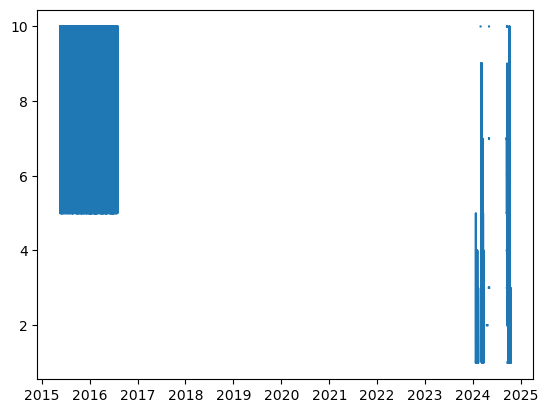

In [123]:
RainSm = Rain[Rain['Sta']==174].copy()
RainSm['Date_diff'] = RainSm['Date_diff']/pd.Timedelta('1 minutes')
RainSm['Ddf'] = RainSm['Date_diff'].apply(lambda x: x if x<=10 else np.nan)
RainSm['Dds'] =mode([
                              RainSm['Ddf'].shift(+5),
                              RainSm['Ddf'].shift(+4),
                              RainSm['Ddf'].shift(+3),
                              RainSm['Ddf'].shift(+2),
                              RainSm['Ddf'].shift(+1),
                              RainSm['Ddf'].shift(-1),
                              RainSm['Ddf'].shift(-2),
                              RainSm['Ddf'].shift(-3),
                              RainSm['Ddf'].shift(-4),
                              RainSm['Ddf'].shift(-5)])[0]
plt.step(RainSm['Date'],RainSm['Dds'])

 - La estación evidencia que entre los años 2015 y 2017 el periodo de observación cambió constantemente entre 5 y 10 minutos. 
 - Entre los años 2017 y 2023 la estación no registró observaciones.
 - En el año 2024 la estación empezó a registrar observaciones cada minuto, sin embargo sus observaciones presentan muchas discontinuidades.

 Ahora exploraremos una estación del conjunto de estaciones que presentan una frecuencia de periodo más frecuente de observación entre 50 y 90%.

 Elegimos la estación con índice 483, sus periodos de observación mas frecuentes son 1, 10 y 9 minutos. Elegiremos como umbral máximo 10 minutos.

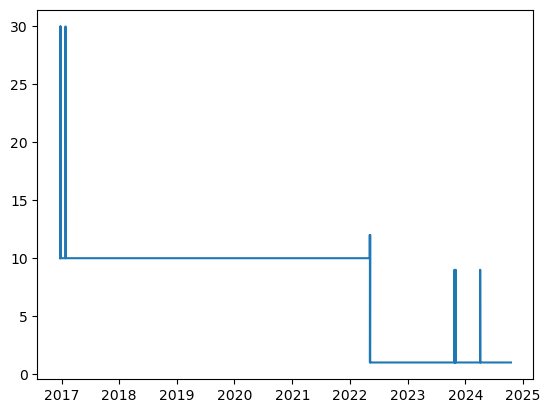

In [28]:
RainSm = Rain[Rain['Sta']==483].copy()
RainSm['Date_diff'] = RainSm['Date_diff']/pd.Timedelta('1 minutes')
RainSm['Ddf'] = RainSm['Date_diff'].apply(lambda x: x if x<=100 else np.nan)
RainSm['Dds'] =mode([
                              RainSm['Ddf'].shift(+5),
                              RainSm['Ddf'].shift(+4),
                              RainSm['Ddf'].shift(+3),
                              RainSm['Ddf'].shift(+2),
                              RainSm['Ddf'].shift(+1),
                              RainSm['Ddf'].shift(-1),
                              RainSm['Ddf'].shift(-2),
                              RainSm['Ddf'].shift(-3),
                              RainSm['Ddf'].shift(-4),
                              RainSm['Ddf'].shift(-5)])[0]
plt.step(RainSm['Date'],RainSm['Dds'])

Esta estación presenta un conjunto de dos periodos de tiempo notables en donde cada uno de los cuales presenta un periodo de observación diferente.

 - Entre 2016 y 2022 la estación capturó datos con un periodo de observación de 10 minutos
 - Después de 2022 la estación capturó datos con un periodo de observación de 1 minuto

Realizaremos la busqueda de nuevas funciones que nos permitan evitar el ruido ocasionado por pequeños periodos de inactividad de la estación y determinar de manera mas clara el periodo de observación empleado por la estación para realizar mediciones. 

Teniendo en cuenta que en un proceso previo fueron eliminados los registros duplicados y que existe solapamiento entre observaciones con periodos distintos, excluiremos del análisis todos aquellos registros en los cuales aparece el solapamiento de registros.

En las siguientes celdas probamos un nuevo conjunto de funciones de suavizado. En esta ocasión aumentamos la ventana sobre la cual calculamos la moda y adicionalmente usamos la desviación estandar como criterio para definir intervalos continuos de periodos consecutivos.

Realizamos primero la exploración de una estación del grupo de estaciones que presentan una frecuencia de periodo menor al 50%.

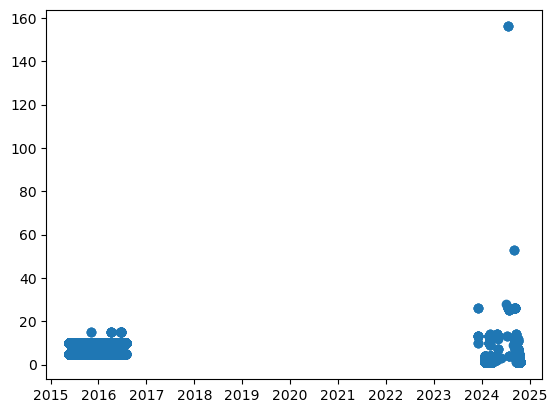

In [64]:
RainSm = Rain[Rain['Sta']==174].copy().reset_index(drop=True)    #36 174
RainSm['Date_diff'] = RainSm['Date_diff']/pd.Timedelta('1 minutes')
RainSm = RainSm.rename(columns={'Date_diff':'Ddf'})
RainSm['Dds'] = mode([
                              RainSm['Ddf'].shift(+9),
                              RainSm['Ddf'].shift(+8),
                              RainSm['Ddf'].shift(+7),
                              RainSm['Ddf'].shift(+6),
                              RainSm['Ddf'].shift(+5),
                              RainSm['Ddf'].shift(+4),
                              RainSm['Ddf'].shift(+3),
                              RainSm['Ddf'].shift(+2),
                              RainSm['Ddf'].shift(+1),
                              RainSm['Ddf'],
                              RainSm['Ddf'].shift(-1),
                              RainSm['Ddf'].shift(-2),
                              RainSm['Ddf'].shift(-3),
                              RainSm['Ddf'].shift(-4),
                              RainSm['Ddf'].shift(-5),
                              RainSm['Ddf'].shift(-6),
                              RainSm['Ddf'].shift(-7),
                              RainSm['Ddf'].shift(-8),
                              RainSm['Ddf'].shift(-9)])[0]
RainSm['Dds_std'] = tstd([
                            RainSm['Dds'].shift(+5),
                            RainSm['Dds'].shift(+4),
                            RainSm['Dds'].shift(+3),
                            RainSm['Dds'].shift(+2),
                            RainSm['Dds'].shift(+1),
                            RainSm['Dds'],
                            RainSm['Dds'].shift(-1),
                            RainSm['Dds'].shift(-2),
                            RainSm['Dds'].shift(-3),
                            RainSm['Dds'].shift(-4),
                            RainSm['Dds'].shift(-5)
                            ], nan_policy='omit')
RainSm['Cont'] = (RainSm['Dds_std']==0)*RainSm['Dds']
RainSm['Cont'] = RainSm['Cont'].apply(lambda x: np.nan if x==0 else x)
plt.scatter(RainSm['Date'].values,RainSm['Cont'].values)

Observamos que los periodos no son homogeneos en los registros.

Realizaremos la exploración sobre una estación del grupo de estaciones que presentan una frecuencia de periodo mas común entre 50% y 90%.

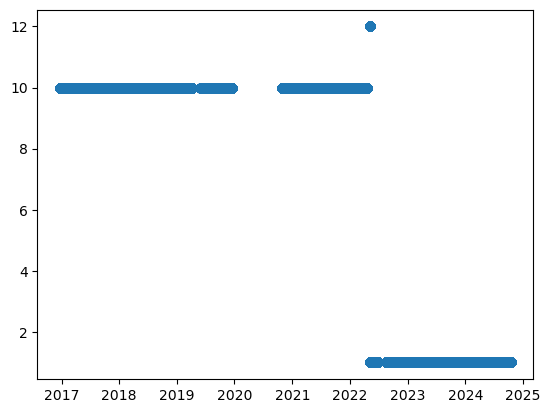

In [65]:
RainSm = Rain[Rain['Sta']==483].copy().reset_index(drop=True)    #36 174
RainSm['Date_diff'] = RainSm['Date_diff']/pd.Timedelta('1 minutes')
RainSm = RainSm.rename(columns={'Date_diff':'Ddf'})
RainSm['Dds'] = mode([
                              RainSm['Ddf'].shift(+9),
                              RainSm['Ddf'].shift(+8),
                              RainSm['Ddf'].shift(+7),
                              RainSm['Ddf'].shift(+6),
                              RainSm['Ddf'].shift(+5),
                              RainSm['Ddf'].shift(+4),
                              RainSm['Ddf'].shift(+3),
                              RainSm['Ddf'].shift(+2),
                              RainSm['Ddf'].shift(+1),
                              RainSm['Ddf'],
                              RainSm['Ddf'].shift(-1),
                              RainSm['Ddf'].shift(-2),
                              RainSm['Ddf'].shift(-3),
                              RainSm['Ddf'].shift(-4),
                              RainSm['Ddf'].shift(-5),
                              RainSm['Ddf'].shift(-6),
                              RainSm['Ddf'].shift(-7),
                              RainSm['Ddf'].shift(-8),
                              RainSm['Ddf'].shift(-9)])[0]
RainSm['Dds_std'] = tstd([
                            RainSm['Dds'].shift(+5),
                            RainSm['Dds'].shift(+4),
                            RainSm['Dds'].shift(+3),
                            RainSm['Dds'].shift(+2),
                            RainSm['Dds'].shift(+1),
                            RainSm['Dds'],
                            RainSm['Dds'].shift(-1),
                            RainSm['Dds'].shift(-2),
                            RainSm['Dds'].shift(-3),
                            RainSm['Dds'].shift(-4),
                            RainSm['Dds'].shift(-5)
                            ], nan_policy='omit')
RainSm['Cont'] = (RainSm['Dds_std']==0)*RainSm['Dds']
RainSm['Cont'] = RainSm['Cont'].apply(lambda x: np.nan if x==0 else x)
plt.scatter(RainSm['Date'].values,RainSm['Cont'].values)

Observamos claramente dos grupos significativos de periodos en las observaciones.

Realizaremos la exploración sobre una estación del grupo de estaciones que presentan una frecuencia de periodo mas común mayor al 90%.

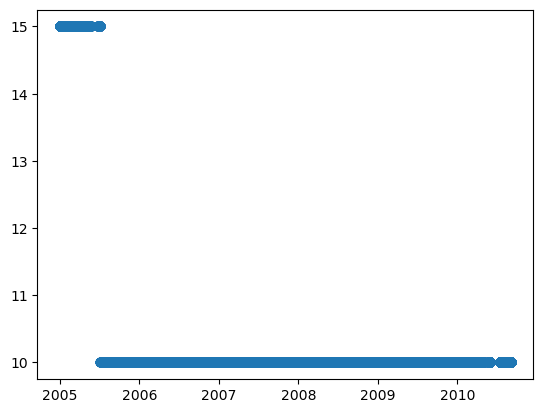

In [ ]:
RainSm = Rain[Rain['Sta']==36].copy().reset_index(drop=True)    #36 174
RainSm['Date_diff'] = RainSm['Date_diff']/pd.Timedelta('1 minutes')
RainSm = RainSm.rename(columns={'Date_diff':'Ddf'})
RainSm['Dds'] = mode([
                              RainSm['Ddf'].shift(+9),
                              RainSm['Ddf'].shift(+8),
                              RainSm['Ddf'].shift(+7),
                              RainSm['Ddf'].shift(+6),
                              RainSm['Ddf'].shift(+5),
                              RainSm['Ddf'].shift(+4),
                              RainSm['Ddf'].shift(+3),
                              RainSm['Ddf'].shift(+2),
                              RainSm['Ddf'].shift(+1),
                              RainSm['Ddf'],
                              RainSm['Ddf'].shift(-1),
                              RainSm['Ddf'].shift(-2),
                              RainSm['Ddf'].shift(-3),
                              RainSm['Ddf'].shift(-4),
                              RainSm['Ddf'].shift(-5),
                              RainSm['Ddf'].shift(-6),
                              RainSm['Ddf'].shift(-7),
                              RainSm['Ddf'].shift(-8),
                              RainSm['Ddf'].shift(-9)])[0]
RainSm['Dds_std'] = tstd([
                            RainSm['Dds'].shift(+5),
                            RainSm['Dds'].shift(+4),
                            RainSm['Dds'].shift(+3),
                            RainSm['Dds'].shift(+2),
                            RainSm['Dds'].shift(+1),
                            RainSm['Dds'],
                            RainSm['Dds'].shift(-1),
                            RainSm['Dds'].shift(-2),
                            RainSm['Dds'].shift(-3),
                            RainSm['Dds'].shift(-4),
                            RainSm['Dds'].shift(-5)
                            ], nan_policy='omit')
RainSm['Cont'] = (RainSm['Dds_std']==0)*RainSm['Dds']
RainSm['Cont'] = RainSm['Cont'].apply(lambda x: np.nan if x==0 else x)
plt.scatter(RainSm['Date'].values,RainSm['Cont'].values)

Observamos claramente dos grupos significativos de periodos en las observaciones.

Si bien el método de suavizado que combina la aplicación de la moda y la dispersión estandar de los periodos de observación resulta eficiente para encontrar el periodo de observación en grandes fragmentos de tiempo, realizaremos una optimización del código usando arreglos de numpy con el objetivo de reducir el tiempo de ejecución.

En la siguiente celda mostramos una forma alternativa y mas eficiente de encontrar estos periodos de tiempo. Realizamos la exploración a una estación de cada grupo descrito anteriormente.

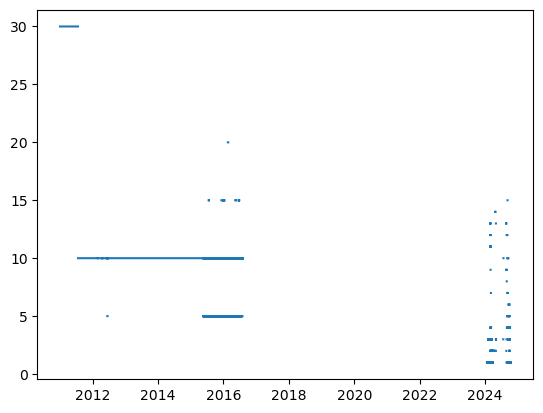

In [ ]:
RainSm1 = Rain[Rain['Sta'] == 208].copy().reset_index(drop=True)
RainSm1['Date_diff'] = RainSm1['Date_diff'] / pd.Timedelta('1 minutes')

Ddf_array = RainSm1['Date_diff'].to_numpy()
Dds_values = mode(
    np.array([np.roll(Ddf_array, shift) for shift in range(-5, 5)]),
    axis=0,
    nan_policy='omit'
)[0]
Dds_std_values = tstd(
    np.array([np.roll(Dds_values, shift) for shift in range(-5, 5)]),
    axis=0,
    nan_policy='omit'
)
RainSm1['Dds'] = Dds_values
RainSm1['Dds_std'] = Dds_std_values
RainSm1['Cont'] = np.where(RainSm1['Dds_std'] == 0, RainSm1['Dds'], np.nan)

plt.step(RainSm1['Date'].values, RainSm1['Cont'].values)

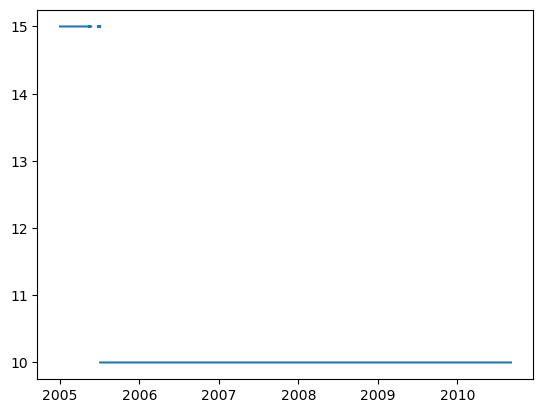

In [54]:
RainSm1 = Rain[Rain['Sta'] == 36].copy().reset_index(drop=True)
RainSm1['Date_diff'] = RainSm1['Date_diff'] / pd.Timedelta('1 minutes')

Ddf_array = RainSm1['Date_diff'].to_numpy()

Dds_values = mode(
    np.array([np.roll(Ddf_array, shift) for shift in range(-5, 5)]),
    axis=0#,
    #nan_policy='omit'
)[0]

Dds_std_values = tstd(
    np.array([np.roll(Dds_values, shift) for shift in range(-5, 5)]),
    axis=0,
    nan_policy='omit'
)

RainSm1['Dds'] = Dds_values
RainSm1['Dds_std'] = Dds_std_values
RainSm1['Cont'] = np.where(RainSm1['Dds_std'] == 0, RainSm1['Dds'], np.nan)

plt.step(RainSm1['Date'].values, RainSm1['Cont'].values)


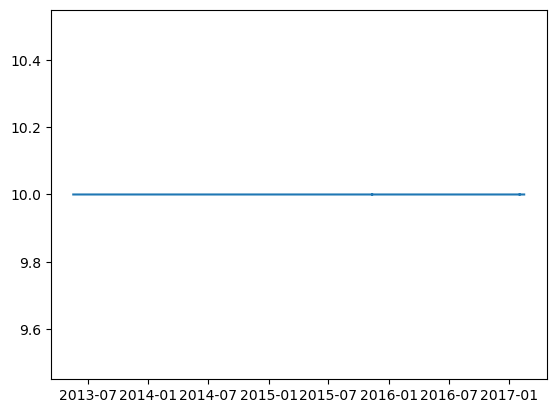

In [49]:
RainSm1 = Rain[Rain['Sta'] == 185].copy().reset_index(drop=True)
RainSm1['Date_diff'] = RainSm1['Date_diff'] / pd.Timedelta('1 minutes')

Ddf_array = RainSm1['Date_diff'].to_numpy()

Dds_values = mode(
    np.array([np.roll(Ddf_array, shift) for shift in range(-5, 5)]),
    axis=0#,
    #nan_policy='omit'
)[0]

Dds_std_values = tstd(
    np.array([np.roll(Dds_values, shift) for shift in range(-5, 5)]),
    axis=0,
    nan_policy='omit'
)

RainSm1['Dds'] = Dds_values
RainSm1['Dds_std'] = Dds_std_values
RainSm1['Cont'] = np.where(RainSm1['Dds_std'] == 0, RainSm1['Dds'], np.nan)

plt.plot(RainSm1['Date'].values, RainSm1['Cont'].values)

###### Suavizado y agrupación de periodos de observación.

**Suavizado y agrupación de periodos de observación.**

En la siguiente celda recopilamos el código necesaria para limpiar la seria temporal y realizamos una prueba sobre una estación.

In [ ]:
RainSm = Rain[Rain['Sta'] == 711].copy().reset_index(drop=True)                                                         #Extracción de los registros de 1 estación
RainSm['Date_diff'] = RainSm['Date_diff'] / pd.Timedelta('1 minutes')                                                   #Conversión de la diferencia de tiempos a minutos

# Obtención de los periodos de muestreo de los registros usando numpy
Ddf_array = RainSm['Date_diff'].to_numpy()                                                                              #Conversión de la columa de diferencia de tiempos a numpy                                                            
Dds_values = mode(np.array([np.roll(Ddf_array, shift) for shift in range(-5, 5)]), axis=0)[0]                           #Estimación de la moda de la diferencia de tiempos en una ventana de 11 registros
Dds_std_values = tstd(np.array([np.roll(Dds_values, shift) for shift in range(-10, 10)]), axis=0, nan_policy='omit')    #Estimación de la desviación estandar de la columna que calcula la moda
RainSm['Dds'] = Dds_values                                                                                              #Inserción de la columna con el valor de la moda en el dataframe 
RainSm['Dds_std'] = Dds_std_values                                                                                      #Inserción de la columna con el valor de la desviación estandar en el dataframe 
RainSm['Cont'] = np.where(RainSm['Dds_std'] == 0, RainSm['Dds'], np.nan)                                                #Criterio de continuidad que elimina registros sucesivos donde existe solapamiento de registros
RainSm['CrMD'] = (RainSm['Date'].dt.hour *60 + RainSm['Date'].dt.minute)%RainSm['Cont']                                 #Criterio de continuidad, conversión de la hora a minutos
RainSm['CrMD'] = np.where(RainSm['CrMD'] == 0, RainSm['Cont'], np.nan)                                                  #Criterio de continuidad que elimina registros sucesivos donde existe solapamiento de registros
RainSm = RainSm.dropna()

# Obtención del tiempo inicial de muestreo y eliminación de registros con solapamiento de registros
RainSm['Date_0'] = RainSm['Date'] - pd.to_timedelta(RainSm['Cont'], unit='m')                                           #Obtención del tiempo inicial de muestreo
RainSm['Diff'] = (RainSm['Date_0'] - RainSm['Date'].shift(1))/ pd.Timedelta('1 minutes')                                #Obtiene la diferencia entre el tiempo final de una observación y el tiempo inicial de la siguiente
RainSm['Diff'] = np.where(RainSm['Diff'] >= 0, RainSm['Diff'], np.nan)                                                  #Criterio que permite eliminar periodos de observación solapados
RainSm['Gaps'] = RainSm['Diff']/RainSm['Cont']                                                                          #Determinación de la cantidad de intervalos dentro de una discontinuidad
RainSm['Gaps'] = np.where(np.mod(RainSm['Gaps'],1)==0, RainSm['Gaps'], np.nan)                                          #Criterio que permite descartar intervalos no enteros

RainSm = RainSm[['Sta','Date_0','Date','Rain','Cont','Gaps']]

# Rellenado de registros 
RainSm['Gaps<3'] = RainSm.apply(lambda x: True if (x['Gaps']<=3)&(x['Gaps']>0) else False, axis=1)                      #Criterio que permite encontrar hasta 3 datos consecutivos faltantes
RainSm['Near'] = (RainSm['Gaps<3']==True)|(RainSm['Gaps<3'].shift(-1)==True)                                            #Determina los rangos que permiten realizar la inferencia de los datos faltantes
RainSm = RainSm.dropna()    
Rain_aux = RainSm.loc[RainSm.index.repeat(RainSm['Gaps']+1)].reset_index(drop=True)                                     #Inserción de filas faltantes
Rain_aux['oldInd'] = np.repeat(RainSm.index, RainSm['Gaps']+1)                                                          #Almacena el índice original, el cual permitirá diferenciar registros nuevos y originales
Rain_aux['old'] = Rain_aux.groupby('oldInd').cumcount() == Rain_aux['Gaps']                                             #Criterio que señala una región sobre la cual se realizará la inferencia de datos nuevos
Rain_aux['Rain'] = np.where(Rain_aux['old'], Rain_aux['Rain'], np.nan)                                                  #Los registros nuevos se marcan como nan
Rain_aux.loc[Rain_aux['old']==False,['Date_0','Date']] = pd.NaT                                                         #Las fechas nuevas se marcan como nat

Rain_aux.loc[(Rain_aux['Near']==True)&(Rain_aux['Gaps<3']==True),'Rain'] = Rain_aux['Rain'].interpolate(method='linear').round(0)   #Inferencia del valor de precipitación
Rain_aux['Date_0'] = Rain_aux['Date_0'].interpolate(method='linear')                                                                #Inferencia de la fecha inicial
Rain_aux['Date'] = Rain_aux['Date'].interpolate(method='linear')                                                                    #Inferencia de la fecha inicial

#Agrupamiento en periodos de tiempo de 30 minutos
Rain_aux0 = Rain_aux.set_index('Date_0').copy()
rain_30min = Rain_aux0['Rain'].resample('30min').apply(lambda x: np.nan if x.isna().any() else x.sum())
rain_30min = rain_30min.reset_index()

#Alistamiento del dataframe final
rain_30min['Date_0'] = rain_30min['Date_0'] + pd.Timedelta('30 minutes')
rain_30min = rain_30min.rename(columns={'Date_0':'Date'})
rain_30min['Sta'] = RainSm['Sta'].unique()[0]
rain_30min.to_parquet(f'../Temp_Datasets/Rain5090/{RainSm['Sta'].unique()[0]}.parquet')

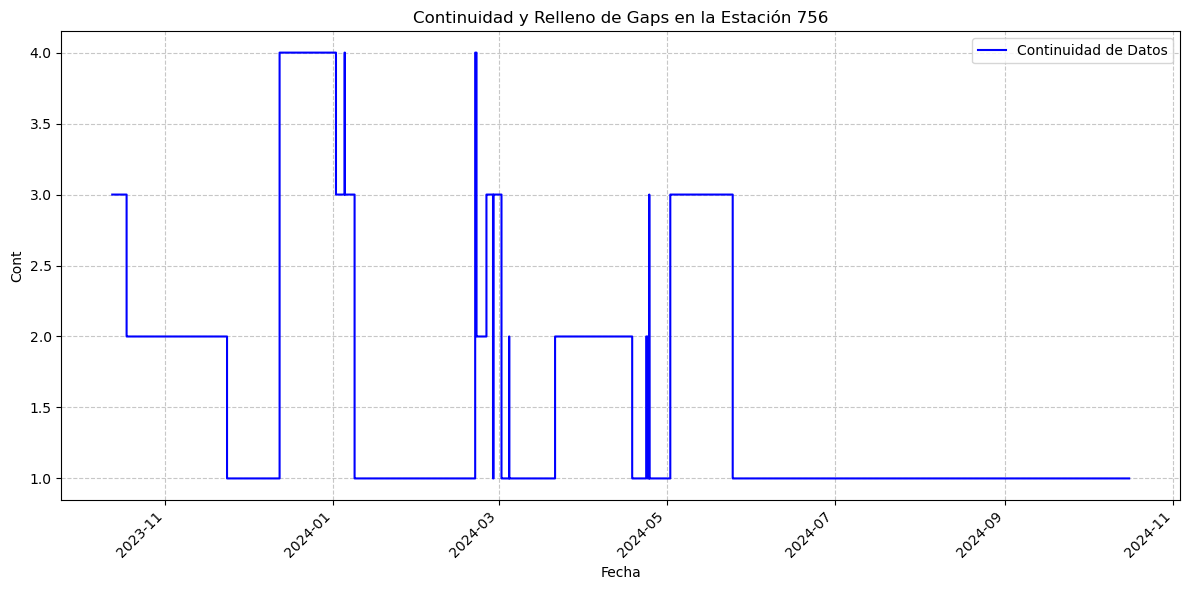

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.step(Rain_aux['Date_0'], Rain_aux['Cont'].values, where='post', color='blue', linewidth=1.5)
plt.title(f'Continuidad y Relleno de Gaps en la Estación {RainSm['Sta'].unique()[0]}')
plt.xlabel('Fecha')
plt.ylabel('Cont')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(['Continuidad de Datos'], loc='best')
plt.tight_layout()
plt.savefig(f'../Temp_Datasets/Graphs5090/{RainSm['Sta'].unique()[0]}.jpg')


En la siguiente celda recorremos los registros de las estaciones con frecuencia de periodo mas frecuente entre 50 y 90%

In [19]:
StaBetFreq5090 = StaPeriod_FreqRec[(StaPeriod_FreqRec['%']>=0.5)&(StaPeriod_FreqRec['%']<0.9)]['Sta']
StaBetFreq5090 = StaBetFreq5090[StaBetFreq5090>616]

In [ ]:
for i in StaBetFreq5090:
        RainSm = Rain[Rain['Sta'] == i].copy().reset_index(drop=True)                                                         #Extracción de los registros de 1 estación
        sta = RainSm.Sta.values[0]
        RainSm['Date_diff'] = RainSm['Date_diff'] / pd.Timedelta('1 minutes')                                                   #Conversión de la diferencia de tiempos a minutos

        # Obtención de los periodos de muestreo de los registros usando numpy
        Ddf_array = RainSm['Date_diff'].to_numpy()                                                                              #Conversión de la columa de diferencia de tiempos a numpy                                                            
        Dds_values = mode(np.array([np.roll(Ddf_array, shift) for shift in range(-5, 5)]), axis=0)[0]                           #Estimación de la moda de la diferencia de tiempos en una ventana de 11 registros
        Dds_std_values = tstd(np.array([np.roll(Dds_values, shift) for shift in range(-10, 10)]), axis=0, nan_policy='omit')    #Estimación de la desviación estandar de la columna que calcula la moda
        RainSm['Dds'] = Dds_values                                                                                              #Inserción de la columna con el valor de la moda en el dataframe 
        RainSm['Dds_std'] = Dds_std_values                                                                                      #Inserción de la columna con el valor de la desviación estandar en el dataframe 
        RainSm['Cont'] = np.where(RainSm['Dds_std'] == 0, RainSm['Dds'], np.nan)                                                #Criterio de continuidad que elimina registros sucesivos donde existe solapamiento de registros
        RainSm['CrMD'] = (RainSm['Date'].dt.hour *60 + RainSm['Date'].dt.minute)%RainSm['Cont']                                 #Criterio de continuidad, conversión de la hora a minutos
        RainSm['CrMD'] = np.where(RainSm['CrMD'] == 0, RainSm['Cont'], np.nan)                                                  #Criterio de continuidad que elimina registros sucesivos donde existe solapamiento de registros
        RainSm = RainSm.dropna()

        # Obtención del tiempo inicial de muestreo y eliminación de registros con solapamiento de registros
        RainSm['Date_0'] = RainSm['Date'] - pd.to_timedelta(RainSm['Cont'], unit='m')                                           #Obtención del tiempo inicial de muestreo
        RainSm['Diff'] = (RainSm['Date_0'] - RainSm['Date'].shift(1))/ pd.Timedelta('1 minutes')                                #Obtiene la diferencia entre el tiempo final de una observación y el tiempo inicial de la siguiente
        RainSm['Diff'] = np.where(RainSm['Diff'] >= 0, RainSm['Diff'], np.nan)                                                  #Criterio que permite eliminar periodos de observación solapados
        RainSm['Gaps'] = RainSm['Diff']/RainSm['Cont']                                                                          #Determinación de la cantidad de intervalos dentro de una discontinuidad
        RainSm['Gaps'] = np.where(np.mod(RainSm['Gaps'],1)==0, RainSm['Gaps'], np.nan)                                          #Criterio que permite descartar intervalos no enteros

        RainSm = RainSm[['Sta','Date_0','Date','Rain','Cont','Gaps']]

        # Rellenado de registros 
        RainSm['Gaps<3'] = RainSm.apply(lambda x: True if (x['Gaps']<=3)&(x['Gaps']>0) else False, axis=1)                      #Criterio que permite encontrar hasta 3 datos consecutivos faltantes
        RainSm['Near'] = (RainSm['Gaps<3']==True)|(RainSm['Gaps<3'].shift(-1)==True)                                            #Determina los rangos que permiten realizar la inferencia de los datos faltantes
        RainSm = RainSm.dropna()    
        Rain_aux = RainSm.loc[RainSm.index.repeat(RainSm['Gaps']+1)].reset_index(drop=True)                                     #Inserción de filas faltantes
        Rain_aux['oldInd'] = np.repeat(RainSm.index, RainSm['Gaps']+1)                                                          #Almacena el índice original, el cual permitirá diferenciar registros nuevos y originales
        Rain_aux['old'] = Rain_aux.groupby('oldInd').cumcount() == Rain_aux['Gaps']                                             #Criterio que señala una región sobre la cual se realizará la inferencia de datos nuevos
        Rain_aux['Rain'] = np.where(Rain_aux['old'], Rain_aux['Rain'], np.nan)                                                  #Los registros nuevos se marcan como nan
        Rain_aux.loc[Rain_aux['old']==False,['Date_0','Date']] = pd.NaT                                                         #Las fechas nuevas se marcan como nat

        Rain_aux.loc[(Rain_aux['Near']==True)&(Rain_aux['Gaps<3']==True),'Rain'] = Rain_aux['Rain'].interpolate(method='linear').round(0)   #Inferencia del valor de precipitación
        Rain_aux['Date_0'] = Rain_aux['Date_0'].interpolate(method='linear')                                                                #Inferencia de la fecha inicial
        Rain_aux['Date'] = Rain_aux['Date'].interpolate(method='linear')                                                                    #Inferencia de la fecha inicial

        #Agrupamiento en periodos de tiempo de 30 minutos
        Rain_aux0 = Rain_aux.set_index('Date_0').copy()
        rain_30min = Rain_aux0['Rain'].resample('30min').apply(lambda x: np.nan if x.isna().any() else x.sum())
        rain_30min = rain_30min.reset_index()

        #Alistamiento del dataframe final
        rain_30min['Date_0'] = rain_30min['Date_0'] + pd.Timedelta('30 minutes')
        rain_30min = rain_30min.rename(columns={'Date_0':'Date'})
        rain_30min['Sta'] = sta
        rain_30min.to_parquet(f'../Temp_Datasets/Rain5090/{sta}.parquet')

        #Gráfica de continuidad de los registros
        plt.figure(figsize=(12, 6))
        plt.step(Rain_aux['Date_0'], Rain_aux['Cont'].values, where='post', color='blue', linewidth=1.5)
        plt.title(f'Continuidad y Relleno de Gaps en la Estación {sta}')
        plt.xlabel('Fecha')
        plt.ylabel('Cont')
        plt.ylim(bottom=0)
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(['Continuidad de Datos'], loc='best')
        plt.tight_layout()
        plt.savefig(f'../Temp_Datasets/Graphs5090/{sta}.jpg')
        plt.close('all')

En la siguiente celda recorremos los registros de las estaciones con frecuencia de periodo mas frecuente mayor al 90%

In [ ]:
StaGrFreq90 = StaPeriod_FreqRec[StaPeriod_FreqRec['%']>=0.9]['Sta']
# StaGrFreq90 = StaGrFreq90[StaGrFreq90==338]

In [ ]:
for i in StaGrFreq90:
        RainSm = Rain[Rain['Sta'] == i].copy().reset_index(drop=True)                                                         #Extracción de los registros de 1 estación
        sta = RainSm.Sta.values[0]
        RainSm['Date_diff'] = RainSm['Date_diff'] / pd.Timedelta('1 minutes')                                                   #Conversión de la diferencia de tiempos a minutos

        # Obtención de los periodos de muestreo de los registros usando numpy
        Ddf_array = RainSm['Date_diff'].to_numpy()                                                                              #Conversión de la columa de diferencia de tiempos a numpy                                                            
        Dds_values = mode(np.array([np.roll(Ddf_array, shift) for shift in range(-5, 5)]), axis=0)[0]                           #Estimación de la moda de la diferencia de tiempos en una ventana de 11 registros
        Dds_std_values = tstd(np.array([np.roll(Dds_values, shift) for shift in range(-10, 10)]), axis=0, nan_policy='omit')    #Estimación de la desviación estandar de la columna que calcula la moda
        RainSm['Dds'] = Dds_values                                                                                              #Inserción de la columna con el valor de la moda en el dataframe 
        RainSm['Dds_std'] = Dds_std_values                                                                                      #Inserción de la columna con el valor de la desviación estandar en el dataframe 
        RainSm['Cont'] = np.where(RainSm['Dds_std'] == 0, RainSm['Dds'], np.nan)                                                #Criterio de continuidad que elimina registros sucesivos donde existe solapamiento de registros
        RainSm['CrMD'] = (RainSm['Date'].dt.hour *60 + RainSm['Date'].dt.minute)%RainSm['Cont']                                 #Criterio de continuidad, conversión de la hora a minutos
        RainSm['CrMD'] = np.where(RainSm['CrMD'] == 0, RainSm['Cont'], np.nan)                                                  #Criterio de continuidad que elimina registros sucesivos donde existe solapamiento de registros
        RainSm = RainSm.dropna()

        # Obtención del tiempo inicial de muestreo y eliminación de registros con solapamiento de registros
        RainSm['Date_0'] = RainSm['Date'] - pd.to_timedelta(RainSm['Cont'], unit='m')                                           #Obtención del tiempo inicial de muestreo
        RainSm['Diff'] = (RainSm['Date_0'] - RainSm['Date'].shift(1))/ pd.Timedelta('1 minutes')                                #Obtiene la diferencia entre el tiempo final de una observación y el tiempo inicial de la siguiente
        RainSm['Diff'] = np.where(RainSm['Diff'] >= 0, RainSm['Diff'], np.nan)                                                  #Criterio que permite eliminar periodos de observación solapados
        RainSm['Gaps'] = RainSm['Diff']/RainSm['Cont']                                                                          #Determinación de la cantidad de intervalos dentro de una discontinuidad
        RainSm['Gaps'] = np.where(np.mod(RainSm['Gaps'],1)==0, RainSm['Gaps'], np.nan)                                          #Criterio que permite descartar intervalos no enteros

        RainSm = RainSm[['Sta','Date_0','Date','Rain','Cont','Gaps']]

        # Rellenado de registros 
        RainSm['Gaps<3'] = RainSm.apply(lambda x: True if (x['Gaps']<=3)&(x['Gaps']>0) else False, axis=1)                      #Criterio que permite encontrar hasta 3 datos consecutivos faltantes
        RainSm['Near'] = (RainSm['Gaps<3']==True)|(RainSm['Gaps<3'].shift(-1)==True)                                            #Determina los rangos que permiten realizar la inferencia de los datos faltantes
        RainSm = RainSm.dropna()    
        Rain_aux = RainSm.loc[RainSm.index.repeat(RainSm['Gaps']+1)].reset_index(drop=True)                                     #Inserción de filas faltantes
        Rain_aux['oldInd'] = np.repeat(RainSm.index, RainSm['Gaps']+1)                                                          #Almacena el índice original, el cual permitirá diferenciar registros nuevos y originales
        Rain_aux['old'] = Rain_aux.groupby('oldInd').cumcount() == Rain_aux['Gaps']                                             #Criterio que señala una región sobre la cual se realizará la inferencia de datos nuevos
        Rain_aux['Rain'] = np.where(Rain_aux['old'], Rain_aux['Rain'], np.nan)                                                  #Los registros nuevos se marcan como nan
        Rain_aux.loc[Rain_aux['old']==False,['Date_0','Date']] = pd.NaT                                                         #Las fechas nuevas se marcan como nat

        Rain_aux.loc[(Rain_aux['Near']==True)&(Rain_aux['Gaps<3']==True),'Rain'] = Rain_aux['Rain'].interpolate(method='linear').round(0)   #Inferencia del valor de precipitación
        Rain_aux['Date_0'] = Rain_aux['Date_0'].interpolate(method='linear')                                                                #Inferencia de la fecha inicial
        Rain_aux['Date'] = Rain_aux['Date'].interpolate(method='linear')                                                                    #Inferencia de la fecha inicial

        #Agrupamiento en periodos de tiempo de 30 minutos
        Rain_aux0 = Rain_aux.set_index('Date_0').copy()
        rain_30min = Rain_aux0['Rain'].resample('30min').apply(lambda x: np.nan if x.isna().any() else x.sum())
        rain_30min = rain_30min.reset_index()

        #Alistamiento del dataframe final
        rain_30min['Date_0'] = rain_30min['Date_0'] + pd.Timedelta('30 minutes')
        rain_30min = rain_30min.rename(columns={'Date_0':'Date'})
        rain_30min['Sta'] = sta
        rain_30min.to_parquet(f'../Temp_Datasets/Rain90/{sta}.parquet')

        #Gráfica de continuidad de los registros
        plt.figure(figsize=(12, 6))
        plt.step(Rain_aux['Date_0'], Rain_aux['Cont'].values, where='post', color='blue', linewidth=1.5)
        plt.title(f'Continuidad y Relleno de Gaps en la Estación {sta}')
        plt.xlabel('Fecha')
        plt.ylabel('Cont')
        plt.ylim(bottom=0)
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(['Continuidad de Datos'], loc='best')
        plt.tight_layout()
        plt.savefig(f'../Temp_Datasets/Graphs90/{sta}.jpg')
        plt.close('all')

##### Rellenado de periodos de tiempo sin registros

###### Unificación de archivos

En las siguiente celdas reunimos los diferentes dataframes obtenidos para cada estación en la sección anterior y lo exportamos en un solo archivo parquet.

In [ ]:
namesFiles = os.listdir(R'../Temp_Datasets/Rain90')
print(namesFiles)

['0.parquet', '1.parquet', '10.parquet', '100.parquet', '101.parquet', '102.parquet', '103.parquet', '104.parquet', '107.parquet', '108.parquet', '109.parquet', '11.parquet', '110.parquet', '111.parquet', '112.parquet', '114.parquet', '115.parquet', '116.parquet', '117.parquet', '118.parquet', '119.parquet', '12.parquet', '120.parquet', '121.parquet', '122.parquet', '123.parquet', '124.parquet', '125.parquet', '126.parquet', '127.parquet', '129.parquet', '13.parquet', '130.parquet', '131.parquet', '132.parquet', '133.parquet', '134.parquet', '135.parquet', '136.parquet', '137.parquet', '138.parquet', '139.parquet', '14.parquet', '140.parquet', '141.parquet', '142.parquet', '143.parquet', '144.parquet', '145.parquet', '146.parquet', '147.parquet', '148.parquet', '149.parquet', '15.parquet', '150.parquet', '151.parquet', '152.parquet', '153.parquet', '154.parquet', '155.parquet', '156.parquet', '158.parquet', '159.parquet', '16.parquet', '160.parquet', '161.parquet', '162.parquet', '163.

Recopilaremos todos los registros de las estaciones con frecuencia de periodo mas común mayor al 90%

In [ ]:
Rain = pd.read_parquet(f'../Temp_Datasets/Rain90/{namesFiles[0]}')
Rain

Date  Rain  Sta
0     2018-05-04 12:30:00   0.0    0
1     2018-05-04 13:00:00   0.0    0
2     2018-05-04 13:30:00   0.0    0
3     2018-05-04 14:00:00   0.0    0
4     2018-05-04 14:30:00   0.0    0
...                   ...   ...  ...
20802 2019-07-11 21:30:00   NaN    0
20803 2019-07-11 22:00:00   NaN    0
20804 2019-07-11 22:30:00   NaN    0
20805 2019-07-11 23:00:00   NaN    0
20806 2019-07-11 23:30:00   0.0    0

[20807 rows x 3 columns]

La estación 552 no se incluyó en el análisis debido a que cuenta con solo 2 registros.
La estación 338 no se incluyó en el análisis debido a que la diferencia entre registros es 60 minutos.

In [ ]:
Rain_conc = pd.DataFrame()
for i in namesFiles:
    Rain_aux = pd.read_parquet(f'../Temp_Datasets/Rain90/{i}')
    Rain_conc = pd.concat([Rain_conc,Rain_aux], ignore_index=True)
Rain_conc
    

Date  Rain  Sta
0        2018-05-04 12:30:00   0.0    0
1        2018-05-04 13:00:00   0.0    0
2        2018-05-04 13:30:00   0.0    0
3        2018-05-04 14:00:00   0.0    0
4        2018-05-04 14:30:00   0.0    0
...                      ...   ...  ...
81914996 2023-03-17 02:30:00   0.0   99
81914997 2023-03-17 03:00:00   0.0   99
81914998 2023-03-17 03:30:00   0.0   99
81914999 2023-03-17 04:00:00   0.0   99
81915000 2023-03-17 04:30:00   0.0   99

[81915001 rows x 3 columns]

In [ ]:
Rain_conc.to_parquet('../Temp_Datasets/rain0_version3.parquet')

###### Periodos de 6 horas

Realizaremos el agrupamiento de los registros en periodos de 6 horas.

In [ ]:
Rain = pd.read_parquet('../Temp_Datasets/rain0_version3.parquet')
Sta = pd.read_parquet('../InfoStationsByDataset/stations_r.parquet')

In [50]:
Rain['6H_Fragment'] = Rain['Date'].dt.ceil('6h')
Rain = Rain.sort_values(['Sta','Date'])
Rain = Rain.reset_index(drop=True)
Rain_aux = Rain.groupby(['Sta','6H_Fragment']).agg(Rain_mean=('Rain','mean'), Count=('Rain','count')).reset_index()
Rain_aux['Rain'] = np.where(Rain_aux['Count']>6, np.round(Rain_aux['Rain_mean']*12,0), np.nan)
Rain_aux

Sta         6H_Fragment    Rain_mean  Count     Rain
0          0 2018-05-04 18:00:00     0.000000     12      0.0
1          0 2018-05-05 00:00:00   941.666667     12  11300.0
2          0 2018-05-05 06:00:00    91.666667     12   1100.0
3          0 2018-05-05 12:00:00  1675.000000     12  20100.0
4          0 2018-05-05 18:00:00     0.000000     12      0.0
...      ...                 ...          ...    ...      ...
6826933  893 2020-08-26 12:00:00          NaN      0      NaN
6826934  893 2020-08-26 18:00:00          NaN      0      NaN
6826935  893 2020-08-27 00:00:00          NaN      0      NaN
6826936  893 2020-08-27 06:00:00          NaN      0      NaN
6826937  893 2020-08-27 12:00:00     0.000000      3      NaN

[6826938 rows x 5 columns]

In [51]:
Rain_aux['Interval'] = Rain_aux['6H_Fragment'].dt.hour
Rain_aux['Date_only'] = Rain_aux['6H_Fragment'].dt.date
Rain_aux = Rain_aux.merge(Sta, on='Sta', how='inner')
Rain_aux

Sta         6H_Fragment    Rain_mean  Count     Rain  Interval  \
0          0 2018-05-04 18:00:00     0.000000     12      0.0        18   
1          0 2018-05-05 00:00:00   941.666667     12  11300.0         0   
2          0 2018-05-05 06:00:00    91.666667     12   1100.0         6   
3          0 2018-05-05 12:00:00  1675.000000     12  20100.0        12   
4          0 2018-05-05 18:00:00     0.000000     12      0.0        18   
...      ...                 ...          ...    ...      ...       ...   
6826933  893 2020-08-26 12:00:00          NaN      0      NaN        12   
6826934  893 2020-08-26 18:00:00          NaN      0      NaN        18   
6826935  893 2020-08-27 00:00:00          NaN      0      NaN         0   
6826936  893 2020-08-27 06:00:00          NaN      0      NaN         6   
6826937  893 2020-08-27 12:00:00     0.000000      3      NaN        12   

          Date_only      CodSta                NameSta    Lat    Long  \
0        2018-05-04    11017020       PR CHOCO: BAGADO  5.412 -76.418   
1        2018-05-05    11017020       PR CHOCO: BAGADO  5.412 -76.418   
2        2018-05-05    11017020       PR CHOCO: BAGADO  5.412 -76.418   
3        2018-05-05    11017020       PR CHOCO: BAGADO  5.412 -76.418   
4        2018-05-05    11017020       PR CHOCO: BAGADO  5.412 -76.418   
...             ...         ...                    ...    ...     ...   
6826933  2020-08-26  5311700154  PUENTE ZACARIAS - AUT  3.815 -77.005   
6826934  2020-08-26  5311700154  PUENTE ZACARIAS - AUT  3.815 -77.005   
6826935  2020-08-27  5311700154  PUENTE ZACARIAS - AUT  3.815 -77.005   
6826936  2020-08-27  5311700154  PUENTE ZACARIAS - AUT  3.815 -77.005   
6826937  2020-08-27  5311700154  PUENTE ZACARIAS - AUT  3.815 -77.005   

                    Dept          City  
0                  CHOCÓ        BAGADÓ  
1                  CHOCÓ        BAGADÓ  
2                  CHOCÓ        BAGADÓ  
3                  CHOCÓ        BAGADÓ  
4                  CHOCÓ        BAGADÓ  
...                  ...           ...  
6826933  VALLE DEL CAUCA  BUENAVENTURA  
6826934  VALLE DEL CAUCA  BUENAVENTURA  
6826935  VALLE DEL CAUCA  BUENAVENTURA  
6826936  VALLE DEL CAUCA  BUENAVENTURA  
6826937  VALLE DEL CAUCA  BUENAVENTURA  

[6826938 rows x 13 columns]

In [55]:
Rain_f = Rain_aux.pivot(index=['CodSta', 'Dept', 'City','Lat','Long', 'Date_only'], 
                            columns='Interval', values='Rain').reset_index()
Rain_f.columns.name = None
Rain_f.columns = Rain_f.columns.astype(str)
Rain_f.rename(columns={'Date_only': 'Date'}, inplace=True)
Rain_f = Rain_f.sort_values(['Dept','City','CodSta','Date'], ascending=True).reset_index(drop=True)
Rain_f

CodSta      Dept          City    Lat    Long        Date  \
0          44197020  AMAZONAS    LA PEDRERA -1.310 -69.619  2017-06-13   
1          44197020  AMAZONAS    LA PEDRERA -1.310 -69.619  2017-06-14   
2          44197020  AMAZONAS    LA PEDRERA -1.310 -69.619  2017-06-15   
3          44197020  AMAZONAS    LA PEDRERA -1.310 -69.619  2017-06-16   
4          44197020  AMAZONAS    LA PEDRERA -1.310 -69.619  2017-06-17   
...             ...       ...           ...    ...     ...         ...   
1707439  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-10-12   
1707440  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-10-13   
1707441  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-10-14   
1707442  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-10-15   
1707443  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-10-16   

              0    6      12       18  
0           NaN  NaN     NaN      NaN  
1           0.0  0.0     NaN      NaN  
2           0.0  0.0  4400.0    400.0  
3           0.0  0.0     0.0   1900.0  
4         400.0  0.0     0.0      0.0  
...         ...  ...     ...      ...  
1707439     0.0  0.0  3000.0  41700.0  
1707440  2800.0  0.0   400.0   2200.0  
1707441     0.0  0.0     0.0      0.0  
1707442     0.0  0.0     0.0   4700.0  
1707443     0.0  NaN     NaN      NaN  

[1707444 rows x 10 columns]

In [57]:
Rain_f[['Dept', 'City']] = Rain_f[['Dept', 'City']].astype(str)
Rain_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1707444 entries, 0 to 1707443
Data columns (total 10 columns):
 #   Column  Dtype  
---  ------  -----  
 0   CodSta  uint64 
 1   Dept    object 
 2   City    object 
 3   Lat     float64
 4   Long    float64
 5   Date    object 
 6   0       float64
 7   6       float64
 8   12      float64
 9   18      float64
dtypes: float64(6), object(3), uint64(1)
memory usage: 130.3+ MB


In [ ]:
Rain_f.to_parquet('../CleanDatasets3_6H/finalrain.parquet')

Temperatura: max, min, fragmentos
Humedad:
Velocidad del viento:
Dirección del viento: 
Filtro viento fuerte:


### Datos Humedad

In [2]:
df_part=pd.read_parquet("../CleanDatasets2/humidity.parquet")
df_part

CodigoEstacion CodigoSensor    FechaObservacion  ValorObservado  \
0            0021015502         0027 2018-12-21 16:45:00       76.572487   
1            0021215501         0027 2016-06-06 05:55:00       87.000000   
2            0026185501         0027 2016-09-07 19:50:00       88.000000   
3            0021185501         0027 2019-03-08 01:25:00       95.609352   
4            0026135502         0027 2019-01-05 07:00:00       76.345413   
...                 ...          ...                 ...             ...   
75133185     0026125710         0028 2024-11-07 05:14:00       84.000000   
75133186     0024035340         0028 2024-11-07 15:20:00       73.000000   
75133187     0024035340         0028 2024-11-07 01:26:00      100.000000   
75133188     0021215160         0027 2024-11-07 02:00:00       98.000000   
75133189     0014015080         0028 2024-11-07 20:30:00       80.000000   

                   NombreEstacion Departamento            Municipio  \
0              SAN AGUSTIN  - AUT        HUILA          SAN AGUSTÍN   
1             ESPERANZA LA  - AUT       TOLIMA               IBAGUÉ   
2                   SONSON  - AUT    ANTIOQUIA               SONSÓN   
3                   ROVIRA  - AUT       TOLIMA               ROVIRA   
4                EL JAZMIN  - AUT    RISARALDA  SANTA ROSA DE CABAL   
...                           ...          ...                  ...   
75133185      AEROPUERTO MATECANA    RISARALDA              PEREIRA   
75133186    AEROPUERTO A LLERAS C       BOYACÁ             SOGAMOSO   
75133187    AEROPUERTO A LLERAS C       BOYACÁ             SOGAMOSO   
75133188   CERROS NOROCCIDENTALES       TOLIMA               IBAGUÉ   
75133189  AEROPUERTO RAFAEL NUNEZ      BOLIVAR  CARTAGENA DE INDIAS   

          ZonaHidrografica      Latitud       Longitud  \
0           ALTO MAGDALENA  1.851416667   -76.30433056   
1           ALTO MAGDALENA         4.45         -75.25   
2                    CAUCA  5.677719444   -75.34780556   
3           ALTO MAGDALENA  4.266666667   -75.28305556   
4                    CAUCA  4.911944444   -75.62416389   
...                    ...          ...            ...   
75133185             CAUCA     4.812675  -75.739519444   
75133186          SOGAMOSO  5.676944444   -72.96791667   
75133187          SOGAMOSO  5.676944444   -72.96791667   
75133188    ALTO MAGDALENA  4.470361111   -75.24386111   
75133189  CARIBE - LITORAL     10.44725   -75.51602778   

                      DescripcionSensor UnidadMedida  
0                 Humedad del aire 2 mt            %  
1                 Humedad del aire 2 mt            %  
2                 Humedad del aire 2 mt            %  
3                 Humedad del aire 2 mt            %  
4                 Humedad del aire 2 mt            %  
...                                 ...          ...  
75133185  GPRS - HUMEDAD DEL AIRE A 2 m            %  
75133186  GPRS - HUMEDAD DEL AIRE A 2 m            %  
75133187  GPRS - HUMEDAD DEL AIRE A 2 m            %  
75133188  HUMEDAD DEL SUELO A 1 m Ó MAS            %  
75133189  GPRS - HUMEDAD DEL AIRE A 2 m            %  

[75133190 rows x 12 columns]

#### Coordenadas y nombres de las estaciones

Con el fin de evitar el consumo excesivo de memoria vamos a dividir el Dataframe de humedad de manera que uno de ellos almacenará la ubicación de las diferentes estaciones de monitoreo de la humedad y el otro almacenará los registros de la humedad.

Adicionalmente con el objetivo de conservar la cantidad de registros de cada ubicación, calculamos la columa 'TotalEntries'. Es importante resaltar que la agrupación de todos los archivos indica que existen *75133190* filas.

In [5]:
df_part = pd.read_parquet(
                                "../CleanDatasets2/humidity.parquet",
                                columns=['CodigoEstacion','NombreEstacion','Departamento','Municipio','ZonaHidrografica','Latitud','Longitud']
                            )
df_part = df_part.groupby(['CodigoEstacion','NombreEstacion','Departamento','Municipio','ZonaHidrografica','Latitud','Longitud'], observed=True).agg({'Longitud':'count'})
df_part.columns = ['TotalEntries']
df_part = df_part.reset_index()
df_part = df_part.rename({'CodigoEstacion':'CodSta',
                            'NombreEstacion':'NameSta',
                            'Departamento':'Dept',
                            'Municipio':'City',
                            'ZonaHidrografica':'Zone',
                            'Latitud':'Lat',
                            'Longitud':'Long'
                            }, 
                            axis=1)
df_part = df_part.astype({'CodSta':'str',
                            'NameSta':'str',
                            'Dept':'str',
                            'City':'str',
                            'Zone':'str',
                            'Lat':'float64',
                            'Long':'float64',
                            'TotalEntries':'int64'
                            })
df_part

CodSta                       NameSta          Dept  \
0     0011025501       CARMEN DE ATRATO  - AUT         CHOCO   
1     0011030010            PR CHOCO: CERTEGUI         CHOCÓ   
2     0011030010                      CERTEGUI         CHOCO   
3     0011030010                      CERTEGUI         CHOCÓ   
4     0011035030  PR CHOCO: UNION PANAMERICANA         CHOCÓ   
...          ...                           ...           ...   
1040  2620500209             ACUEDUCTO ARMENIA     ANTIOQUIA   
1041  2620500210                        UFRANÁ     ANTIOQUIA   
1042  2620500211                       EL PLAN     ANTIOQUIA   
1043  3505500121            PIDEMONTE CHINGAZA  CUNDINAMARCA   
1044  0011110010           NORMAL SANTA TERESA     ANTIOQUIA   

                    City             Zone       Lat       Long  TotalEntries  
0              EL CARMEN  ATRATO - DARIÉN  5.888719 -76.145167        489377  
1               CÉRTEGUI  ATRATO - DARIÉN  5.375000 -76.613000         36028  
2               CÉRTEGUI  ATRATO - DARIÉN  5.380000 -76.610000           894  
3               CÉRTEGUI  ATRATO - DARIÉN  5.380000 -76.610000          4217  
4     UNIÓN PANAMERICANA  ATRATO - DARIÉN  5.285000 -76.628000         15107  
...                  ...              ...       ...        ...           ...  
1040             ARMENIA            CAUCA  6.161667 -75.775806           468  
1041            TITIRIBÍ            CAUCA  6.085389 -75.811972           472  
1042            FREDONIA            CAUCA  5.924717 -75.667317           474  
1043              MEDINA             META  4.517247 -73.439814           470  
1044            FRONTINO  ATRATO - DARIÉN  6.763333 -76.133611           138  

[1045 rows x 8 columns]

En la siguiente celda imprimimos la cantidad de valores diferentes por cada columna con el objetivo de identificar incoherencias en los datos y posibles valores duplicados.
Por ejemplo, es posible que un municipio como Bogotá se encuentre escrito de diferentes formas como: 'Bogota', 'Bogotá, D.C.' ...etc pero que corresponden al mismo municipio. Esto puede suceder con los nombres de las estaciones y con demás columnas con formato category

In [7]:
df_part.nunique()

CodSta          643
NameSta         876
Dept             44
City            435
Zone             33
Lat             904
Long            804
TotalEntries    881
dtype: int64

Note que existen 643 códigos de estación pero existen 876 nombres de estación, 904 latitudes y 804 longitudes. Esto indica que para algunos nombres de estación y coordenadas están escritos de manera diferente para una misma estación. Vamos a hacer un pequeño análisis para identificar estas incongruencias y evitar pérdidas de información.

In [8]:
df_part.groupby(['CodSta','NameSta','Lat','Long'], observed=True).agg({'TotalEntries':'sum'}).reset_index()

CodSta                         NameSta       Lat       Long  \
0     0011025501         CARMEN DE ATRATO  - AUT  5.888719 -76.145167   
1     0011030010                        CERTEGUI  5.380000 -76.610000   
2     0011030010              PR CHOCO: CERTEGUI  5.375000 -76.613000   
3     0011035030    PR CHOCO: UNION PANAMERICANA  5.285000 -76.628000   
4     0011035030              UNION PANAMERICANA  5.284828 -76.627822   
...          ...                             ...       ...        ...   
1033  5205500123             LAS IGLESIAS  - AUT  1.054806 -77.270250   
1034  5311500056  UNIVERSIDAD DEL PACIFICO - AUT  3.848308 -76.987017   
1035  5311500121                       LA CUMBRE  3.645194 -76.564750   
1036  5311500121                 LA CUMBRE - AUT  3.645194 -76.564750   
1037  5311500149   COLEGIO VASCO NUÑEZ DE BALBOA  3.884194 -77.049381   

      TotalEntries  
0           489377  
1             5111  
2            36028  
3            15107  
4             4127  
...            ...  
1033         12557  
1034         21586  
1035           354  
1036         25123  
1037          8057  

[1038 rows x 5 columns]

Se observa que al filtrar por Código de Estación, Nombre de Estación, Latitud y Longitud se encuentran 1038 filas lo cual contrasta con los 643 valores únicos de CodigoEstacion, se evidencia que algunas estaciones tienen el nombre de la estación o las coordenadas escritas de maneras diferentes. Empezaremos por corregir las coordenadas Latitud y Longitud:

##### Coordenadas

Aplicamos una primera aproximación donde redondeamos las coordenadas *Latitud* y *Longitud* a 3 decimales, esto se justifica en que 0.001° equivalen aproximadamente a 100m. Realizamos un conteó de los registros totales que debe coincidir con el valor inicial de *75133190*.

En esta primera celda calculamos el total de registros por cada ubicación, incluimos el nombre de la estación para consultas futuras en el procedimiento de limpieza de las coordenadas.

In [13]:
coordSta_0 = df_part.groupby(['CodSta','NameSta','Lat','Long'], observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_0[['Lat','Long']] = coordSta_0[['Lat','Long']].round(3)
print(f'Total Entries: {coordSta_0['TotalEntries'].agg('sum')}')
coordSta_0

Total Entries: 75133190


CodSta                         NameSta    Lat    Long  TotalEntries
0     0011025501         CARMEN DE ATRATO  - AUT  5.889 -76.145        489377
1     0011030010                        CERTEGUI  5.380 -76.610          5111
2     0011030010              PR CHOCO: CERTEGUI  5.375 -76.613         36028
3     0011035030    PR CHOCO: UNION PANAMERICANA  5.285 -76.628         15107
4     0011035030              UNION PANAMERICANA  5.285 -76.628          4127
...          ...                             ...    ...     ...           ...
1033  5205500123             LAS IGLESIAS  - AUT  1.055 -77.270         12557
1034  5311500056  UNIVERSIDAD DEL PACIFICO - AUT  3.848 -76.987         21586
1035  5311500121                       LA CUMBRE  3.645 -76.565           354
1036  5311500121                 LA CUMBRE - AUT  3.645 -76.565         25123
1037  5311500149   COLEGIO VASCO NUÑEZ DE BALBOA  3.884 -77.049          8057

[1038 rows x 5 columns]

Al agrupar el dataframe por CodSta, Lat y Long se obtiene un total de 692 filas, de manera que existen Códigos de estación con diferentes coordenadas. Realizaremos ajustes a las coordenadas para obtener una coordenada única para cada estación. 

In [14]:
coordSta_1 = coordSta_0.groupby(['CodSta','Lat','Long'],observed=True).agg({'TotalEntries':'sum'}).reset_index()
print(f'Total Entries: {coordSta_1['TotalEntries'].agg('sum')}')
coordSta_1

Total Entries: 75133190


CodSta    Lat    Long  TotalEntries
0    0011025501  5.889 -76.145        489377
1    0011030010  5.375 -76.613         36028
2    0011030010  5.380 -76.610          5111
3    0011035030  5.285 -76.628         19234
4    0011045010  5.691 -76.644         44980
..          ...    ...     ...           ...
687  5202500132  1.814 -76.783          4833
688  5205500123  1.055 -77.270         12557
689  5311500056  3.848 -76.987         21586
690  5311500121  3.645 -76.565         25477
691  5311500149  3.884 -77.049          8057

[692 rows x 4 columns]

Definimos una función que nos permite encontrar la distancia en Km entre dos ubicaciones en base a las coordenadas.

In [15]:
def Distance(Lat1:float,Long1:float,Lat2:float,Long2:float):
    Lat1, Long1, Lat2, Long2 = map(np.radians, [Lat1, Long1, Lat2, Long2])
    DeltaLong = Long2-Long1
    DeltaLat = Lat2-Lat1
    R = 6371   #Asumiendo un modelo esférico de la tierra  
    return round(2*R*np.arcsin(np.sqrt(np.sin(DeltaLat/2)**2 + ( np.cos(Lat1)*np.cos(Lat2)*np.sin(DeltaLong/2)**2 ))),3)

Calculamos para cada Código de Estación el valor medio de las diferentes coordenadas. Adicionalmente calculamos la columna *Distance* como la distancia de la coordenada registrada al punto coordenado medio.

In [16]:
coordSta_aux = coordSta_1.groupby(['CodSta'], observed=True).agg({'Lat':'mean','Long':'mean'}).round(3)
coordSta_aux = coordSta_aux.reset_index()
coordSta_1 = coordSta_1[['CodSta','Lat','Long','TotalEntries']].merge(coordSta_aux, how='inner', on='CodSta', suffixes=('','_mean'))
coordSta_1['Distance'] = coordSta_1.apply(lambda x: Distance(x['Lat'],x['Long'],x['Lat_mean'],x['Long_mean']), axis=1)
print(f'Total Entries: {coordSta_1['TotalEntries'].agg('sum')}')
coordSta_1

Total Entries: 75133190


CodSta    Lat    Long  TotalEntries  Lat_mean  Long_mean  Distance
0    0011025501  5.889 -76.145        489377     5.889    -76.145     0.000
1    0011030010  5.375 -76.613         36028     5.377    -76.612     0.248
2    0011030010  5.380 -76.610          5111     5.377    -76.612     0.400
3    0011035030  5.285 -76.628         19234     5.285    -76.628     0.000
4    0011045010  5.691 -76.644         44980     5.691    -76.644     0.000
..          ...    ...     ...           ...       ...        ...       ...
687  5202500132  1.814 -76.783          4833     1.814    -76.783     0.000
688  5205500123  1.055 -77.270         12557     1.055    -77.270     0.000
689  5311500056  3.848 -76.987         21586     3.848    -76.987     0.000
690  5311500121  3.645 -76.565         25477     3.645    -76.565     0.000
691  5311500149  3.884 -77.049          8057     3.884    -77.049     0.000

[692 rows x 7 columns]

Consideramos un radio de precisión de las coordenadas de 1.5Km. Los registros de coordenadas con distancias menores a 1.5Km los reemplazamos con el valor medio de las coordenadas. El dataframe *coordSta_2* almacenará las coordenadas de las estaciones que presentan variaciones en sus coordenadas, menores a un radio de 1.5Km desde el punto medio de las coordenadas.

In [17]:
coordSta_2 = coordSta_1[coordSta_1['Distance']<=1.5].copy()
coordSta_2['Lat'] = coordSta_2['Lat_mean']
coordSta_2['Long'] = coordSta_2['Long_mean']
coordSta_2 = coordSta_2.drop(['Lat_mean','Long_mean'], axis=1)
coordSta_2 = coordSta_2.groupby(['CodSta','Lat','Long']).agg({'TotalEntries':'sum'})
coordSta_2 = coordSta_2.reset_index()
print(f'Total Entries: {coordSta_2['TotalEntries'].agg('sum')}')
coordSta_2

Total Entries: 74294830


CodSta    Lat    Long  TotalEntries
0    0011025501  5.889 -76.145        489377
1    0011030010  5.377 -76.612         41139
2    0011035030  5.285 -76.628         19234
3    0011045010  5.691 -76.644         44980
4    0011050020  5.995 -76.780         21730
..          ...    ...     ...           ...
627  5202500132  1.814 -76.783          4833
628  5205500123  1.055 -77.270         12557
629  5311500056  3.848 -76.987         21586
630  5311500121  3.645 -76.565         25477
631  5311500149  3.884 -77.049          8057

[632 rows x 4 columns]

En la siguiente celda listamos los registros que presentan una distancia al punto medio mayor a 1.5Km. Realizamos para cada *CodSta* el cálculo de *%Entries*, esta última columna servirá como criterio para elegir una coordenada única para cada *CodSta*.

In [18]:
coordSta_3_temp = coordSta_1[coordSta_1['Distance']>1.5].copy()

coordSta_aux = coordSta_3_temp.groupby(['CodSta'], observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_3_temp = coordSta_3_temp.merge(coordSta_aux, how='inner', on='CodSta', suffixes=('','_byCodSta'))
coordSta_3_temp['%Entries'] = coordSta_3_temp['TotalEntries']/coordSta_3_temp['TotalEntries_byCodSta']
coordSta_3_temp = coordSta_3_temp.sort_values(['CodSta','%Entries'])
coordSta_3_temp = coordSta_3_temp.drop('TotalEntries_byCodSta', axis=1)
coordSta_3_temp.groupby('CodSta',observed=True).apply(lambda x: x, include_groups=False)

Lat    Long  TotalEntries  Lat_mean  Long_mean  Distance  \
CodSta                                                                       
0011175000 1    5.586 -76.650          9746     5.558    -76.642     3.237   
           0    5.529 -76.634         27217     5.558    -76.642     3.344   
0017015010 2   12.542 -81.731         63480    12.565    -81.716     3.032   
           3   12.588 -81.701        316649    12.565    -81.716     3.032   
0024015300 4    5.643 -73.518           653     5.650    -73.531     1.636   
           5    5.656 -73.544         30667     5.650    -73.531     1.586   
0024035410 6    5.726 -72.921           652     5.740    -72.916     1.652   
           7    5.753 -72.911        115233     5.740    -72.916     1.548   
0025025240 8    8.543 -74.627          9725     8.544    -74.585     4.620   
           9    8.544 -74.543         17883     8.544    -74.585     4.618   
0026085170 10   3.360 -76.300           480     3.407    -76.400    12.269   
           11   3.454 -76.500         99902     3.407    -76.400    12.268   
0054025010 12   4.898 -76.677          9501     4.898    -76.454    24.706   
           13   4.898 -76.232         41779     4.898    -76.454    24.595   
2319500125 15   7.737 -73.049           649     7.694    -73.114     8.612   
           14   7.650 -73.178         20306     7.694    -73.114     8.584   
2401500086 17   5.554 -73.355           650     5.498    -73.454    12.603   
           16   5.442 -73.552         27299     5.498    -73.454    12.508   
2403500041 19   5.788 -73.052           631     5.788    -73.067     1.659   
           18   5.788 -73.082         27020     5.788    -73.067     1.659   
3206500045 20   3.444 -73.744           570     3.480    -73.742     4.009   
           21   3.516 -73.740         17668     3.480    -73.742     4.009   

               %Entries  
CodSta                   
0011175000 1   0.263669  
           0   0.736331  
0017015010 2   0.166996  
           3   0.833004  
0024015300 4   0.020849  
           5   0.979151  
0024035410 6   0.005626  
           7   0.994374  
0025025240 8   0.352253  
           9   0.647747  
0026085170 10  0.004782  
           11  0.995218  
0054025010 12  0.185277  
           13  0.814723  
2319500125 15  0.030971  
           14  0.969029  
2401500086 17  0.023257  
           16  0.976743  
2403500041 19  0.022820  
           18  0.977180  
3206500045 20  0.031253  
           21  0.968747

Teniendo en cuenta las observaciones, elegimos como criterio de selección *%Entries*>0.7, de manera que los registros de coordenadas anómalos serán reemplazados con los registros de coordenadas que cumplan esta condición.

In [19]:
coordSta_aux = coordSta_3_temp[coordSta_3_temp['%Entries']>0.7][['CodSta','Lat','Long']]
coordSta_3 = coordSta_3_temp.merge(coordSta_aux, how='left', on='CodSta', suffixes=('','_sel'))
coordSta_3.loc[coordSta_3['Lat_sel'].notna(),'Lat'] = coordSta_3['Lat_sel']
coordSta_3.loc[coordSta_3['Long_sel'].notna(),'Long'] = coordSta_3['Long_sel']

Los registros que cumplen la condición de tener un registro coordenado con *%Entries*>0.7 se muestran a continuación en el dataframe *coordSta4*:

In [20]:
coordSta_4 = coordSta_3[coordSta_3['Lat_sel'].notna()][coordSta_3.columns[:4]]
coordSta_aux = coordSta_4.groupby(['CodSta','Lat','Long'], observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_4 = coordSta_4.merge(coordSta_aux, how='left', on=['CodSta','Lat','Long'], suffixes=('','_adj'))
coordSta_4 = coordSta_4.drop('TotalEntries', axis=1)
coordSta_4.rename({'TotalEntries_adj':'TotalEntries'}, inplace=True, axis=1)
coordSta_4 = coordSta_4.drop_duplicates().reset_index(drop=True)
coordSta_4

CodSta     Lat    Long  TotalEntries
0  0011175000   5.529 -76.634         36963
1  0017015010  12.588 -81.701        380129
2  0024015300   5.656 -73.544         31320
3  0024035410   5.753 -72.911        115885
4  0026085170   3.454 -76.500        100382
5  0054025010   4.898 -76.232         51280
6  2319500125   7.650 -73.178         20955
7  2401500086   5.442 -73.552         27949
8  2403500041   5.788 -73.082         27651
9  3206500045   3.516 -73.740         18238

Por otra parte, a continuación se lista los registros que no cumplen dicha condición. Para estas estaciones realizamos una busqueda manual en GoogleEarth para identificar las coordenadas correctas de las estaciones.

In [21]:
coordSta_5 = coordSta_3[coordSta_3['Lat_sel'].isna()][coordSta_3.columns[:4]]
coordSta_aux = coordSta_5.merge(coordSta_0, how='left', on=['CodSta','Lat','Long','TotalEntries'])
coordSta_aux

CodSta    Lat    Long  TotalEntries   NameSta
0  0025025240  8.543 -74.627          9725       NaN
1  0025025240  8.544 -74.543         17883  MAJAGUAL

Las coordenadas correctas de cada sitio son: 

    MAJAGUAL                     '0025025240':[8.543,-74.627]

In [22]:
coordSta_5 = coordSta_3[coordSta_3['Lat_sel'].isna()][coordSta_3.columns[:4]]
coordSta_aux = pd.DataFrame({'0025025240':[8.543,-74.627]
                             }, index=coordSta_5.columns[1:-1])
coordSta_aux = coordSta_aux.transpose().reset_index(names='CodSta')
coordSta_5 = coordSta_5.merge(coordSta_aux, how='left', on='CodSta', suffixes=('','_adj'))
coordSta_5['Lat'] = coordSta_5['Lat_adj']
coordSta_5['Long'] = coordSta_5['Long_adj']
coordSta_5 = coordSta_5.groupby(['CodSta','Lat','Long'],observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_5

CodSta    Lat    Long  TotalEntries
0  0025025240  8.543 -74.627         27608

Finalmente, concatenamos los DataFrames que contienen las correcciones aplicadas en cada criterio usado:

    coordSta_2 : Radio de aproximación < 1.5Km
    coordSta_4 : Radio de aproximación > 1.5Km y registros con frecuencias relativas mayores a 0.7
    coordSta_5 : Corrección manual

Adicionalmente, realizamos una sumatoria del total de registros para cada CodSta con el fin de evaluar la integridad de la operación de limpieza. El valor inicial de registros es de *75133190*.

In [23]:
coordSta_f = pd.concat([coordSta_2,coordSta_4,coordSta_5], ignore_index=True)
print(f'Total Entries: {coordSta_f['TotalEntries'].agg('sum')}')
coordSta_f

Total Entries: 75133190


CodSta    Lat    Long  TotalEntries
0    0011025501  5.889 -76.145        489377
1    0011030010  5.377 -76.612         41139
2    0011035030  5.285 -76.628         19234
3    0011045010  5.691 -76.644         44980
4    0011050020  5.995 -76.780         21730
..          ...    ...     ...           ...
638  2319500125  7.650 -73.178         20955
639  2401500086  5.442 -73.552         27949
640  2403500041  5.788 -73.082         27651
641  3206500045  3.516 -73.740         18238
642  0025025240  8.543 -74.627         27608

[643 rows x 4 columns]

#### Municipio, Departamento y ZonaHidrografica

Realizamos un conteo de los valores únicos de cada columna.

In [40]:
Ubic_0 = df_part[['CodSta','Dept','City','Zone']].copy()
Ubic_0 = Ubic_0.drop_duplicates().reset_index(drop=True)
Ubic_0.nunique()

CodSta    643
Dept       44
City      435
Zone       33
dtype: int64

##### Departamentos

Realizamos una limpieza sobre los nombres de los departamentos, esto lo realizamos de manera manual debido a que son correcciones ortográficas.

In [41]:
Dept = Ubic_0['Dept'].drop_duplicates().reset_index(drop=True)
Dept = Dept.astype('str')
print(list(Dept))

['CHOCO', 'CHOCÓ', 'ANTIOQUIA', 'CORDOBA', 'CÓRDOBA', 'SUCRE', 'BOLIVAR', 'BOLÍVAR', 'MAGDALENA', 'LA GUAJIRA', 'NORTE DE SANTANDER', 'SAN ANDRÉS PROVIDENCIA', 'ARCHIPIÉLAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA', 'ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA', 'HUILA', 'CAUCA', 'TOLIMA', 'CUNDINAMARCA', 'BOGOTA D.C.', 'BOGOTA', 'BOGOTÁ', 'CALDAS', 'BOYACÁ', 'SANTANDER', 'CESAR', '<nil>', 'VALLE DEL CAUCA', 'RISARALDA', 'QUINDÍO', 'ATLANTICO', 'ATLÁNTICO', 'GUAINÍA', 'META', 'GUAVIARE', 'ARAUCA', 'CASANARE', 'PUTUMAYO', 'CAQUETA', 'AMAZONAS', 'NARIÑO', 'NARINO', 'VICHADA', 'ARCHIPIELAGO DE SAN ANDRES, PROVIDENCIA Y SANTA CATALINA', 'CAQUETÁ']


In [42]:
Ubic_0.replace({'Dept':r'ATL.NTICO'},{'Dept':'ATLÁNTICO'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'.*BOG.*'},{'Dept':'BOGOTÁ, D.C.'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'BOL.VAR'},{'Dept':'BOLÍVAR'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'CAQUET.*'},{'Dept':'CAQUETÁ'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'CHOC.'},{'Dept':'CHOCÓ'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'C.RDOBA'},{'Dept':'CÓRDOBA'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'.*SAN AND.*'},{'Dept':'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA'},regex=True, inplace=True)
Ubic_0.replace({'Dept':'NARINO'},{'Dept':'NARIÑO'},regex=True, inplace=True)
Ubic_0.replace({'Dept':'VAUPES'},{'Dept':'VAUPÉS'},regex=True, inplace=True)
Dept = Ubic_0['Dept'].drop_duplicates().reset_index(drop=True)
Dept = Dept.astype('str')
print(list(Dept))


['CHOCÓ', 'ANTIOQUIA', 'CÓRDOBA', 'SUCRE', 'BOLÍVAR', 'MAGDALENA', 'LA GUAJIRA', 'NORTE DE SANTANDER', 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA', 'HUILA', 'CAUCA', 'TOLIMA', 'CUNDINAMARCA', 'BOGOTÁ, D.C.', 'CALDAS', 'BOYACÁ', 'SANTANDER', 'CESAR', '<nil>', 'VALLE DEL CAUCA', 'RISARALDA', 'QUINDÍO', 'ATLÁNTICO', 'GUAINÍA', 'META', 'GUAVIARE', 'ARAUCA', 'CASANARE', 'PUTUMAYO', 'CAQUETÁ', 'AMAZONAS', 'NARIÑO', 'VICHADA']


Vemos en la siguiente celda que las columnas Dept, City y Zone contienen un valor nulo nil por tanto, vamos a obtener la información de las coordenadas asociadas a estos códigos de estación para recuperar los valores correctos de las columnas con estos datos nulos.

In [47]:
Ubic_D1 = Ubic_0[Ubic_0['Dept']=='<nil>']
Ubic_D1.merge(df_part[['CodSta','NameSta','Lat','Long','TotalEntries']], how='inner', on='CodSta')

CodSta   Dept   City   Zone                             NameSta    Lat  \
0  0024037620  <nil>  <nil>  <nil>     PTE CALVARIO - SIN TX SATELITAL  0.000   
1  0088112901  <nil>  <nil>  <nil>  ECI JULIO GARAVITO EST. EN PRUEBAS  0.000   
2  0035237040  <nil>  <nil>  <nil>             PERENCO: TRINIDAD METEO  5.419   

     Long  TotalEntries  
0   0.000          7233  
1   0.000          2562  
2 -71.666            74

Realizando una busquedo en google earth encontramos la siguiente información:

    {0024037620: {'Dept':'META','City':'EL CALVARIO', 'Zone':'META'}}
    {0035237040: {'Dept':'CASANARE','City':'TRINIDAD', 'Zone':'META'}}
    {0088112901: {'Dept':'BOGOTÁ, D.C.','City':'BOGOTÁ, D.C.', 'Zone':'MAGDALENA MEDIO'}}

In [65]:
Ubic_D2 =pd.DataFrame([
    {'CodSta':'0035237040','Dept':'CASANARE','City':'TRINIDAD', 'Zone':'META'},
    {'CodSta':'0088112901','Dept':'BOGOTÁ, D.C.','City':'BOGOTÁ, D.C.', 'Zone':'MEDIO MAGDALENA'}, 
    {'CodSta':'0024037620','Dept':'META','City':'EL CALVARIO', 'Zone':'META'},    
    ]
)
Ubic_D2

CodSta          Dept          City             Zone
0  0035237040      CASANARE      TRINIDAD             META
1  0088112901  BOGOTÁ, D.C.  BOGOTÁ, D.C.  MEDIO MAGDALENA
2  0024037620          META   EL CALVARIO             META

In [66]:
Ubic_1 = Ubic_0.merge(Ubic_D2, how='left', on='CodSta', suffixes=('','_nil'))
Ubic_1.loc[Ubic_1['Dept_nil'].notna(),'Dept'] = Ubic_1['Dept_nil']
Ubic_1.loc[Ubic_1['City_nil'].notna(),'City'] = Ubic_1['City_nil']
Ubic_1.loc[Ubic_1['Zone_nil'].notna(),'Zone'] = Ubic_1['Zone_nil']
Ubic_1 = Ubic_1[Ubic_1.columns[:-3]].dropna()
Ubic_1

CodSta          Dept                City             Zone
0    0011025501         CHOCÓ           EL CARMEN  ATRATO - DARIÉN
1    0011030010         CHOCÓ            CÉRTEGUI  ATRATO - DARIÉN
2    0011030010         CHOCÓ            CÉRTEGUI  ATRATO - DARIÉN
3    0011035030         CHOCÓ  UNIÓN PANAMERICANA  ATRATO - DARIÉN
4    0011035030         CHOCÓ  UNIÓN PANAMERICANA  ATRATO - DARIÉN
..          ...           ...                 ...              ...
691  2620500209     ANTIOQUIA             ARMENIA            CAUCA
692  2620500210     ANTIOQUIA            TITIRIBÍ            CAUCA
693  2620500211     ANTIOQUIA            FREDONIA            CAUCA
694  3505500121  CUNDINAMARCA              MEDINA             META
695  0011110010     ANTIOQUIA            FRONTINO  ATRATO - DARIÉN

[696 rows x 4 columns]

In [67]:
print(Ubic_1['Dept'].unique())

['CHOCÓ' 'ANTIOQUIA' 'CÓRDOBA' 'SUCRE' 'BOLÍVAR' 'MAGDALENA' 'LA GUAJIRA'
 'NORTE DE SANTANDER'
 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA' 'HUILA'
 'CAUCA' 'TOLIMA' 'CUNDINAMARCA' 'BOGOTÁ, D.C.' 'CALDAS' 'BOYACÁ'
 'SANTANDER' 'CESAR' 'META' 'VALLE DEL CAUCA' 'RISARALDA' 'QUINDÍO'
 'ATLÁNTICO' 'GUAINÍA' 'GUAVIARE' 'ARAUCA' 'CASANARE' 'PUTUMAYO' 'CAQUETÁ'
 'AMAZONAS' 'NARIÑO' 'VICHADA']


##### Municipios

Nos interesamos inicialmente en encontrar aquellas estaciones que tienen asociados más de un municipio.

In [69]:
Ubic_M1 = Ubic_1[['CodSta','City']].drop_duplicates()
Ubic_M1 = Ubic_M1[Ubic_M1['CodSta'].duplicated(keep=False)].reset_index(drop=True)
Ubic_M1 = Ubic_M1.merge(coordSta_f[['CodSta','Lat','Long']], how='inner', on='CodSta', suffixes=('','_adj'))
Ubic_M1 = Ubic_M1.sort_values(['CodSta','City']).reset_index(drop=True)
Ubic_M1 = Ubic_M1.groupby(['CodSta','Lat','Long'], observed=True)['City'].agg(list).reset_index()
Ubic_M1['Count'] = Ubic_M1['City'].apply(lambda x: len(x))
print(f'Maximum number of different cities by CodSta: {Ubic_M1['Count'].max()}')
Ubic_M1

Maximum number of different cities by CodSta: 3


CodSta     Lat    Long  \
0   0011175000   5.529 -76.634   
1   0017025020  13.360 -81.358   
2   0021205012   4.637 -74.089   
3   0021205509   4.397 -74.628   
4   0021205512   4.469 -74.079   
5   0021205523   4.788 -74.050   
6   0021205710   4.669 -74.103   
7   0021205791   4.706 -74.151   
8   0021206560   4.661 -74.135   
9   0021206600   4.782 -74.094   
10  0021255090   5.002 -74.905   
11  0022045502   3.950 -75.667   
12  0025025240   8.543 -74.627   
13  0026085170   3.454 -76.500   
14  0026115090   4.776 -76.144   
15  0026205501   5.626 -75.705   
16  0035025502   4.560 -74.000   
17  0052025080   1.962 -77.120   
18  0054025010   4.898 -76.232   
19  0055015010   5.521 -76.973   
20  0056015010   6.223 -77.404   
21  2120500204   4.622 -74.105   
22  2401500086   5.442 -73.552   

                                                 City  Count  
0                               [CÉRTEGUI, EL ATRATO]      2  
1   [SAN ANDRES Y  PROVIDENCIA, SAN ANDRES Y  PROV...      2  
2               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
3               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
4               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
5               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
6               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
7                           [BOGOTA, D.C, BOGOTÁ D.C]      2  
8                            [BOGOTA D.C, BOGOTÁ D.C]      2  
9                           [BOGOTA, D.C, BOGOTÁ D.C]      2  
10                        [ARMERO, ARMERO (GUAYABAL)]      2  
11                              [CHAPARRAL, PLANADAS]      2  
12                                   [ACHÍ, MAJAGUAL]      2  
13                                    [CALI, FLORIDA]      2  
14                            [ANSERMANUEVO, ARGELIA]      2  
15                                 [TÁMESIS, VENECIA]      2  
16              [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
17                          [PATÍA, PATÍA (EL BORDO)]      2  
18                      [NÓVITA, SAN JOSÉ DEL PALMAR]      2  
19             [ALTO BAUDÓ, ALTO BAUDÓ (PIE DE PATO)]      2  
20               [BAHÍA SOLANO, BAHÍA SOLANO (MUTIS)]      2  
21                           [BOGOTA D.C, BOGOTÁ D.C]      2  
22                                    [SAMACÁ, TUNJA]      2

In [70]:
Ubic_M1['City'].drop_duplicates().reset_index(drop=True)

0                                 [CÉRTEGUI, EL ATRATO]
1     [SAN ANDRES Y  PROVIDENCIA, SAN ANDRES Y  PROV...
2                 [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]
3                             [BOGOTA, D.C, BOGOTÁ D.C]
4                              [BOGOTA D.C, BOGOTÁ D.C]
5                           [ARMERO, ARMERO (GUAYABAL)]
6                                 [CHAPARRAL, PLANADAS]
7                                      [ACHÍ, MAJAGUAL]
8                                       [CALI, FLORIDA]
9                               [ANSERMANUEVO, ARGELIA]
10                                   [TÁMESIS, VENECIA]
11                            [PATÍA, PATÍA (EL BORDO)]
12                        [NÓVITA, SAN JOSÉ DEL PALMAR]
13               [ALTO BAUDÓ, ALTO BAUDÓ (PIE DE PATO)]
14                 [BAHÍA SOLANO, BAHÍA SOLANO (MUTIS)]
15                                      [SAMACÁ, TUNJA]
Name: City, dtype: object

Se podría realizar un reemplazo inicial en base a las siguientes condiciones:

    - Eliminar caracteres dentro de paréntesis
    - Hacer correcciones ortográficas sobre: 'San Andrés, providencia y santa catalina', 'Bogotá, D.C.', y 'Rio Iró' 

Los cambios los aplicaremos sobre el dataframe Ubic_1

In [71]:
Ubic_1.replace({'City':r'.\(.*\)'},{'City':''},regex=True, inplace=True)
Ubic_1.replace({'City':r'.*BOG.*'},{'City':'BOGOTÁ, D.C.'},regex=True, inplace=True)
Ubic_1.replace({'City':r'.*SAN AND.*'},{'City':'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA'},regex=True, inplace=True)
Ubic_1.replace({'City':r'RIO IR.*'},{'City':'RIO IRÓ'},regex=True, inplace=True)

De nuevo aplicamos el filtrado anterior para listar las estaciones que presentan mas de un municipio en los registros. Se evidencian 8 estaciones con este tipo de diferencias.

In [72]:
Ubic_M2 = Ubic_1[['CodSta','City']].drop_duplicates()
Ubic_M2 = Ubic_M2[Ubic_M2['CodSta'].duplicated(keep=False)].reset_index(drop=True)
Ubic_M2 = Ubic_M2.merge(coordSta_f[['CodSta','Lat','Long']], how='inner', on='CodSta', suffixes=('','_adj'))
Ubic_M2 = Ubic_M2.sort_values(['CodSta','City']).reset_index(drop=True)
Ubic_M2 = Ubic_M2.groupby(['CodSta','Lat','Long'], observed=True)['City'].agg(list).reset_index()
Ubic_M2['Count'] = Ubic_M2['City'].apply(lambda x: len(x))
print(f'Maximum number of different cities by CodSta: {Ubic_M2['Count'].max()}')
Ubic_M2

Maximum number of different cities by CodSta: 2


CodSta    Lat    Long                           City  Count
0  0011175000  5.529 -76.634          [CÉRTEGUI, EL ATRATO]      2
1  0022045502  3.950 -75.667          [CHAPARRAL, PLANADAS]      2
2  0025025240  8.543 -74.627               [ACHÍ, MAJAGUAL]      2
3  0026085170  3.454 -76.500                [CALI, FLORIDA]      2
4  0026115090  4.776 -76.144        [ANSERMANUEVO, ARGELIA]      2
5  0026205501  5.626 -75.705             [TÁMESIS, VENECIA]      2
6  0054025010  4.898 -76.232  [NÓVITA, SAN JOSÉ DEL PALMAR]      2
7  2401500086  5.442 -73.552                [SAMACÁ, TUNJA]      2

Para resolver este conflicto, realizamos una busqueda en Google Earth para encontrar el municipio relacionado con las coordenadas de la estación. Las correcciones son las siguientes:

    - 0011175000 EL ATRATO
    - 0022045502 CHAPARRAL
    - 0025025240 MAJAGUAL
    - 0026085170 CALI
    - 0026115090 ANSERMANUEVO
    - 0026205501 TÁMESIS
    - 0054025010 SAN JOSÉ DEL PALMAR
    - 2401500086 SAMACÁ

In [73]:
Ubic_1.loc[Ubic_1['CodSta']=='0011175000','City'] = 'EL ATRATO'
Ubic_1.loc[Ubic_1['CodSta']=='0022045502','City'] = 'CHAPARRAL'
Ubic_1.loc[Ubic_1['CodSta']=='0025025240','City'] = 'MAJAGUAL'
Ubic_1.loc[Ubic_1['CodSta']=='0026085170','City'] = 'CALI'
Ubic_1.loc[Ubic_1['CodSta']=='0026115090','City'] = 'ANSERMANUEVO'
Ubic_1.loc[Ubic_1['CodSta']=='0026205501','City'] = 'TÁMESIS'
Ubic_1.loc[Ubic_1['CodSta']=='0054025010','City'] = 'SAN JOSÉ DEL PALMAR'
Ubic_1.loc[Ubic_1['CodSta']=='2401500086','City'] = 'SAMACÁ'
Ubic_1[['CodSta','City']].drop_duplicates().reset_index(drop=True)

CodSta                City
0    0011025501           EL CARMEN
1    0011030010            CÉRTEGUI
2    0011035030  UNIÓN PANAMERICANA
3    0011045010              QUIBDÓ
4    0011050020        MEDIO ATRATO
..          ...                 ...
638  2620500209             ARMENIA
639  2620500210            TITIRIBÍ
640  2620500211            FREDONIA
641  3505500121              MEDINA
642  0011110010            FRONTINO

[643 rows x 2 columns]

Con las modificaciones realizadas se encuentra que cada estación ahora queda asociada a un municipio.

##### Zonas hidrográficas

En la siguiente celda listamos las zonas hidrográficas. Sin embargo, dichas delimitaciones no representan adecuadamente las zonas hidrográficas nacionales, ya que en los registros no parece existir un criterio claro para delimitar dichas zonas. Por esta razón vamos a excluir esta columna del análisis.

In [74]:
Ubic_1['Zone'].drop_duplicates().reset_index(drop=True).sort_values().values[:]

array(['<nil>', 'ALTO MAGDALENA', 'AMAZONAS - DIRECTOS', 'ARAUCA',
       'ATRATO - DARIÉN', 'BAJO MAGDALENA',
       'BAJO MAGDALENA- CAUCA -SAN JORGE', 'BAUDÓ - DIRECTOS PACIFICO',
       'CAGUÁN', 'CAQUETÁ', 'CARIBE - GUAJIRA', 'CARIBE - LITORAL',
       'CASANARE', 'CATATUMBO', 'CAUCA', 'CESAR', 'GUAVIARE', 'INÍRIDA',
       'ISLAS CARIBE', 'MEDIO MAGDALENA', 'META', 'MIRA', 'NECHÍ',
       'ORINOCO', 'PACÍFICO - DIRECTOS', 'PATÍA', 'PUTUMAYO', 'SALDAÑA',
       'SAN JUÁN', 'SINÚ', 'SOGAMOSO', 'TAPAJE - DAGUA - DIRECTOS',
       'VICHADA'], dtype=object)

In [75]:
Ubic_2 = Ubic_1.drop('Zone', axis=1).drop_duplicates().reset_index(drop=True)
Ubic_2


CodSta          Dept                City
0    0011025501         CHOCÓ           EL CARMEN
1    0011030010         CHOCÓ            CÉRTEGUI
2    0011035030         CHOCÓ  UNIÓN PANAMERICANA
3    0011045010         CHOCÓ              QUIBDÓ
4    0011050020         CHOCÓ        MEDIO ATRATO
..          ...           ...                 ...
640  2620500209     ANTIOQUIA             ARMENIA
641  2620500210     ANTIOQUIA            TITIRIBÍ
642  2620500211     ANTIOQUIA            FREDONIA
643  3505500121  CUNDINAMARCA              MEDINA
644  0011110010     ANTIOQUIA            FRONTINO

[645 rows x 3 columns]

##### Estaciones registradas con diferentes departamentos

A continuación listamos un pequeño grupo de registros que presentan incoherencias en la columna Dept. Para corregir las incoherencias vamos a realizar una busqueda en internet para determinar el departamento correcto de cada municipio.

In [76]:
Ubic_2[Ubic_2['CodSta'].duplicated(keep=False)].sort_values('CodSta').reset_index(drop=True)

CodSta          Dept          City
0  0025025240       BOLÍVAR      MAJAGUAL
1  0025025240         SUCRE      MAJAGUAL
2  2120500204  CUNDINAMARCA  BOGOTÁ, D.C.
3  2120500204  BOGOTÁ, D.C.  BOGOTÁ, D.C.

Los departamentos correctos de las estaciones son:

    - 0025025240 : SUCRE
    - 2120500204 : BOGOTÁ, D.C.

In [77]:
Ubic_2.loc[Ubic_2['CodSta']=='0025025240','Dept'] = 'SUCRE'
Ubic_2.loc[Ubic_2['CodSta']=='2120500204','Dept'] = 'BOGOTÁ, D.C.'
Ubic_f = Ubic_2.drop_duplicates().reset_index(drop=True)
Ubic_f

CodSta          Dept                City
0    0011025501         CHOCÓ           EL CARMEN
1    0011030010         CHOCÓ            CÉRTEGUI
2    0011035030         CHOCÓ  UNIÓN PANAMERICANA
3    0011045010         CHOCÓ              QUIBDÓ
4    0011050020         CHOCÓ        MEDIO ATRATO
..          ...           ...                 ...
638  2620500209     ANTIOQUIA             ARMENIA
639  2620500210     ANTIOQUIA            TITIRIBÍ
640  2620500211     ANTIOQUIA            FREDONIA
641  3505500121  CUNDINAMARCA              MEDINA
642  0011110010     ANTIOQUIA            FRONTINO

[643 rows x 3 columns]

Finalmente recopilamos los dos dataframes de limpieza de coordenadas y de ubicaciones de las 894 estaciones descritas en el dataset inicial. Adicionalmente, asignamos el tipo de dato category a las columnas: 'Dept','City'

In [80]:
dfSta = coordSta_f.merge(Ubic_f, how='inner', on='CodSta').sort_values(['Dept','City'])
dfSta[['Dept','City']] = dfSta[['Dept','City']].astype('category')
dfSta = dfSta.sort_values('CodSta').reset_index(drop=True)
dfSta['CodSta'] = dfSta['CodSta'].astype('uint64')
dfSta = dfSta.rename_axis('Sta').reset_index()
dfSta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Sta           643 non-null    int64   
 1   CodSta        643 non-null    uint64  
 2   Lat           643 non-null    float64 
 3   Long          643 non-null    float64 
 4   TotalEntries  643 non-null    int64   
 5   Dept          643 non-null    category
 6   City          643 non-null    category
dtypes: category(2), float64(2), int64(2), uint64(1)
memory usage: 47.9 KB


In [ ]:
dfSta.to_parquet(r"../InfoStationsByDataset/stations_h.parquet")

#### Registros de humedad

Realizamos una exploración de los datos sobre Humedad del aire. Organizamos la información en un dataframe y estandarizando los tipos y nombres de columna de acuerdo a los registros de precipitación y presión.

In [ ]:
dfSta = pd.read_parquet("../InfoStationsByDataset/stations_h.parquet")
df_part=pd.read_parquet("../CleanDatasets2/humidity.parquet")
df_part['FechaObservacion'] = pd.to_datetime(df_part['FechaObservacion'],format='%m/%d/%Y %I:%M:%S %p')
df_part['CodigoEstacion'] = df_part['CodigoEstacion'].astype(np.uint64)
df_part=df_part[['CodigoEstacion','FechaObservacion','ValorObservado']]
df_part = df_part.rename({'CodigoEstacion':'CodSta',
                            'FechaObservacion':'Date',
                            'ValorObservado':'Humidity'
                            }, 
                            axis=1)
df=df_part.merge(dfSta,on='CodSta',how='inner')[['CodSta','Date','Humidity','Sta','Dept','City','Lat','Long']]
df

CodSta                Date    Humidity  Sta       Dept  \
0         21015502 2018-12-21 16:45:00   76.572487   70      HUILA   
1         21215501 2016-06-06 05:55:00   87.000000  179     TOLIMA   
2         26185501 2016-09-07 19:50:00   88.000000  388  ANTIOQUIA   
3         21185501 2019-03-08 01:25:00   95.609352  105     TOLIMA   
4         26135502 2019-01-05 07:00:00   76.345413  354  RISARALDA   
...            ...                 ...         ...  ...        ...   
75133185  26125710 2024-11-07 05:14:00   84.000000  344  RISARALDA   
75133186  24035340 2024-11-07 15:20:00   73.000000  274     BOYACÁ   
75133187  24035340 2024-11-07 01:26:00  100.000000  274     BOYACÁ   
75133188  21215160 2024-11-07 02:00:00   98.000000  175     TOLIMA   
75133189  14015080 2024-11-07 20:30:00   80.000000   28    BOLÍVAR   

                         City     Lat    Long  
0                 SAN AGUSTÍN   1.851 -76.304  
1                      IBAGUÉ   4.450 -75.250  
2                      SONSÓN   5.678 -75.348  
3                      ROVIRA   4.267 -75.283  
4         SANTA ROSA DE CABAL   4.912 -75.624  
...                       ...     ...     ...  
75133185              PEREIRA   4.813 -75.740  
75133186             SOGAMOSO   5.677 -72.968  
75133187             SOGAMOSO   5.677 -72.968  
75133188               IBAGUÉ   4.470 -75.244  
75133189  CARTAGENA DE INDIAS  10.447 -75.516  

[75133190 rows x 8 columns]

Existen *75133190* registros sobre humedad del aire. En la siguiente celda revisamos el tipo de cada columna.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75133190 entries, 0 to 75133189
Data columns (total 8 columns):
 #   Column    Dtype         
---  ------    -----         
 0   CodSta    uint64        
 1   Date      datetime64[ns]
 2   Humidity  float32       
 3   Sta       int64         
 4   Dept      category      
 5   City      category      
 6   Lat       float64       
 7   Long      float64       
dtypes: category(2), datetime64[ns](1), float32(1), float64(2), int64(1), uint64(1)
memory usage: 3.3 GB


Almacenamos parcialmente el dataframe de Humedad.

In [ ]:
df.to_parquet('../Temp_Datasets/humidity.parquet')

In [ ]:
df = pd.read_parquet('../Temp_Datasets/humidity.parquet')
df

CodSta                Date    Humidity  Sta       Dept  \
0         21015502 2018-12-21 16:45:00   76.572487   70      HUILA   
1         21215501 2016-06-06 05:55:00   87.000000  179     TOLIMA   
2         26185501 2016-09-07 19:50:00   88.000000  388  ANTIOQUIA   
3         21185501 2019-03-08 01:25:00   95.609352  105     TOLIMA   
4         26135502 2019-01-05 07:00:00   76.345413  354  RISARALDA   
...            ...                 ...         ...  ...        ...   
75133185  26125710 2024-11-07 05:14:00   84.000000  344  RISARALDA   
75133186  24035340 2024-11-07 15:20:00   73.000000  274     BOYACÁ   
75133187  24035340 2024-11-07 01:26:00  100.000000  274     BOYACÁ   
75133188  21215160 2024-11-07 02:00:00   98.000000  175     TOLIMA   
75133189  14015080 2024-11-07 20:30:00   80.000000   28    BOLÍVAR   

                         City     Lat    Long  
0                 SAN AGUSTÍN   1.851 -76.304  
1                      IBAGUÉ   4.450 -75.250  
2                      SONSÓN   5.678 -75.348  
3                      ROVIRA   4.267 -75.283  
4         SANTA ROSA DE CABAL   4.912 -75.624  
...                       ...     ...     ...  
75133185              PEREIRA   4.813 -75.740  
75133186             SOGAMOSO   5.677 -72.968  
75133187             SOGAMOSO   5.677 -72.968  
75133188               IBAGUÉ   4.470 -75.244  
75133189  CARTAGENA DE INDIAS  10.447 -75.516  

[75133190 rows x 8 columns]

Se observa que existen registros desde 2001 hasta 2024, sin embargo la mayoría de los registros se agrupan en el periodo entre 2017 y 2024.


In [4]:
df.describe()

CodSta                           Date      Humidity  \
count  7.513319e+07                       75133190  7.513319e+07   
mean   2.397185e+08  2018-09-19 12:51:33.828877056  7.437222e+01   
min    1.102550e+07            2001-01-04 09:33:05  0.000000e+00   
25%    2.120552e+07            2017-03-26 06:00:00  6.391984e+01   
50%    2.607550e+07            2019-05-27 23:26:00  7.944008e+01   
75%    2.804550e+07            2021-02-14 23:40:00  9.170000e+01   
max    5.311500e+09            2024-11-07 23:58:00  1.000000e+02   
std    6.864958e+08                            NaN  4.276997e+01   

                Sta           Lat          Long  
count  7.513319e+07  7.513319e+07  7.513319e+07  
mean   2.991043e+02  5.092818e+00 -7.490865e+01  
min    0.000000e+00 -4.194000e+00 -8.170100e+01  
25%    1.450000e+02  4.299000e+00 -7.580600e+01  
50%    3.230000e+02  4.813000e+00 -7.511500e+01  
75%    4.200000e+02  5.678000e+00 -7.405000e+01  
max    6.420000e+02  1.579700e+01  0.000000e+00  
std    1.676806e+02  2.233912e+00  1.692357e+00

Adicionalmente, revisamos la cantidad de registros únicos con el fin de verificar que exista coherencia en la información del dataframe.

In [6]:
df.nunique()

CodSta          643
Date        2159304
Humidity    6078984
Sta             643
Dept             32
City            422
Lat             595
Long            592
dtype: int64

Teniendo en cuenta que el valor de la Humedad es una variable intensiva, el agrupamiento en periodos de tiempo se reduce a calcular el promedio de los registros obtenidos en cada periodo de tiempo.

En la siguiente celda calculamos la humedad para periodos de tiempo de 6H.

In [4]:
def get_interval(hour):
    if (0 <= hour) and (hour < 6):
        return '06'
    elif (6 <= hour) and (hour < 12):
        return '12'
    elif (12 <= hour) and (hour < 18):
        return '18'
    elif (18 <= hour) and (hour < 24):
        return '00'

df_filtrado = df[['Dept', 'City','Lat','Long', 'Date', 'Humidity', 'CodSta']].copy()
df_filtrado['Date_only'] = df_filtrado['Date'].dt.date
df_filtrado['Hour'] = df_filtrado['Date'].dt.hour
df_filtrado['Interval'] = df_filtrado['Hour'].apply(get_interval)

df_avg = df_filtrado.groupby(['CodSta', 'Dept', 'City','Lat','Long','Date_only', 'Interval'], observed=True).agg(
        AvgHumidity=('Humidity', 'mean')).reset_index()
    
df_final = df_avg.pivot(index=['CodSta', 'Dept', 'City','Lat','Long', 'Date_only'], 
                            columns='Interval', values='AvgHumidity').reset_index()
df_final.columns.name = None
df_final.rename(columns={'Date_only': 'Date'}, inplace=True)
    

df_final = df_final.sort_values(['Dept','City','CodSta','Date'], ascending=True).reset_index(drop=True)

df_final

CodSta      Dept          City    Lat    Long        Date  \
0          48015010  AMAZONAS       LETICIA -4.194 -69.941  2014-07-31   
1          48015010  AMAZONAS       LETICIA -4.194 -69.941  2014-08-01   
2          48015010  AMAZONAS       LETICIA -4.194 -69.941  2014-08-02   
3          48015010  AMAZONAS       LETICIA -4.194 -69.941  2014-08-03   
4          48015010  AMAZONAS       LETICIA -4.194 -69.941  2014-08-04   
...             ...       ...           ...    ...     ...         ...   
1158071  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-11-03   
1158072  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-11-04   
1158073  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-11-05   
1158074  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-11-06   
1158075  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-11-07   

                00         06          12         18  
0        96.500000        NaN         NaN        NaN  
1        90.166664  98.833336   83.833336  52.500000  
2        91.500000  95.833336   80.666664  67.666664  
3        91.500000  98.000000   82.500000  60.166668  
4        92.666664  94.166664   83.833336  74.666664  
...            ...        ...         ...        ...  
1158071  78.833336  91.500000   99.166664  88.000000  
1158072  76.166664  94.666664  100.000000  86.666664  
1158073  69.333336  94.000000   98.833336  80.833336  
1158074  66.000000  94.000000   96.666664  72.833336  
1158075  69.833336  86.666664   96.166664  74.666664  

[1158076 rows x 10 columns]

Los registros sin valor de humedad quedan descritos con un nan. En la siguiente celda verificamos el tipo de dato de cada columna y que no existan valores nulos en las columnas CodSta, Dept, City, Lat, Long y Date

In [5]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158076 entries, 0 to 1158075
Data columns (total 10 columns):
 #   Column  Non-Null Count    Dtype   
---  ------  --------------    -----   
 0   CodSta  1158076 non-null  uint64  
 1   Dept    1158076 non-null  category
 2   City    1158076 non-null  category
 3   Lat     1158076 non-null  float64 
 4   Long    1158076 non-null  float64 
 5   Date    1158076 non-null  object  
 6   00      1080451 non-null  float32 
 7   06      1076559 non-null  float32 
 8   12      1136950 non-null  float32 
 9   18      1126754 non-null  float32 
dtypes: category(2), float32(4), float64(2), object(1), uint64(1)
memory usage: 56.3+ MB


Finalmente, almacenamos el archivo con los datos organizados en periodos de 6 horas.

In [ ]:
df_final.to_parquet('../CleanDatasets3_6H/finalhumidity.parquet')

### Datos Velocidad del Viento

In [2]:
df_part=pd.read_parquet("../CleanDatasets2/windSpeed.parquet")
df_part

CodigoEstacion CodigoSensor    FechaObservacion  ValorObservado  \
0             0011105020         0103 2006-05-31 00:40:00        0.900000   
1             0013085050         0103 2007-11-20 20:20:00        0.600000   
2             0026135290         0103 2009-09-22 02:50:00        2.000000   
3             0029004520         0103 2019-05-01 00:20:00        1.600000   
4             0026135503         0103 2019-05-24 09:30:00        1.632122   
...                  ...          ...                 ...             ...   
139291851     0053075020         0103 2018-07-08 03:00:00        1.100000   
139291852     0022075050         0103 2013-08-04 18:20:00        6.200000   
139291853     0021206960         0103 2012-09-23 11:20:00        2.300000   
139291854     0021206930         0103 2012-03-06 15:30:00        2.900000   
139291855     0026105240         0103 2019-08-04 16:50:00        0.200000   

                              NombreEstacion     Departamento  \
0                              CARMEN DARIEN            CHOCÓ   
1                  LORICA ITA - En Siniestro          CÓRDOBA   
2                             MARSELLA - AUT        RISARALDA   
3          ESCUELA NAVAL BARRANQUILLA  - AUT        ATLANTICO   
4                            NARANJAL  - AUT           CALDAS   
...                                      ...              ...   
139291851                    EL DIVISO - AUT            CAUCA   
139291852        PARAMO DE YERBABUENA  - AUT           TOLIMA   
139291853                IDEAM BOGOTA  - AUT           BOGOTA   
139291854             PARAMO GUERRERO  - AUT     CUNDINAMARCA   
139291855                    EL PLACER - AUT  VALLE DEL CAUCA   

                                Municipio           ZonaHidrografica  \
0          CARMEN DEL DARIÉN  (CURBARADÓ)            ATRATO - DARIÉN   
1                                  LORICA                       SINÚ   
2                                MARSELLA                      CAUCA   
3                            BARRANQUILLA             BAJO MAGDALENA   
4                               CHINCHINA                      CAUCA   
...                                   ...                        ...   
139291851                         ARGELIA  TAPAJE - DAGUA - DIRECTOS   
139291852                    RONCESVALLES                    SALDAÑA   
139291853                     BOGOTA, D.C             ALTO MAGDALENA   
139291854                       ZIPAQUIRÁ             ALTO MAGDALENA   
139291855                            BUGA                      CAUCA   

               Latitud      Longitud          DescripcionSensor UnidadMedida  
0                7.154       -76.977  Velocidad Viento (10 min)          m/s  
1                9.253       -75.844  Velocidad Viento (10 min)          m/s  
2          4.929583333  -75.73838889  Velocidad Viento (10 min)          m/s  
3          11.00638889       -74.785  Velocidad Viento (10 min)          m/s  
4          4.971944444  -75.65221944  Velocidad Viento (10 min)          m/s  
...                ...           ...                        ...          ...  
139291851  2.311416667  -77.25877778  Velocidad Viento (10 min)          m/s  
139291852  4.075805556  -75.70083333  Velocidad Viento (10 min)          m/s  
139291853          4.6  -74.06666667  Velocidad Viento (10 min)          m/s  
139291854  5.086444444  -74.02216667  Velocidad Viento (10 min)          m/s  
139291855  3.879111111  -76.10055556  Velocidad Viento (10 min)          m/s  

[139291856 rows x 12 columns]

#### Coordenadas y nombres de las estaciones

Con el fin de evitar el consumo excesivo de memoria vamos a dividir el Dataframe de humedad de manera que uno de ellos almacenará la ubicación de las diferentes estaciones de monitoreo de la velocidad del viento y el otro almacenará los registros de la velocidad del viento.

Adicionalmente con el objetivo de conservar la cantidad de registros de cada ubicación, calculamos la columa 'TotalEntries'. Es importante resaltar que la agrupación de todos los archivos indica que existen *139291856* filas.

In [2]:
df_part = pd.read_parquet(
                                "../CleanDatasets2/windSpeed.parquet",
                                columns=['CodigoEstacion','NombreEstacion','Departamento','Municipio','ZonaHidrografica','Latitud','Longitud']
                            )
df_part = df_part.groupby(['CodigoEstacion','NombreEstacion','Departamento','Municipio','ZonaHidrografica','Latitud','Longitud'], observed=True).agg({'Longitud':'count'})
df_part.columns = ['TotalEntries']
df_part = df_part.reset_index()
df_part = df_part.rename({'CodigoEstacion':'CodSta',
                            'NombreEstacion':'NameSta',
                            'Departamento':'Dept',
                            'Municipio':'City',
                            'ZonaHidrografica':'Zone',
                            'Latitud':'Lat',
                            'Longitud':'Long'
                            }, 
                            axis=1)
df_part = df_part.astype({'CodSta':'str',
                            'NameSta':'str',
                            'Dept':'str',
                            'City':'str',
                            'Zone':'str',
                            'Lat':'float64',
                            'Long':'float64',
                            'TotalEntries':'int64'
                            })
df_part

CodSta                       NameSta          Dept  \
0    0011025501       CARMEN DE ATRATO  - AUT         CHOCO   
1    0011030010            PR CHOCO: CERTEGUI         CHOCÓ   
2    0011030010                      CERTEGUI         CHOCO   
3    0011030010                      CERTEGUI         CHOCÓ   
4    0011035030  PR CHOCO: UNION PANAMERICANA         CHOCÓ   
..          ...                           ...           ...   
986  2620500210                        UFRANÁ     ANTIOQUIA   
987  2620500211                       EL PLAN     ANTIOQUIA   
988  3505500121            PIDEMONTE CHINGAZA  CUNDINAMARCA   
989  0011110010           NORMAL SANTA TERESA     ANTIOQUIA   
990  0024025502              CHARALA-24025502     SANTANDER   

                   City             Zone       Lat       Long  TotalEntries  
0             EL CARMEN  ATRATO - DARIÉN  5.888719 -76.145167        452401  
1              CÉRTEGUI  ATRATO - DARIÉN  5.375000 -76.613000        215576  
2              CÉRTEGUI  ATRATO - DARIÉN  5.380000 -76.610000          5374  
3              CÉRTEGUI  ATRATO - DARIÉN  5.380000 -76.610000         25425  
4    UNIÓN PANAMERICANA  ATRATO - DARIÉN  5.285000 -76.628000        105824  
..                  ...              ...       ...        ...           ...  
986            TITIRIBÍ            CAUCA  6.085389 -75.811972          2842  
987            FREDONIA            CAUCA  5.924717 -75.667317          2854  
988              MEDINA             META  4.517247 -73.439814          2830  
989            FRONTINO  ATRATO - DARIÉN  6.763333 -76.133611           838  
990             CHARALÁ         SOGAMOSO  6.281417 -73.135869            94  

[991 rows x 8 columns]

In [6]:
df_part['TotalEntries'].sum()

139291856

En la siguiente celda imprimimos la cantidad de valores diferentes por cada columna con el objetivo de identificar incoherencias en los datos y posibles valores duplicados.
Por ejemplo, es posible que un municipio como Bogotá se encuentre escrito de diferentes formas como: 'Bogota', 'Bogotá, D.C.' ...etc pero que corresponden al mismo municipio. Esto puede suceder con los nombres de las estaciones y con demás columnas con formato category

In [7]:
df_part.nunique()

CodSta          590
NameSta         818
Dept             44
City            420
Zone             33
Lat             858
Long            756
TotalEntries    876
dtype: int64

Note que existen 590 códigos de estación pero existen 818 nombres de estación, 858 latitudes y 756 longitudes. Esto indica que para algunos nombres de estación y coordenadas están escritos de manera diferente para una misma estación. Vamos a hacer un pequeño análisis para identificar estas incongruencias y evitar pérdidas de información.

In [8]:
df_part.groupby(['CodSta','NameSta','Lat','Long'], observed=True).agg({'TotalEntries':'sum'}).reset_index()

CodSta                         NameSta       Lat       Long  \
0    0011025501         CARMEN DE ATRATO  - AUT  5.888719 -76.145167   
1    0011030010                        CERTEGUI  5.380000 -76.610000   
2    0011030010              PR CHOCO: CERTEGUI  5.375000 -76.613000   
3    0011035030    PR CHOCO: UNION PANAMERICANA  5.285000 -76.628000   
4    0011035030              UNION PANAMERICANA  5.284828 -76.627822   
..          ...                             ...       ...        ...   
979  5205500123             LAS IGLESIAS  - AUT  1.054806 -77.270250   
980  5311500056  UNIVERSIDAD DEL PACIFICO - AUT  3.848308 -76.987017   
981  5311500121                       LA CUMBRE  3.645194 -76.564750   
982  5311500121                 LA CUMBRE - AUT  3.645194 -76.564750   
983  5311500149   COLEGIO VASCO NUÑEZ DE BALBOA  3.884194 -77.049381   

     TotalEntries  
0          452401  
1           30799  
2          215576  
3          105824  
4           24896  
..            ...  
979         89841  
980         33660  
981          2100  
982        149549  
983          7914  

[984 rows x 5 columns]

Se observa que al filtrar por Código de Estación, Nombre de Estación, Latitud y Longitud se encuentran 983 filas lo cual contrasta con los 590 valores únicos de CodigoEstacion, se evidencia que algunas estaciones tienen el nombre de la estación o las coordenadas escritas de maneras diferentes. Empezaremos por corregir las coordenadas Latitud y Longitud:

##### Coordenadas

Aplicamos una primera aproximación donde redondeamos las coordenadas *Latitud* y *Longitud* a 3 decimales, esto se justifica en que 0.001° equivalen aproximadamente a 100m. Realizamos un conteó de los registros totales que debe coincidir con el valor inicial de *139291856*.

En esta primera celda calculamos el total de registros por cada ubicación, incluimos el nombre de la estación para consultas futuras en el procedimiento de limpieza de las coordenadas.

In [3]:
coordSta_0 = df_part.groupby(['CodSta','NameSta','Lat','Long'], observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_0[['Lat','Long']] = coordSta_0[['Lat','Long']].round(3)
print(f'Total Entries: {coordSta_0['TotalEntries'].agg('sum')}')
coordSta_0

Total Entries: 139291856


CodSta                         NameSta    Lat    Long  TotalEntries
0    0011025501         CARMEN DE ATRATO  - AUT  5.889 -76.145        452401
1    0011030010                        CERTEGUI  5.380 -76.610         30799
2    0011030010              PR CHOCO: CERTEGUI  5.375 -76.613        215576
3    0011035030    PR CHOCO: UNION PANAMERICANA  5.285 -76.628        105824
4    0011035030              UNION PANAMERICANA  5.285 -76.628         24896
..          ...                             ...    ...     ...           ...
979  5205500123             LAS IGLESIAS  - AUT  1.055 -77.270         89841
980  5311500056  UNIVERSIDAD DEL PACIFICO - AUT  3.848 -76.987         33660
981  5311500121                       LA CUMBRE  3.645 -76.565          2100
982  5311500121                 LA CUMBRE - AUT  3.645 -76.565        149549
983  5311500149   COLEGIO VASCO NUÑEZ DE BALBOA  3.884 -77.049          7914

[984 rows x 5 columns]

Al agrupar el dataframe por CodSta, Lat y Long se obtiene un total de 638 filas, de manera que existen Códigos de estación con diferentes coordenadas. Realizaremos ajustes a las coordenadas para obtener una coordenada única para cada estación. 

In [4]:
coordSta_1 = coordSta_0.groupby(['CodSta','Lat','Long'],observed=True).agg({'TotalEntries':'sum'}).reset_index()
print(f'Total Entries: {coordSta_1['TotalEntries'].agg('sum')}')
coordSta_1

Total Entries: 139291856


CodSta    Lat    Long  TotalEntries
0    0011025501  5.889 -76.145        452401
1    0011030010  5.375 -76.613        215576
2    0011030010  5.380 -76.610         30799
3    0011035030  5.285 -76.628        130720
4    0011045010  5.691 -76.644        249716
..          ...    ...     ...           ...
633  5202500132  1.814 -76.783         28175
634  5205500123  1.055 -77.270         89841
635  5311500056  3.848 -76.987         33660
636  5311500121  3.645 -76.565        151649
637  5311500149  3.884 -77.049          7914

[638 rows x 4 columns]

Definimos una función que nos permite encontrar la distancia en Km entre dos ubicaciones en base a las coordenadas.

In [5]:
def Distance(Lat1:float,Long1:float,Lat2:float,Long2:float):
    Lat1, Long1, Lat2, Long2 = map(np.radians, [Lat1, Long1, Lat2, Long2])
    DeltaLong = Long2-Long1
    DeltaLat = Lat2-Lat1
    R = 6371   #Asumiendo un modelo esférico de la tierra  
    return round(2*R*np.arcsin(np.sqrt(np.sin(DeltaLat/2)**2 + ( np.cos(Lat1)*np.cos(Lat2)*np.sin(DeltaLong/2)**2 ))),3)

Calculamos para cada Código de Estación el valor medio de las diferentes coordenadas. Adicionalmente calculamos la columna *Distance* como la distancia de la coordenada registrada al punto coordenado medio.

In [6]:
coordSta_aux = coordSta_1.groupby(['CodSta'], observed=True).agg({'Lat':'mean','Long':'mean'}).round(3)
coordSta_aux = coordSta_aux.reset_index()
coordSta_1 = coordSta_1[['CodSta','Lat','Long','TotalEntries']].merge(coordSta_aux, how='inner', on='CodSta', suffixes=('','_mean'))
coordSta_1['Distance'] = coordSta_1.apply(lambda x: Distance(x['Lat'],x['Long'],x['Lat_mean'],x['Long_mean']), axis=1)
print(f'Total Entries: {coordSta_1['TotalEntries'].agg('sum')}')
coordSta_1

Total Entries: 139291856


CodSta    Lat    Long  TotalEntries  Lat_mean  Long_mean  Distance
0    0011025501  5.889 -76.145        452401     5.889    -76.145     0.000
1    0011030010  5.375 -76.613        215576     5.377    -76.612     0.248
2    0011030010  5.380 -76.610         30799     5.377    -76.612     0.400
3    0011035030  5.285 -76.628        130720     5.285    -76.628     0.000
4    0011045010  5.691 -76.644        249716     5.691    -76.644     0.000
..          ...    ...     ...           ...       ...        ...       ...
633  5202500132  1.814 -76.783         28175     1.814    -76.783     0.000
634  5205500123  1.055 -77.270         89841     1.055    -77.270     0.000
635  5311500056  3.848 -76.987         33660     3.848    -76.987     0.000
636  5311500121  3.645 -76.565        151649     3.645    -76.565     0.000
637  5311500149  3.884 -77.049          7914     3.884    -77.049     0.000

[638 rows x 7 columns]

Consideramos un radio de precisión de las coordenadas de 1.5Km. Los registros de coordenadas con distancias menores a 1.5Km los reemplazamos con el valor medio de las coordenadas. El dataframe *coordSta_2* almacenará las coordenadas de las estaciones que presentan variaciones en sus coordenadas, menores a un radio de 1.5Km desde el punto medio de las coordenadas.

In [7]:
coordSta_2 = coordSta_1[coordSta_1['Distance']<=1.5].copy()
coordSta_2['Lat'] = coordSta_2['Lat_mean']
coordSta_2['Long'] = coordSta_2['Long_mean']
coordSta_2 = coordSta_2.drop(['Lat_mean','Long_mean'], axis=1)
coordSta_2 = coordSta_2.groupby(['CodSta','Lat','Long']).agg({'TotalEntries':'sum'})
coordSta_2 = coordSta_2.reset_index()
print(f'Total Entries: {coordSta_2['TotalEntries'].agg('sum')}')
coordSta_2

Total Entries: 135975057


CodSta    Lat    Long  TotalEntries
0    0011025501  5.889 -76.145        452401
1    0011030010  5.377 -76.612        246375
2    0011035030  5.285 -76.628        130720
3    0011045010  5.691 -76.644        249716
4    0011050020  5.995 -76.780        129899
..          ...    ...     ...           ...
574  5202500132  1.814 -76.783         28175
575  5205500123  1.055 -77.270         89841
576  5311500056  3.848 -76.987         33660
577  5311500121  3.645 -76.565        151649
578  5311500149  3.884 -77.049          7914

[579 rows x 4 columns]

En la siguiente celda listamos los registros que presentan una distancia al punto medio mayor a 1.5Km. Realizamos para cada *CodSta* el cálculo de *%Entries*, esta última columna servirá como criterio para elegir una coordenada única para cada *CodSta*.

In [8]:
coordSta_3_temp = coordSta_1[coordSta_1['Distance']>1.5].copy()

coordSta_aux = coordSta_3_temp.groupby(['CodSta'], observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_3_temp = coordSta_3_temp.merge(coordSta_aux, how='inner', on='CodSta', suffixes=('','_byCodSta'))
coordSta_3_temp['%Entries'] = coordSta_3_temp['TotalEntries']/coordSta_3_temp['TotalEntries_byCodSta']
coordSta_3_temp = coordSta_3_temp.sort_values(['CodSta','%Entries'])
coordSta_3_temp = coordSta_3_temp.drop('TotalEntries_byCodSta', axis=1)
coordSta_3_temp.groupby('CodSta',observed=True).apply(lambda x: x, include_groups=False)

Lat    Long  TotalEntries  Lat_mean  Long_mean  Distance  \
CodSta                                                                       
0011175000 1    5.586 -76.650         58471     5.558    -76.642     3.237   
           0    5.529 -76.634        162804     5.558    -76.642     3.344   
0017015010 2   12.542 -81.731        344139    12.565    -81.716     3.032   
           3   12.588 -81.701        347877    12.565    -81.716     3.032   
0024015300 4    5.643 -73.518          3901     5.650    -73.531     1.636   
           5    5.656 -73.544        183012     5.650    -73.531     1.586   
0024035410 6    5.726 -72.921          3472     5.740    -72.916     1.652   
           7    5.753 -72.911        655117     5.740    -72.916     1.548   
0025025240 8    8.543 -74.627         57433     8.544    -74.585     4.620   
           9    8.544 -74.543        108016     8.544    -74.585     4.618   
0026085170 10   3.360 -76.300          2880     3.407    -76.400    12.269   
           11   3.454 -76.500        549649     3.407    -76.400    12.268   
0054025010 12   4.898 -76.677         43249     4.898    -76.454    24.706   
           13   4.898 -76.232        223491     4.898    -76.454    24.595   
2319500125 15   7.737 -73.049          3872     7.694    -73.114     8.612   
           14   7.650 -73.178        120901     7.694    -73.114     8.584   
2401500086 17   5.554 -73.355          3883     5.498    -73.454    12.603   
           16   5.442 -73.552        163229     5.498    -73.454    12.508   
2403500041 19   5.788 -73.052          3898     5.788    -73.067     1.659   
           18   5.788 -73.082        168524     5.788    -73.067     1.659   
3206500045 20   3.444 -73.744          3400     3.480    -73.742     4.009   
           21   3.516 -73.740        105581     3.480    -73.742     4.009   

               %Entries  
CodSta                   
0011175000 1   0.264246  
           0   0.735754  
0017015010 2   0.497299  
           3   0.502701  
0024015300 4   0.020871  
           5   0.979129  
0024035410 6   0.005272  
           7   0.994728  
0025025240 8   0.347134  
           9   0.652866  
0026085170 10  0.005212  
           11  0.994788  
0054025010 12  0.162139  
           13  0.837861  
2319500125 15  0.031032  
           14  0.968968  
2401500086 17  0.023236  
           16  0.976764  
2403500041 19  0.022607  
           18  0.977393  
3206500045 20  0.031198  
           21  0.968802

Teniendo en cuenta las observaciones, elegimos como criterio de selección *%Entries*>0.7, de manera que los registros de coordenadas anómalos serán reemplazados con los registros de coordenadas que cumplan esta condición.

In [9]:
coordSta_aux = coordSta_3_temp[coordSta_3_temp['%Entries']>0.7][['CodSta','Lat','Long']]
coordSta_3 = coordSta_3_temp.merge(coordSta_aux, how='left', on='CodSta', suffixes=('','_sel'))
coordSta_3.loc[coordSta_3['Lat_sel'].notna(),'Lat'] = coordSta_3['Lat_sel']
coordSta_3.loc[coordSta_3['Long_sel'].notna(),'Long'] = coordSta_3['Long_sel']

Los registros que cumplen la condición de tener un registro coordenado con *%Entries*>0.7 se muestran a continuación en el dataframe *coordSta4*:

In [10]:
coordSta_4 = coordSta_3[coordSta_3['Lat_sel'].notna()][coordSta_3.columns[:4]]
coordSta_aux = coordSta_4.groupby(['CodSta','Lat','Long'], observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_4 = coordSta_4.merge(coordSta_aux, how='left', on=['CodSta','Lat','Long'], suffixes=('','_adj'))
coordSta_4 = coordSta_4.drop('TotalEntries', axis=1)
coordSta_4.rename({'TotalEntries_adj':'TotalEntries'}, inplace=True, axis=1)
coordSta_4 = coordSta_4.drop_duplicates().reset_index(drop=True)
coordSta_4

CodSta    Lat    Long  TotalEntries
0  0011175000  5.529 -76.634        221275
1  0024015300  5.656 -73.544        186913
2  0024035410  5.753 -72.911        658589
3  0026085170  3.454 -76.500        552529
4  0054025010  4.898 -76.232        266740
5  2319500125  7.650 -73.178        124773
6  2401500086  5.442 -73.552        167112
7  2403500041  5.788 -73.082        172422
8  3206500045  3.516 -73.740        108981

Por otra parte, a continuación se lista los registros que no cumplen dicha condición. Para estas estaciones realizamos una busqueda manual en GoogleEarth para identificar las coordenadas correctas de las estaciones.

In [11]:
coordSta_5 = coordSta_3[coordSta_3['Lat_sel'].isna()][coordSta_3.columns[:4]]
coordSta_aux = coordSta_5.merge(coordSta_0, how='left', on=['CodSta','Lat','Long','TotalEntries'])
coordSta_aux

CodSta     Lat    Long  TotalEntries                        NameSta
0  0017015010  12.542 -81.731        344139  APTO SESQUICENTENARIO TX GPRS
1  0017015010  12.588 -81.701        347877    AEROPUERTO SESQUICENTENARIO
2  0025025240   8.543 -74.627         57433                            NaN
3  0025025240   8.544 -74.543        108016                       MAJAGUAL

Las coordenadas correctas de cada sitio son: 

    AEROPUERTO SESQUICENTENARIO  '0017015010':[12.588,-81.701]
    MAJAGUAL                     '0025025240':[8.543,-74.627]

In [12]:
coordSta_5 = coordSta_3[coordSta_3['Lat_sel'].isna()][coordSta_3.columns[:4]]
coordSta_aux = pd.DataFrame({'0017015010':[12.588,-81.701],
                             '0025025240':[8.543,-74.627]
                             }, index=coordSta_5.columns[1:-1])
coordSta_aux = coordSta_aux.transpose().reset_index(names='CodSta')
coordSta_5 = coordSta_5.merge(coordSta_aux, how='left', on='CodSta', suffixes=('','_adj'))
coordSta_5['Lat'] = coordSta_5['Lat_adj']
coordSta_5['Long'] = coordSta_5['Long_adj']
coordSta_5 = coordSta_5.groupby(['CodSta','Lat','Long'],observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_5

CodSta     Lat    Long  TotalEntries
0  0017015010  12.588 -81.701        692016
1  0025025240   8.543 -74.627        165449

Finalmente, concatenamos los DataFrames que contienen las correcciones aplicadas en cada criterio usado:

    coordSta_2 : Radio de aproximación < 1.5Km
    coordSta_4 : Radio de aproximación > 1.5Km y registros con frecuencias relativas mayores a 0.7
    coordSta_5 : Corrección manual

Adicionalmente, realizamos una sumatoria del total de registros para cada CodSta con el fin de evaluar la integridad de la operación de limpieza. El valor inicial de registros es de *135975057*.

In [13]:
coordSta_f = pd.concat([coordSta_2,coordSta_4,coordSta_5], ignore_index=True)
print(f'Total Entries: {coordSta_f['TotalEntries'].agg('sum')}')
coordSta_f

Total Entries: 139291856


CodSta     Lat    Long  TotalEntries
0    0011025501   5.889 -76.145        452401
1    0011030010   5.377 -76.612        246375
2    0011035030   5.285 -76.628        130720
3    0011045010   5.691 -76.644        249716
4    0011050020   5.995 -76.780        129899
..          ...     ...     ...           ...
585  2401500086   5.442 -73.552        167112
586  2403500041   5.788 -73.082        172422
587  3206500045   3.516 -73.740        108981
588  0017015010  12.588 -81.701        692016
589  0025025240   8.543 -74.627        165449

[590 rows x 4 columns]

#### Municipio, Departamento y ZonaHidrografica

Realizamos un conteo de los valores únicos de cada columna.

In [14]:
Ubic_0 = df_part[['CodSta','Dept','City','Zone']].copy()
Ubic_0 = Ubic_0.drop_duplicates().reset_index(drop=True)
Ubic_0.nunique()

CodSta    590
Dept       44
City      420
Zone       33
dtype: int64

##### Departamentos

Realizamos una limpieza sobre los nombres de los departamentos, esto lo realizamos de manera manual debido a que son correcciones ortográficas.

In [15]:
Dept = Ubic_0['Dept'].drop_duplicates().reset_index(drop=True)
Dept = Dept.astype('str')
print(list(Dept))

['CHOCO', 'CHOCÓ', 'ANTIOQUIA', 'CORDOBA', 'CÓRDOBA', 'SUCRE', 'BOLIVAR', 'BOLÍVAR', 'MAGDALENA', 'LA GUAJIRA', 'NORTE DE SANTANDER', 'SAN ANDRÉS PROVIDENCIA', 'ARCHIPIÉLAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA', 'ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA', 'HUILA', 'CAUCA', 'TOLIMA', 'CUNDINAMARCA', 'BOGOTA', 'BOGOTÁ', 'BOGOTA D.C.', 'CALDAS', 'BOYACÁ', 'SANTANDER', 'CESAR', 'VALLE DEL CAUCA', 'RISARALDA', 'QUINDÍO', 'ATLANTICO', 'ATLÁNTICO', 'GUAINÍA', 'META', 'GUAVIARE', 'ARAUCA', 'CASANARE', 'PUTUMAYO', 'CAQUETA', 'CAQUETÁ', 'NARIÑO', 'AMAZONAS', 'NARINO', '<nil>', 'VICHADA', 'ARCHIPIELAGO DE SAN ANDRES, PROVIDENCIA Y SANTA CATALINA']


In [16]:
Ubic_0.replace({'Dept':r'ATL.NTICO'},{'Dept':'ATLÁNTICO'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'.*BOG.*'},{'Dept':'BOGOTÁ, D.C.'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'BOL.VAR'},{'Dept':'BOLÍVAR'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'CAQUET.*'},{'Dept':'CAQUETÁ'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'CHOC.'},{'Dept':'CHOCÓ'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'C.RDOBA'},{'Dept':'CÓRDOBA'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'.*SAN AND.*'},{'Dept':'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA'},regex=True, inplace=True)
Ubic_0.replace({'Dept':'NARINO'},{'Dept':'NARIÑO'},regex=True, inplace=True)
Ubic_0.replace({'Dept':'VAUPES'},{'Dept':'VAUPÉS'},regex=True, inplace=True)
Dept = Ubic_0['Dept'].drop_duplicates().reset_index(drop=True)
Dept = Dept.astype('str')
print(list(Dept))


['CHOCÓ', 'ANTIOQUIA', 'CÓRDOBA', 'SUCRE', 'BOLÍVAR', 'MAGDALENA', 'LA GUAJIRA', 'NORTE DE SANTANDER', 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA', 'HUILA', 'CAUCA', 'TOLIMA', 'CUNDINAMARCA', 'BOGOTÁ, D.C.', 'CALDAS', 'BOYACÁ', 'SANTANDER', 'CESAR', 'VALLE DEL CAUCA', 'RISARALDA', 'QUINDÍO', 'ATLÁNTICO', 'GUAINÍA', 'META', 'GUAVIARE', 'ARAUCA', 'CASANARE', 'PUTUMAYO', 'CAQUETÁ', 'NARIÑO', 'AMAZONAS', '<nil>', 'VICHADA']


Vemos en la siguiente celda que las columnas Dept, City y Zone contienen un valor nulo nil por tanto, vamos a obtener la información de las coordenadas asociadas a estos códigos de estación para recuperar los valores correctos de las columnas con estos datos nulos.

In [17]:
Ubic_D1 = Ubic_0[Ubic_0['Dept']=='<nil>']
Ubic_D1.merge(df_part[['CodSta','NameSta','Lat','Long','TotalEntries']], how='inner', on='CodSta')

CodSta   Dept   City   Zone                             NameSta    Lat  \
0  0088112901  <nil>  <nil>  <nil>  ECI JULIO GARAVITO EST. EN PRUEBAS  0.000   
1  0035237040  <nil>  <nil>  <nil>             PERENCO: TRINIDAD METEO  5.419   

     Long  TotalEntries  
0   0.000          2488  
1 -71.666           285

Realizando una busquedo en google earth encontramos la siguiente información:

    {0035237040: {'Dept':'CASANARE','City':'TRINIDAD', 'Zone':'META'}}
    {0088112901: {'Dept':'BOGOTÁ, D.C.','City':'BOGOTÁ, D.C.', 'Zone':'MAGDALENA MEDIO'}}

In [18]:
Ubic_D2 =pd.DataFrame([
    {'CodSta':'0035237040','Dept':'CASANARE','City':'TRINIDAD', 'Zone':'META'},
    {'CodSta':'0088112901','Dept':'BOGOTÁ, D.C.','City':'BOGOTÁ, D.C.', 'Zone':'MEDIO MAGDALENA'}  
    ]
)
Ubic_D2

CodSta          Dept          City             Zone
0  0035237040      CASANARE      TRINIDAD             META
1  0088112901  BOGOTÁ, D.C.  BOGOTÁ, D.C.  MEDIO MAGDALENA

In [19]:
Ubic_1 = Ubic_0.merge(Ubic_D2, how='left', on='CodSta', suffixes=('','_nil'))
Ubic_1.loc[Ubic_1['Dept_nil'].notna(),'Dept'] = Ubic_1['Dept_nil']
Ubic_1.loc[Ubic_1['City_nil'].notna(),'City'] = Ubic_1['City_nil']
Ubic_1.loc[Ubic_1['Zone_nil'].notna(),'Zone'] = Ubic_1['Zone_nil']
Ubic_1 = Ubic_1[Ubic_1.columns[:-3]].dropna()
Ubic_1

CodSta          Dept                City             Zone
0    0011025501         CHOCÓ           EL CARMEN  ATRATO - DARIÉN
1    0011030010         CHOCÓ            CÉRTEGUI  ATRATO - DARIÉN
2    0011030010         CHOCÓ            CÉRTEGUI  ATRATO - DARIÉN
3    0011035030         CHOCÓ  UNIÓN PANAMERICANA  ATRATO - DARIÉN
4    0011035030         CHOCÓ  UNIÓN PANAMERICANA  ATRATO - DARIÉN
..          ...           ...                 ...              ...
639  2620500210     ANTIOQUIA            TITIRIBÍ            CAUCA
640  2620500211     ANTIOQUIA            FREDONIA            CAUCA
641  3505500121  CUNDINAMARCA              MEDINA             META
642  0011110010     ANTIOQUIA            FRONTINO  ATRATO - DARIÉN
643  0024025502     SANTANDER             CHARALÁ         SOGAMOSO

[644 rows x 4 columns]

In [20]:
print(Ubic_1['Dept'].unique())

['CHOCÓ' 'ANTIOQUIA' 'CÓRDOBA' 'SUCRE' 'BOLÍVAR' 'MAGDALENA' 'LA GUAJIRA'
 'NORTE DE SANTANDER'
 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA' 'HUILA'
 'CAUCA' 'TOLIMA' 'CUNDINAMARCA' 'BOGOTÁ, D.C.' 'CALDAS' 'BOYACÁ'
 'SANTANDER' 'CESAR' 'VALLE DEL CAUCA' 'RISARALDA' 'QUINDÍO' 'ATLÁNTICO'
 'GUAINÍA' 'META' 'GUAVIARE' 'ARAUCA' 'CASANARE' 'PUTUMAYO' 'CAQUETÁ'
 'NARIÑO' 'AMAZONAS' 'VICHADA']


##### Municipios

Nos interesamos inicialmente en encontrar aquellas estaciones que tienen asociados más de un municipio.

In [21]:
Ubic_M1 = Ubic_1[['CodSta','City']].drop_duplicates()
Ubic_M1 = Ubic_M1[Ubic_M1['CodSta'].duplicated(keep=False)].reset_index(drop=True)
Ubic_M1 = Ubic_M1.merge(coordSta_f[['CodSta','Lat','Long']], how='inner', on='CodSta', suffixes=('','_adj'))
Ubic_M1 = Ubic_M1.sort_values(['CodSta','City']).reset_index(drop=True)
Ubic_M1 = Ubic_M1.groupby(['CodSta','Lat','Long'], observed=True)['City'].agg(list).reset_index()
Ubic_M1['Count'] = Ubic_M1['City'].apply(lambda x: len(x))
print(f'Maximum number of different cities by CodSta: {Ubic_M1['Count'].max()}')
Ubic_M1

Maximum number of different cities by CodSta: 3


CodSta     Lat    Long  \
0   0011175000   5.529 -76.634   
1   0017025020  13.360 -81.358   
2   0021205012   4.637 -74.089   
3   0021205509   4.397 -74.628   
4   0021205512   4.469 -74.079   
5   0021205523   4.788 -74.050   
6   0021205710   4.669 -74.103   
7   0021206560   4.661 -74.135   
8   0021206600   4.782 -74.094   
9   0021255090   5.002 -74.905   
10  0022045502   3.950 -75.667   
11  0025025240   8.543 -74.627   
12  0026085170   3.454 -76.500   
13  0026115090   4.776 -76.144   
14  0026205501   5.626 -75.705   
15  0035025502   4.560 -74.000   
16  0052025080   1.962 -77.120   
17  0054025010   4.898 -76.232   
18  0055015010   5.521 -76.973   
19  0056015010   6.223 -77.404   
20  2120500204   4.622 -74.105   
21  2401500086   5.442 -73.552   

                                                 City  Count  
0                               [CÉRTEGUI, EL ATRATO]      2  
1   [SAN ANDRES Y  PROVIDENCIA, SAN ANDRES Y  PROV...      2  
2               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
3               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
4               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
5               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
6               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
7                            [BOGOTA D.C, BOGOTÁ D.C]      2  
8                           [BOGOTA, D.C, BOGOTÁ D.C]      2  
9                         [ARMERO, ARMERO (GUAYABAL)]      2  
10                              [CHAPARRAL, PLANADAS]      2  
11                                   [ACHÍ, MAJAGUAL]      2  
12                                    [CALI, FLORIDA]      2  
13                            [ANSERMANUEVO, ARGELIA]      2  
14                                 [TÁMESIS, VENECIA]      2  
15              [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
16                          [PATÍA, PATÍA (EL BORDO)]      2  
17                      [NÓVITA, SAN JOSÉ DEL PALMAR]      2  
18             [ALTO BAUDÓ, ALTO BAUDÓ (PIE DE PATO)]      2  
19               [BAHÍA SOLANO, BAHÍA SOLANO (MUTIS)]      2  
20                           [BOGOTA D.C, BOGOTÁ D.C]      2  
21                                    [SAMACÁ, TUNJA]      2

In [22]:
Ubic_M1['City'].drop_duplicates().reset_index(drop=True)

0                                 [CÉRTEGUI, EL ATRATO]
1     [SAN ANDRES Y  PROVIDENCIA, SAN ANDRES Y  PROV...
2                 [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]
3                              [BOGOTA D.C, BOGOTÁ D.C]
4                             [BOGOTA, D.C, BOGOTÁ D.C]
5                           [ARMERO, ARMERO (GUAYABAL)]
6                                 [CHAPARRAL, PLANADAS]
7                                      [ACHÍ, MAJAGUAL]
8                                       [CALI, FLORIDA]
9                               [ANSERMANUEVO, ARGELIA]
10                                   [TÁMESIS, VENECIA]
11                            [PATÍA, PATÍA (EL BORDO)]
12                        [NÓVITA, SAN JOSÉ DEL PALMAR]
13               [ALTO BAUDÓ, ALTO BAUDÓ (PIE DE PATO)]
14                 [BAHÍA SOLANO, BAHÍA SOLANO (MUTIS)]
15                                      [SAMACÁ, TUNJA]
Name: City, dtype: object

Se podría realizar un reemplazo inicial en base a las siguientes condiciones:

    - Eliminar caracteres dentro de paréntesis
    - Hacer correcciones ortográficas sobre: 'San Andrés, providencia y santa catalina', 'Bogotá, D.C.', y 'Rio Iró' 

Los cambios los aplicaremos sobre el dataframe Ubic_1

In [23]:
Ubic_1.replace({'City':r'.\(.*\)'},{'City':''},regex=True, inplace=True)
Ubic_1.replace({'City':r'.*BOG.*'},{'City':'BOGOTÁ, D.C.'},regex=True, inplace=True)
Ubic_1.replace({'City':r'.*SAN AND.*'},{'City':'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA'},regex=True, inplace=True)
Ubic_1.replace({'City':r'RIO IR.*'},{'City':'RIO IRÓ'},regex=True, inplace=True)

De nuevo aplicamos el filtrado anterior para listar las estaciones que presentan mas de un municipio en los registros. Se evidencian 8 estaciones con este tipo de diferencias.

In [24]:
Ubic_M2 = Ubic_1[['CodSta','City']].drop_duplicates()
Ubic_M2 = Ubic_M2[Ubic_M2['CodSta'].duplicated(keep=False)].reset_index(drop=True)
Ubic_M2 = Ubic_M2.merge(coordSta_f[['CodSta','Lat','Long']], how='inner', on='CodSta', suffixes=('','_adj'))
Ubic_M2 = Ubic_M2.sort_values(['CodSta','City']).reset_index(drop=True)
Ubic_M2 = Ubic_M2.groupby(['CodSta','Lat','Long'], observed=True)['City'].agg(list).reset_index()
Ubic_M2['Count'] = Ubic_M2['City'].apply(lambda x: len(x))
print(f'Maximum number of different cities by CodSta: {Ubic_M2['Count'].max()}')
Ubic_M2

Maximum number of different cities by CodSta: 2


CodSta    Lat    Long                           City  Count
0  0011175000  5.529 -76.634          [CÉRTEGUI, EL ATRATO]      2
1  0022045502  3.950 -75.667          [CHAPARRAL, PLANADAS]      2
2  0025025240  8.543 -74.627               [ACHÍ, MAJAGUAL]      2
3  0026085170  3.454 -76.500                [CALI, FLORIDA]      2
4  0026115090  4.776 -76.144        [ANSERMANUEVO, ARGELIA]      2
5  0026205501  5.626 -75.705             [TÁMESIS, VENECIA]      2
6  0054025010  4.898 -76.232  [NÓVITA, SAN JOSÉ DEL PALMAR]      2
7  2401500086  5.442 -73.552                [SAMACÁ, TUNJA]      2

Para resolver este conflicto, realizamos una busqueda en Google Earth para encontrar el municipio relacionado con las coordenadas de la estación. Las correcciones son las siguientes:

    - 0011175000 EL ATRATO
    - 0022045502 CHAPARRAL
    - 0025025240 MAJAGUAL
    - 0026085170 CALI
    - 0026115090 ANSERMANUEVO
    - 0026205501 TÁMESIS
    - 0054025010 SAN JOSÉ DEL PALMAR
    - 2401500086 SAMACÁ

In [25]:
Ubic_1.loc[Ubic_1['CodSta']=='0011175000','City'] = 'EL ATRATO'
Ubic_1.loc[Ubic_1['CodSta']=='0022045502','City'] = 'CHAPARRAL'
Ubic_1.loc[Ubic_1['CodSta']=='0025025240','City'] = 'MAJAGUAL'
Ubic_1.loc[Ubic_1['CodSta']=='0026085170','City'] = 'CALI'
Ubic_1.loc[Ubic_1['CodSta']=='0026115090','City'] = 'ANSERMANUEVO'
Ubic_1.loc[Ubic_1['CodSta']=='0026205501','City'] = 'TÁMESIS'
Ubic_1.loc[Ubic_1['CodSta']=='0054025010','City'] = 'SAN JOSÉ DEL PALMAR'
Ubic_1.loc[Ubic_1['CodSta']=='2401500086','City'] = 'SAMACÁ'
Ubic_1[['CodSta','City']].drop_duplicates().reset_index(drop=True)

CodSta                City
0    0011025501           EL CARMEN
1    0011030010            CÉRTEGUI
2    0011035030  UNIÓN PANAMERICANA
3    0011045010              QUIBDÓ
4    0011050020        MEDIO ATRATO
..          ...                 ...
585  2620500210            TITIRIBÍ
586  2620500211            FREDONIA
587  3505500121              MEDINA
588  0011110010            FRONTINO
589  0024025502             CHARALÁ

[590 rows x 2 columns]

Con las modificaciones realizadas se encuentra que cada estación ahora queda asociada a un municipio.

##### Zonas hidrográficas

En la siguiente celda listamos las zonas hidrográficas. Sin embargo, dichas delimitaciones no representan adecuadamente las zonas hidrográficas nacionales, ya que en los registros no parece existir un criterio claro para delimitar dichas zonas. Por esta razón vamos a excluir esta columna del análisis.

In [26]:
Ubic_1['Zone'].drop_duplicates().reset_index(drop=True).sort_values().values[:]

array(['<nil>', 'ALTO MAGDALENA', 'AMAZONAS - DIRECTOS', 'ARAUCA',
       'ATRATO - DARIÉN', 'BAJO MAGDALENA',
       'BAJO MAGDALENA- CAUCA -SAN JORGE', 'BAUDÓ - DIRECTOS PACIFICO',
       'CAGUÁN', 'CAQUETÁ', 'CARIBE - GUAJIRA', 'CARIBE - LITORAL',
       'CASANARE', 'CATATUMBO', 'CAUCA', 'CESAR', 'GUAVIARE', 'INÍRIDA',
       'ISLAS CARIBE', 'MEDIO MAGDALENA', 'META', 'MIRA', 'NECHÍ',
       'ORINOCO', 'PACÍFICO - DIRECTOS', 'PATÍA', 'PUTUMAYO', 'SALDAÑA',
       'SAN JUÁN', 'SINÚ', 'SOGAMOSO', 'TAPAJE - DAGUA - DIRECTOS',
       'VICHADA'], dtype=object)

In [27]:
Ubic_2 = Ubic_1.drop('Zone', axis=1).drop_duplicates().reset_index(drop=True)
Ubic_2


CodSta          Dept                City
0    0011025501         CHOCÓ           EL CARMEN
1    0011030010         CHOCÓ            CÉRTEGUI
2    0011035030         CHOCÓ  UNIÓN PANAMERICANA
3    0011045010         CHOCÓ              QUIBDÓ
4    0011050020         CHOCÓ        MEDIO ATRATO
..          ...           ...                 ...
587  2620500210     ANTIOQUIA            TITIRIBÍ
588  2620500211     ANTIOQUIA            FREDONIA
589  3505500121  CUNDINAMARCA              MEDINA
590  0011110010     ANTIOQUIA            FRONTINO
591  0024025502     SANTANDER             CHARALÁ

[592 rows x 3 columns]

##### Estaciones registradas con diferentes departamentos

A continuación listamos un pequeño grupo de registros que presentan incoherencias en la columna Dept. Para corregir las incoherencias vamos a realizar una busqueda en internet para determinar el departamento correcto de cada municipio.

In [28]:
Ubic_2[Ubic_2['CodSta'].duplicated(keep=False)].sort_values('CodSta').reset_index(drop=True)

CodSta          Dept          City
0  0025025240       BOLÍVAR      MAJAGUAL
1  0025025240         SUCRE      MAJAGUAL
2  2120500204  CUNDINAMARCA  BOGOTÁ, D.C.
3  2120500204  BOGOTÁ, D.C.  BOGOTÁ, D.C.

Los departamentos correctos de las estaciones son:

    - 0025025240 : SUCRE
    - 2120500204 : BOGOTÁ, D.C.

In [29]:
Ubic_2.loc[Ubic_2['CodSta']=='0025025240','Dept'] = 'SUCRE'
Ubic_2.loc[Ubic_2['CodSta']=='2120500204','Dept'] = 'BOGOTÁ, D.C.'
Ubic_f = Ubic_2.drop_duplicates().reset_index(drop=True)
Ubic_f

CodSta          Dept                City
0    0011025501         CHOCÓ           EL CARMEN
1    0011030010         CHOCÓ            CÉRTEGUI
2    0011035030         CHOCÓ  UNIÓN PANAMERICANA
3    0011045010         CHOCÓ              QUIBDÓ
4    0011050020         CHOCÓ        MEDIO ATRATO
..          ...           ...                 ...
585  2620500210     ANTIOQUIA            TITIRIBÍ
586  2620500211     ANTIOQUIA            FREDONIA
587  3505500121  CUNDINAMARCA              MEDINA
588  0011110010     ANTIOQUIA            FRONTINO
589  0024025502     SANTANDER             CHARALÁ

[590 rows x 3 columns]

Finalmente recopilamos los dos dataframes de limpieza de coordenadas y de ubicaciones de las 894 estaciones descritas en el dataset inicial. Adicionalmente, asignamos el tipo de dato category a las columnas: 'Dept','City'

In [30]:
dfSta = coordSta_f.merge(Ubic_f, how='inner', on='CodSta').sort_values(['Dept','City'])
dfSta[['Dept','City']] = dfSta[['Dept','City']].astype('category')
dfSta = dfSta.sort_values('CodSta').reset_index(drop=True)
dfSta['CodSta'] = dfSta['CodSta'].astype('uint64')
dfSta = dfSta.rename_axis('Sta').reset_index()
dfSta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Sta           590 non-null    int64   
 1   CodSta        590 non-null    uint64  
 2   Lat           590 non-null    float64 
 3   Long          590 non-null    float64 
 4   TotalEntries  590 non-null    int64   
 5   Dept          590 non-null    category
 6   City          590 non-null    category
dtypes: category(2), float64(2), int64(2), uint64(1)
memory usage: 45.5 KB


In [31]:
dfSta.to_parquet(r"../InfoStationsByDataset/stations_ws.parquet")

#### Registros de Velocidad del Viento

Realizamos una exploración de los datos de la velocidad del Viento. Organizamos la información en un dataframe y estandarizando los tipos y nombres de columna de acuerdo a los registros de precipitación y presión.

In [2]:
dfSta = pd.read_parquet("../InfoStationsByDataset/stations_ws.parquet")
df_part = pd.read_parquet("../CleanDatasets2/windSpeed.parquet",columns= ['CodigoEstacion','FechaObservacion','ValorObservado'])
df_part['CodigoEstacion'] = df_part['CodigoEstacion'].astype(np.uint64)
df_part = df_part.rename({'CodigoEstacion':'CodSta',
                            'FechaObservacion':'Date',
                            'ValorObservado':'WindSpeed'
                            }, 
                            axis=1)
df=df_part.merge(dfSta,on='CodSta',how='inner')[['CodSta','Date','WindSpeed','Sta','Dept','City','Lat','Long']]
df

CodSta                Date  WindSpeed  Sta             Dept  \
0          11105020 2006-05-31 00:40:00   0.900000    6            CHOCÓ   
1          13085050 2007-11-20 20:20:00   0.600000   24          CÓRDOBA   
2          26135290 2009-09-22 02:50:00   2.000000  315        RISARALDA   
3          29004520 2019-05-01 00:20:00   1.600000  378        ATLÁNTICO   
4          26135503 2019-05-24 09:30:00   1.632122  322           CALDAS   
...             ...                 ...        ...  ...              ...   
139291851  53075020 2018-07-08 03:00:00   1.100000  481            CAUCA   
139291852  22075050 2013-08-04 18:20:00   6.200000  172           TOLIMA   
139291853  21206960 2012-09-23 11:20:00   2.300000  149     BOGOTÁ, D.C.   
139291854  21206930 2012-03-06 15:30:00   2.900000  146     CUNDINAMARCA   
139291855  26105240 2019-08-04 16:50:00   0.200000  297  VALLE DEL CAUCA   

                         City     Lat    Long  
0          CARMEN DEL DARIÉN    7.154 -76.977  
1                      LORICA   9.253 -75.844  
2                    MARSELLA   4.930 -75.738  
3                BARRANQUILLA  11.006 -74.785  
4                   CHINCHINA   4.972 -75.652  
...                       ...     ...     ...  
139291851             ARGELIA   2.311 -77.259  
139291852        RONCESVALLES   4.076 -75.701  
139291853        BOGOTÁ, D.C.   4.600 -74.067  
139291854           ZIPAQUIRÁ   5.086 -74.022  
139291855                BUGA   3.879 -76.101  

[139291856 rows x 8 columns]

Existen *139291856* registros de velocidad del viento. En la siguiente celda revisamos el tipo de cada columna.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139291856 entries, 0 to 139291855
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   CodSta     uint64        
 1   Date       datetime64[ns]
 2   WindSpeed  float32       
 3   Sta        int64         
 4   Dept       category      
 5   City       category      
 6   Lat        float64       
 7   Long       float64       
dtypes: category(2), datetime64[ns](1), float32(1), float64(2), int64(1), uint64(1)
memory usage: 6.1 GB


Almacenamos parcialmente el dataframe de Velocidad del Viento.

In [5]:
df.to_parquet('../Temp_Datasets/windSpeed.parquet')

In [2]:
df = pd.read_parquet('../Temp_Datasets/windSpeed.parquet')
df

CodSta                Date  WindSpeed  Sta             Dept  \
0          11105020 2006-05-31 00:40:00   0.900000    6            CHOCÓ   
1          13085050 2007-11-20 20:20:00   0.600000   24          CÓRDOBA   
2          26135290 2009-09-22 02:50:00   2.000000  315        RISARALDA   
3          29004520 2019-05-01 00:20:00   1.600000  378        ATLÁNTICO   
4          26135503 2019-05-24 09:30:00   1.632122  322           CALDAS   
...             ...                 ...        ...  ...              ...   
139291851  53075020 2018-07-08 03:00:00   1.100000  481            CAUCA   
139291852  22075050 2013-08-04 18:20:00   6.200000  172           TOLIMA   
139291853  21206960 2012-09-23 11:20:00   2.300000  149     BOGOTÁ, D.C.   
139291854  21206930 2012-03-06 15:30:00   2.900000  146     CUNDINAMARCA   
139291855  26105240 2019-08-04 16:50:00   0.200000  297  VALLE DEL CAUCA   

                         City     Lat    Long  
0          CARMEN DEL DARIÉN    7.154 -76.977  
1                      LORICA   9.253 -75.844  
2                    MARSELLA   4.930 -75.738  
3                BARRANQUILLA  11.006 -74.785  
4                   CHINCHINA   4.972 -75.652  
...                       ...     ...     ...  
139291851             ARGELIA   2.311 -77.259  
139291852        RONCESVALLES   4.076 -75.701  
139291853        BOGOTÁ, D.C.   4.600 -74.067  
139291854           ZIPAQUIRÁ   5.086 -74.022  
139291855                BUGA   3.879 -76.101  

[139291856 rows x 8 columns]

Se observa que existen registros desde 2001 hasta 2024, sin embargo la mayoría de los registros se agrupan en el periodo entre 2016 y 2024.


In [3]:
df.describe()

CodSta                           Date     WindSpeed  \
count  1.392919e+08                      139291856  1.392919e+08   
mean   2.059058e+08  2018-03-03 13:51:39.628900608  1.928431e+00   
min    1.102550e+07            2001-12-09 11:42:01  0.000000e+00   
25%    2.120693e+07            2016-06-22 22:50:00  7.000000e-01   
50%    2.502536e+07            2019-03-25 08:25:00  1.300000e+00   
75%    2.804550e+07            2021-03-19 16:40:00  2.300000e+00   
max    5.311500e+09            2024-11-07 23:58:00  8.000000e+01   
std    6.933471e+08                            NaN  2.888902e+00   

                Sta           Lat          Long  
count  1.392919e+08  1.392919e+08  1.392919e+08  
mean   2.654413e+02  5.621033e+00 -7.484877e+01  
min    0.000000e+00 -4.194000e+00 -8.170100e+01  
25%    1.460000e+02  4.305000e+00 -7.581300e+01  
50%    2.750000e+02  5.129000e+00 -7.512700e+01  
75%    3.770000e+02  6.823000e+00 -7.371700e+01  
max    5.890000e+02  1.579700e+01  0.000000e+00  
std    1.513130e+02  2.597081e+00  1.645298e+00

Adicionalmente, revisamos la cantidad de registros únicos con el fin de verificar que exista coherencia en la información del dataframe.

In [4]:
df.nunique()

CodSta           590
Date         1717559
WindSpeed    9510449
Sta              590
Dept              32
City             407
Lat              554
Long             553
dtype: int64

El agrupamiento en periodos de tiempo lo realizaremos calculando el promedio de los registros obtenidos en cada periodo de tiempo.

En la siguiente celda calculamos la velocidad del tiempo promedio para periodos de tiempo de 6H.

In [5]:
def get_interval(hour):
    if (0 <= hour) and (hour < 6):
        return '06'
    elif (6 <= hour) and (hour < 12):
        return '12'
    elif (12 <= hour) and (hour < 18):
        return '18'
    elif (18 <= hour) and (hour < 24):
        return '00'

df_filtrado = df[['Dept', 'City','Lat','Long', 'Date', 'WindSpeed', 'CodSta']].copy()
df_filtrado['Date_only'] = df_filtrado['Date'].dt.date
df_filtrado['Hour'] = df_filtrado['Date'].dt.hour
df_filtrado['Interval'] = df_filtrado['Hour'].apply(get_interval)

df_avg = df_filtrado.groupby(['CodSta', 'Dept', 'City','Lat','Long','Date_only', 'Interval'], observed=True).agg(
        AvgWindSpeed=('WindSpeed', 'mean')).reset_index()
    
df_final = df_avg.pivot(index=['CodSta', 'Dept', 'City','Lat','Long', 'Date_only'], 
                            columns='Interval', values='AvgWindSpeed').reset_index()
df_final.columns.name = None
df_final.rename(columns={'Date_only': 'Date'}, inplace=True)
    

df_final = df_final.sort_values(['Dept','City','CodSta','Date'], ascending=True).reset_index(drop=True)

df_final

CodSta      Dept          City    Lat    Long        Date  \
0         48015010  AMAZONAS       LETICIA -4.194 -69.941  2016-12-31   
1         48015010  AMAZONAS       LETICIA -4.194 -69.941  2017-01-01   
2         48015010  AMAZONAS       LETICIA -4.194 -69.941  2017-01-02   
3         48015010  AMAZONAS       LETICIA -4.194 -69.941  2017-01-03   
4         48015010  AMAZONAS       LETICIA -4.194 -69.941  2017-01-04   
...            ...       ...           ...    ...     ...         ...   
921128  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-11-03   
921129  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-11-04   
921130  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-11-05   
921131  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-11-06   
921132  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-11-07   

              00        06        12        18  
0       0.420000       NaN       NaN       NaN  
1       0.386111  0.763889  0.963889  1.191667  
2       0.711111  0.580556  0.980556  1.888889  
3       0.641667  1.030556  0.905555  1.138889  
4       0.483333  0.430556  1.125000  1.419444  
...          ...       ...       ...       ...  
921128  1.963889  2.972222  1.988889  2.619445  
921129  1.244444  2.991667  1.105556  2.308333  
921130  1.627778  1.236111  1.338889  2.191667  
921131  1.586111  1.122222  1.308333  3.311111  
921132  1.358333  1.263889  1.272222  2.050000  

[921133 rows x 10 columns]

Los registros sin valor de velocidad del viento quedan descritos con un nan. En la siguiente celda verificamos el tipo de dato de cada columna y que no existan valores nulos en las columnas CodSta, Dept, City, Lat, Long y Date

In [6]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921133 entries, 0 to 921132
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   CodSta  921133 non-null  uint64  
 1   Dept    921133 non-null  category
 2   City    921133 non-null  category
 3   Lat     921133 non-null  float64 
 4   Long    921133 non-null  float64 
 5   Date    921133 non-null  object  
 6   00      818655 non-null  float32 
 7   06      869880 non-null  float32 
 8   12      901404 non-null  float32 
 9   18      887350 non-null  float32 
dtypes: category(2), float32(4), float64(2), object(1), uint64(1)
memory usage: 44.8+ MB


Finalmente, almacenamos el archivo con los datos organizados en periodos de 6 horas.

In [8]:
df_final.describe()

CodSta            Lat           Long             00  \
count  9.211330e+05  921133.000000  921133.000000  818655.000000   
mean   2.191737e+08       5.678222     -74.801579       1.943843   
std    7.208477e+08       2.581146       1.647540       3.418794   
min    1.102550e+07      -4.194000     -81.701000       0.000000   
25%    2.120693e+07       4.350000     -75.790000       0.837143   
50%    2.502534e+07       5.138000     -75.066000       1.295238   
75%    2.900452e+07       6.945000     -73.705000       2.050000   
max    5.311500e+09      15.797000       0.000000      79.900002   

                  06             12             18  
count  869880.000000  901404.000000  887350.000000  
mean        1.671021       2.147530       2.656070  
std         3.154905       3.400599       3.453512  
min         0.000000       0.000000       0.000000  
25%         0.683333       1.050000       1.391667  
50%         1.077778       1.472222       2.030555  
75%         1.734286       2.219445       3.013889  
max        80.000000      80.000000      80.000000

In [ ]:
df_final.to_parquet('../CleanDatasets3_6H/finalwindspeed.parquet')

### Datos Dirección del Viento

In [3]:
df_part=pd.read_parquet("../CleanDatasets2/windDir.parquet")
df_part

CodigoEstacion CodigoSensor    FechaObservacion  ValorObservado  \
0             0025025340         0104 2018-03-07 22:40:00           280.0   
1             0025025280         0104 2013-04-05 19:50:00            43.0   
2             0021215190         0104 2016-11-29 11:20:00            93.0   
3             0021206790         0104 2005-03-26 07:50:00             6.0   
4             0021206990         0104 2011-01-17 16:20:00            14.0   
...                  ...          ...                 ...             ...   
105565593     0026135300         0104 2012-03-23 08:10:00           351.0   
105565594     0026055120         0104 2015-08-30 08:30:00            84.0   
105565595     0026015040         0104 2019-01-15 00:50:00            75.0   
105565596     0026125710         0104 2019-01-24 09:30:00           307.5   
105565597     0026155230         0104 2017-12-04 02:00:00            83.0   

                         NombreEstacion     Departamento   Municipio  \
0                      SAN MARCOS - AUT            SUCRE  SAN MARCOS   
1                EL TESORO IDEAM  - AUT            SUCRE      MORROA   
2                       CAJAMARCA - AUT           TOLIMA   CAJAMARCA   
3              HACIENDA SANTA ANA - AUT     CUNDINAMARCA     NEMOCÓN   
4                       TIBAITATA - AUT     CUNDINAMARCA    MOSQUERA   
...                                 ...              ...         ...   
105565593            PNN QUIMBAYA - AUT        RISARALDA     PEREIRA   
105565594  UNIVERSIDAD DEL VALLE  - AUT  VALLE DEL CAUCA        CALI   
105565595             ARRAYANALES - AUT            CAUCA     POPAYÁN   
105565596     APTO MATECAÑA TX GPS/GOES        RISARALDA     PEREIRA   
105565597                    EMAS - AUT           CALDAS   MANIZALES   

                           ZonaHidrografica      Latitud      Longitud  
0          BAJO MAGDALENA- CAUCA -SAN JORGE  8.596833333  -75.14269444  
1          BAJO MAGDALENA- CAUCA -SAN JORGE  9.357083333     -75.28925  
2                            ALTO MAGDALENA  4.435666667  -75.50036111  
3                            ALTO MAGDALENA       5.0905     -73.88125  
4                            ALTO MAGDALENA  4.691416667       -74.209  
...                                     ...          ...           ...  
105565593                             CAUCA  4.761916667  -75.74491667  
105565594                             CAUCA        3.378  -76.53388889  
105565595                             CAUCA  2.448041111  -76.43574694  
105565596                             CAUCA        4.813        -75.74  
105565597                             CAUCA      5.08525  -75.50713889  

[105565598 rows x 10 columns]

#### Coordenadas y nombres de las estaciones

Con el fin de evitar el consumo excesivo de memoria vamos a dividir el Dataframe de dirección del viento de manera que uno de ellos almacenará la ubicación de las diferentes estaciones de monitoreo de la dirección del viento y el otro almacenará los registros de la dirección del viento.

Adicionalmente con el objetivo de conservar la cantidad de registros de cada ubicación, calculamos la columa 'TotalEntries'. Es importante resaltar que la agrupación de todos los archivos indica que existen *105565598* filas.

In [4]:
df_part = pd.read_parquet(
                                "../CleanDatasets2/windDir.parquet",
                                columns=['CodigoEstacion','NombreEstacion','Departamento','Municipio','ZonaHidrografica','Latitud','Longitud']
                            )
df_part = df_part.groupby(['CodigoEstacion','NombreEstacion','Departamento','Municipio','ZonaHidrografica','Latitud','Longitud'], observed=True).agg({'Longitud':'count'})
df_part.columns = ['TotalEntries']
df_part = df_part.reset_index()
df_part = df_part.rename({'CodigoEstacion':'CodSta',
                            'NombreEstacion':'NameSta',
                            'Departamento':'Dept',
                            'Municipio':'City',
                            'ZonaHidrografica':'Zone',
                            'Latitud':'Lat',
                            'Longitud':'Long'
                            }, 
                            axis=1)
df_part = df_part.astype({'CodSta':'str',
                            'NameSta':'str',
                            'Dept':'str',
                            'City':'str',
                            'Zone':'str',
                            'Lat':'float64',
                            'Long':'float64',
                            'TotalEntries':'int64'
                            })
df_part

CodSta                         NameSta             Dept  \
0    0011030010                        CERTEGUI            CHOCO   
1    0011030010                        CERTEGUI            CHOCÓ   
2    0011030010              PR CHOCO: CERTEGUI            CHOCÓ   
3    0011035030    PR CHOCO: UNION PANAMERICANA            CHOCÓ   
4    0011035030              UNION PANAMERICANA            CHOCO   
..          ...                             ...              ...   
855  5205500123             LAS IGLESIAS  - AUT           NARIÑO   
856  5311500056  UNIVERSIDAD DEL PACIFICO - AUT  VALLE DEL CAUCA   
857  5311500121                       LA CUMBRE  VALLE DEL CAUCA   
858  5311500121                 LA CUMBRE - AUT  VALLE DEL CAUCA   
859  5311500149   COLEGIO VASCO NUÑEZ DE BALBOA  VALLE DEL CAUCA   

                   City                       Zone       Lat       Long  \
0              CÉRTEGUI            ATRATO - DARIÉN  5.380000 -76.610000   
1              CÉRTEGUI            ATRATO - DARIÉN  5.380000 -76.610000   
2              CÉRTEGUI            ATRATO - DARIÉN  5.375000 -76.613000   
3    UNIÓN PANAMERICANA            ATRATO - DARIÉN  5.285000 -76.628000   
4    UNIÓN PANAMERICANA            ATRATO - DARIÉN  5.284828 -76.627822   
..                  ...                        ...       ...        ...   
855               PASTO                      PATÍA  1.054806 -77.270250   
856        BUENAVENTURA  TAPAJE - DAGUA - DIRECTOS  3.848308 -76.987017   
857           LA CUMBRE  TAPAJE - DAGUA - DIRECTOS  3.645194 -76.564750   
858           LA CUMBRE  TAPAJE - DAGUA - DIRECTOS  3.645194 -76.564750   
859        BUENAVENTURA  TAPAJE - DAGUA - DIRECTOS  3.884194 -77.049381   

     TotalEntries  
0            5379  
1           25415  
2          215469  
3          105970  
4           25458  
..            ...  
855         89679  
856         33579  
857          2362  
858        148908  
859          7955  

[860 rows x 8 columns]

In [5]:
df_part['TotalEntries'].sum()

105565598

En la siguiente celda imprimimos la cantidad de valores diferentes por cada columna con el objetivo de identificar incoherencias en los datos y posibles valores duplicados.
Por ejemplo, es posible que un municipio como Bogotá se encuentre escrito de diferentes formas como: 'Bogota', 'Bogotá, D.C.' ...etc pero que corresponden al mismo municipio. Esto puede suceder con los nombres de las estaciones y con demás columnas con formato category

In [6]:
df_part.nunique()

CodSta          505
NameSta         694
Dept             44
City            375
Zone             33
Lat             733
Long            672
TotalEntries    787
dtype: int64

Note que existen 505 códigos de estación pero existen 694 nombres de estación, 733 latitudes y 672 longitudes. Esto indica que para algunos nombres de estación y coordenadas están escritos de manera diferente para una misma estación. Vamos a hacer un pequeño análisis para identificar estas incongruencias y evitar pérdidas de información.

In [7]:
df_part.groupby(['CodSta','NameSta','Lat','Long'], observed=True).agg({'TotalEntries':'sum'}).reset_index()

CodSta                         NameSta       Lat       Long  \
0    0011030010                        CERTEGUI  5.380000 -76.610000   
1    0011030010              PR CHOCO: CERTEGUI  5.375000 -76.613000   
2    0011035030    PR CHOCO: UNION PANAMERICANA  5.285000 -76.628000   
3    0011035030              UNION PANAMERICANA  5.284828 -76.627822   
4    0011045010            AEROPUERTO EL CARAÑO  5.690556 -76.643778   
..          ...                             ...       ...        ...   
848  5205500123             LAS IGLESIAS  - AUT  1.054806 -77.270250   
849  5311500056  UNIVERSIDAD DEL PACIFICO - AUT  3.848308 -76.987017   
850  5311500121                       LA CUMBRE  3.645194 -76.564750   
851  5311500121                 LA CUMBRE - AUT  3.645194 -76.564750   
852  5311500149   COLEGIO VASCO NUÑEZ DE BALBOA  3.884194 -77.049381   

     TotalEntries  
0           30794  
1          215469  
2          105970  
3           25458  
4               2  
..            ...  
848         89679  
849         33579  
850          2362  
851        148908  
852          7955  

[853 rows x 5 columns]

Se observa que al filtrar por Código de Estación, Nombre de Estación, Latitud y Longitud se encuentran 853 filas lo cual contrasta con los 505 valores únicos de CodigoEstacion, se evidencia que algunas estaciones tienen el nombre de la estación o las coordenadas escritas de maneras diferentes. Empezaremos por corregir las coordenadas Latitud y Longitud:

##### Coordenadas

Aplicamos una primera aproximación donde redondeamos las coordenadas *Latitud* y *Longitud* a 3 decimales, esto se justifica en que 0.001° equivalen aproximadamente a 100m. Realizamos un conteó de los registros totales que debe coincidir con el valor inicial de *105565598*.

En esta primera celda calculamos el total de registros por cada ubicación, incluimos el nombre de la estación para consultas futuras en el procedimiento de limpieza de las coordenadas.

In [8]:
coordSta_0 = df_part.groupby(['CodSta','NameSta','Lat','Long'], observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_0[['Lat','Long']] = coordSta_0[['Lat','Long']].round(3)
print(f'Total Entries: {coordSta_0['TotalEntries'].agg('sum')}')
coordSta_0

Total Entries: 105565598


CodSta                         NameSta    Lat    Long  TotalEntries
0    0011030010                        CERTEGUI  5.380 -76.610         30794
1    0011030010              PR CHOCO: CERTEGUI  5.375 -76.613        215469
2    0011035030    PR CHOCO: UNION PANAMERICANA  5.285 -76.628        105970
3    0011035030              UNION PANAMERICANA  5.285 -76.628         25458
4    0011045010            AEROPUERTO EL CARAÑO  5.691 -76.644             2
..          ...                             ...    ...     ...           ...
848  5205500123             LAS IGLESIAS  - AUT  1.055 -77.270         89679
849  5311500056  UNIVERSIDAD DEL PACIFICO - AUT  3.848 -76.987         33579
850  5311500121                       LA CUMBRE  3.645 -76.565          2362
851  5311500121                 LA CUMBRE - AUT  3.645 -76.565        148908
852  5311500149   COLEGIO VASCO NUÑEZ DE BALBOA  3.884 -77.049          7955

[853 rows x 5 columns]

Al agrupar el dataframe por CodSta, Lat y Long se obtiene un total de 552 filas, de manera que existen Códigos de estación con diferentes coordenadas. Realizaremos ajustes a las coordenadas para obtener una coordenada única para cada estación. 

In [9]:
coordSta_1 = coordSta_0.groupby(['CodSta','Lat','Long'],observed=True).agg({'TotalEntries':'sum'}).reset_index()
print(f'Total Entries: {coordSta_1['TotalEntries'].agg('sum')}')
coordSta_1

Total Entries: 105565598


CodSta    Lat    Long  TotalEntries
0    0011030010  5.375 -76.613        215469
1    0011030010  5.380 -76.610         30794
2    0011035030  5.285 -76.628        131428
3    0011045010  5.691 -76.644        249639
4    0011050020  5.995 -76.780        130187
..          ...    ...     ...           ...
547  5202500132  1.814 -76.783         27530
548  5205500123  1.055 -77.270         89679
549  5311500056  3.848 -76.987         33579
550  5311500121  3.645 -76.565        151270
551  5311500149  3.884 -77.049          7955

[552 rows x 4 columns]

Definimos una función que nos permite encontrar la distancia en Km entre dos ubicaciones en base a las coordenadas.

In [10]:
def Distance(Lat1:float,Long1:float,Lat2:float,Long2:float):
    Lat1, Long1, Lat2, Long2 = map(np.radians, [Lat1, Long1, Lat2, Long2])
    DeltaLong = Long2-Long1
    DeltaLat = Lat2-Lat1
    R = 6371   #Asumiendo un modelo esférico de la tierra  
    return round(2*R*np.arcsin(np.sqrt(np.sin(DeltaLat/2)**2 + ( np.cos(Lat1)*np.cos(Lat2)*np.sin(DeltaLong/2)**2 ))),3)

Calculamos para cada Código de Estación el valor medio de las diferentes coordenadas. Adicionalmente calculamos la columna *Distance* como la distancia de la coordenada registrada al punto coordenado medio.

In [11]:
coordSta_aux = coordSta_1.groupby(['CodSta'], observed=True).agg({'Lat':'mean','Long':'mean'}).round(3)
coordSta_aux = coordSta_aux.reset_index()
coordSta_1 = coordSta_1[['CodSta','Lat','Long','TotalEntries']].merge(coordSta_aux, how='inner', on='CodSta', suffixes=('','_mean'))
coordSta_1['Distance'] = coordSta_1.apply(lambda x: Distance(x['Lat'],x['Long'],x['Lat_mean'],x['Long_mean']), axis=1)
print(f'Total Entries: {coordSta_1['TotalEntries'].agg('sum')}')
coordSta_1

Total Entries: 105565598


CodSta    Lat    Long  TotalEntries  Lat_mean  Long_mean  Distance
0    0011030010  5.375 -76.613        215469     5.377    -76.612     0.248
1    0011030010  5.380 -76.610         30794     5.377    -76.612     0.400
2    0011035030  5.285 -76.628        131428     5.285    -76.628     0.000
3    0011045010  5.691 -76.644        249639     5.691    -76.644     0.000
4    0011050020  5.995 -76.780        130187     5.995    -76.780     0.000
..          ...    ...     ...           ...       ...        ...       ...
547  5202500132  1.814 -76.783         27530     1.814    -76.783     0.000
548  5205500123  1.055 -77.270         89679     1.055    -77.270     0.000
549  5311500056  3.848 -76.987         33579     3.848    -76.987     0.000
550  5311500121  3.645 -76.565        151270     3.645    -76.565     0.000
551  5311500149  3.884 -77.049          7955     3.884    -77.049     0.000

[552 rows x 7 columns]

Consideramos un radio de precisión de las coordenadas de 1.5Km. Los registros de coordenadas con distancias menores a 1.5Km los reemplazamos con el valor medio de las coordenadas. El dataframe *coordSta_2* almacenará las coordenadas de las estaciones que presentan variaciones en sus coordenadas, menores a un radio de 1.5Km desde el punto medio de las coordenadas.

In [12]:
coordSta_2 = coordSta_1[coordSta_1['Distance']<=1.5].copy()
coordSta_2['Lat'] = coordSta_2['Lat_mean']
coordSta_2['Long'] = coordSta_2['Long_mean']
coordSta_2 = coordSta_2.drop(['Lat_mean','Long_mean'], axis=1)
coordSta_2 = coordSta_2.groupby(['CodSta','Lat','Long']).agg({'TotalEntries':'sum'})
coordSta_2 = coordSta_2.reset_index()
print(f'Total Entries: {coordSta_2['TotalEntries'].agg('sum')}')
coordSta_2

Total Entries: 102527327


CodSta    Lat    Long  TotalEntries
0    0011030010  5.377 -76.612        246263
1    0011035030  5.285 -76.628        131428
2    0011045010  5.691 -76.644        249639
3    0011050020  5.995 -76.780        130187
4    0011080010  6.559 -76.885        197714
..          ...    ...     ...           ...
489  5202500132  1.814 -76.783         27530
490  5205500123  1.055 -77.270         89679
491  5311500056  3.848 -76.987         33579
492  5311500121  3.645 -76.565        151270
493  5311500149  3.884 -77.049          7955

[494 rows x 4 columns]

En la siguiente celda listamos los registros que presentan una distancia al punto medio mayor a 1.5Km. Realizamos para cada *CodSta* el cálculo de *%Entries*, esta última columna servirá como criterio para elegir una coordenada única para cada *CodSta*.

In [13]:
coordSta_3_temp = coordSta_1[coordSta_1['Distance']>1.5].copy()

coordSta_aux = coordSta_3_temp.groupby(['CodSta'], observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_3_temp = coordSta_3_temp.merge(coordSta_aux, how='inner', on='CodSta', suffixes=('','_byCodSta'))
coordSta_3_temp['%Entries'] = coordSta_3_temp['TotalEntries']/coordSta_3_temp['TotalEntries_byCodSta']
coordSta_3_temp = coordSta_3_temp.sort_values(['CodSta','%Entries'])
coordSta_3_temp = coordSta_3_temp.drop('TotalEntries_byCodSta', axis=1)
coordSta_3_temp.groupby('CodSta',observed=True).apply(lambda x: x, include_groups=False)

Lat    Long  TotalEntries  Lat_mean  Long_mean  Distance  \
CodSta                                                                       
0011175000 1    5.586 -76.650         59031     5.558    -76.642     3.237   
           0    5.529 -76.634        162314     5.558    -76.642     3.344   
0017015010 3   12.588 -81.701         58525    12.565    -81.716     3.032   
           2   12.542 -81.731        350740    12.565    -81.716     3.032   
0024015300 4    5.643 -73.518          4475     5.650    -73.531     1.636   
           5    5.656 -73.544        182454     5.650    -73.531     1.586   
0024035410 6    5.726 -72.921          4047     5.740    -72.916     1.652   
           7    5.753 -72.911        659855     5.740    -72.916     1.548   
0025025240 8    8.543 -74.627         57706     8.544    -74.585     4.620   
           9    8.544 -74.543        107360     8.544    -74.585     4.618   
0026085170 10   3.360 -76.300          3456     3.407    -76.400    12.269   
           11   3.454 -76.500        549624     3.407    -76.400    12.268   
0054025010 12   4.898 -76.677         43727     4.898    -76.454    24.706   
           13   4.898 -76.232        222996     4.898    -76.454    24.595   
2319500125 15   7.737 -73.049          4158     7.694    -73.114     8.612   
           14   7.650 -73.178        120360     7.694    -73.114     8.584   
2401500086 17   5.554 -73.355          4458     5.498    -73.454    12.603   
           16   5.442 -73.552        162503     5.498    -73.454    12.508   
2403500041 19   5.788 -73.052          4473     5.788    -73.067     1.659   
           18   5.788 -73.082        167408     5.788    -73.067     1.659   
3206500045 20   3.444 -73.744          3976     3.480    -73.742     4.009   
           21   3.516 -73.740        104625     3.480    -73.742     4.009   

               %Entries  
CodSta                   
0011175000 1   0.266692  
           0   0.733308  
0017015010 3   0.143000  
           2   0.857000  
0024015300 4   0.023940  
           5   0.976060  
0024035410 6   0.006096  
           7   0.993904  
0025025240 8   0.349593  
           9   0.650407  
0026085170 10  0.006249  
           11  0.993751  
0054025010 12  0.163942  
           13  0.836058  
2319500125 15  0.033393  
           14  0.966607  
2401500086 17  0.026701  
           16  0.973299  
2403500041 19  0.026024  
           18  0.973976  
3206500045 20  0.036611  
           21  0.963389

Teniendo en cuenta las observaciones, elegimos como criterio de selección *%Entries*>0.7, de manera que los registros de coordenadas anómalos serán reemplazados con los registros de coordenadas que cumplan esta condición.

In [14]:
coordSta_aux = coordSta_3_temp[coordSta_3_temp['%Entries']>0.7][['CodSta','Lat','Long']]
coordSta_3 = coordSta_3_temp.merge(coordSta_aux, how='left', on='CodSta', suffixes=('','_sel'))
coordSta_3.loc[coordSta_3['Lat_sel'].notna(),'Lat'] = coordSta_3['Lat_sel']
coordSta_3.loc[coordSta_3['Long_sel'].notna(),'Long'] = coordSta_3['Long_sel']

Los registros que cumplen la condición de tener un registro coordenado con *%Entries*>0.7 se muestran a continuación en el dataframe *coordSta4*:

In [15]:
coordSta_4 = coordSta_3[coordSta_3['Lat_sel'].notna()][coordSta_3.columns[:4]]
coordSta_aux = coordSta_4.groupby(['CodSta','Lat','Long'], observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_4 = coordSta_4.merge(coordSta_aux, how='left', on=['CodSta','Lat','Long'], suffixes=('','_adj'))
coordSta_4 = coordSta_4.drop('TotalEntries', axis=1)
coordSta_4.rename({'TotalEntries_adj':'TotalEntries'}, inplace=True, axis=1)
coordSta_4 = coordSta_4.drop_duplicates().reset_index(drop=True)
coordSta_4

CodSta     Lat    Long  TotalEntries
0  0011175000   5.529 -76.634        221345
1  0017015010  12.542 -81.731        409265
2  0024015300   5.656 -73.544        186929
3  0024035410   5.753 -72.911        663902
4  0026085170   3.454 -76.500        553080
5  0054025010   4.898 -76.232        266723
6  2319500125   7.650 -73.178        124518
7  2401500086   5.442 -73.552        166961
8  2403500041   5.788 -73.082        171881
9  3206500045   3.516 -73.740        108601

Por otra parte, a continuación se lista los registros que no cumplen dicha condición. Para estas estaciones realizamos una busqueda manual en GoogleEarth para identificar las coordenadas correctas de las estaciones.

In [16]:
coordSta_5 = coordSta_3[coordSta_3['Lat_sel'].isna()][coordSta_3.columns[:4]]
coordSta_aux = coordSta_5.merge(coordSta_0, how='left', on=['CodSta','Lat','Long','TotalEntries'])
coordSta_aux

CodSta    Lat    Long  TotalEntries   NameSta
0  0025025240  8.543 -74.627         57706       NaN
1  0025025240  8.544 -74.543        107360  MAJAGUAL

Las coordenadas correctas de cada sitio son: 

    MAJAGUAL                     '0025025240':[8.543,-74.627]

In [17]:
coordSta_5 = coordSta_3[coordSta_3['Lat_sel'].isna()][coordSta_3.columns[:4]]
coordSta_aux = pd.DataFrame({
                             '0025025240':[8.543,-74.627]
                             }, index=coordSta_5.columns[1:-1])
coordSta_aux = coordSta_aux.transpose().reset_index(names='CodSta')
coordSta_5 = coordSta_5.merge(coordSta_aux, how='left', on='CodSta', suffixes=('','_adj'))
coordSta_5['Lat'] = coordSta_5['Lat_adj']
coordSta_5['Long'] = coordSta_5['Long_adj']
coordSta_5 = coordSta_5.groupby(['CodSta','Lat','Long'],observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_5

CodSta    Lat    Long  TotalEntries
0  0025025240  8.543 -74.627        165066

Finalmente, concatenamos los DataFrames que contienen las correcciones aplicadas en cada criterio usado:

    coordSta_2 : Radio de aproximación < 1.5Km
    coordSta_4 : Radio de aproximación > 1.5Km y registros con frecuencias relativas mayores a 0.7
    coordSta_5 : Corrección manual

Adicionalmente, realizamos una sumatoria del total de registros para cada CodSta con el fin de evaluar la integridad de la operación de limpieza. El valor inicial de registros es de *105565598*.

In [18]:
coordSta_f = pd.concat([coordSta_2,coordSta_4,coordSta_5], ignore_index=True)
print(f'Total Entries: {coordSta_f['TotalEntries'].agg('sum')}')
coordSta_f

Total Entries: 105565598


CodSta    Lat    Long  TotalEntries
0    0011030010  5.377 -76.612        246263
1    0011035030  5.285 -76.628        131428
2    0011045010  5.691 -76.644        249639
3    0011050020  5.995 -76.780        130187
4    0011080010  6.559 -76.885        197714
..          ...    ...     ...           ...
500  2319500125  7.650 -73.178        124518
501  2401500086  5.442 -73.552        166961
502  2403500041  5.788 -73.082        171881
503  3206500045  3.516 -73.740        108601
504  0025025240  8.543 -74.627        165066

[505 rows x 4 columns]

#### Municipio, Departamento y ZonaHidrografica

Realizamos un conteo de los valores únicos de cada columna.

In [19]:
Ubic_0 = df_part[['CodSta','Dept','City','Zone']].copy()
Ubic_0 = Ubic_0.drop_duplicates().reset_index(drop=True)
Ubic_0.nunique()

CodSta    505
Dept       44
City      375
Zone       33
dtype: int64

##### Departamentos

Realizamos una limpieza sobre los nombres de los departamentos, esto lo realizamos de manera manual debido a que son correcciones ortográficas.

In [20]:
Dept = Ubic_0['Dept'].drop_duplicates().reset_index(drop=True)
Dept = Dept.astype('str')
print(list(Dept))

['CHOCO', 'CHOCÓ', 'ANTIOQUIA', 'CORDOBA', 'CÓRDOBA', 'SUCRE', 'BOLIVAR', 'BOLÍVAR', 'MAGDALENA', 'LA GUAJIRA', 'NORTE DE SANTANDER', 'ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA', 'ARCHIPIÉLAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA', 'SAN ANDRÉS PROVIDENCIA', 'ARCHIPIELAGO DE SAN ANDRES, PROVIDENCIA Y SANTA CATALINA', 'HUILA', 'CAUCA', 'TOLIMA', 'CUNDINAMARCA', 'BOGOTÁ', 'BOGOTA', 'BOGOTA D.C.', 'CALDAS', 'BOYACÁ', 'SANTANDER', 'CESAR', 'VALLE DEL CAUCA', 'QUINDÍO', 'RISARALDA', 'ATLANTICO', 'ATLÁNTICO', 'GUAINÍA', 'GUAVIARE', 'META', 'CASANARE', 'ARAUCA', '<nil>', 'VICHADA', 'PUTUMAYO', 'CAQUETA', 'CAQUETÁ', 'NARIÑO', 'AMAZONAS', 'NARINO']


In [21]:
Ubic_0.replace({'Dept':r'ATL.NTICO'},{'Dept':'ATLÁNTICO'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'.*BOG.*'},{'Dept':'BOGOTÁ, D.C.'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'BOL.VAR'},{'Dept':'BOLÍVAR'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'CAQUET.*'},{'Dept':'CAQUETÁ'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'CHOC.'},{'Dept':'CHOCÓ'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'C.RDOBA'},{'Dept':'CÓRDOBA'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'.*SAN AND.*'},{'Dept':'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA'},regex=True, inplace=True)
Ubic_0.replace({'Dept':'NARINO'},{'Dept':'NARIÑO'},regex=True, inplace=True)
Ubic_0.replace({'Dept':'VAUPES'},{'Dept':'VAUPÉS'},regex=True, inplace=True)
Dept = Ubic_0['Dept'].drop_duplicates().reset_index(drop=True)
Dept = Dept.astype('str')
print(list(Dept))


['CHOCÓ', 'ANTIOQUIA', 'CÓRDOBA', 'SUCRE', 'BOLÍVAR', 'MAGDALENA', 'LA GUAJIRA', 'NORTE DE SANTANDER', 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA', 'HUILA', 'CAUCA', 'TOLIMA', 'CUNDINAMARCA', 'BOGOTÁ, D.C.', 'CALDAS', 'BOYACÁ', 'SANTANDER', 'CESAR', 'VALLE DEL CAUCA', 'QUINDÍO', 'RISARALDA', 'ATLÁNTICO', 'GUAINÍA', 'GUAVIARE', 'META', 'CASANARE', 'ARAUCA', '<nil>', 'VICHADA', 'PUTUMAYO', 'CAQUETÁ', 'NARIÑO', 'AMAZONAS']


Vemos en la siguiente celda que las columnas Dept, City y Zone contienen un valor nulo nil por tanto, vamos a obtener la información de las coordenadas asociadas a estos códigos de estación para recuperar los valores correctos de las columnas con estos datos nulos.

In [22]:
Ubic_D1 = Ubic_0[Ubic_0['Dept']=='<nil>']
Ubic_D1.merge(df_part[['CodSta','NameSta','Lat','Long','TotalEntries']], how='inner', on='CodSta')

CodSta   Dept   City   Zone                             NameSta    Lat  \
0  0035237040  <nil>  <nil>  <nil>             PERENCO: TRINIDAD METEO  5.419   
1  0088112901  <nil>  <nil>  <nil>  ECI JULIO GARAVITO EST. EN PRUEBAS  0.000   

     Long  TotalEntries  
0 -71.666           444  
1   0.000          2424

Realizando una busquedo en google earth encontramos la siguiente información:

    {0035237040: {'Dept':'CASANARE','City':'TRINIDAD', 'Zone':'META'}}
    {0088112901: {'Dept':'BOGOTÁ, D.C.','City':'BOGOTÁ, D.C.', 'Zone':'MAGDALENA MEDIO'}}

In [23]:
Ubic_D2 =pd.DataFrame([
    {'CodSta':'0035237040','Dept':'CASANARE','City':'TRINIDAD', 'Zone':'META'},
    {'CodSta':'0088112901','Dept':'BOGOTÁ, D.C.','City':'BOGOTÁ, D.C.', 'Zone':'MEDIO MAGDALENA'}  
    ]
)
Ubic_D2

CodSta          Dept          City             Zone
0  0035237040      CASANARE      TRINIDAD             META
1  0088112901  BOGOTÁ, D.C.  BOGOTÁ, D.C.  MEDIO MAGDALENA

In [24]:
Ubic_1 = Ubic_0.merge(Ubic_D2, how='left', on='CodSta', suffixes=('','_nil'))
Ubic_1.loc[Ubic_1['Dept_nil'].notna(),'Dept'] = Ubic_1['Dept_nil']
Ubic_1.loc[Ubic_1['City_nil'].notna(),'City'] = Ubic_1['City_nil']
Ubic_1.loc[Ubic_1['Zone_nil'].notna(),'Zone'] = Ubic_1['Zone_nil']
Ubic_1 = Ubic_1[Ubic_1.columns[:-3]].dropna()
Ubic_1

CodSta             Dept                City  \
0    0011030010            CHOCÓ            CÉRTEGUI   
1    0011030010            CHOCÓ            CÉRTEGUI   
2    0011035030            CHOCÓ  UNIÓN PANAMERICANA   
3    0011035030            CHOCÓ  UNIÓN PANAMERICANA   
4    0011045010            CHOCÓ              QUIBDÓ   
..          ...              ...                 ...   
551  5202500132            CAUCA       SAN SEBASTIAN   
552  5205500123           NARIÑO               PASTO   
553  5311500056  VALLE DEL CAUCA        BUENAVENTURA   
554  5311500121  VALLE DEL CAUCA           LA CUMBRE   
555  5311500149  VALLE DEL CAUCA        BUENAVENTURA   

                          Zone  
0              ATRATO - DARIÉN  
1              ATRATO - DARIÉN  
2              ATRATO - DARIÉN  
3              ATRATO - DARIÉN  
4              ATRATO - DARIÉN  
..                         ...  
551                      PATÍA  
552                      PATÍA  
553  TAPAJE - DAGUA - DIRECTOS  
554  TAPAJE - DAGUA - DIRECTOS  
555  TAPAJE - DAGUA - DIRECTOS  

[556 rows x 4 columns]

In [25]:
print(Ubic_1['Dept'].unique())

['CHOCÓ' 'ANTIOQUIA' 'CÓRDOBA' 'SUCRE' 'BOLÍVAR' 'MAGDALENA' 'LA GUAJIRA'
 'NORTE DE SANTANDER'
 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA' 'HUILA'
 'CAUCA' 'TOLIMA' 'CUNDINAMARCA' 'BOGOTÁ, D.C.' 'CALDAS' 'BOYACÁ'
 'SANTANDER' 'CESAR' 'VALLE DEL CAUCA' 'QUINDÍO' 'RISARALDA' 'ATLÁNTICO'
 'GUAINÍA' 'GUAVIARE' 'META' 'CASANARE' 'ARAUCA' 'VICHADA' 'PUTUMAYO'
 'CAQUETÁ' 'NARIÑO' 'AMAZONAS']


##### Municipios

Nos interesamos inicialmente en encontrar aquellas estaciones que tienen asociados más de un municipio.

In [26]:
Ubic_M1 = Ubic_1[['CodSta','City']].drop_duplicates()
Ubic_M1 = Ubic_M1[Ubic_M1['CodSta'].duplicated(keep=False)].reset_index(drop=True)
Ubic_M1 = Ubic_M1.merge(coordSta_f[['CodSta','Lat','Long']], how='inner', on='CodSta', suffixes=('','_adj'))
Ubic_M1 = Ubic_M1.sort_values(['CodSta','City']).reset_index(drop=True)
Ubic_M1 = Ubic_M1.groupby(['CodSta','Lat','Long'], observed=True)['City'].agg(list).reset_index()
Ubic_M1['Count'] = Ubic_M1['City'].apply(lambda x: len(x))
print(f'Maximum number of different cities by CodSta: {Ubic_M1['Count'].max()}')
Ubic_M1

Maximum number of different cities by CodSta: 3


CodSta     Lat    Long  \
0   0011175000   5.529 -76.634   
1   0017025020  13.360 -81.358   
2   0021205012   4.637 -74.089   
3   0021205509   4.397 -74.628   
4   0021205512   4.469 -74.079   
5   0021205523   4.788 -74.050   
6   0021205710   4.669 -74.103   
7   0021206560   4.661 -74.135   
8   0021206600   4.782 -74.094   
9   0021255090   5.002 -74.905   
10  0025025240   8.543 -74.627   
11  0026085170   3.454 -76.500   
12  0026115090   4.776 -76.144   
13  0035025502   4.560 -74.000   
14  0052025080   1.962 -77.120   
15  0054025010   4.898 -76.232   
16  0055015010   5.521 -76.973   
17  0056015010   6.223 -77.404   
18  2120500204   4.622 -74.105   
19  2401500086   5.442 -73.552   

                                                 City  Count  
0                               [CÉRTEGUI, EL ATRATO]      2  
1   [SAN ANDRES Y  PROVIDENCIA, SAN ANDRES Y  PROV...      2  
2               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
3               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
4               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
5               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
6               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
7                            [BOGOTA D.C, BOGOTÁ D.C]      2  
8                           [BOGOTA, D.C, BOGOTÁ D.C]      2  
9                         [ARMERO, ARMERO (GUAYABAL)]      2  
10                                   [ACHÍ, MAJAGUAL]      2  
11                                    [CALI, FLORIDA]      2  
12                            [ANSERMANUEVO, ARGELIA]      2  
13              [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
14                          [PATÍA, PATÍA (EL BORDO)]      2  
15                      [NÓVITA, SAN JOSÉ DEL PALMAR]      2  
16             [ALTO BAUDÓ, ALTO BAUDÓ (PIE DE PATO)]      2  
17               [BAHÍA SOLANO, BAHÍA SOLANO (MUTIS)]      2  
18                           [BOGOTA D.C, BOGOTÁ D.C]      2  
19                                    [SAMACÁ, TUNJA]      2

In [27]:
Ubic_M1['City'].drop_duplicates().reset_index(drop=True)

0                                 [CÉRTEGUI, EL ATRATO]
1     [SAN ANDRES Y  PROVIDENCIA, SAN ANDRES Y  PROV...
2                 [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]
3                              [BOGOTA D.C, BOGOTÁ D.C]
4                             [BOGOTA, D.C, BOGOTÁ D.C]
5                           [ARMERO, ARMERO (GUAYABAL)]
6                                      [ACHÍ, MAJAGUAL]
7                                       [CALI, FLORIDA]
8                               [ANSERMANUEVO, ARGELIA]
9                             [PATÍA, PATÍA (EL BORDO)]
10                        [NÓVITA, SAN JOSÉ DEL PALMAR]
11               [ALTO BAUDÓ, ALTO BAUDÓ (PIE DE PATO)]
12                 [BAHÍA SOLANO, BAHÍA SOLANO (MUTIS)]
13                                      [SAMACÁ, TUNJA]
Name: City, dtype: object

Se podría realizar un reemplazo inicial en base a las siguientes condiciones:

    - Eliminar caracteres dentro de paréntesis
    - Hacer correcciones ortográficas sobre: 'San Andrés, providencia y santa catalina', 'Bogotá, D.C.', y 'Rio Iró' 

Los cambios los aplicaremos sobre el dataframe Ubic_1

In [28]:
Ubic_1.replace({'City':r'.\(.*\)'},{'City':''},regex=True, inplace=True)
Ubic_1.replace({'City':r'.*BOG.*'},{'City':'BOGOTÁ, D.C.'},regex=True, inplace=True)
Ubic_1.replace({'City':r'.*SAN AND.*'},{'City':'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA'},regex=True, inplace=True)
Ubic_1.replace({'City':r'RIO IR.*'},{'City':'RIO IRÓ'},regex=True, inplace=True)

De nuevo aplicamos el filtrado anterior para listar las estaciones que presentan mas de un municipio en los registros. Se evidencian 8 estaciones con este tipo de diferencias.

In [29]:
Ubic_M2 = Ubic_1[['CodSta','City']].drop_duplicates()
Ubic_M2 = Ubic_M2[Ubic_M2['CodSta'].duplicated(keep=False)].reset_index(drop=True)
Ubic_M2 = Ubic_M2.merge(coordSta_f[['CodSta','Lat','Long']], how='inner', on='CodSta', suffixes=('','_adj'))
Ubic_M2 = Ubic_M2.sort_values(['CodSta','City']).reset_index(drop=True)
Ubic_M2 = Ubic_M2.groupby(['CodSta','Lat','Long'], observed=True)['City'].agg(list).reset_index()
Ubic_M2['Count'] = Ubic_M2['City'].apply(lambda x: len(x))
print(f'Maximum number of different cities by CodSta: {Ubic_M2['Count'].max()}')
Ubic_M2

Maximum number of different cities by CodSta: 2


CodSta    Lat    Long                           City  Count
0  0011175000  5.529 -76.634          [CÉRTEGUI, EL ATRATO]      2
1  0025025240  8.543 -74.627               [ACHÍ, MAJAGUAL]      2
2  0026085170  3.454 -76.500                [CALI, FLORIDA]      2
3  0026115090  4.776 -76.144        [ANSERMANUEVO, ARGELIA]      2
4  0054025010  4.898 -76.232  [NÓVITA, SAN JOSÉ DEL PALMAR]      2
5  2401500086  5.442 -73.552                [SAMACÁ, TUNJA]      2

Para resolver este conflicto, realizamos una busqueda en Google Earth para encontrar el municipio relacionado con las coordenadas de la estación. Las correcciones son las siguientes:

    - 0011175000 EL ATRATO
    - 0025025240 MAJAGUAL
    - 0026085170 CALI
    - 0026115090 ANSERMANUEVO
    - 0054025010 SAN JOSÉ DEL PALMAR
    - 2401500086 SAMACÁ

In [30]:
Ubic_1.loc[Ubic_1['CodSta']=='0011175000','City'] = 'EL ATRATO'
Ubic_1.loc[Ubic_1['CodSta']=='0025025240','City'] = 'MAJAGUAL'
Ubic_1.loc[Ubic_1['CodSta']=='0026085170','City'] = 'CALI'
Ubic_1.loc[Ubic_1['CodSta']=='0026115090','City'] = 'ANSERMANUEVO'
Ubic_1.loc[Ubic_1['CodSta']=='0054025010','City'] = 'SAN JOSÉ DEL PALMAR'
Ubic_1.loc[Ubic_1['CodSta']=='2401500086','City'] = 'SAMACÁ'
Ubic_1[['CodSta','City']].drop_duplicates().reset_index(drop=True)

CodSta                City
0    0011030010            CÉRTEGUI
1    0011035030  UNIÓN PANAMERICANA
2    0011045010              QUIBDÓ
3    0011050020        MEDIO ATRATO
4    0011080010              BOJAYÁ
..          ...                 ...
500  5202500132       SAN SEBASTIAN
501  5205500123               PASTO
502  5311500056        BUENAVENTURA
503  5311500121           LA CUMBRE
504  5311500149        BUENAVENTURA

[505 rows x 2 columns]

Con las modificaciones realizadas se encuentra que cada estación ahora queda asociada a un municipio.

##### Zonas hidrográficas

En la siguiente celda listamos las zonas hidrográficas. Sin embargo, dichas delimitaciones no representan adecuadamente las zonas hidrográficas nacionales, ya que en los registros no parece existir un criterio claro para delimitar dichas zonas. Por esta razón vamos a excluir esta columna del análisis.

In [31]:
Ubic_1['Zone'].drop_duplicates().reset_index(drop=True).sort_values().values[:]

array(['<nil>', 'ALTO MAGDALENA', 'AMAZONAS - DIRECTOS', 'ARAUCA',
       'ATRATO - DARIÉN', 'BAJO MAGDALENA',
       'BAJO MAGDALENA- CAUCA -SAN JORGE', 'BAUDÓ - DIRECTOS PACIFICO',
       'CAGUÁN', 'CAQUETÁ', 'CARIBE - GUAJIRA', 'CARIBE - LITORAL',
       'CASANARE', 'CATATUMBO', 'CAUCA', 'CESAR', 'GUAVIARE', 'INÍRIDA',
       'ISLAS CARIBE', 'MEDIO MAGDALENA', 'META', 'MIRA', 'NECHÍ',
       'ORINOCO', 'PACÍFICO - DIRECTOS', 'PATÍA', 'PUTUMAYO', 'SALDAÑA',
       'SAN JUÁN', 'SINÚ', 'SOGAMOSO', 'TAPAJE - DAGUA - DIRECTOS',
       'VICHADA'], dtype=object)

In [32]:
Ubic_2 = Ubic_1.drop('Zone', axis=1).drop_duplicates().reset_index(drop=True)
Ubic_2


CodSta             Dept                City
0    0011030010            CHOCÓ            CÉRTEGUI
1    0011035030            CHOCÓ  UNIÓN PANAMERICANA
2    0011045010            CHOCÓ              QUIBDÓ
3    0011050020            CHOCÓ        MEDIO ATRATO
4    0011080010            CHOCÓ              BOJAYÁ
..          ...              ...                 ...
502  5202500132            CAUCA       SAN SEBASTIAN
503  5205500123           NARIÑO               PASTO
504  5311500056  VALLE DEL CAUCA        BUENAVENTURA
505  5311500121  VALLE DEL CAUCA           LA CUMBRE
506  5311500149  VALLE DEL CAUCA        BUENAVENTURA

[507 rows x 3 columns]

##### Estaciones registradas con diferentes departamentos

A continuación listamos un pequeño grupo de registros que presentan incoherencias en la columna Dept. Para corregir las incoherencias vamos a realizar una busqueda en internet para determinar el departamento correcto de cada municipio.

In [33]:
Ubic_2[Ubic_2['CodSta'].duplicated(keep=False)].sort_values('CodSta').reset_index(drop=True)

CodSta          Dept          City
0  0025025240       BOLÍVAR      MAJAGUAL
1  0025025240         SUCRE      MAJAGUAL
2  2120500204  BOGOTÁ, D.C.  BOGOTÁ, D.C.
3  2120500204  CUNDINAMARCA  BOGOTÁ, D.C.

Los departamentos correctos de las estaciones son:

    - 0025025240 : SUCRE
    - 2120500204 : BOGOTÁ, D.C.

In [34]:
Ubic_2.loc[Ubic_2['CodSta']=='0025025240','Dept'] = 'SUCRE'
Ubic_2.loc[Ubic_2['CodSta']=='2120500204','Dept'] = 'BOGOTÁ, D.C.'
Ubic_f = Ubic_2.drop_duplicates().reset_index(drop=True)
Ubic_f

CodSta             Dept                City
0    0011030010            CHOCÓ            CÉRTEGUI
1    0011035030            CHOCÓ  UNIÓN PANAMERICANA
2    0011045010            CHOCÓ              QUIBDÓ
3    0011050020            CHOCÓ        MEDIO ATRATO
4    0011080010            CHOCÓ              BOJAYÁ
..          ...              ...                 ...
500  5202500132            CAUCA       SAN SEBASTIAN
501  5205500123           NARIÑO               PASTO
502  5311500056  VALLE DEL CAUCA        BUENAVENTURA
503  5311500121  VALLE DEL CAUCA           LA CUMBRE
504  5311500149  VALLE DEL CAUCA        BUENAVENTURA

[505 rows x 3 columns]

Finalmente recopilamos los dos dataframes de limpieza de coordenadas y de ubicaciones de las 505 estaciones descritas en el dataset inicial. Adicionalmente, asignamos el tipo de dato category a las columnas: 'Dept','City'

In [35]:
dfSta = coordSta_f.merge(Ubic_f, how='inner', on='CodSta').sort_values(['Dept','City'])
dfSta[['Dept','City']] = dfSta[['Dept','City']].astype('category')
dfSta = dfSta.sort_values('CodSta').reset_index(drop=True)
dfSta['CodSta'] = dfSta['CodSta'].astype('uint64')
dfSta = dfSta.rename_axis('Sta').reset_index()
dfSta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Sta           505 non-null    int64   
 1   CodSta        505 non-null    uint64  
 2   Lat           505 non-null    float64 
 3   Long          505 non-null    float64 
 4   TotalEntries  505 non-null    int64   
 5   Dept          505 non-null    category
 6   City          505 non-null    category
dtypes: category(2), float64(2), int64(2), uint64(1)
memory usage: 33.6 KB


In [36]:
dfSta.to_parquet(r"../InfoStationsByDataset/stations_wd.parquet")

#### Registros de Dirección del Viento

Realizamos una exploración de los datos de la dirección del Viento. Organizamos la información en un dataframe y estandarizando los tipos y nombres de columna de acuerdo a los registros de precipitación y presión.

In [37]:
dfSta = pd.read_parquet("../InfoStationsByDataset/stations_wd.parquet")
df_part = pd.read_parquet("../CleanDatasets2/windDir.parquet",columns= ['CodigoEstacion','FechaObservacion','ValorObservado'])
df_part['CodigoEstacion'] = df_part['CodigoEstacion'].astype(np.uint64)
df_part = df_part.rename({'CodigoEstacion':'CodSta',
                            'FechaObservacion':'Date',
                            'ValorObservado':'WindDir'
                            }, 
                            axis=1)
df=df_part.merge(dfSta,on='CodSta',how='inner')[['CodSta','Date','WindDir','Sta','Dept','City','Lat','Long']]
df

CodSta                Date  WindDir  Sta             Dept  \
0          25025340 2018-03-07 22:40:00    280.0  239            SUCRE   
1          25025280 2013-04-05 19:50:00     43.0  237            SUCRE   
2          21215190 2016-11-29 11:20:00     93.0  137           TOLIMA   
3          21206790 2005-03-26 07:50:00      6.0  125     CUNDINAMARCA   
4          21206990 2011-01-17 16:20:00     14.0  132     CUNDINAMARCA   
...             ...                 ...      ...  ...              ...   
105565593  26135300 2012-03-23 08:10:00    351.0  266        RISARALDA   
105565594  26055120 2015-08-30 08:30:00     84.0  251  VALLE DEL CAUCA   
105565595  26015040 2019-01-15 00:50:00     75.0  245            CAUCA   
105565596  26125710 2019-01-24 09:30:00    307.5  263        RISARALDA   
105565597  26155230 2017-12-04 02:00:00     83.0  275           CALDAS   

                 City    Lat    Long  
0          SAN MARCOS  8.597 -75.143  
1              MORROA  9.357 -75.289  
2           CAJAMARCA  4.436 -75.500  
3             NEMOCÓN  5.090 -73.881  
4            MOSQUERA  4.690 -74.208  
...               ...    ...     ...  
105565593     PEREIRA  4.762 -75.745  
105565594        CALI  3.378 -76.534  
105565595     POPAYÁN  2.448 -76.436  
105565596     PEREIRA  4.813 -75.740  
105565597   MANIZALES  5.085 -75.507  

[105565598 rows x 8 columns]

Existen *105565598* registros de dirección del viento. En la siguiente celda revisamos el tipo de cada columna.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105565598 entries, 0 to 105565597
Data columns (total 8 columns):
 #   Column   Dtype         
---  ------   -----         
 0   CodSta   uint64        
 1   Date     datetime64[ns]
 2   WindDir  float32       
 3   Sta      int64         
 4   Dept     category      
 5   City     category      
 6   Lat      float64       
 7   Long     float64       
dtypes: category(2), datetime64[ns](1), float32(1), float64(2), int64(1), uint64(1)
memory usage: 4.6 GB


Almacenamos parcialmente el dataframe de Dirección del Viento.

In [39]:
df.to_parquet('../Temp_Datasets/windDir.parquet')

In [3]:
df = pd.read_parquet('../Temp_Datasets/windDir.parquet')
df

CodSta                Date  WindDir  Sta             Dept  \
0          25025340 2018-03-07 22:40:00    280.0  239            SUCRE   
1          25025280 2013-04-05 19:50:00     43.0  237            SUCRE   
2          21215190 2016-11-29 11:20:00     93.0  137           TOLIMA   
3          21206790 2005-03-26 07:50:00      6.0  125     CUNDINAMARCA   
4          21206990 2011-01-17 16:20:00     14.0  132     CUNDINAMARCA   
...             ...                 ...      ...  ...              ...   
105565593  26135300 2012-03-23 08:10:00    351.0  266        RISARALDA   
105565594  26055120 2015-08-30 08:30:00     84.0  251  VALLE DEL CAUCA   
105565595  26015040 2019-01-15 00:50:00     75.0  245            CAUCA   
105565596  26125710 2019-01-24 09:30:00    307.5  263        RISARALDA   
105565597  26155230 2017-12-04 02:00:00     83.0  275           CALDAS   

                 City    Lat    Long  
0          SAN MARCOS  8.597 -75.143  
1              MORROA  9.357 -75.289  
2           CAJAMARCA  4.436 -75.500  
3             NEMOCÓN  5.090 -73.881  
4            MOSQUERA  4.690 -74.208  
...               ...    ...     ...  
105565593     PEREIRA  4.762 -75.745  
105565594        CALI  3.378 -76.534  
105565595     POPAYÁN  2.448 -76.436  
105565596     PEREIRA  4.813 -75.740  
105565597   MANIZALES  5.085 -75.507  

[105565598 rows x 8 columns]

Se observa que existen registros desde 2001 hasta 2024, sin embargo la mayoría de los registros se agrupan en el periodo entre 2014 y 2024.


In [4]:
df.describe()

CodSta                           Date       WindDir  \
count  1.055656e+08                      105565598  1.055656e+08   
mean   2.591107e+08  2017-04-02 10:09:10.575973888  1.393267e+02   
min    1.103001e+07            2001-01-01 16:44:00  0.000000e+00   
25%    2.120693e+07            2014-03-22 06:10:00  2.700000e+01   
50%    2.502534e+07            2018-09-01 20:00:00  1.220000e+02   
75%    2.906513e+07            2020-08-17 13:50:00  2.340000e+02   
max    5.311500e+09            2024-11-10 23:50:00  3.600000e+02   
std    7.820762e+08                            NaN  1.089177e+02   

                Sta           Lat          Long  
count  1.055656e+08  1.055656e+08  1.055656e+08  
mean   2.281072e+02  5.825992e+00 -7.469455e+01  
min    0.000000e+00 -4.194000e+00 -8.173100e+01  
25%    1.270000e+02  4.418000e+00 -7.569100e+01  
50%    2.390000e+02  5.229000e+00 -7.478500e+01  
75%    3.210000e+02  7.121000e+00 -7.356300e+01  
max    5.040000e+02  1.579700e+01  0.000000e+00  
std    1.292260e+02  2.666920e+00  1.690794e+00

Adicionalmente, revisamos la cantidad de registros únicos con el fin de verificar que exista coherencia en la información del dataframe.

In [5]:
df.nunique()

CodSta         505
Date       1810731
WindDir     426364
Sta            505
Dept            32
City           363
Lat            474
Long           481
dtype: int64

El agrupamiento en periodos de tiempo lo realizaremos calculando el promedio de los registros obtenidos en cada periodo de tiempo.

En la siguiente celda calculamos la velocidad del tiempo promedio para periodos de tiempo de 6H.

In [6]:
def get_interval(hour):
    if (0 <= hour) and (hour < 6):
        return '06'
    elif (6 <= hour) and (hour < 12):
        return '12'
    elif (12 <= hour) and (hour < 18):
        return '18'
    elif (18 <= hour) and (hour < 24):
        return '00'

df_filtrado = df[['Dept', 'City','Lat','Long', 'Date', 'WindDir', 'CodSta']].copy()
df_filtrado['Date_only'] = df_filtrado['Date'].dt.date
df_filtrado['Hour'] = df_filtrado['Date'].dt.hour
df_filtrado['Interval'] = df_filtrado['Hour'].apply(get_interval)

df_avg = df_filtrado.groupby(['CodSta', 'Dept', 'City','Lat','Long','Date_only', 'Interval'], observed=True).agg(
        AvgWindDir=('WindDir', 'mean')).reset_index()
    
df_final = df_avg.pivot(index=['CodSta', 'Dept', 'City','Lat','Long', 'Date_only'], 
                            columns='Interval', values='AvgWindDir').reset_index()
df_final.columns.name = None
df_final.rename(columns={'Date_only': 'Date'}, inplace=True)
    

df_final = df_final.sort_values(['Dept','City','CodSta','Date'], ascending=True).reset_index(drop=True)

df_final

CodSta      Dept          City    Lat    Long        Date  \
0         48015010  AMAZONAS       LETICIA -4.194 -69.941  2016-12-31   
1         48015010  AMAZONAS       LETICIA -4.194 -69.941  2017-01-01   
2         48015010  AMAZONAS       LETICIA -4.194 -69.941  2017-01-02   
3         48015010  AMAZONAS       LETICIA -4.194 -69.941  2017-01-03   
4         48015010  AMAZONAS       LETICIA -4.194 -69.941  2017-01-04   
...            ...       ...           ...    ...     ...         ...   
820346  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-11-03   
820347  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-11-04   
820348  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-11-05   
820349  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-11-06   
820350  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-11-07   

                00          06          12          18  
0       248.119995         NaN         NaN         NaN  
1       101.536110  107.652779  256.533325  218.427780  
2       168.741669  129.822220  179.344437  268.319458  
3       152.233337  205.986115  146.166672  139.411102  
4       135.305557  123.625000   82.233330  100.474998  
...            ...         ...         ...         ...  
820346  243.305557  130.138885  139.777771  127.305557  
820347  146.777771  160.333328  217.361115  311.583344  
820348   35.944443   67.666664   66.305557   48.611111  
820349   64.833336   26.500000   35.805557   61.750000  
820350  116.805557   47.305557   61.166668   54.888889  

[820351 rows x 10 columns]

Los registros sin valor de velocidad del viento quedan descritos con un nan. En la siguiente celda verificamos el tipo de dato de cada columna y que no existan valores nulos en las columnas CodSta, Dept, City, Lat, Long y Date

In [7]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820351 entries, 0 to 820350
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   CodSta  820351 non-null  uint64  
 1   Dept    820351 non-null  category
 2   City    820351 non-null  category
 3   Lat     820351 non-null  float64 
 4   Long    820351 non-null  float64 
 5   Date    820351 non-null  object  
 6   00      766979 non-null  float32 
 7   06      775587 non-null  float32 
 8   12      800388 non-null  float32 
 9   18      787499 non-null  float32 
dtypes: category(2), float32(4), float64(2), object(1), uint64(1)
memory usage: 39.9+ MB


Finalmente, almacenamos el archivo con los datos organizados en periodos de 6 horas.

In [8]:
df_final.describe()

CodSta            Lat           Long             00  \
count  8.203510e+05  820351.000000  820351.000000  766979.000000   
mean   2.419452e+08       5.789895     -74.680785     136.095810   
std    7.597331e+08       2.631805       1.673430      88.649605   
min    1.103001e+07      -4.194000     -81.731000       0.000000   
25%    2.120692e+07       4.418000     -75.691000      60.611111   
50%    2.502503e+07       5.207000     -74.658000     145.250000   
75%    2.904519e+07       7.064000     -73.563000     202.083328   
max    5.311500e+09      15.797000       0.000000     360.000000   

                  06             12             18  
count  775587.000000  800388.000000  787499.000000  
mean      135.402206     135.442123     141.412094  
std        85.715790      82.048828      91.778778  
min         0.000000       0.000000       0.000000  
25%        67.387772      73.666664      65.222221  
50%       146.428574     151.166672     149.805557  
75%       197.888885     197.083328     212.555557  
max       360.000000     360.000000     360.000000

In [9]:
df_final.to_parquet('../CleanDatasets3_6H/finalwindvelocity.parquet')

### Datos Temperatura

In [2]:
df0=pd.read_parquet("../CleanDatasets2/Temp_0.parquet")
df1=pd.read_parquet("../CleanDatasets2/Temp_1.parquet")
df2=pd.read_parquet("../CleanDatasets2/Temp_2.parquet")
df3=pd.read_parquet("../CleanDatasets2/Temp_3.parquet")
df4=pd.read_parquet("../CleanDatasets2/Temp_4.parquet")
df_part=pd.concat([df0,df1,df2,df3,df4],ignore_index=True)
df_part

CodigoEstacion CodigoSensor    FechaObservacion  ValorObservado  \
0            0048015050         0071 2024-01-04 21:58:00       21.100000   
1            0015065180         0071 2024-01-04 19:46:00       22.299999   
2            3502500135         0071 2024-01-04 03:56:00       17.000000   
3            0016015501         0071 2024-01-04 16:30:00       28.500000   
4            0026125710         0071 2024-01-04 06:58:00       20.900000   
...                 ...          ...                 ...             ...   
78017982     0052025501         0068 2019-03-15 07:40:00       16.380951   
78017983     0035075080         0068 2015-07-02 12:00:00        8.500000   
78017984     0052055170         0068 2018-01-09 12:00:00       22.700001   
78017985     0027015330         0068 2017-03-26 11:00:00       21.700001   
78017986     0044035040         0068 2011-01-16 20:00:00       23.799999   

                        NombreEstacion        Departamento     Municipio  \
0              AEROPUERTO VASQUEZ COBO            AMAZONAS       LETICIA   
1            AEROPUERTO ALM. PADILLA -          LA GUAJIRA      RIOHACHA   
2            GUAYABETAL POLLO OLIMPICO        CUNDINAMARCA    GUAYABETAL   
3               AEROPUERTO CAMILO DAZA  NORTE DE SANTANDER        CÚCUTA   
4                  AEROPUERTO MATECANA           RISARALDA       PEREIRA   
...                                ...                 ...           ...   
78017982                LA VEGA  - AUT               CAUCA       LA VEGA   
78017983          PARAMO RABANAL - AUT              BOYACÁ  VENTAQUEMADA   
78017984             LA JOSEFINA - AUT              NARIÑO     CONTADERO   
78017985  APTO OLAYA HERRERA - TX GPRS           ANTIOQUIA      MEDELLÍN   
78017986               FLORENCIA - AUT             CAQUETA     FLORENCIA   

             ZonaHidrografica      Latitud      Longitud  \
0         AMAZONAS - DIRECTOS  -4.19386111  -69.94091667   
1            CARIBE - GUAJIRA   11.5284444  -72.91772222   
2                        META      4.22553     -73.81481   
3                   CATATUMBO      7.93028     -72.50917   
4                       CAUCA     4.812675  -75.73951944   
...                       ...          ...           ...   
78017982                PATÍA  2.092941667  -76.81202778   
78017983                 META  5.392388889  -73.56277778   
78017984                PATÍA  0.930305556  -77.49119444   
78017985                NECHÍ        6.221       -75.589   
78017986              CAQUETÁ        1.733  -75.64502778   

                          DescripcionSensor UnidadMedida  
0         GPRS - TEMPERATURA DEL AIRE A 2 m           °C  
1         GPRS - TEMPERATURA DEL AIRE A 2 m           °C  
2         GPRS - TEMPERATURA DEL AIRE A 2 m           °C  
3         GPRS - TEMPERATURA DEL AIRE A 2 m           °C  
4         GPRS - TEMPERATURA DEL AIRE A 2 m           °C  
...                                     ...          ...  
78017982                      Temp Aire 2 m           °C  
78017983                      Temp Aire 2 m           °C  
78017984                      Temp Aire 2 m           °C  
78017985                      Temp Aire 2 m           °C  
78017986                      Temp Aire 2 m           °C  

[78017987 rows x 12 columns]

In [5]:
df_part.to_parquet('../CleanDatasets2/temperature.parquet')

#### Coordenadas y nombres de las estaciones

Con el fin de evitar el consumo excesivo de memoria vamos a dividir el Dataframe de temperatura de manera que uno de ellos almacenará la ubicación de las diferentes estaciones de monitoreo y el otro almacenará los registros.

Adicionalmente con el objetivo de conservar la cantidad de registros de cada ubicación, calculamos la columa 'TotalEntries'. Es importante resaltar que la agrupación de todos los archivos indica que existen *78017987* filas.

In [2]:
df_part = pd.read_parquet(
                                "../CleanDatasets2/temperature.parquet",
                                columns=['CodigoEstacion','NombreEstacion','Departamento','Municipio','ZonaHidrografica','Latitud','Longitud']
                            )
df_part = df_part.groupby(['CodigoEstacion','NombreEstacion','Departamento','Municipio','ZonaHidrografica','Latitud','Longitud'], observed=True).agg({'Longitud':'count'})
df_part.columns = ['TotalEntries']
df_part = df_part.reset_index()
df_part = df_part.rename({'CodigoEstacion':'CodSta',
                            'NombreEstacion':'NameSta',
                            'Departamento':'Dept',
                            'Municipio':'City',
                            'ZonaHidrografica':'Zone',
                            'Latitud':'Lat',
                            'Longitud':'Long'
                            }, 
                            axis=1)
df_part = df_part.astype({'CodSta':'str',
                            'NameSta':'str',
                            'Dept':'str',
                            'City':'str',
                            'Zone':'str',
                            'Lat':'float64',
                            'Long':'float64',
                            'TotalEntries':'int64'
                            })
df_part

CodSta                         NameSta             Dept  \
0    0011025501         CARMEN DE ATRATO  - AUT            CHOCO   
1    0011030010                        CERTEGUI            CHOCO   
2    0011030010                        CERTEGUI            CHOCÓ   
3    0011030010              PR CHOCO: CERTEGUI            CHOCÓ   
4    0011035030    PR CHOCO: UNION PANAMERICANA            CHOCÓ   
..          ...                             ...              ...   
960  5205500123             LAS IGLESIAS  - AUT           NARIÑO   
961  5311500056  UNIVERSIDAD DEL PACIFICO - AUT  VALLE DEL CAUCA   
962  5311500121                       LA CUMBRE  VALLE DEL CAUCA   
963  5311500121                 LA CUMBRE - AUT  VALLE DEL CAUCA   
964  5311500149   COLEGIO VASCO NUÑEZ DE BALBOA  VALLE DEL CAUCA   

                   City                       Zone       Lat       Long  \
0             EL CARMEN            ATRATO - DARIÉN  5.888719 -76.145167   
1              CÉRTEGUI            ATRATO - DARIÉN  5.380000 -76.610000   
2              CÉRTEGUI            ATRATO - DARIÉN  5.380000 -76.610000   
3              CÉRTEGUI            ATRATO - DARIÉN  5.375000 -76.613000   
4    UNIÓN PANAMERICANA            ATRATO - DARIÉN  5.285000 -76.628000   
..                  ...                        ...       ...        ...   
960               PASTO                      PATÍA  1.054806 -77.270250   
961        BUENAVENTURA  TAPAJE - DAGUA - DIRECTOS  3.848308 -76.987017   
962           LA CUMBRE  TAPAJE - DAGUA - DIRECTOS  3.645194 -76.564750   
963           LA CUMBRE  TAPAJE - DAGUA - DIRECTOS  3.645194 -76.564750   
964        BUENAVENTURA  TAPAJE - DAGUA - DIRECTOS  3.884194 -77.049381   

     TotalEntries  
0          501365  
1             186  
2            4218  
3           35962  
4           17607  
..            ...  
960         12631  
961         21572  
962           173  
963         25123  
964          7931  

[965 rows x 8 columns]

In [3]:
df_part['TotalEntries'].sum()

78017987

En la siguiente celda imprimimos la cantidad de valores diferentes por cada columna con el objetivo de identificar incoherencias en los datos y posibles valores duplicados.
Por ejemplo, es posible que un municipio como Bogotá se encuentre escrito de diferentes formas como: 'Bogota', 'Bogotá, D.C.' ...etc pero que corresponden al mismo municipio. Esto puede suceder con los nombres de las estaciones y con demás columnas con formato category

In [4]:
df_part.nunique()

CodSta          602
NameSta         818
Dept             45
City            412
Zone             34
Lat             842
Long            748
TotalEntries    838
dtype: int64

Note que existen 602 códigos de estación pero existen 818 nombres de estación, 842 latitudes y 748 longitudes. Esto indica que para algunos nombres de estación y coordenadas están escritos de manera diferente para una misma estación. Vamos a hacer un pequeño análisis para identificar estas incongruencias y evitar pérdidas de información.

In [6]:
df_part.groupby(['CodSta','NameSta','Lat','Long'], observed=True).agg({'TotalEntries':'sum'}).reset_index()

CodSta                         NameSta       Lat       Long  \
0    0011025501         CARMEN DE ATRATO  - AUT  5.888719 -76.145167   
1    0011030010                        CERTEGUI  5.380000 -76.610000   
2    0011030010              PR CHOCO: CERTEGUI  5.375000 -76.613000   
3    0011035030    PR CHOCO: UNION PANAMERICANA  5.285000 -76.628000   
4    0011035030              UNION PANAMERICANA  5.284828 -76.627822   
..          ...                             ...       ...        ...   
954  5205500123             LAS IGLESIAS  - AUT  1.054806 -77.270250   
955  5311500056  UNIVERSIDAD DEL PACIFICO - AUT  3.848308 -76.987017   
956  5311500121                       LA CUMBRE  3.645194 -76.564750   
957  5311500121                 LA CUMBRE - AUT  3.645194 -76.564750   
958  5311500149   COLEGIO VASCO NUÑEZ DE BALBOA  3.884194 -77.049381   

     TotalEntries  
0          501365  
1            4404  
2           35962  
3           17607  
4            3128  
..            ...  
954         12631  
955         21572  
956           173  
957         25123  
958          7931  

[959 rows x 5 columns]

Se observa que al filtrar por Código de Estación, Nombre de Estación, Latitud y Longitud se encuentran 959 filas lo cual contrasta con los 602 valores únicos de CodigoEstacion, se evidencia que algunas estaciones tienen el nombre de la estación o las coordenadas escritas de maneras diferentes. Empezaremos por corregir las coordenadas Latitud y Longitud:

##### Coordenadas

Aplicamos una primera aproximación donde redondeamos las coordenadas *Latitud* y *Longitud* a 3 decimales, esto se justifica en que 0.001° equivalen aproximadamente a 100m. Realizamos un conteó de los registros totales que debe coincidir con el valor inicial de *78017987*.

En esta primera celda calculamos el total de registros por cada ubicación, incluimos el nombre de la estación para consultas futuras en el procedimiento de limpieza de las coordenadas.

In [7]:
coordSta_0 = df_part.groupby(['CodSta','NameSta','Lat','Long'], observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_0[['Lat','Long']] = coordSta_0[['Lat','Long']].round(3)
print(f'Total Entries: {coordSta_0['TotalEntries'].agg('sum')}')
coordSta_0

Total Entries: 78017987


CodSta                         NameSta    Lat    Long  TotalEntries
0    0011025501         CARMEN DE ATRATO  - AUT  5.889 -76.145        501365
1    0011030010                        CERTEGUI  5.380 -76.610          4404
2    0011030010              PR CHOCO: CERTEGUI  5.375 -76.613         35962
3    0011035030    PR CHOCO: UNION PANAMERICANA  5.285 -76.628         17607
4    0011035030              UNION PANAMERICANA  5.285 -76.628          3128
..          ...                             ...    ...     ...           ...
954  5205500123             LAS IGLESIAS  - AUT  1.055 -77.270         12631
955  5311500056  UNIVERSIDAD DEL PACIFICO - AUT  3.848 -76.987         21572
956  5311500121                       LA CUMBRE  3.645 -76.565           173
957  5311500121                 LA CUMBRE - AUT  3.645 -76.565         25123
958  5311500149   COLEGIO VASCO NUÑEZ DE BALBOA  3.884 -77.049          7931

[959 rows x 5 columns]

Al agrupar el dataframe por CodSta, Lat y Long se obtiene un total de 959 filas, de manera que existen Códigos de estación con diferentes coordenadas. Realizaremos ajustes a las coordenadas para obtener una coordenada única para cada estación. 

In [8]:
coordSta_1 = coordSta_0.groupby(['CodSta','Lat','Long'],observed=True).agg({'TotalEntries':'sum'}).reset_index()
print(f'Total Entries: {coordSta_1['TotalEntries'].agg('sum')}')
coordSta_1

Total Entries: 78017987


CodSta    Lat    Long  TotalEntries
0    0011025501  5.889 -76.145        501365
1    0011030010  5.375 -76.613         35962
2    0011030010  5.380 -76.610          4404
3    0011035030  5.285 -76.628         20735
4    0011045010  5.691 -76.644         43970
..          ...    ...     ...           ...
642  5202500132  1.814 -76.783          4878
643  5205500123  1.055 -77.270         12631
644  5311500056  3.848 -76.987         21572
645  5311500121  3.645 -76.565         25296
646  5311500149  3.884 -77.049          7931

[647 rows x 4 columns]

Definimos una función que nos permite encontrar la distancia en Km entre dos ubicaciones en base a las coordenadas.

In [9]:
def Distance(Lat1:float,Long1:float,Lat2:float,Long2:float):
    Lat1, Long1, Lat2, Long2 = map(np.radians, [Lat1, Long1, Lat2, Long2])
    DeltaLong = Long2-Long1
    DeltaLat = Lat2-Lat1
    R = 6371   #Asumiendo un modelo esférico de la tierra  
    return round(2*R*np.arcsin(np.sqrt(np.sin(DeltaLat/2)**2 + ( np.cos(Lat1)*np.cos(Lat2)*np.sin(DeltaLong/2)**2 ))),3)

Calculamos para cada Código de Estación el valor medio de las diferentes coordenadas. Adicionalmente calculamos la columna *Distance* como la distancia de la coordenada registrada al punto coordenado medio.

In [10]:
coordSta_aux = coordSta_1.groupby(['CodSta'], observed=True).agg({'Lat':'mean','Long':'mean'}).round(3)
coordSta_aux = coordSta_aux.reset_index()
coordSta_1 = coordSta_1[['CodSta','Lat','Long','TotalEntries']].merge(coordSta_aux, how='inner', on='CodSta', suffixes=('','_mean'))
coordSta_1['Distance'] = coordSta_1.apply(lambda x: Distance(x['Lat'],x['Long'],x['Lat_mean'],x['Long_mean']), axis=1)
print(f'Total Entries: {coordSta_1['TotalEntries'].agg('sum')}')
coordSta_1

Total Entries: 78017987


CodSta    Lat    Long  TotalEntries  Lat_mean  Long_mean  Distance
0    0011025501  5.889 -76.145        501365     5.889    -76.145     0.000
1    0011030010  5.375 -76.613         35962     5.377    -76.612     0.248
2    0011030010  5.380 -76.610          4404     5.377    -76.612     0.400
3    0011035030  5.285 -76.628         20735     5.285    -76.628     0.000
4    0011045010  5.691 -76.644         43970     5.691    -76.644     0.000
..          ...    ...     ...           ...       ...        ...       ...
642  5202500132  1.814 -76.783          4878     1.814    -76.783     0.000
643  5205500123  1.055 -77.270         12631     1.055    -77.270     0.000
644  5311500056  3.848 -76.987         21572     3.848    -76.987     0.000
645  5311500121  3.645 -76.565         25296     3.645    -76.565     0.000
646  5311500149  3.884 -77.049          7931     3.884    -77.049     0.000

[647 rows x 7 columns]

Consideramos un radio de precisión de las coordenadas de 1.5Km. Los registros de coordenadas con distancias menores a 1.5Km los reemplazamos con el valor medio de las coordenadas. El dataframe *coordSta_2* almacenará las coordenadas de las estaciones que presentan variaciones en sus coordenadas, menores a un radio de 1.5Km desde el punto medio de las coordenadas.

In [11]:
coordSta_2 = coordSta_1[coordSta_1['Distance']<=1.5].copy()
coordSta_2['Lat'] = coordSta_2['Lat_mean']
coordSta_2['Long'] = coordSta_2['Long_mean']
coordSta_2 = coordSta_2.drop(['Lat_mean','Long_mean'], axis=1)
coordSta_2 = coordSta_2.groupby(['CodSta','Lat','Long']).agg({'TotalEntries':'sum'})
coordSta_2 = coordSta_2.reset_index()
print(f'Total Entries: {coordSta_2['TotalEntries'].agg('sum')}')
coordSta_2

Total Entries: 77300914


CodSta    Lat    Long  TotalEntries
0    0011025501  5.889 -76.145        501365
1    0011030010  5.377 -76.612         40366
2    0011035030  5.285 -76.628         20735
3    0011045010  5.691 -76.644         43970
4    0011050020  5.995 -76.780         21730
..          ...    ...     ...           ...
587  5202500132  1.814 -76.783          4878
588  5205500123  1.055 -77.270         12631
589  5311500056  3.848 -76.987         21572
590  5311500121  3.645 -76.565         25296
591  5311500149  3.884 -77.049          7931

[592 rows x 4 columns]

En la siguiente celda listamos los registros que presentan una distancia al punto medio mayor a 1.5Km. Realizamos para cada *CodSta* el cálculo de *%Entries*, esta última columna servirá como criterio para elegir una coordenada única para cada *CodSta*.

In [12]:
coordSta_3_temp = coordSta_1[coordSta_1['Distance']>1.5].copy()

coordSta_aux = coordSta_3_temp.groupby(['CodSta'], observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_3_temp = coordSta_3_temp.merge(coordSta_aux, how='inner', on='CodSta', suffixes=('','_byCodSta'))
coordSta_3_temp['%Entries'] = coordSta_3_temp['TotalEntries']/coordSta_3_temp['TotalEntries_byCodSta']
coordSta_3_temp = coordSta_3_temp.sort_values(['CodSta','%Entries'])
coordSta_3_temp = coordSta_3_temp.drop('TotalEntries_byCodSta', axis=1)
coordSta_3_temp.groupby('CodSta',observed=True).apply(lambda x: x, include_groups=False)

Lat    Long  TotalEntries  Lat_mean  Long_mean  Distance  \
CodSta                                                                       
0011175000 1    5.586 -76.650          9103     5.558    -76.642     3.237   
           0    5.529 -76.634         27207     5.558    -76.642     3.344   
0017015010 2   12.542 -81.731         63743    12.565    -81.716     3.032   
           3   12.588 -81.701        285484    12.565    -81.716     3.032   
0024015300 4    5.643 -73.518           183     5.650    -73.531     1.636   
           5    5.656 -73.544         30628     5.650    -73.531     1.586   
0024035410 6    5.726 -72.921           182     5.740    -72.916     1.652   
           7    5.753 -72.911        129194     5.740    -72.916     1.548   
0025025240 8    8.543 -74.627          9244     8.544    -74.585     4.620   
           9    8.544 -74.543         18240     8.544    -74.585     4.618   
0054025010 10   4.898 -76.677          8918     4.898    -76.454    24.706   
           11   4.898 -76.232         41832     4.898    -76.454    24.595   
2319500125 13   7.737 -73.049           179     7.694    -73.114     8.612   
           12   7.650 -73.178         20329     7.694    -73.114     8.584   
2401500086 15   5.554 -73.355           178     5.498    -73.454    12.603   
           14   5.442 -73.552         27281     5.498    -73.454    12.508   
2403500041 17   5.788 -73.052           183     5.788    -73.067     1.659   
           16   5.788 -73.082         27036     5.788    -73.067     1.659   
3206500045 18   3.444 -73.744           170     3.480    -73.742     4.009   
           19   3.516 -73.740         17759     3.480    -73.742     4.009   

               %Entries  
CodSta                   
0011175000 1   0.250702  
           0   0.749298  
0017015010 2   0.182526  
           3   0.817474  
0024015300 4   0.005939  
           5   0.994061  
0024035410 6   0.001407  
           7   0.998593  
0025025240 8   0.336341  
           9   0.663659  
0054025010 10  0.175724  
           11  0.824276  
2319500125 13  0.008728  
           12  0.991272  
2401500086 15  0.006482  
           14  0.993518  
2403500041 17  0.006723  
           16  0.993277  
3206500045 18  0.009482  
           19  0.990518

Teniendo en cuenta las observaciones, elegimos como criterio de selección *%Entries*>0.7, de manera que los registros de coordenadas anómalos serán reemplazados con los registros de coordenadas que cumplan esta condición.

In [13]:
coordSta_aux = coordSta_3_temp[coordSta_3_temp['%Entries']>0.7][['CodSta','Lat','Long']]
coordSta_3 = coordSta_3_temp.merge(coordSta_aux, how='left', on='CodSta', suffixes=('','_sel'))
coordSta_3.loc[coordSta_3['Lat_sel'].notna(),'Lat'] = coordSta_3['Lat_sel']
coordSta_3.loc[coordSta_3['Long_sel'].notna(),'Long'] = coordSta_3['Long_sel']

Los registros que cumplen la condición de tener un registro coordenado con *%Entries*>0.7 se muestran a continuación en el dataframe *coordSta4*:

In [14]:
coordSta_4 = coordSta_3[coordSta_3['Lat_sel'].notna()][coordSta_3.columns[:4]]
coordSta_aux = coordSta_4.groupby(['CodSta','Lat','Long'], observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_4 = coordSta_4.merge(coordSta_aux, how='left', on=['CodSta','Lat','Long'], suffixes=('','_adj'))
coordSta_4 = coordSta_4.drop('TotalEntries', axis=1)
coordSta_4.rename({'TotalEntries_adj':'TotalEntries'}, inplace=True, axis=1)
coordSta_4 = coordSta_4.drop_duplicates().reset_index(drop=True)
coordSta_4

CodSta     Lat    Long  TotalEntries
0  0011175000   5.529 -76.634         36310
1  0017015010  12.588 -81.701        349227
2  0024015300   5.656 -73.544         30811
3  0024035410   5.753 -72.911        129376
4  0054025010   4.898 -76.232         50750
5  2319500125   7.650 -73.178         20508
6  2401500086   5.442 -73.552         27459
7  2403500041   5.788 -73.082         27219
8  3206500045   3.516 -73.740         17929

Por otra parte, a continuación se lista los registros que no cumplen dicha condición. Para estas estaciones realizamos una busqueda manual en GoogleEarth para identificar las coordenadas correctas de las estaciones.

In [15]:
coordSta_5 = coordSta_3[coordSta_3['Lat_sel'].isna()][coordSta_3.columns[:4]]
coordSta_aux = coordSta_5.merge(coordSta_0, how='left', on=['CodSta','Lat','Long','TotalEntries'])
coordSta_aux

CodSta    Lat    Long  TotalEntries   NameSta
0  0025025240  8.543 -74.627          9244       NaN
1  0025025240  8.544 -74.543         18240  MAJAGUAL

Las coordenadas correctas de cada sitio son: 

    MAJAGUAL                     '0025025240':[8.543,-74.627]

In [16]:
coordSta_5 = coordSta_3[coordSta_3['Lat_sel'].isna()][coordSta_3.columns[:4]]
coordSta_aux = pd.DataFrame({
                             '0025025240':[8.543,-74.627]
                             }, index=coordSta_5.columns[1:-1])
coordSta_aux = coordSta_aux.transpose().reset_index(names='CodSta')
coordSta_5 = coordSta_5.merge(coordSta_aux, how='left', on='CodSta', suffixes=('','_adj'))
coordSta_5['Lat'] = coordSta_5['Lat_adj']
coordSta_5['Long'] = coordSta_5['Long_adj']
coordSta_5 = coordSta_5.groupby(['CodSta','Lat','Long'],observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_5

CodSta    Lat    Long  TotalEntries
0  0025025240  8.543 -74.627         27484

Finalmente, concatenamos los DataFrames que contienen las correcciones aplicadas en cada criterio usado:

    coordSta_2 : Radio de aproximación < 1.5Km
    coordSta_4 : Radio de aproximación > 1.5Km y registros con frecuencias relativas mayores a 0.7
    coordSta_5 : Corrección manual

Adicionalmente, realizamos una sumatoria del total de registros para cada CodSta con el fin de evaluar la integridad de la operación de limpieza. El valor inicial de registros es de *78017987*.

In [17]:
coordSta_f = pd.concat([coordSta_2,coordSta_4,coordSta_5], ignore_index=True)
print(f'Total Entries: {coordSta_f['TotalEntries'].agg('sum')}')
coordSta_f

Total Entries: 78017987


CodSta    Lat    Long  TotalEntries
0    0011025501  5.889 -76.145        501365
1    0011030010  5.377 -76.612         40366
2    0011035030  5.285 -76.628         20735
3    0011045010  5.691 -76.644         43970
4    0011050020  5.995 -76.780         21730
..          ...    ...     ...           ...
597  2319500125  7.650 -73.178         20508
598  2401500086  5.442 -73.552         27459
599  2403500041  5.788 -73.082         27219
600  3206500045  3.516 -73.740         17929
601  0025025240  8.543 -74.627         27484

[602 rows x 4 columns]

#### Municipio, Departamento y ZonaHidrografica

Realizamos un conteo de los valores únicos de cada columna.

In [18]:
Ubic_0 = df_part[['CodSta','Dept','City','Zone']].copy()
Ubic_0 = Ubic_0.drop_duplicates().reset_index(drop=True)
Ubic_0.nunique()

CodSta    602
Dept       45
City      412
Zone       34
dtype: int64

##### Departamentos

Realizamos una limpieza sobre los nombres de los departamentos, esto lo realizamos de manera manual debido a que son correcciones ortográficas.

In [19]:
Dept = Ubic_0['Dept'].drop_duplicates().reset_index(drop=True)
Dept = Dept.astype('str')
print(list(Dept))

['CHOCO', 'CHOCÓ', 'ANTIOQUIA', 'CORDOBA', 'CÓRDOBA', 'SUCRE', 'BOLIVAR', 'BOLÍVAR', 'MAGDALENA', 'LA GUAJIRA', 'NORTE DE SANTANDER', 'ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA', 'ARCHIPIÉLAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA', 'SAN ANDRÉS PROVIDENCIA', 'ARCHIPIELAGO DE SAN ANDRES, PROVIDENCIA Y SANTA CATALINA', 'HUILA', 'CAUCA', 'TOLIMA', 'CUNDINAMARCA', 'BOGOTA D.C.', 'BOGOTÁ', 'BOGOTA', 'CALDAS', 'BOYACÁ', 'SANTANDER', 'CESAR', '<nil>', 'VALLE DEL CAUCA', 'RISARALDA', 'QUINDÍO', 'ATLANTICO', 'ATLÁNTICO', 'GUAINÍA', 'META', 'GUAVIARE', 'CASANARE', 'ARAUCA', 'VICHADA', 'VAUPÉS', 'PUTUMAYO', 'CAQUETA', 'CAQUETÁ', 'NARIÑO', 'AMAZONAS', 'NARINO']


In [20]:
Ubic_0.replace({'Dept':r'ATL.NTICO'},{'Dept':'ATLÁNTICO'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'.*BOG.*'},{'Dept':'BOGOTÁ, D.C.'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'BOL.VAR'},{'Dept':'BOLÍVAR'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'CAQUET.*'},{'Dept':'CAQUETÁ'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'CHOC.'},{'Dept':'CHOCÓ'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'C.RDOBA'},{'Dept':'CÓRDOBA'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'.*SAN AND.*'},{'Dept':'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA'},regex=True, inplace=True)
Ubic_0.replace({'Dept':'NARINO'},{'Dept':'NARIÑO'},regex=True, inplace=True)
Ubic_0.replace({'Dept':'VAUPES'},{'Dept':'VAUPÉS'},regex=True, inplace=True)
Dept = Ubic_0['Dept'].drop_duplicates().reset_index(drop=True)
Dept = Dept.astype('str')
print(list(Dept))


['CHOCÓ', 'ANTIOQUIA', 'CÓRDOBA', 'SUCRE', 'BOLÍVAR', 'MAGDALENA', 'LA GUAJIRA', 'NORTE DE SANTANDER', 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA', 'HUILA', 'CAUCA', 'TOLIMA', 'CUNDINAMARCA', 'BOGOTÁ, D.C.', 'CALDAS', 'BOYACÁ', 'SANTANDER', 'CESAR', '<nil>', 'VALLE DEL CAUCA', 'RISARALDA', 'QUINDÍO', 'ATLÁNTICO', 'GUAINÍA', 'META', 'GUAVIARE', 'CASANARE', 'ARAUCA', 'VICHADA', 'VAUPÉS', 'PUTUMAYO', 'CAQUETÁ', 'NARIÑO', 'AMAZONAS']


Vemos en la siguiente celda que las columnas Dept, City y Zone contienen un valor nulo nil por tanto, vamos a obtener la información de las coordenadas asociadas a estos códigos de estación para recuperar los valores correctos de las columnas con estos datos nulos.

In [21]:
Ubic_D1 = Ubic_0[Ubic_0['Dept']=='<nil>']
Ubic_D1.merge(df_part[['CodSta','NameSta','Lat','Long','TotalEntries']], how='inner', on='CodSta')

CodSta   Dept   City   Zone                             NameSta    Lat  \
0  0024037620  <nil>  <nil>  <nil>     PTE CALVARIO - SIN TX SATELITAL  0.000   
1  0035237040  <nil>  <nil>  <nil>             PERENCO: TRINIDAD METEO  5.419   
2  0088112901  <nil>  <nil>  <nil>  ECI JULIO GARAVITO EST. EN PRUEBAS  0.000   

     Long  TotalEntries  
0   0.000          7233  
1 -71.666            74  
2   0.000          2520

Realizando una busquedo en google earth encontramos la siguiente información:

    {0035237040: {'Dept':'CASANARE','City':'TRINIDAD', 'Zone':'META'}}
    {0024037620: {'Dept':'BOYACÁ','City':'GUICÁN', 'Zone':'META'}}
    {0088112901: {'Dept':'BOGOTÁ, D.C.','City':'BOGOTÁ, D.C.', 'Zone':'MAGDALENA MEDIO'}}

In [23]:
Ubic_D2 =pd.DataFrame([
    {'CodSta':'0024037620','Dept':'BOYACÁ','City':'GUICÁN'},
    {'CodSta':'0035237040','Dept':'CASANARE','City':'TRINIDAD'},
    {'CodSta':'0088112901','Dept':'BOGOTÁ, D.C.','City':'BOGOTÁ, D.C.'}   
    ]
)
Ubic_D2

CodSta          Dept          City
0  0024037620        BOYACÁ        GUICÁN
1  0035237040      CASANARE      TRINIDAD
2  0088112901  BOGOTÁ, D.C.  BOGOTÁ, D.C.

In [25]:
Ubic_1 = Ubic_0.merge(Ubic_D2, how='left', on='CodSta', suffixes=('','_nil'))
Ubic_1.loc[Ubic_1['Dept_nil'].notna(),'Dept'] = Ubic_1['Dept_nil']
Ubic_1.loc[Ubic_1['City_nil'].notna(),'City'] = Ubic_1['City_nil']
Ubic_1 = Ubic_1[Ubic_1.columns[:-2]]
Ubic_1

CodSta             Dept                City  \
0    0011025501            CHOCÓ           EL CARMEN   
1    0011030010            CHOCÓ            CÉRTEGUI   
2    0011030010            CHOCÓ            CÉRTEGUI   
3    0011035030            CHOCÓ  UNIÓN PANAMERICANA   
4    0011035030            CHOCÓ  UNIÓN PANAMERICANA   
..          ...              ...                 ...   
646  5202500132            CAUCA       SAN SEBASTIAN   
647  5205500123           NARIÑO               PASTO   
648  5311500056  VALLE DEL CAUCA        BUENAVENTURA   
649  5311500121  VALLE DEL CAUCA           LA CUMBRE   
650  5311500149  VALLE DEL CAUCA        BUENAVENTURA   

                          Zone  
0              ATRATO - DARIÉN  
1              ATRATO - DARIÉN  
2              ATRATO - DARIÉN  
3              ATRATO - DARIÉN  
4              ATRATO - DARIÉN  
..                         ...  
646                      PATÍA  
647                      PATÍA  
648  TAPAJE - DAGUA - DIRECTOS  
649  TAPAJE - DAGUA - DIRECTOS  
650  TAPAJE - DAGUA - DIRECTOS  

[651 rows x 4 columns]

In [26]:
print(Ubic_1['Dept'].unique())

['CHOCÓ' 'ANTIOQUIA' 'CÓRDOBA' 'SUCRE' 'BOLÍVAR' 'MAGDALENA' 'LA GUAJIRA'
 'NORTE DE SANTANDER'
 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA' 'HUILA'
 'CAUCA' 'TOLIMA' 'CUNDINAMARCA' 'BOGOTÁ, D.C.' 'CALDAS' 'BOYACÁ'
 'SANTANDER' 'CESAR' 'VALLE DEL CAUCA' 'RISARALDA' 'QUINDÍO' 'ATLÁNTICO'
 'GUAINÍA' 'META' 'GUAVIARE' 'CASANARE' 'ARAUCA' 'VICHADA' 'VAUPÉS'
 'PUTUMAYO' 'CAQUETÁ' 'NARIÑO' 'AMAZONAS']


##### Municipios

Nos interesamos inicialmente en encontrar aquellas estaciones que tienen asociados más de un municipio.

In [27]:
Ubic_M1 = Ubic_1[['CodSta','City']].drop_duplicates()
Ubic_M1 = Ubic_M1[Ubic_M1['CodSta'].duplicated(keep=False)].reset_index(drop=True)
Ubic_M1 = Ubic_M1.merge(coordSta_f[['CodSta','Lat','Long']], how='inner', on='CodSta', suffixes=('','_adj'))
Ubic_M1 = Ubic_M1.sort_values(['CodSta','City']).reset_index(drop=True)
Ubic_M1 = Ubic_M1.groupby(['CodSta','Lat','Long'], observed=True)['City'].agg(list).reset_index()
Ubic_M1['Count'] = Ubic_M1['City'].apply(lambda x: len(x))
print(f'Maximum number of different cities by CodSta: {Ubic_M1['Count'].max()}')
Ubic_M1

Maximum number of different cities by CodSta: 3


CodSta     Lat    Long  \
0   0011175000   5.529 -76.634   
1   0017025020  13.360 -81.358   
2   0021205012   4.637 -74.089   
3   0021205509   4.397 -74.628   
4   0021205512   4.469 -74.079   
5   0021205523   4.788 -74.050   
6   0021205710   4.669 -74.103   
7   0021206560   4.661 -74.135   
8   0021206600   4.782 -74.094   
9   0021255090   5.002 -74.905   
10  0022045502   3.950 -75.667   
11  0025025240   8.543 -74.627   
12  0026115090   4.776 -76.144   
13  0026205501   5.626 -75.705   
14  0035025502   4.560 -74.000   
15  0054025010   4.898 -76.232   
16  0055015010   5.521 -76.973   
17  0056015010   6.223 -77.404   
18  2120500204   4.622 -74.105   
19  2401500086   5.442 -73.552   

                                                 City  Count  
0                               [CÉRTEGUI, EL ATRATO]      2  
1   [SAN ANDRES Y  PROVIDENCIA, SAN ANDRES Y  PROV...      2  
2                           [BOGOTA, D.C, BOGOTÁ D.C]      2  
3               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
4               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
5               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
6               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
7                            [BOGOTA D.C, BOGOTÁ D.C]      2  
8                           [BOGOTA, D.C, BOGOTÁ D.C]      2  
9                         [ARMERO, ARMERO (GUAYABAL)]      2  
10                              [CHAPARRAL, PLANADAS]      2  
11                                   [ACHÍ, MAJAGUAL]      2  
12                            [ANSERMANUEVO, ARGELIA]      2  
13                                 [TÁMESIS, VENECIA]      2  
14              [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
15                      [NÓVITA, SAN JOSÉ DEL PALMAR]      2  
16             [ALTO BAUDÓ, ALTO BAUDÓ (PIE DE PATO)]      2  
17               [BAHÍA SOLANO, BAHÍA SOLANO (MUTIS)]      2  
18                           [BOGOTA D.C, BOGOTÁ D.C]      2  
19                                    [SAMACÁ, TUNJA]      2

In [28]:
Ubic_M1['City'].drop_duplicates().reset_index(drop=True)

0                                 [CÉRTEGUI, EL ATRATO]
1     [SAN ANDRES Y  PROVIDENCIA, SAN ANDRES Y  PROV...
2                             [BOGOTA, D.C, BOGOTÁ D.C]
3                 [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]
4                              [BOGOTA D.C, BOGOTÁ D.C]
5                           [ARMERO, ARMERO (GUAYABAL)]
6                                 [CHAPARRAL, PLANADAS]
7                                      [ACHÍ, MAJAGUAL]
8                               [ANSERMANUEVO, ARGELIA]
9                                    [TÁMESIS, VENECIA]
10                        [NÓVITA, SAN JOSÉ DEL PALMAR]
11               [ALTO BAUDÓ, ALTO BAUDÓ (PIE DE PATO)]
12                 [BAHÍA SOLANO, BAHÍA SOLANO (MUTIS)]
13                                      [SAMACÁ, TUNJA]
Name: City, dtype: object

Se podría realizar un reemplazo inicial en base a las siguientes condiciones:

    - Eliminar caracteres dentro de paréntesis
    - Hacer correcciones ortográficas sobre: 'San Andrés, providencia y santa catalina', 'Bogotá, D.C.', y 'Rio Iró' 

Los cambios los aplicaremos sobre el dataframe Ubic_1

In [29]:
Ubic_1.replace({'City':r'.\(.*\)'},{'City':''},regex=True, inplace=True)
Ubic_1.replace({'City':r'.*BOG.*'},{'City':'BOGOTÁ, D.C.'},regex=True, inplace=True)
Ubic_1.replace({'City':r'.*SAN AND.*'},{'City':'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA'},regex=True, inplace=True)
Ubic_1.replace({'City':r'RIO IR.*'},{'City':'RIO IRÓ'},regex=True, inplace=True)

De nuevo aplicamos el filtrado anterior para listar las estaciones que presentan mas de un municipio en los registros. Se evidencian 8 estaciones con este tipo de diferencias.

In [30]:
Ubic_M2 = Ubic_1[['CodSta','City']].drop_duplicates()
Ubic_M2 = Ubic_M2[Ubic_M2['CodSta'].duplicated(keep=False)].reset_index(drop=True)
Ubic_M2 = Ubic_M2.merge(coordSta_f[['CodSta','Lat','Long']], how='inner', on='CodSta', suffixes=('','_adj'))
Ubic_M2 = Ubic_M2.sort_values(['CodSta','City']).reset_index(drop=True)
Ubic_M2 = Ubic_M2.groupby(['CodSta','Lat','Long'], observed=True)['City'].agg(list).reset_index()
Ubic_M2['Count'] = Ubic_M2['City'].apply(lambda x: len(x))
print(f'Maximum number of different cities by CodSta: {Ubic_M2['Count'].max()}')
Ubic_M2

Maximum number of different cities by CodSta: 2


CodSta    Lat    Long                           City  Count
0  0011175000  5.529 -76.634          [CÉRTEGUI, EL ATRATO]      2
1  0022045502  3.950 -75.667          [CHAPARRAL, PLANADAS]      2
2  0025025240  8.543 -74.627               [ACHÍ, MAJAGUAL]      2
3  0026115090  4.776 -76.144        [ANSERMANUEVO, ARGELIA]      2
4  0026205501  5.626 -75.705             [TÁMESIS, VENECIA]      2
5  0054025010  4.898 -76.232  [NÓVITA, SAN JOSÉ DEL PALMAR]      2
6  2401500086  5.442 -73.552                [SAMACÁ, TUNJA]      2

Para resolver este conflicto, realizamos una busqueda en Google Earth para encontrar el municipio relacionado con las coordenadas de la estación. Las correcciones son las siguientes:

    - 0011175000 EL ATRATO
    - 0025025240 MAJAGUAL
    - 0026085170 CALI
    - 0026115090 ANSERMANUEVO
    - 0054025010 SAN JOSÉ DEL PALMAR
    - 2401500086 SAMACÁ

In [35]:
Ubic_1.loc[Ubic_1['CodSta']=='0011175000','City'] = 'EL ATRATO'
Ubic_1.loc[Ubic_1['CodSta']=='0022045502','City'] = 'PLANADAS'
Ubic_1.loc[Ubic_1['CodSta']=='0025025240','City'] = 'MAJAGUAL'
Ubic_1.loc[Ubic_1['CodSta']=='0026115090','City'] = 'ARGELIA'
Ubic_1.loc[Ubic_1['CodSta']=='0026205501','City'] = 'VENECIA'
Ubic_1.loc[Ubic_1['CodSta']=='0054025010','City'] = 'SAN JOSÉ DEL PALMAR'
Ubic_1.loc[Ubic_1['CodSta']=='2401500086','City'] = 'SAMACÁ'
Ubic_2=Ubic_1[['CodSta','City','Dept']].drop_duplicates().reset_index(drop=True)
Ubic_2

CodSta                City             Dept
0    0011025501           EL CARMEN            CHOCÓ
1    0011030010            CÉRTEGUI            CHOCÓ
2    0011035030  UNIÓN PANAMERICANA            CHOCÓ
3    0011045010              QUIBDÓ            CHOCÓ
4    0011050020        MEDIO ATRATO            CHOCÓ
..          ...                 ...              ...
599  5202500132       SAN SEBASTIAN            CAUCA
600  5205500123               PASTO           NARIÑO
601  5311500056        BUENAVENTURA  VALLE DEL CAUCA
602  5311500121           LA CUMBRE  VALLE DEL CAUCA
603  5311500149        BUENAVENTURA  VALLE DEL CAUCA

[604 rows x 3 columns]

Con las modificaciones realizadas se encuentra que cada estación ahora queda asociada a un municipio.

##### Estaciones registradas con diferentes departamentos

A continuación listamos un pequeño grupo de registros que presentan incoherencias en la columna Dept. Para corregir las incoherencias vamos a realizar una busqueda en internet para determinar el departamento correcto de cada municipio.

In [36]:
Ubic_2[Ubic_2['CodSta'].duplicated(keep=False)].sort_values('CodSta').reset_index(drop=True)

CodSta          City          Dept
0  0025025240      MAJAGUAL       BOLÍVAR
1  0025025240      MAJAGUAL         SUCRE
2  2120500204  BOGOTÁ, D.C.  BOGOTÁ, D.C.
3  2120500204  BOGOTÁ, D.C.  CUNDINAMARCA

Los departamentos correctos de las estaciones son:

    - 0025025240 : SUCRE
    - 2120500204 : BOGOTÁ, D.C.

In [37]:
Ubic_2.loc[Ubic_2['CodSta']=='0025025240','Dept'] = 'SUCRE'
Ubic_2.loc[Ubic_2['CodSta']=='2120500204','Dept'] = 'BOGOTÁ, D.C.'
Ubic_f = Ubic_2.drop_duplicates().reset_index(drop=True)
Ubic_f

CodSta                City             Dept
0    0011025501           EL CARMEN            CHOCÓ
1    0011030010            CÉRTEGUI            CHOCÓ
2    0011035030  UNIÓN PANAMERICANA            CHOCÓ
3    0011045010              QUIBDÓ            CHOCÓ
4    0011050020        MEDIO ATRATO            CHOCÓ
..          ...                 ...              ...
597  5202500132       SAN SEBASTIAN            CAUCA
598  5205500123               PASTO           NARIÑO
599  5311500056        BUENAVENTURA  VALLE DEL CAUCA
600  5311500121           LA CUMBRE  VALLE DEL CAUCA
601  5311500149        BUENAVENTURA  VALLE DEL CAUCA

[602 rows x 3 columns]

Finalmente recopilamos los dos dataframes de limpieza de coordenadas y de ubicaciones de las 602 estaciones descritas en el dataset inicial. Adicionalmente, asignamos el tipo de dato category a las columnas: 'Dept','City'

In [39]:
dfSta = coordSta_f.merge(Ubic_f, how='inner', on='CodSta').sort_values(['Dept','City'])
dfSta[['Dept','City']] = dfSta[['Dept','City']].astype('category')
dfSta = dfSta.sort_values('CodSta').reset_index(drop=True)
dfSta['CodSta'] = dfSta['CodSta'].astype('uint64')
dfSta = dfSta.rename_axis('Sta').reset_index()
dfSta=dfSta[['Sta','CodSta','Dept','City','Lat','Long']]
dfSta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Sta     602 non-null    int64   
 1   CodSta  602 non-null    uint64  
 2   Dept    602 non-null    category
 3   City    602 non-null    category
 4   Lat     602 non-null    float64 
 5   Long    602 non-null    float64 
dtypes: category(2), float64(2), int64(1), uint64(1)
memory usage: 41.3 KB


In [40]:
dfSta.to_parquet(r"../InfoStationsByDataset/stations_t.parquet")

#### Registros de Temperatura

Realizamos una exploración de los datos de la temperatura. Organizamos la información en un dataframe y estandarizando los tipos y nombres de columna de acuerdo a los registros de precipitación y presión.

In [41]:
dfSta = pd.read_parquet("../InfoStationsByDataset/stations_t.parquet")
df_part = pd.read_parquet("../CleanDatasets2/temperature.parquet",columns= ['CodigoEstacion','FechaObservacion','ValorObservado'])
df_part['CodigoEstacion'] = df_part['CodigoEstacion'].astype(np.uint64)
df_part = df_part.rename({'CodigoEstacion':'CodSta',
                            'FechaObservacion':'Date',
                            'ValorObservado':'Temperature'
                            }, 
                            axis=1)
df=df_part.merge(dfSta,on='CodSta',how='inner')[['CodSta','Date','Temperature','Sta','Dept','City','Lat','Long']]
df

CodSta                Date  Temperature  Sta  \
0           48015050 2024-01-04 21:58:00    21.100000  466   
1           15065180 2024-01-04 19:46:00    22.299999   33   
2         3502500135 2024-01-04 03:56:00    17.000000  585   
3           16015501 2024-01-04 16:30:00    28.500000   44   
4           26125710 2024-01-04 06:58:00    20.900000  322   
...              ...                 ...          ...  ...   
78017982    52025501 2019-03-15 07:40:00    16.380951  476   
78017983    35075080 2015-07-02 12:00:00     8.500000  423   
78017984    52055170 2018-01-09 12:00:00    22.700001  487   
78017985    27015330 2017-03-26 11:00:00    21.700001  378   
78017986    44035040 2011-01-16 20:00:00    23.799999  455   

                        Dept          City     Lat    Long  
0                   AMAZONAS       LETICIA  -4.194 -69.941  
1                 LA GUAJIRA      RIOHACHA  11.529 -72.918  
2               CUNDINAMARCA    GUAYABETAL   4.228 -73.814  
3         NORTE DE SANTANDER        CÚCUTA   7.931 -72.510  
4                  RISARALDA       PEREIRA   4.813 -75.740  
...                      ...           ...     ...     ...  
78017982               CAUCA       LA VEGA   2.093 -76.812  
78017983              BOYACÁ  VENTAQUEMADA   5.392 -73.563  
78017984              NARIÑO     CONTADERO   0.930 -77.491  
78017985           ANTIOQUIA      MEDELLÍN   6.223 -75.588  
78017986             CAQUETÁ     FLORENCIA   1.733 -75.645  

[78017987 rows x 8 columns]

Existen *78017987* registros de temperatura. En la siguiente celda revisamos el tipo de cada columna.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78017987 entries, 0 to 78017986
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   CodSta       uint64        
 1   Date         datetime64[ns]
 2   Temperature  float32       
 3   Sta          int64         
 4   Dept         category      
 5   City         category      
 6   Lat          float64       
 7   Long         float64       
dtypes: category(2), datetime64[ns](1), float32(1), float64(2), int64(1), uint64(1)
memory usage: 3.4 GB


Almacenamos parcialmente el dataframe de Dirección del Viento.

In [43]:
df.to_parquet('../Temp_Datasets/temperature.parquet')

In [2]:
df = pd.read_parquet('../Temp_Datasets/temperature.parquet')
df

CodSta                Date  Temperature  Sta  \
0           48015050 2024-01-04 21:58:00    21.100000  466   
1           15065180 2024-01-04 19:46:00    22.299999   33   
2         3502500135 2024-01-04 03:56:00    17.000000  585   
3           16015501 2024-01-04 16:30:00    28.500000   44   
4           26125710 2024-01-04 06:58:00    20.900000  322   
...              ...                 ...          ...  ...   
78017982    52025501 2019-03-15 07:40:00    16.380951  476   
78017983    35075080 2015-07-02 12:00:00     8.500000  423   
78017984    52055170 2018-01-09 12:00:00    22.700001  487   
78017985    27015330 2017-03-26 11:00:00    21.700001  378   
78017986    44035040 2011-01-16 20:00:00    23.799999  455   

                        Dept          City     Lat    Long  
0                   AMAZONAS       LETICIA  -4.194 -69.941  
1                 LA GUAJIRA      RIOHACHA  11.529 -72.918  
2               CUNDINAMARCA    GUAYABETAL   4.228 -73.814  
3         NORTE DE SANTANDER        CÚCUTA   7.931 -72.510  
4                  RISARALDA       PEREIRA   4.813 -75.740  
...                      ...           ...     ...     ...  
78017982               CAUCA       LA VEGA   2.093 -76.812  
78017983              BOYACÁ  VENTAQUEMADA   5.392 -73.563  
78017984              NARIÑO     CONTADERO   0.930 -77.491  
78017985           ANTIOQUIA      MEDELLÍN   6.223 -75.588  
78017986             CAQUETÁ     FLORENCIA   1.733 -75.645  

[78017987 rows x 8 columns]

Se observa que existen registros desde 2001 hasta 2024, sin embargo la mayoría de los registros se agrupan en el periodo entre 2017 y 2024.


In [3]:
df.describe()

CodSta                           Date   Temperature  \
count  7.801799e+07                       78017987  7.801799e+07   
mean   2.292702e+08  2018-09-07 23:41:25.126575616  1.903809e+01   
min    1.102550e+07            2001-01-01 00:19:05  0.000000e+00   
25%    2.120552e+07            2017-04-23 18:00:00  1.560000e+01   
50%    2.608517e+07            2019-05-25 00:00:00  1.876737e+01   
75%    2.803506e+07            2021-01-30 03:45:00  2.320000e+01   
max    5.311500e+09            2024-10-16 23:58:00  5.000000e+01   
std    6.699387e+08                            NaN  1.087783e+01   

                Sta           Lat          Long  
count  7.801799e+07  7.801799e+07  7.801799e+07  
mean   2.802436e+02  5.092542e+00 -7.491844e+01  
min    0.000000e+00 -4.194000e+00 -8.170100e+01  
25%    1.390000e+02  4.305000e+00 -7.580600e+01  
50%    3.030000e+02  4.813000e+00 -7.511700e+01  
75%    3.870000e+02  5.677000e+00 -7.405000e+01  
max    6.010000e+02  1.579700e+01  0.000000e+00  
std    1.552960e+02  2.193501e+00  1.667258e+00

Adicionalmente, revisamos la cantidad de registros únicos con el fin de verificar que exista coherencia en la información del dataframe.

In [4]:
df.nunique()

CodSta             602
Date           2279097
Temperature    2582857
Sta                602
Dept                33
City               400
Lat                556
Long               554
dtype: int64

El agrupamiento en periodos de tiempo lo realizaremos calculando el promedio de los registros obtenidos en cada periodo de tiempo.

En la siguiente celda calculamos la velocidad del tiempo promedio para periodos de tiempo de 6H.

In [6]:
def get_interval(hour):
    if (0 <= hour) and (hour < 6):
        return '06'
    elif (6 <= hour) and (hour < 12):
        return '12'
    elif (12 <= hour) and (hour < 18):
        return '18'
    elif (18 <= hour) and (hour < 24):
        return '00'

df_filtrado = df[['Dept', 'City','Lat','Long', 'Date', 'Temperature', 'CodSta']].copy()
df_filtrado['Date_only'] = df_filtrado['Date'].dt.date
df_filtrado['Hour'] = df_filtrado['Date'].dt.hour
df_filtrado['Interval'] = df_filtrado['Hour'].apply(get_interval)

df_avg = df_filtrado.groupby(['CodSta', 'Dept', 'City','Lat','Long','Date_only', 'Interval'], observed=True).agg(
        AvgTemp=('Temperature', 'mean')).reset_index()
    


In [14]:
df_maxmin = df_filtrado.groupby(['CodSta', 'Dept', 'City','Lat','Long','Date_only'], observed=True).agg(
        MaxTemp=('Temperature','max'),MinTemp=('Temperature','min')).reset_index()
df_maxmin.rename(columns={'Date_only': 'Date'}, inplace=True)

In [12]:
df_final = df_avg.pivot(index=['CodSta', 'Dept', 'City','Lat','Long', 'Date_only'], 
                            columns='Interval', values='AvgTemp').reset_index()
df_final.columns.name = None
df_final.rename(columns={'Date_only': 'Date'}, inplace=True)
df_final = df_final.sort_values(['Dept','City','CodSta','Date'], ascending=True).reset_index(drop=True)
df_final

CodSta      Dept          City    Lat    Long        Date  \
0          48015010  AMAZONAS       LETICIA -4.194 -69.941  2014-07-31   
1          48015010  AMAZONAS       LETICIA -4.194 -69.941  2014-08-01   
2          48015010  AMAZONAS       LETICIA -4.194 -69.941  2014-08-02   
3          48015010  AMAZONAS       LETICIA -4.194 -69.941  2014-08-03   
4          48015010  AMAZONAS       LETICIA -4.194 -69.941  2014-08-04   
...             ...       ...           ...    ...     ...         ...   
1148924  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-10-12   
1148925  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-10-13   
1148926  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-10-14   
1148927  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-10-15   
1148928  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-10-16   

                00         06         12         18  
0        24.025002        NaN        NaN        NaN  
1        25.333334  22.350000  26.500000  32.549999  
2        24.866667  23.699999  27.216667  30.866667  
3        26.166666  22.449999  27.050001  32.233334  
4        25.400000  24.233332  26.366667  28.866667  
...            ...        ...        ...        ...  
1148924  24.316666  25.766668  29.600000  30.866667  
1148925  23.683334  23.533333  27.316666  27.633333  
1148926  27.300001  22.966667  26.883333  32.133331  
1148927  24.383333  24.433334  28.066666  27.283333  
1148928  28.016668  23.266668  27.800001  33.433334  

[1148929 rows x 10 columns]

In [15]:
df_final = df_final.merge(df_maxmin[['CodSta','Date','MaxTemp','MinTemp']], on=['CodSta','Date'], how='inner')
df_final

CodSta      Dept          City    Lat    Long        Date  \
0          48015010  AMAZONAS       LETICIA -4.194 -69.941  2014-07-31   
1          48015010  AMAZONAS       LETICIA -4.194 -69.941  2014-08-01   
2          48015010  AMAZONAS       LETICIA -4.194 -69.941  2014-08-02   
3          48015010  AMAZONAS       LETICIA -4.194 -69.941  2014-08-03   
4          48015010  AMAZONAS       LETICIA -4.194 -69.941  2014-08-04   
...             ...       ...           ...    ...     ...         ...   
1148924  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-10-12   
1148925  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-10-13   
1148926  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-10-14   
1148927  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-10-15   
1148928  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-10-16   

                00         06         12         18    MaxTemp    MinTemp  
0        24.025002        NaN        NaN        NaN  24.600000  23.600000  
1        25.333334  22.350000  26.500000  32.549999  33.299999  21.900000  
2        24.866667  23.699999  27.216667  30.866667  32.799999  23.100000  
3        26.166666  22.449999  27.050001  32.233334  33.599998  21.700001  
4        25.400000  24.233332  26.366667  28.866667  29.900000  23.000000  
...            ...        ...        ...        ...        ...        ...  
1148924  24.316666  25.766668  29.600000  30.866667  34.200001  23.799999  
1148925  23.683334  23.533333  27.316666  27.633333  31.799999  23.200001  
1148926  27.300001  22.966667  26.883333  32.133331  32.599998  22.700001  
1148927  24.383333  24.433334  28.066666  27.283333  31.700001  23.700001  
1148928  28.016668  23.266668  27.800001  33.433334  34.599998  22.799999  

[1148929 rows x 12 columns]

Los registros sin valor de velocidad del viento quedan descritos con un nan. En la siguiente celda verificamos el tipo de dato de cada columna y que no existan valores nulos en las columnas CodSta, Dept, City, Lat, Long y Date

In [16]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148929 entries, 0 to 1148928
Data columns (total 12 columns):
 #   Column   Non-Null Count    Dtype   
---  ------   --------------    -----   
 0   CodSta   1148929 non-null  uint64  
 1   Dept     1148929 non-null  category
 2   City     1148929 non-null  category
 3   Lat      1148929 non-null  float64 
 4   Long     1148929 non-null  float64 
 5   Date     1148929 non-null  object  
 6   00       1077858 non-null  float32 
 7   06       1085981 non-null  float32 
 8   12       1125277 non-null  float32 
 9   18       1114360 non-null  float32 
 10  MaxTemp  1148929 non-null  float32 
 11  MinTemp  1148929 non-null  float32 
dtypes: category(2), float32(6), float64(2), object(1), uint64(1)
memory usage: 64.7+ MB


Finalmente, almacenamos el archivo con los datos organizados en periodos de 6 horas.

In [17]:
df_final.describe()

CodSta           Lat          Long            00            06  \
count  1.148929e+06  1.148929e+06  1.148929e+06  1.077858e+06  1.085981e+06   
mean   1.908938e+08  5.424784e+00 -7.481036e+01  1.800617e+01  1.644029e+01   
std    6.681529e+08  2.609543e+00  2.102419e+00  7.152997e+00  6.867446e+00   
min    1.102550e+07 -4.194000e+00 -8.170100e+01  0.000000e+00  0.000000e+00   
25%    2.120696e+07  4.267000e+00 -7.580600e+01  1.320000e+01  1.160000e+01   
50%    2.606550e+07  5.002000e+00 -7.500300e+01  1.837527e+01  1.689552e+01   
75%    3.502550e+07  6.559000e+00 -7.370500e+01  2.398333e+01  2.209444e+01   
max    5.311500e+09  1.579700e+01  0.000000e+00  5.000000e+01  5.000000e+01   

                 12            18       MaxTemp       MinTemp  
count  1.125277e+06  1.114360e+06  1.148929e+06  1.148929e+06  
mean   1.935426e+01  2.239717e+01  2.431081e+01  1.539680e+01  
std    7.052740e+00  7.961073e+00  8.155137e+00  7.187406e+00  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    1.483333e+01  1.748333e+01  1.940000e+01  1.030000e+01  
50%    2.008333e+01  2.308333e+01  2.550000e+01  1.606407e+01  
75%    2.495000e+01  2.863333e+01  3.050000e+01  2.130000e+01  
max    5.000000e+01  5.000000e+01  5.000000e+01  5.000000e+01

In [18]:
df_final.to_parquet('../CleanDatasets3_6H/finaltemperature.parquet')

### Datos Presión

In [40]:
df_part=pd.read_parquet("../CleanDatasets2/presion.parquet")
df_part

CodigoEstacion CodigoSensor    FechaObservacion  ValorObservado  \
0            0036015020         0255 2017-10-03 06:00:00      992.500000   
1            0021195190         0255 2014-02-14 05:00:00      785.200012   
2            0021015050         0255 2013-09-27 18:00:00      805.299988   
3            0021115010         0255 2005-11-28 10:00:00      958.500000   
4            0028035060         0255 2008-04-08 04:00:00      988.700012   
...                 ...          ...                 ...             ...   
22611003     0048015050         0258 2024-10-16 23:04:00     1000.500000   
22611004     0048015050         0258 2024-10-16 09:08:00     1004.099976   
22611005     0016015501         0258 2024-10-16 19:02:00      972.900024   
22611006     0048015040         0255 2024-10-16 22:40:00      997.400024   
22611007     0011175000         0255 2024-10-16 14:00:00     1006.000000   

                   NombreEstacion        Departamento       Municipio  \
0               EL DIAMANTE - AUT            CASANARE  PAZ DE ARIPORO   
1                     PASCA - AUT        CUNDINAMARCA           PASCA   
2                   PURACE  - AUT               HUILA     SAN AGUSTÍN   
3                DESIERTO TATACOA               HUILA      VILLAVIEJA   
4                 FEDEARROZ - AUT               CESAR      VALLEDUPAR   
...                           ...                 ...             ...   
22611003  AEROPUERTO VASQUEZ COBO            AMAZONAS         LETICIA   
22611004  AEROPUERTO VASQUEZ COBO            AMAZONAS         LETICIA   
22611005   AEROPUERTO CAMILO DAZA  NORTE DE SANTANDER          CÚCUTA   
22611006            PUERTO NARIÑO            AMAZONAS   PUERTO NARIÑO   
22611007                   ATRATO               CHOCO        CÉRTEGUI   

             ZonaHidrografica       Latitud      Longitud  \
0                        META   5.816194444  -71.41983333   
1              ALTO MAGDALENA   4.310111111     -74.31175   
2              ALTO MAGDALENA   1.925916667  -76.42755556   
3              ALTO MAGDALENA         3.234       -75.168   
4                       CESAR   10.46361111  -73.24805556   
...                       ...           ...           ...   
22611003  AMAZONAS - DIRECTOS  -4.193861111  -69.94091667   
22611004  AMAZONAS - DIRECTOS  -4.193861111  -69.94091667   
22611005            CATATUMBO       7.93028     -72.50917   
22611006  AMAZONAS - DIRECTOS  -3.780305556  -70.36263889   
22611007      ATRATO - DARIÉN      5.585776    -76.649978   

                   DescripcionSensor UnidadMedida  
0           Presión Atmosferica (1h)          HPa  
1           Presión Atmosferica (1h)          HPa  
2           Presión Atmosferica (1h)          HPa  
3           Presión Atmosferica (1h)          HPa  
4           Presión Atmosferica (1h)          HPa  
...                              ...          ...  
22611003  GPRS - PRESIÓN ATMOSFÉRICA          hPA  
22611004  GPRS - PRESIÓN ATMOSFÉRICA          hPA  
22611005  GPRS - PRESIÓN ATMOSFÉRICA          hPA  
22611006         PRESIÓN ATMOSFÉRICA          hPa  
22611007         PRESIÓN ATMOSFÉRICA          hPa  

[22611008 rows x 12 columns]

#### Coordenadas y nombres de las estaciones

Con el fin de evitar el consumo excesivo de memoria vamos a dividir el Dataframe de presión de manera que uno de ellos almacenará la ubicación de las diferentes estaciones de monitoreo y el otro almacenará los registros.

Adicionalmente con el objetivo de conservar la cantidad de registros de cada ubicación, calculamos la columa 'TotalEntries'. Es importante resaltar que la agrupación de todos los archivos indica que existen *22611008* filas.

In [41]:
df_part = pd.read_parquet(
                                "../CleanDatasets2/presion.parquet",
                                columns=['CodigoEstacion','NombreEstacion','Departamento','Municipio','ZonaHidrografica','Latitud','Longitud']
                            )
df_part = df_part.groupby(['CodigoEstacion','NombreEstacion','Departamento','Municipio','ZonaHidrografica','Latitud','Longitud'], observed=True).agg({'Longitud':'count'})
df_part.columns = ['TotalEntries']
df_part = df_part.reset_index()
df_part = df_part.rename({'CodigoEstacion':'CodSta',
                            'NombreEstacion':'NameSta',
                            'Departamento':'Dept',
                            'Municipio':'City',
                            'ZonaHidrografica':'Zone',
                            'Latitud':'Lat',
                            'Longitud':'Long'
                            }, 
                            axis=1)
df_part = df_part.astype({'CodSta':'str',
                            'NameSta':'str',
                            'Dept':'str',
                            'City':'str',
                            'Zone':'str',
                            'Lat':'float64',
                            'Long':'float64',
                            'TotalEntries':'int64'
                            })
df_part

CodSta                       NameSta          Dept  \
0    0011030010            PR CHOCO: CERTEGUI         CHOCÓ   
1    0011030010                      CERTEGUI         CHOCO   
2    0011030010                      CERTEGUI         CHOCÓ   
3    0011035030  PR CHOCO: UNION PANAMERICANA         CHOCÓ   
4    0011035030            UNION PANAMERICANA         CHOCO   
..          ...                           ...           ...   
680  0026185020                   MESOPOTAMIA     ANTIOQUIA   
681  0026200120                      OTRAMINA     ANTIOQUIA   
682  2120500204           IDEAM PUENTE ARANDA  CUNDINAMARCA   
683  2120500204           IDEAM PUENTE ARANDA        BOGOTÁ   
684  0035085080                    LA CAPILLA        BOYACÁ   

                   City             Zone       Lat       Long  TotalEntries  
0              CÉRTEGUI  ATRATO - DARIÉN  5.375000 -76.613000         36127  
1              CÉRTEGUI  ATRATO - DARIÉN  5.380000 -76.610000           184  
2              CÉRTEGUI  ATRATO - DARIÉN  5.380000 -76.610000          4217  
3    UNIÓN PANAMERICANA  ATRATO - DARIÉN  5.285000 -76.628000         17666  
4    UNIÓN PANAMERICANA  ATRATO - DARIÉN  5.284828 -76.627822          3107  
..                  ...              ...       ...        ...           ...  
680            LA UNIÓN            CAUCA  5.886361 -75.318639            15  
681            TITIRIBÍ            CAUCA  6.072944 -75.794583             2  
682          BOGOTA D.C   ALTO MAGDALENA  4.621556 -74.104709           626  
683          BOGOTÁ D.C   ALTO MAGDALENA  4.621556 -74.104709          3142  
684          LA CAPILLA             META  5.099194 -73.436000           180  

[685 rows x 8 columns]

En la siguiente celda imprimimos la cantidad de valores diferentes por cada columna con el objetivo de identificar incoherencias en los datos y posibles valores duplicados.
Por ejemplo, es posible que un municipio como Bogotá se encuentre escrito de diferentes formas como: 'Bogota', 'Bogotá, D.C.' ...etc pero que corresponden al mismo municipio. Esto puede suceder con los nombres de las estaciones y con demás columnas con formato category

In [42]:
df_part.nunique()

CodSta          403
NameSta         551
Dept             45
City            319
Zone             34
Lat             603
Long            551
TotalEntries    608
dtype: int64

Note que existen 403 códigos de estación pero existen 551 nombres de estación, 603 latitudes y 551 longitudes. Esto indica que para algunos nombres de estación y coordenadas están escritos de manera diferente para una misma estación. Vamos a hacer un pequeño análisis para identificar estas incongruencias y evitar pérdidas de información.

In [43]:
df_part.groupby(['CodSta','NameSta','Lat','Long'], observed=True).agg({'TotalEntries':'sum'}).reset_index()

CodSta                         NameSta       Lat       Long  \
0    0011030010                        CERTEGUI  5.380000 -76.610000   
1    0011030010              PR CHOCO: CERTEGUI  5.375000 -76.613000   
2    0011035030    PR CHOCO: UNION PANAMERICANA  5.285000 -76.628000   
3    0011035030              UNION PANAMERICANA  5.284828 -76.627822   
4    0011045010            AEROPUERTO EL CARAÑO  5.690556 -76.643778   
..          ...                             ...       ...        ...   
675  5205500123             LAS IGLESIAS  - AUT  1.054806 -77.270250   
676  5311500056  UNIVERSIDAD DEL PACIFICO - AUT  3.848308 -76.987017   
677  5311500121                       LA CUMBRE  3.645194 -76.564750   
678  5311500121                 LA CUMBRE - AUT  3.645194 -76.564750   
679  5311500149   COLEGIO VASCO NUÑEZ DE BALBOA  3.884194 -77.049381   

     TotalEntries  
0            4401  
1           36127  
2           17666  
3            3107  
4            2244  
..            ...  
675         12631  
676         21751  
677           172  
678         25398  
679          7769  

[680 rows x 5 columns]

Se observa que al filtrar por Código de Estación, Nombre de Estación, Latitud y Longitud se encuentran 680 filas lo cual contrasta con los 403 valores únicos de CodigoEstacion, se evidencia que algunas estaciones tienen el nombre de la estación o las coordenadas escritas de maneras diferentes. Empezaremos por corregir las coordenadas Latitud y Longitud:

##### Coordenadas

Aplicamos una primera aproximación donde redondeamos las coordenadas *Latitud* y *Longitud* a 3 decimales, esto se justifica en que 0.001° equivalen aproximadamente a 100m. Realizamos un conteó de los registros totales que debe coincidir con el valor inicial de *22611008*.

En esta primera celda calculamos el total de registros por cada ubicación, incluimos el nombre de la estación para consultas futuras en el procedimiento de limpieza de las coordenadas.

In [44]:
coordSta_0 = df_part.groupby(['CodSta','NameSta','Lat','Long'], observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_0[['Lat','Long']] = coordSta_0[['Lat','Long']].round(3)
print(f'Total Entries: {coordSta_0['TotalEntries'].agg('sum')}')
coordSta_0

Total Entries: 22611008


CodSta                         NameSta    Lat    Long  TotalEntries
0    0011030010                        CERTEGUI  5.380 -76.610          4401
1    0011030010              PR CHOCO: CERTEGUI  5.375 -76.613         36127
2    0011035030    PR CHOCO: UNION PANAMERICANA  5.285 -76.628         17666
3    0011035030              UNION PANAMERICANA  5.285 -76.628          3107
4    0011045010            AEROPUERTO EL CARAÑO  5.691 -76.644          2244
..          ...                             ...    ...     ...           ...
675  5205500123             LAS IGLESIAS  - AUT  1.055 -77.270         12631
676  5311500056  UNIVERSIDAD DEL PACIFICO - AUT  3.848 -76.987         21751
677  5311500121                       LA CUMBRE  3.645 -76.565           172
678  5311500121                 LA CUMBRE - AUT  3.645 -76.565         25398
679  5311500149   COLEGIO VASCO NUÑEZ DE BALBOA  3.884 -77.049          7769

[680 rows x 5 columns]

Al agrupar el dataframe por CodSta, Lat y Long se obtiene un total de 692 filas, de manera que existen Códigos de estación con diferentes coordenadas. Realizaremos ajustes a las coordenadas para obtener una coordenada única para cada estación. 

In [45]:
coordSta_1 = coordSta_0.groupby(['CodSta','Lat','Long'],observed=True).agg({'TotalEntries':'sum'}).reset_index()
print(f'Total Entries: {coordSta_1['TotalEntries'].agg('sum')}')
coordSta_1

Total Entries: 22611008


CodSta    Lat    Long  TotalEntries
0    0011030010  5.375 -76.613         36127
1    0011030010  5.380 -76.610          4401
2    0011035030  5.285 -76.628         20773
3    0011045010  5.691 -76.644         44194
4    0011050020  5.995 -76.780         21730
..          ...    ...     ...           ...
438  5202500132  1.814 -76.783          4927
439  5205500123  1.055 -77.270         12631
440  5311500056  3.848 -76.987         21751
441  5311500121  3.645 -76.565         25570
442  5311500149  3.884 -77.049          7769

[443 rows x 4 columns]

Definimos una función que nos permite encontrar la distancia en Km entre dos ubicaciones en base a las coordenadas.

In [46]:
def Distance(Lat1:float,Long1:float,Lat2:float,Long2:float):
    Lat1, Long1, Lat2, Long2 = map(np.radians, [Lat1, Long1, Lat2, Long2])
    DeltaLong = Long2-Long1
    DeltaLat = Lat2-Lat1
    R = 6371   #Asumiendo un modelo esférico de la tierra  
    return round(2*R*np.arcsin(np.sqrt(np.sin(DeltaLat/2)**2 + ( np.cos(Lat1)*np.cos(Lat2)*np.sin(DeltaLong/2)**2 ))),3)

Calculamos para cada Código de Estación el valor medio de las diferentes coordenadas. Adicionalmente calculamos la columna *Distance* como la distancia de la coordenada registrada al punto coordenado medio.

In [47]:
coordSta_aux = coordSta_1.groupby(['CodSta'], observed=True).agg({'Lat':'mean','Long':'mean'}).round(3)
coordSta_aux = coordSta_aux.reset_index()
coordSta_1 = coordSta_1[['CodSta','Lat','Long','TotalEntries']].merge(coordSta_aux, how='inner', on='CodSta', suffixes=('','_mean'))
coordSta_1['Distance'] = coordSta_1.apply(lambda x: Distance(x['Lat'],x['Long'],x['Lat_mean'],x['Long_mean']), axis=1)
print(f'Total Entries: {coordSta_1['TotalEntries'].agg('sum')}')
coordSta_1

Total Entries: 22611008


CodSta    Lat    Long  TotalEntries  Lat_mean  Long_mean  Distance
0    0011030010  5.375 -76.613         36127     5.377    -76.612     0.248
1    0011030010  5.380 -76.610          4401     5.377    -76.612     0.400
2    0011035030  5.285 -76.628         20773     5.285    -76.628     0.000
3    0011045010  5.691 -76.644         44194     5.691    -76.644     0.000
4    0011050020  5.995 -76.780         21730     5.995    -76.780     0.000
..          ...    ...     ...           ...       ...        ...       ...
438  5202500132  1.814 -76.783          4927     1.814    -76.783     0.000
439  5205500123  1.055 -77.270         12631     1.055    -77.270     0.000
440  5311500056  3.848 -76.987         21751     3.848    -76.987     0.000
441  5311500121  3.645 -76.565         25570     3.645    -76.565     0.000
442  5311500149  3.884 -77.049          7769     3.884    -77.049     0.000

[443 rows x 7 columns]

Consideramos un radio de precisión de las coordenadas de 1.5Km. Los registros de coordenadas con distancias menores a 1.5Km los reemplazamos con el valor medio de las coordenadas. El dataframe *coordSta_2* almacenará las coordenadas de las estaciones que presentan variaciones en sus coordenadas, menores a un radio de 1.5Km desde el punto medio de las coordenadas.

In [48]:
coordSta_2 = coordSta_1[coordSta_1['Distance']<=1.5].copy()
coordSta_2['Lat'] = coordSta_2['Lat_mean']
coordSta_2['Long'] = coordSta_2['Long_mean']
coordSta_2 = coordSta_2.drop(['Lat_mean','Long_mean'], axis=1)
coordSta_2 = coordSta_2.groupby(['CodSta','Lat','Long']).agg({'TotalEntries':'sum'})
coordSta_2 = coordSta_2.reset_index()
print(f'Total Entries: {coordSta_2['TotalEntries'].agg('sum')}')
coordSta_2

Total Entries: 21917047


CodSta    Lat    Long  TotalEntries
0    0011030010  5.377 -76.612         40528
1    0011035030  5.285 -76.628         20773
2    0011045010  5.691 -76.644         44194
3    0011050020  5.995 -76.780         21730
4    0011080010  6.559 -76.885         33169
..          ...    ...     ...           ...
388  5202500132  1.814 -76.783          4927
389  5205500123  1.055 -77.270         12631
390  5311500056  3.848 -76.987         21751
391  5311500121  3.645 -76.565         25570
392  5311500149  3.884 -77.049          7769

[393 rows x 4 columns]

En la siguiente celda listamos los registros que presentan una distancia al punto medio mayor a 1.5Km. Realizamos para cada *CodSta* el cálculo de *%Entries*, esta última columna servirá como criterio para elegir una coordenada única para cada *CodSta*.

In [49]:
coordSta_3_temp = coordSta_1[coordSta_1['Distance']>1.5].copy()

coordSta_aux = coordSta_3_temp.groupby(['CodSta'], observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_3_temp = coordSta_3_temp.merge(coordSta_aux, how='inner', on='CodSta', suffixes=('','_byCodSta'))
coordSta_3_temp['%Entries'] = coordSta_3_temp['TotalEntries']/coordSta_3_temp['TotalEntries_byCodSta']
coordSta_3_temp = coordSta_3_temp.sort_values(['CodSta','%Entries'])
coordSta_3_temp = coordSta_3_temp.drop('TotalEntries_byCodSta', axis=1)
coordSta_3_temp.groupby('CodSta',observed=True).apply(lambda x: x, include_groups=False)

Lat    Long  TotalEntries  Lat_mean  Long_mean  Distance  \
CodSta                                                                       
0011175000 1    5.586 -76.650          9074     5.558    -76.642     3.237   
           0    5.529 -76.634         27369     5.558    -76.642     3.344   
0017015010 2   12.542 -81.731         56785    12.565    -81.716     3.032   
           3   12.588 -81.701        283068    12.565    -81.716     3.032   
0024015300 4    5.643 -73.518           180     5.650    -73.531     1.636   
           5    5.656 -73.544         30831     5.650    -73.531     1.586   
0024035410 6    5.726 -72.921           180     5.740    -72.916     1.652   
           7    5.753 -72.911        113480     5.740    -72.916     1.548   
0025025240 8    8.543 -74.627          9243     8.544    -74.585     4.620   
           9    8.544 -74.543         18400     8.544    -74.585     4.618   
0054025010 10   4.898 -76.677          8864     4.898    -76.454    24.706   
           11   4.898 -76.232         41902     4.898    -76.454    24.595   
2319500125 13   7.737 -73.049           176     7.694    -73.114     8.612   
           12   7.650 -73.178         20437     7.694    -73.114     8.584   
2401500086 15   5.554 -73.355           175     5.498    -73.454    12.603   
           14   5.442 -73.552         27507     5.498    -73.454    12.508   
2403500041 17   5.788 -73.052           180     5.788    -73.067     1.659   
           16   5.788 -73.082         28103     5.788    -73.067     1.659   
3206500045 18   3.444 -73.744           168     3.480    -73.742     4.009   
           19   3.516 -73.740         17839     3.480    -73.742     4.009   

               %Entries  
CodSta                   
0011175000 1   0.248992  
           0   0.751008  
0017015010 2   0.167087  
           3   0.832913  
0024015300 4   0.005804  
           5   0.994196  
0024035410 6   0.001584  
           7   0.998416  
0025025240 8   0.334370  
           9   0.665630  
0054025010 10  0.174605  
           11  0.825395  
2319500125 13  0.008538  
           12  0.991462  
2401500086 15  0.006322  
           14  0.993678  
2403500041 17  0.006364  
           16  0.993636  
3206500045 18  0.009330  
           19  0.990670

Teniendo en cuenta las observaciones, elegimos como criterio de selección *%Entries*>0.7, de manera que los registros de coordenadas anómalos serán reemplazados con los registros de coordenadas que cumplan esta condición.

In [50]:
coordSta_aux = coordSta_3_temp[coordSta_3_temp['%Entries']>0.7][['CodSta','Lat','Long']]
coordSta_3 = coordSta_3_temp.merge(coordSta_aux, how='left', on='CodSta', suffixes=('','_sel'))
coordSta_3.loc[coordSta_3['Lat_sel'].notna(),'Lat'] = coordSta_3['Lat_sel']
coordSta_3.loc[coordSta_3['Long_sel'].notna(),'Long'] = coordSta_3['Long_sel']

Los registros que cumplen la condición de tener un registro coordenado con *%Entries*>0.7 se muestran a continuación en el dataframe *coordSta4*:

In [51]:
coordSta_4 = coordSta_3[coordSta_3['Lat_sel'].notna()][coordSta_3.columns[:4]]
coordSta_aux = coordSta_4.groupby(['CodSta','Lat','Long'], observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_4 = coordSta_4.merge(coordSta_aux, how='left', on=['CodSta','Lat','Long'], suffixes=('','_adj'))
coordSta_4 = coordSta_4.drop('TotalEntries', axis=1)
coordSta_4.rename({'TotalEntries_adj':'TotalEntries'}, inplace=True, axis=1)
coordSta_4 = coordSta_4.drop_duplicates().reset_index(drop=True)
coordSta_4

CodSta     Lat    Long  TotalEntries
0  0011175000   5.529 -76.634         36443
1  0017015010  12.588 -81.701        339853
2  0024015300   5.656 -73.544         31011
3  0024035410   5.753 -72.911        113660
4  0054025010   4.898 -76.232         50766
5  2319500125   7.650 -73.178         20613
6  2401500086   5.442 -73.552         27682
7  2403500041   5.788 -73.082         28283
8  3206500045   3.516 -73.740         18007

Por otra parte, a continuación se lista los registros que no cumplen dicha condición. Para estas estaciones realizamos una busqueda manual en GoogleEarth para identificar las coordenadas correctas de las estaciones.

In [52]:
coordSta_5 = coordSta_3[coordSta_3['Lat_sel'].isna()][coordSta_3.columns[:4]]
coordSta_aux = coordSta_5.merge(coordSta_0, how='left', on=['CodSta','Lat','Long','TotalEntries'])
coordSta_aux

CodSta    Lat    Long  TotalEntries   NameSta
0  0025025240  8.543 -74.627          9243       NaN
1  0025025240  8.544 -74.543         18400  MAJAGUAL

Las coordenadas correctas de cada sitio son: 

    MAJAGUAL                     '0025025240':[8.543,-74.627]

In [54]:
coordSta_5 = coordSta_3[coordSta_3['Lat_sel'].isna()][coordSta_3.columns[:4]]
coordSta_aux = pd.DataFrame({'0025025240':[8.543,-74.627]
                             }, index=coordSta_5.columns[1:-1])
coordSta_aux = coordSta_aux.transpose().reset_index(names='CodSta')
coordSta_5 = coordSta_5.merge(coordSta_aux, how='left', on='CodSta', suffixes=('','_adj'))
coordSta_5['Lat'] = coordSta_5['Lat_adj']
coordSta_5['Long'] = coordSta_5['Long_adj']
coordSta_5 = coordSta_5.groupby(['CodSta','Lat','Long'],observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_5

CodSta    Lat    Long  TotalEntries
0  0025025240  8.543 -74.627         27643

Finalmente, concatenamos los DataFrames que contienen las correcciones aplicadas en cada criterio usado:

    coordSta_2 : Radio de aproximación < 1.5Km
    coordSta_4 : Radio de aproximación > 1.5Km y registros con frecuencias relativas mayores a 0.7
    coordSta_5 : Corrección manual

Adicionalmente, realizamos una sumatoria del total de registros para cada CodSta con el fin de evaluar la integridad de la operación de limpieza. El valor inicial de registros es de *22611008*.

In [55]:
coordSta_f = pd.concat([coordSta_2,coordSta_4,coordSta_5], ignore_index=True)
print(f'Total Entries: {coordSta_f['TotalEntries'].agg('sum')}')
coordSta_f

Total Entries: 22611008


CodSta    Lat    Long  TotalEntries
0    0011030010  5.377 -76.612         40528
1    0011035030  5.285 -76.628         20773
2    0011045010  5.691 -76.644         44194
3    0011050020  5.995 -76.780         21730
4    0011080010  6.559 -76.885         33169
..          ...    ...     ...           ...
398  2319500125  7.650 -73.178         20613
399  2401500086  5.442 -73.552         27682
400  2403500041  5.788 -73.082         28283
401  3206500045  3.516 -73.740         18007
402  0025025240  8.543 -74.627         27643

[403 rows x 4 columns]

#### Municipio, Departamento y ZonaHidrografica

Realizamos un conteo de los valores únicos de cada columna.

In [56]:
Ubic_0 = df_part[['CodSta','Dept','City','Zone']].copy()
Ubic_0 = Ubic_0.drop_duplicates().reset_index(drop=True)
Ubic_0.nunique()

CodSta    403
Dept       45
City      319
Zone       34
dtype: int64

##### Departamentos

Realizamos una limpieza sobre los nombres de los departamentos, esto lo realizamos de manera manual debido a que son correcciones ortográficas.

In [59]:
Dept = Ubic_0['Dept'].drop_duplicates().reset_index(drop=True)
Dept = Dept.astype('str')
print(list(Dept))

['CHOCÓ', 'ANTIOQUIA', 'CÓRDOBA', 'SUCRE', 'BOLÍVAR', 'MAGDALENA', 'LA GUAJIRA', 'NORTE DE SANTANDER', 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA', 'HUILA', 'CUNDINAMARCA', 'BOGOTÁ, D.C.', 'TOLIMA', 'CAUCA', 'CALDAS', 'BOYACÁ', 'SANTANDER', 'CESAR', 'VALLE DEL CAUCA', 'QUINDÍO', 'RISARALDA', 'ATLÁNTICO', 'GUAINÍA', 'GUAVIARE', 'META', 'ARAUCA', 'CASANARE', 'VAUPÉS', 'PUTUMAYO', 'CAQUETÁ', 'AMAZONAS', 'NARIÑO', '<nil>', 'VICHADA']


In [58]:
Ubic_0.replace({'Dept':r'ATL.NTICO'},{'Dept':'ATLÁNTICO'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'.*BOG.*'},{'Dept':'BOGOTÁ, D.C.'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'BOL.VAR'},{'Dept':'BOLÍVAR'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'CAQUET.*'},{'Dept':'CAQUETÁ'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'CHOC.'},{'Dept':'CHOCÓ'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'C.RDOBA'},{'Dept':'CÓRDOBA'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'.*SAN AND.*'},{'Dept':'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA'},regex=True, inplace=True)
Ubic_0.replace({'Dept':'NARINO'},{'Dept':'NARIÑO'},regex=True, inplace=True)
Ubic_0.replace({'Dept':'VAUPES'},{'Dept':'VAUPÉS'},regex=True, inplace=True)
Dept = Ubic_0['Dept'].drop_duplicates().reset_index(drop=True)
Dept = Dept.astype('str')
print(list(Dept))


['CHOCÓ', 'ANTIOQUIA', 'CÓRDOBA', 'SUCRE', 'BOLÍVAR', 'MAGDALENA', 'LA GUAJIRA', 'NORTE DE SANTANDER', 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA', 'HUILA', 'CUNDINAMARCA', 'BOGOTÁ, D.C.', 'TOLIMA', 'CAUCA', 'CALDAS', 'BOYACÁ', 'SANTANDER', 'CESAR', 'VALLE DEL CAUCA', 'QUINDÍO', 'RISARALDA', 'ATLÁNTICO', 'GUAINÍA', 'GUAVIARE', 'META', 'ARAUCA', 'CASANARE', 'VAUPÉS', 'PUTUMAYO', 'CAQUETÁ', 'AMAZONAS', 'NARIÑO', '<nil>', 'VICHADA']


Vemos en la siguiente celda que las columnas Dept, City y Zone contienen un valor nulo nil por tanto, vamos a obtener la información de las coordenadas asociadas a estos códigos de estación para recuperar los valores correctos de las columnas con estos datos nulos.

In [60]:
Ubic_D1 = Ubic_0[Ubic_0['Dept']=='<nil>']
Ubic_D1.merge(df_part[['CodSta','NameSta','Lat','Long','TotalEntries']], how='inner', on='CodSta')

CodSta   Dept   City   Zone                             NameSta    Lat  \
0  0088112901  <nil>  <nil>  <nil>  ECI JULIO GARAVITO EST. EN PRUEBAS  0.000   
1  0035237040  <nil>  <nil>  <nil>             PERENCO: TRINIDAD METEO  5.419   

     Long  TotalEntries  
0   0.000          2562  
1 -71.666            74

Realizando una busquedo en google earth encontramos la siguiente información:

    {0035237040: {'Dept':'CASANARE','City':'TRINIDAD', 'Zone':'META'}}
    {0088112901: {'Dept':'BOGOTÁ, D.C.','City':'BOGOTÁ, D.C.', 'Zone':'MAGDALENA MEDIO'}}

In [61]:
Ubic_D2 =pd.DataFrame([
    {'CodSta':'0035237040','Dept':'CASANARE','City':'TRINIDAD'},
    {'CodSta':'0088112901','Dept':'BOGOTÁ, D.C.','City':'BOGOTÁ, D.C.'}    
    ]
)
Ubic_D2

CodSta          Dept          City
0  0035237040      CASANARE      TRINIDAD
1  0088112901  BOGOTÁ, D.C.  BOGOTÁ, D.C.

In [63]:
Ubic_1 = Ubic_0.merge(Ubic_D2, how='left', on='CodSta', suffixes=('','_nil'))
Ubic_1.loc[Ubic_1['Dept_nil'].notna(),'Dept'] = Ubic_1['Dept_nil']
Ubic_1.loc[Ubic_1['City_nil'].notna(),'City'] = Ubic_1['City_nil']
Ubic_1 = Ubic_1[Ubic_1.columns[:-2]]
Ubic_1

CodSta          Dept                City             Zone
0    0011030010         CHOCÓ            CÉRTEGUI  ATRATO - DARIÉN
1    0011030010         CHOCÓ            CÉRTEGUI  ATRATO - DARIÉN
2    0011035030         CHOCÓ  UNIÓN PANAMERICANA  ATRATO - DARIÉN
3    0011035030         CHOCÓ  UNIÓN PANAMERICANA  ATRATO - DARIÉN
4    0011045010         CHOCÓ              QUIBDÓ  ATRATO - DARIÉN
..          ...           ...                 ...              ...
442  0026185020     ANTIOQUIA            LA UNIÓN            CAUCA
443  0026200120     ANTIOQUIA            TITIRIBÍ            CAUCA
444  2120500204  CUNDINAMARCA          BOGOTA D.C   ALTO MAGDALENA
445  2120500204  BOGOTÁ, D.C.          BOGOTÁ D.C   ALTO MAGDALENA
446  0035085080        BOYACÁ          LA CAPILLA             META

[447 rows x 4 columns]

In [64]:
print(Ubic_1['Dept'].unique())

['CHOCÓ' 'ANTIOQUIA' 'CÓRDOBA' 'SUCRE' 'BOLÍVAR' 'MAGDALENA' 'LA GUAJIRA'
 'NORTE DE SANTANDER'
 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA' 'HUILA'
 'CUNDINAMARCA' 'BOGOTÁ, D.C.' 'TOLIMA' 'CAUCA' 'CALDAS' 'BOYACÁ'
 'SANTANDER' 'CESAR' 'VALLE DEL CAUCA' 'QUINDÍO' 'RISARALDA' 'ATLÁNTICO'
 'GUAINÍA' 'GUAVIARE' 'META' 'ARAUCA' 'CASANARE' 'VAUPÉS' 'PUTUMAYO'
 'CAQUETÁ' 'AMAZONAS' 'NARIÑO' 'VICHADA']


##### Municipios

Nos interesamos inicialmente en encontrar aquellas estaciones que tienen asociados más de un municipio.

In [65]:
Ubic_M1 = Ubic_1[['CodSta','City']].drop_duplicates()
Ubic_M1 = Ubic_M1[Ubic_M1['CodSta'].duplicated(keep=False)].reset_index(drop=True)
Ubic_M1 = Ubic_M1.merge(coordSta_f[['CodSta','Lat','Long']], how='inner', on='CodSta', suffixes=('','_adj'))
Ubic_M1 = Ubic_M1.sort_values(['CodSta','City']).reset_index(drop=True)
Ubic_M1 = Ubic_M1.groupby(['CodSta','Lat','Long'], observed=True)['City'].agg(list).reset_index()
Ubic_M1['Count'] = Ubic_M1['City'].apply(lambda x: len(x))
print(f'Maximum number of different cities by CodSta: {Ubic_M1['Count'].max()}')
Ubic_M1

Maximum number of different cities by CodSta: 3


CodSta     Lat    Long  \
0   0011175000   5.529 -76.634   
1   0017025020  13.360 -81.358   
2   0021205012   4.637 -74.089   
3   0021205509   4.397 -74.628   
4   0021205512   4.469 -74.079   
5   0021205523   4.788 -74.050   
6   0021205710   4.669 -74.103   
7   0021206560   4.661 -74.135   
8   0021255090   5.002 -74.905   
9   0025025240   8.543 -74.627   
10  0035025502   4.560 -74.000   
11  0054025010   4.898 -76.232   
12  0056015010   6.223 -77.404   
13  2120500204   4.622 -74.105   
14  2401500086   5.442 -73.552   

                                                 City  Count  
0                               [CÉRTEGUI, EL ATRATO]      2  
1   [SAN ANDRES Y  PROVIDENCIA, SAN ANDRES Y  PROV...      2  
2                           [BOGOTA, D.C, BOGOTÁ D.C]      2  
3               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
4               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
5               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
6               [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
7                            [BOGOTA D.C, BOGOTÁ D.C]      2  
8                         [ARMERO, ARMERO (GUAYABAL)]      2  
9                                    [ACHÍ, MAJAGUAL]      2  
10              [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]      3  
11                      [NÓVITA, SAN JOSÉ DEL PALMAR]      2  
12               [BAHÍA SOLANO, BAHÍA SOLANO (MUTIS)]      2  
13                           [BOGOTA D.C, BOGOTÁ D.C]      2  
14                                    [SAMACÁ, TUNJA]      2

In [66]:
Ubic_M1['City'].drop_duplicates().reset_index(drop=True)

0                                [CÉRTEGUI, EL ATRATO]
1    [SAN ANDRES Y  PROVIDENCIA, SAN ANDRES Y  PROV...
2                            [BOGOTA, D.C, BOGOTÁ D.C]
3                [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]
4                             [BOGOTA D.C, BOGOTÁ D.C]
5                          [ARMERO, ARMERO (GUAYABAL)]
6                                     [ACHÍ, MAJAGUAL]
7                        [NÓVITA, SAN JOSÉ DEL PALMAR]
8                 [BAHÍA SOLANO, BAHÍA SOLANO (MUTIS)]
9                                      [SAMACÁ, TUNJA]
Name: City, dtype: object

Se podría realizar un reemplazo inicial en base a las siguientes condiciones:

    - Eliminar caracteres dentro de paréntesis
    - Hacer correcciones ortográficas sobre: 'San Andrés, providencia y santa catalina', 'Bogotá, D.C.', y 'Rio Iró' 

Los cambios los aplicaremos sobre el dataframe Ubic_1

In [67]:
Ubic_1.replace({'City':r'.\(.*\)'},{'City':''},regex=True, inplace=True)
Ubic_1.replace({'City':r'.*BOG.*'},{'City':'BOGOTÁ, D.C.'},regex=True, inplace=True)
Ubic_1.replace({'City':r'.*SAN AND.*'},{'City':'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA'},regex=True, inplace=True)
Ubic_1.replace({'City':r'RIO IR.*'},{'City':'RIO IRÓ'},regex=True, inplace=True)

De nuevo aplicamos el filtrado anterior para listar las estaciones que presentan mas de un municipio en los registros. Se evidencian 8 estaciones con este tipo de diferencias.

In [68]:
Ubic_M2 = Ubic_1[['CodSta','City']].drop_duplicates()
Ubic_M2 = Ubic_M2[Ubic_M2['CodSta'].duplicated(keep=False)].reset_index(drop=True)
Ubic_M2 = Ubic_M2.merge(coordSta_f[['CodSta','Lat','Long']], how='inner', on='CodSta', suffixes=('','_adj'))
Ubic_M2 = Ubic_M2.sort_values(['CodSta','City']).reset_index(drop=True)
Ubic_M2 = Ubic_M2.groupby(['CodSta','Lat','Long'], observed=True)['City'].agg(list).reset_index()
Ubic_M2['Count'] = Ubic_M2['City'].apply(lambda x: len(x))
print(f'Maximum number of different cities by CodSta: {Ubic_M2['Count'].max()}')
Ubic_M2

Maximum number of different cities by CodSta: 2


CodSta    Lat    Long                           City  Count
0  0011175000  5.529 -76.634          [CÉRTEGUI, EL ATRATO]      2
1  0025025240  8.543 -74.627               [ACHÍ, MAJAGUAL]      2
2  0054025010  4.898 -76.232  [NÓVITA, SAN JOSÉ DEL PALMAR]      2
3  2401500086  5.442 -73.552                [SAMACÁ, TUNJA]      2

Para resolver este conflicto, realizamos una busqueda en Google Earth para encontrar el municipio relacionado con las coordenadas de la estación. Las correcciones son las siguientes:

    - 0011175000 EL ATRATO
    - 0025025240 MAJAGUAL
    - 0054025010 SAN JOSÉ DEL PALMAR
    - 2401500086 SAMACÁ

In [69]:
Ubic_1.loc[Ubic_1['CodSta']=='0011175000','City'] = 'EL ATRATO'
Ubic_1.loc[Ubic_1['CodSta']=='0025025240','City'] = 'MAJAGUAL'
Ubic_1.loc[Ubic_1['CodSta']=='0054025010','City'] = 'SAN JOSÉ DEL PALMAR'
Ubic_1.loc[Ubic_1['CodSta']=='2401500086','City'] = 'SAMACÁ'
Ubic_2=Ubic_1[['CodSta','City','Dept']].drop_duplicates().reset_index(drop=True)
Ubic_2

CodSta                City          Dept
0    0011030010            CÉRTEGUI         CHOCÓ
1    0011035030  UNIÓN PANAMERICANA         CHOCÓ
2    0011045010              QUIBDÓ         CHOCÓ
3    0011050020        MEDIO ATRATO         CHOCÓ
4    0011080010              BOJAYÁ         CHOCÓ
..          ...                 ...           ...
400  0026185020            LA UNIÓN     ANTIOQUIA
401  0026200120            TITIRIBÍ     ANTIOQUIA
402  2120500204        BOGOTÁ, D.C.  CUNDINAMARCA
403  2120500204        BOGOTÁ, D.C.  BOGOTÁ, D.C.
404  0035085080          LA CAPILLA        BOYACÁ

[405 rows x 3 columns]

Con las modificaciones realizadas se encuentra que cada estación ahora queda asociada a un municipio.

##### Estaciones registradas con diferentes departamentos

A continuación listamos un pequeño grupo de registros que presentan incoherencias en la columna Dept. Para corregir las incoherencias vamos a realizar una busqueda en internet para determinar el departamento correcto de cada municipio.

In [71]:
Ubic_2[Ubic_2['CodSta'].duplicated(keep=False)].sort_values('CodSta').reset_index(drop=True)

CodSta          City          Dept
0  0025025240      MAJAGUAL       BOLÍVAR
1  0025025240      MAJAGUAL         SUCRE
2  2120500204  BOGOTÁ, D.C.  CUNDINAMARCA
3  2120500204  BOGOTÁ, D.C.  BOGOTÁ, D.C.

Los departamentos correctos de las estaciones son:

    - 0025025240 : SUCRE
    - 2120500204 : BOGOTÁ, D.C.

In [72]:
Ubic_2.loc[Ubic_2['CodSta']=='0025025240','Dept'] = 'SUCRE'
Ubic_2.loc[Ubic_2['CodSta']=='2120500204','Dept'] = 'BOGOTÁ, D.C.'
Ubic_f = Ubic_2.drop_duplicates().reset_index(drop=True)
Ubic_f

CodSta                    City          Dept
0    0011030010                CÉRTEGUI         CHOCÓ
1    0011035030      UNIÓN PANAMERICANA         CHOCÓ
2    0011045010                  QUIBDÓ         CHOCÓ
3    0011050020            MEDIO ATRATO         CHOCÓ
4    0011080010                  BOJAYÁ         CHOCÓ
..          ...                     ...           ...
398  0044045030  BELÉN DE LOS ANDAQUÍES       CAQUETÁ
399  0026185020                LA UNIÓN     ANTIOQUIA
400  0026200120                TITIRIBÍ     ANTIOQUIA
401  2120500204            BOGOTÁ, D.C.  BOGOTÁ, D.C.
402  0035085080              LA CAPILLA        BOYACÁ

[403 rows x 3 columns]

Finalmente recopilamos los dos dataframes de limpieza de coordenadas y de ubicaciones de las 894 estaciones descritas en el dataset inicial. Adicionalmente, asignamos el tipo de dato category a las columnas: 'Dept','City'

In [74]:
dfSta = coordSta_f.merge(Ubic_f, how='inner', on='CodSta').sort_values(['Dept','City'])
dfSta[['Dept','City']] = dfSta[['Dept','City']].astype('category')
dfSta = dfSta.sort_values('CodSta').reset_index(drop=True)
dfSta['CodSta'] = dfSta['CodSta'].astype('uint64')
dfSta = dfSta.rename_axis('Sta').reset_index()
dfSta=dfSta[['Sta','CodSta','Dept','City','Lat','Long']]
dfSta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Sta     403 non-null    int64   
 1   CodSta  403 non-null    uint64  
 2   Dept    403 non-null    category
 3   City    403 non-null    category
 4   Lat     403 non-null    float64 
 5   Long    403 non-null    float64 
dtypes: category(2), float64(2), int64(1), uint64(1)
memory usage: 25.7 KB


In [75]:
dfSta.to_parquet(r"../InfoStationsByDataset/stations_p.parquet")

#### Registros de presión

Realizamos una exploración de los datos sobre Presión. Organizamos la información en un dataframe y estandarizando los tipos y nombres de columna de acuerdo a los registros de precipitación.

In [76]:
dfSta = pd.read_parquet("../InfoStationsByDataset/stations_p.parquet")
df_part=pd.read_parquet("../CleanDatasets2/presion.parquet")
df_part['FechaObservacion'] = pd.to_datetime(df_part['FechaObservacion'],format='%m/%d/%Y %I:%M:%S %p')
df_part['CodigoEstacion'] = df_part['CodigoEstacion'].astype(np.uint64)
df_part=df_part[['CodigoEstacion','FechaObservacion','ValorObservado']]
df_part = df_part.rename({'CodigoEstacion':'CodSta',
                            'FechaObservacion':'Date',
                            'ValorObservado':'Pressure'
                            }, 
                            axis=1)
df=df_part.merge(dfSta,on='CodSta',how='inner')[['CodSta','Date','Pressure','Sta','Dept','City','Lat','Long']]
df

CodSta                Date     Pressure  Sta                Dept  \
0         36015020 2017-10-03 06:00:00   992.500000  275            CASANARE   
1         21195190 2014-02-14 05:00:00   785.200012   74        CUNDINAMARCA   
2         21015050 2013-09-27 18:00:00   805.299988   48               HUILA   
3         21115010 2005-11-28 10:00:00   958.500000   62               HUILA   
4         28035060 2008-04-08 04:00:00   988.700012  230               CESAR   
...            ...                 ...          ...  ...                 ...   
22611003  48015050 2024-10-16 23:04:00  1000.500000  290            AMAZONAS   
22611004  48015050 2024-10-16 09:08:00  1004.099976  290            AMAZONAS   
22611005  16015501 2024-10-16 19:02:00   972.900024   37  NORTE DE SANTANDER   
22611006  48015040 2024-10-16 22:40:00   997.400024  289            AMAZONAS   
22611007  11175000 2024-10-16 14:00:00  1006.000000   10               CHOCÓ   

                    City     Lat    Long  
0         PAZ DE ARIPORO   5.816 -71.420  
1                  PASCA   4.310 -74.312  
2            SAN AGUSTÍN   1.926 -76.428  
3             VILLAVIEJA   3.234 -75.168  
4             VALLEDUPAR  10.464 -73.248  
...                  ...     ...     ...  
22611003         LETICIA  -4.194 -69.941  
22611004         LETICIA  -4.194 -69.941  
22611005          CÚCUTA   7.931 -72.510  
22611006   PUERTO NARIÑO  -3.780 -70.363  
22611007       EL ATRATO   5.529 -76.634  

[22611008 rows x 8 columns]

Existen *22611008* registros sobre humedad del aire. En la siguiente celda revisamos el tipo de cada columna.

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22611008 entries, 0 to 22611007
Data columns (total 8 columns):
 #   Column    Dtype         
---  ------    -----         
 0   CodSta    uint64        
 1   Date      datetime64[ns]
 2   Pressure  float32       
 3   Sta       int64         
 4   Dept      category      
 5   City      category      
 6   Lat       float64       
 7   Long      float64       
dtypes: category(2), datetime64[ns](1), float32(1), float64(2), int64(1), uint64(1)
memory usage: 1013.5 MB


Almacenamos parcialmente el dataframe de Presión.

In [79]:
df.to_parquet('../Temp_Datasets/pressure.parquet')

In [2]:
df = pd.read_parquet('../Temp_Datasets/pressure.parquet')
df

CodSta                Date     Pressure  Sta                Dept  \
0         36015020 2017-10-03 06:00:00   992.500000  275            CASANARE   
1         21195190 2014-02-14 05:00:00   785.200012   74        CUNDINAMARCA   
2         21015050 2013-09-27 18:00:00   805.299988   48               HUILA   
3         21115010 2005-11-28 10:00:00   958.500000   62               HUILA   
4         28035060 2008-04-08 04:00:00   988.700012  230               CESAR   
...            ...                 ...          ...  ...                 ...   
22611003  48015050 2024-10-16 23:04:00  1000.500000  290            AMAZONAS   
22611004  48015050 2024-10-16 09:08:00  1004.099976  290            AMAZONAS   
22611005  16015501 2024-10-16 19:02:00   972.900024   37  NORTE DE SANTANDER   
22611006  48015040 2024-10-16 22:40:00   997.400024  289            AMAZONAS   
22611007  11175000 2024-10-16 14:00:00  1006.000000   10               CHOCÓ   

                    City     Lat    Long  
0         PAZ DE ARIPORO   5.816 -71.420  
1                  PASCA   4.310 -74.312  
2            SAN AGUSTÍN   1.926 -76.428  
3             VILLAVIEJA   3.234 -75.168  
4             VALLEDUPAR  10.464 -73.248  
...                  ...     ...     ...  
22611003         LETICIA  -4.194 -69.941  
22611004         LETICIA  -4.194 -69.941  
22611005          CÚCUTA   7.931 -72.510  
22611006   PUERTO NARIÑO  -3.780 -70.363  
22611007       EL ATRATO   5.529 -76.634  

[22611008 rows x 8 columns]

Se observa que existen registros desde 2001 hasta 2024, sin embargo la mayoría de los registros se agrupan en el periodo entre 2016 y 2024.


In [3]:
df.describe()

CodSta                           Date      Pressure  \
count  2.261101e+07                       22611008  2.261101e+07   
mean   2.125138e+08  2018-11-15 07:34:17.647383552  8.530234e+02   
min    1.103001e+07            2001-03-15 23:29:00  4.001000e+02   
25%    2.120552e+07            2016-06-28 04:00:00  7.410000e+02   
50%    2.405507e+07            2019-12-12 08:10:00  8.504000e+02   
75%    3.507508e+07            2022-06-21 22:00:00  9.950000e+02   
max    5.311500e+09            2024-10-16 23:59:00  1.199700e+03   
std    7.121530e+08                            NaN  1.578434e+02   

                Sta           Lat          Long  
count  2.261101e+07  2.261101e+07  2.261101e+07  
mean   1.756673e+02  5.500518e+00 -7.456782e+01  
min    0.000000e+00 -4.194000e+00 -8.170100e+01  
25%    9.000000e+01  4.367000e+00 -7.574000e+01  
50%    1.790000e+02  5.075000e+00 -7.427400e+01  
75%    2.540000e+02  7.121000e+00 -7.347200e+01  
max    4.020000e+02  1.579700e+01  0.000000e+00  
std    1.021961e+02  3.322486e+00  2.176698e+00

Adicionalmente, revisamos la cantidad de registros únicos con el fin de verificar que exista coherencia en la información del dataframe.

In [4]:
df.nunique()

CodSta          403
Date        1035829
Pressure     380266
Sta             403
Dept             33
City            309
Lat             381
Long            386
dtype: int64

Teniendo en cuenta que el valor de la Presión es una variable intensiva, el agrupamiento en periodos de tiempo se reduce a calcular el promedio de los registros obtenidos en cada periodo de tiempo.

En la siguiente celda calculamos la presión para periodos de tiempo de 6H.

In [5]:
def get_interval(hour):
    if (0 <= hour) and (hour < 6):
        return '06'
    elif (6 <= hour) and (hour < 12):
        return '12'
    elif (12 <= hour) and (hour < 18):
        return '18'
    elif (18 <= hour) and (hour < 24):
        return '00'

df_filtrado = df[['Dept', 'City','Lat','Long', 'Date', 'Pressure', 'CodSta']].copy()
df_filtrado['Date_only'] = df_filtrado['Date'].dt.date
df_filtrado['Hour'] = df_filtrado['Date'].dt.hour
df_filtrado['Interval'] = df_filtrado['Hour'].apply(get_interval)

df_avg = df_filtrado.groupby(['CodSta', 'Dept', 'City','Lat','Long','Date_only', 'Interval'], observed=True).agg(
        AvgPressure=('Pressure', 'mean')).reset_index()
    
df_final = df_avg.pivot(index=['CodSta', 'Dept', 'City','Lat','Long', 'Date_only'], 
                            columns='Interval', values='AvgPressure').reset_index()
df_final.columns.name = None
df_final.rename(columns={'Date_only': 'Date'}, inplace=True)
    

df_final = df_final.sort_values(['Dept','City','CodSta','Date'], ascending=True).reset_index(drop=True)

df_final

CodSta      Dept          City    Lat    Long        Date  \
0         44197020  AMAZONAS    LA PEDRERA -1.310 -69.619  2017-06-13   
1         44197020  AMAZONAS    LA PEDRERA -1.310 -69.619  2017-06-14   
2         44197020  AMAZONAS    LA PEDRERA -1.310 -69.619  2017-06-15   
3         44197020  AMAZONAS    LA PEDRERA -1.310 -69.619  2017-06-16   
4         44197020  AMAZONAS    LA PEDRERA -1.310 -69.619  2017-06-17   
...            ...       ...           ...    ...     ...         ...   
690438  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-10-12   
690439  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-10-13   
690440  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-10-14   
690441  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-10-15   
690442  3526500201   VICHADA  LA PRIMAVERA  5.481 -70.421  2024-10-16   

                 00           06           12           18  
0       1004.683350          NaN          NaN  1003.224976  
1       1005.916687  1005.266663  1006.766663  1004.000000  
2       1005.649963  1005.799988  1007.316650  1003.883301  
3       1004.383301  1005.716614  1007.133301  1003.016663  
4       1003.616699  1004.216614  1005.600037  1002.549988  
...             ...          ...          ...          ...  
690438   999.549988   997.016663   999.299988   995.716736  
690439  1001.450012   999.100037  1001.633301   999.083313  
690440  1000.766663  1000.649963  1003.033386   999.100037  
690441   999.600037  1000.466614  1002.100037   998.266663  
690442   997.716614   998.483337  1000.516663   996.716614  

[690443 rows x 10 columns]

Los registros sin valor de humedad quedan descritos con un nan. En la siguiente celda verificamos el tipo de dato de cada columna y que no existan valores nulos en las columnas CodSta, Dept, City, Lat, Long y Date

In [6]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690443 entries, 0 to 690442
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   CodSta  690443 non-null  uint64  
 1   Dept    690443 non-null  category
 2   City    690443 non-null  category
 3   Lat     690443 non-null  float64 
 4   Long    690443 non-null  float64 
 5   Date    690443 non-null  object  
 6   00      657126 non-null  float32 
 7   06      659877 non-null  float32 
 8   12      677204 non-null  float32 
 9   18      670149 non-null  float32 
dtypes: category(2), float32(4), float64(2), object(1), uint64(1)
memory usage: 33.6+ MB


Finalmente, almacenamos el archivo con los datos organizados en periodos de 6 horas.

In [7]:
df_final.to_parquet('../CleanDatasets3_6H/finalpresion.parquet')

# Dataframe Final

In [2]:
df_rain=pd.read_parquet('../CleanDatasets3_6H/finalrain.parquet')
df_pressure=pd.read_parquet('../CleanDatasets3_6H/finalpresion.parquet')
df_humidity=pd.read_parquet('../CleanDatasets3_6H/finalhumidity.parquet')
df_temperature=pd.read_parquet('../CleanDatasets3_6H/finaltemperature.parquet')
df_dirWind=pd.read_parquet('../CleanDatasets3_6H/finalwinddirection.parquet')
df_speedWind=pd.read_parquet('../CleanDatasets3_6H/finalwindspeed.parquet')

In [22]:
# df_rain=df_rain.rename(columns={'0':'00','6':'06'})
# df_rain['Dept']=df_rain['Dept'].astype('category')
# df_rain['City']=df_rain['City'].astype('category')
# df_rain.to_parquet('../CleanDatasets3_6H/finalrain.parquet')

In [23]:
df_rain.head(2)

CodSta      Dept        City   Lat    Long        Date   00   06  12  18
0  44197020  AMAZONAS  LA PEDRERA -1.31 -69.619  2017-06-13  NaN  NaN NaN NaN
1  44197020  AMAZONAS  LA PEDRERA -1.31 -69.619  2017-06-14  0.0  0.0 NaN NaN

In [24]:
df_pressure.head(2)

CodSta      Dept        City   Lat    Long        Date           00  \
0  44197020  AMAZONAS  LA PEDRERA -1.31 -69.619  2017-06-13  1004.683350   
1  44197020  AMAZONAS  LA PEDRERA -1.31 -69.619  2017-06-14  1005.916687   

            06           12           18  
0          NaN          NaN  1003.224976  
1  1005.266663  1006.766663  1004.000000

In [25]:
df_humidity.head(2)

CodSta      Dept     City    Lat    Long        Date         00  \
0  48015010  AMAZONAS  LETICIA -4.194 -69.941  2014-07-31  96.500000   
1  48015010  AMAZONAS  LETICIA -4.194 -69.941  2014-08-01  90.166664   

          06         12    18  
0        NaN        NaN   NaN  
1  98.833336  83.833336  52.5

In [26]:
df_temperature.head(2)

CodSta      Dept     City    Lat    Long        Date         00     06  \
0  48015010  AMAZONAS  LETICIA -4.194 -69.941  2014-07-31  24.025002    NaN   
1  48015010  AMAZONAS  LETICIA -4.194 -69.941  2014-08-01  25.333334  22.35   

     12         18    MaxTemp  MinTemp  
0   NaN        NaN  24.600000     23.6  
1  26.5  32.549999  33.299999     21.9

In [27]:
df_dirWind.head(2)

CodSta      Dept     City    Lat    Long        Date          00  \
0  48015010  AMAZONAS  LETICIA -4.194 -69.941  2016-12-31  248.119995   
1  48015010  AMAZONAS  LETICIA -4.194 -69.941  2017-01-01  101.536110   

           06          12         18  
0         NaN         NaN        NaN  
1  107.652779  256.533325  218.42778

In [28]:
df_speedWind.head(2)

CodSta      Dept     City    Lat    Long        Date        00        06  \
0  48015010  AMAZONAS  LETICIA -4.194 -69.941  2016-12-31  0.420000       NaN   
1  48015010  AMAZONAS  LETICIA -4.194 -69.941  2017-01-01  0.386111  0.763889   

         12        18  
0       NaN       NaN  
1  0.963889  1.191667

In [29]:
dim = pd.DataFrame(columns=['File','Rows','Columns','Size','Nulls'])
namesFiles = os.listdir(R'../CleanDatasets3_6H')
for i in namesFiles:
    path_file = r"../CleanDatasets3_6H/" + i
    df_dept2 = pd.read_parquet(
                                path_file
                            )
    row = pd.DataFrame({'File':[i],
                        'Rows':[df_dept2.shape[0]],
                        'Columns':[df_dept2.shape[1]],
                        'Size':[df_dept2.size],
                        'Nulls':[df_dept2.size-df_dept2.count().sum()],
                        'CodSta': df_dept2['CodSta'].dtype,
                        'Dept': df_dept2['Dept'].dtype,
                        'City': df_dept2['City'].dtype,
                        'Lat': df_dept2['Lat'].dtype,
                        'Long': df_dept2['Long'].dtype,
                        'Date': df_dept2['Date'].dtype,
                        '00': df_dept2['00'].dtype,
                        '06': df_dept2['06'].dtype,
                        '12': df_dept2['12'].dtype,
                        '18': df_dept2['18'].dtype
                        }
                        )
    dim = pd.concat([dim,row], ignore_index=True)

dim

File     Rows Columns      Size    Nulls  CodSta  \
0       finalhumidity.parquet  1158076      10  11580760   211590  uint64   
1        finalpresion.parquet   690443      10   6904430    97416  uint64   
2           finalrain.parquet  1707444      10  17074440  2527299  uint64   
3    finaltemperature.parquet  1148929      12  13787148   192240  uint64   
4  finalwinddirection.parquet   820351      10   8203510   150951  uint64   
5      finalwindspeed.parquet   921133      10   9211330   207243  uint64   

       Dept      City      Lat     Long    Date       00       06       12  \
0  category  category  float64  float64  object  float32  float32  float32   
1  category  category  float64  float64  object  float32  float32  float32   
2  category  category  float64  float64  object  float64  float64  float64   
3  category  category  float64  float64  object  float32  float32  float32   
4  category  category  float64  float64  object  float32  float32  float32   
5  category  category  float64  float64  object  float32  float32  float32   

        18  
0  float32  
1  float32  
2  float64  
3  float32  
4  float32  
5  float32

In [3]:
df = pd.DataFrame()
namesFiles = os.listdir(r'../CleanDatasets3_6H')

def suf(nameFile):
    suffixes = {'humidity':'h','presion':'p','rain':'r','temperature':'t','winddirection':'wd','windspeed':'ws'}
    return suffixes[nameFile]
    
for i in namesFiles:
    path_file = r"../CleanDatasets3_6H/" + i
    df_aux = pd.read_parquet(
                                path_file
                            )
    sufx=re.findall(r'final(.*).parquet',i)[0]
    col_list = ['Date','CodSta']
    df_aux = df_aux.rename(columns = {x: x + '_' + suf(sufx) for x in df_aux.columns if x not in col_list})
    if df.empty:
        df = df_aux.copy()
    else:
        df=df.merge(df_aux,on=['CodSta','Date'],how='outer')
df

CodSta Dept_h City_h  Lat_h  Long_h        Date  00_h  06_h  \
0          11017020    NaN    NaN    NaN     NaN  2018-05-04   NaN   NaN   
1          11017020    NaN    NaN    NaN     NaN  2018-05-05   NaN   NaN   
2          11017020    NaN    NaN    NaN     NaN  2018-05-06   NaN   NaN   
3          11017020    NaN    NaN    NaN     NaN  2018-05-07   NaN   NaN   
4          11017020    NaN    NaN    NaN     NaN  2018-05-08   NaN   NaN   
...             ...    ...    ...    ...     ...         ...   ...   ...   
2112512  5311700154    NaN    NaN    NaN     NaN  2020-08-23   NaN   NaN   
2112513  5311700154    NaN    NaN    NaN     NaN  2020-08-24   NaN   NaN   
2112514  5311700154    NaN    NaN    NaN     NaN  2020-08-25   NaN   NaN   
2112515  5311700154    NaN    NaN    NaN     NaN  2020-08-26   NaN   NaN   
2112516  5311700154    NaN    NaN    NaN     NaN  2020-08-27   NaN   NaN   

         12_h  18_h  ... 12_wd 18_wd  Dept_ws  City_ws  Lat_ws  Long_ws  \
0         NaN   NaN  ...   NaN   NaN      NaN      NaN     NaN      NaN   
1         NaN   NaN  ...   NaN   NaN      NaN      NaN     NaN      NaN   
2         NaN   NaN  ...   NaN   NaN      NaN      NaN     NaN      NaN   
3         NaN   NaN  ...   NaN   NaN      NaN      NaN     NaN      NaN   
4         NaN   NaN  ...   NaN   NaN      NaN      NaN     NaN      NaN   
...       ...   ...  ...   ...   ...      ...      ...     ...      ...   
2112512   NaN   NaN  ...   NaN   NaN      NaN      NaN     NaN      NaN   
2112513   NaN   NaN  ...   NaN   NaN      NaN      NaN     NaN      NaN   
2112514   NaN   NaN  ...   NaN   NaN      NaN      NaN     NaN      NaN   
2112515   NaN   NaN  ...   NaN   NaN      NaN      NaN     NaN      NaN   
2112516   NaN   NaN  ...   NaN   NaN      NaN      NaN     NaN      NaN   

         00_ws  06_ws 12_ws 18_ws  
0          NaN    NaN   NaN   NaN  
1          NaN    NaN   NaN   NaN  
2          NaN    NaN   NaN   NaN  
3          NaN    NaN   NaN   NaN  
4          NaN    NaN   NaN   NaN  
...        ...    ...   ...   ...  
2112512    NaN    NaN   NaN   NaN  
2112513    NaN    NaN   NaN   NaN  
2112514    NaN    NaN   NaN   NaN  
2112515    NaN    NaN   NaN   NaN  
2112516    NaN    NaN   NaN   NaN  

[2112517 rows x 52 columns]

In [31]:
df.columns

Index(['CodSta', 'Dept_h', 'City_h', 'Lat_h', 'Long_h', 'Date', '00_h', '06_h',
       '12_h', '18_h', 'Dept_p', 'City_p', 'Lat_p', 'Long_p', '00_p', '06_p',
       '12_p', '18_p', 'Dept_r', 'City_r', 'Lat_r', 'Long_r', '00_r', '06_r',
       '12_r', '18_r', 'Dept_t', 'City_t', 'Lat_t', 'Long_t', '00_t', '06_t',
       '12_t', '18_t', 'MaxTemp_t', 'MinTemp_t', 'Dept_wd', 'City_wd',
       'Lat_wd', 'Long_wd', '00_wd', '06_wd', '12_wd', '18_wd', 'Dept_ws',
       'City_ws', 'Lat_ws', 'Long_ws', '00_ws', '06_ws', '12_ws', '18_ws'],
      dtype='object')

In [4]:
df.sort_values('Date')

CodSta Dept_h City_h  Lat_h  Long_h        Date  00_h  06_h  \
1236675    26135300    NaN    NaN    NaN     NaN  2001-01-01   NaN   NaN   
1405293    27015300    NaN    NaN    NaN     NaN  2001-01-01   NaN   NaN   
1405294    27015300    NaN    NaN    NaN     NaN  2001-01-02   NaN   NaN   
1236676    26135300    NaN    NaN    NaN     NaN  2001-01-02   NaN   NaN   
1236677    26135300    NaN    NaN    NaN     NaN  2001-01-03   NaN   NaN   
...             ...    ...    ...    ...     ...         ...   ...   ...   
949767     24035250    NaN    NaN    NaN     NaN  2024-11-10   NaN   NaN   
1824609    52045080    NaN    NaN    NaN     NaN  2024-11-10   NaN   NaN   
1588614    35075070    NaN    NaN    NaN     NaN  2024-11-10   NaN   NaN   
2044808  2612500124    NaN    NaN    NaN     NaN  2024-11-10   NaN   NaN   
1987328  2201500047    NaN    NaN    NaN     NaN  2024-11-10   NaN   NaN   

         12_h  18_h  ...       12_wd       18_wd  Dept_ws  City_ws  Lat_ws  \
1236675   NaN   NaN  ...         NaN         NaN      NaN      NaN     NaN   
1405293   NaN   NaN  ...         NaN   68.000000      NaN      NaN     NaN   
1405294   NaN   NaN  ...         NaN         NaN      NaN      NaN     NaN   
1236676   NaN   NaN  ...         NaN         NaN      NaN      NaN     NaN   
1236677   NaN   NaN  ...         NaN         NaN      NaN      NaN     NaN   
...       ...   ...  ...         ...         ...      ...      ...     ...   
949767    NaN   NaN  ...  177.333328  269.083344      NaN      NaN     NaN   
1824609   NaN   NaN  ...   76.666664  247.666672      NaN      NaN     NaN   
1588614   NaN   NaN  ...  220.777771  192.583328      NaN      NaN     NaN   
2044808   NaN   NaN  ...  207.972229  151.750000      NaN      NaN     NaN   
1987328   NaN   NaN  ...  160.833328  223.777771      NaN      NaN     NaN   

         Long_ws  00_ws  06_ws 12_ws 18_ws  
1236675      NaN    NaN    NaN   NaN   NaN  
1405293      NaN    NaN    NaN   NaN   NaN  
1405294      NaN    NaN    NaN   NaN   NaN  
1236676      NaN    NaN    NaN   NaN   NaN  
1236677      NaN    NaN    NaN   NaN   NaN  
...          ...    ...    ...   ...   ...  
949767       NaN    NaN    NaN   NaN   NaN  
1824609      NaN    NaN    NaN   NaN   NaN  
1588614      NaN    NaN    NaN   NaN   NaN  
2044808      NaN    NaN    NaN   NaN   NaN  
1987328      NaN    NaN    NaN   NaN   NaN  

[2112517 rows x 52 columns]

In [33]:
df.to_parquet('../df_merge6H.parquet')

## Estaciones

In [5]:
cols = pd.read_parquet('../df_merge6H.parquet', columns=None).columns
cols_sta = ['CodSta']+[x for x in cols if re.search(r'^\D{3,4}?_', x)]
dfSta = pd.read_parquet('../df_merge6H.parquet', columns=cols_sta)
dfSta = dfSta.drop_duplicates().reset_index(drop=True)
dfSta

CodSta           Dept_h        City_h  Lat_h  Long_h  \
0       11017020              NaN           NaN    NaN     NaN   
1       11025501            CHOCÓ     EL CARMEN  5.889 -76.145   
2       11025501              NaN           NaN    NaN     NaN   
3       11025501            CHOCÓ     EL CARMEN  5.889 -76.145   
4       11025501              NaN           NaN    NaN     NaN   
...          ...              ...           ...    ...     ...   
6912  5311500149  VALLE DEL CAUCA  BUENAVENTURA  3.884 -77.049   
6913  5311500149  VALLE DEL CAUCA  BUENAVENTURA  3.884 -77.049   
6914  5311500149              NaN           NaN    NaN     NaN   
6915  5311500149  VALLE DEL CAUCA  BUENAVENTURA  3.884 -77.049   
6916  5311700154              NaN           NaN    NaN     NaN   

               Dept_p        City_p  Lat_p  Long_p           Dept_r  ...  \
0                 NaN           NaN    NaN     NaN            CHOCÓ  ...   
1                 NaN           NaN    NaN     NaN            CHOCÓ  ...   
2                 NaN           NaN    NaN     NaN            CHOCÓ  ...   
3                 NaN           NaN    NaN     NaN            CHOCÓ  ...   
4                 NaN           NaN    NaN     NaN            CHOCÓ  ...   
...               ...           ...    ...     ...              ...  ...   
6912  VALLE DEL CAUCA  BUENAVENTURA  3.884 -77.049  VALLE DEL CAUCA  ...   
6913              NaN           NaN    NaN     NaN  VALLE DEL CAUCA  ...   
6914              NaN           NaN    NaN     NaN  VALLE DEL CAUCA  ...   
6915              NaN           NaN    NaN     NaN  VALLE DEL CAUCA  ...   
6916              NaN           NaN    NaN     NaN  VALLE DEL CAUCA  ...   

      Lat_t  Long_t          Dept_wd       City_wd Lat_wd  Long_wd  \
0       NaN     NaN              NaN           NaN    NaN      NaN   
1     5.889 -76.145              NaN           NaN    NaN      NaN   
2       NaN     NaN              NaN           NaN    NaN      NaN   
3     5.889 -76.145              NaN           NaN    NaN      NaN   
4       NaN     NaN              NaN           NaN    NaN      NaN   
...     ...     ...              ...           ...    ...      ...   
6912  3.884 -77.049  VALLE DEL CAUCA  BUENAVENTURA  3.884  -77.049   
6913  3.884 -77.049  VALLE DEL CAUCA  BUENAVENTURA  3.884  -77.049   
6914    NaN     NaN              NaN           NaN    NaN      NaN   
6915    NaN     NaN              NaN           NaN    NaN      NaN   
6916    NaN     NaN              NaN           NaN    NaN      NaN   

              Dept_ws       City_ws Lat_ws  Long_ws  
0                 NaN           NaN    NaN      NaN  
1               CHOCÓ     EL CARMEN  5.889  -76.145  
2                 NaN           NaN    NaN      NaN  
3                 NaN           NaN    NaN      NaN  
4               CHOCÓ     EL CARMEN  5.889  -76.145  
...               ...           ...    ...      ...  
6912  VALLE DEL CAUCA  BUENAVENTURA  3.884  -77.049  
6913  VALLE DEL CAUCA  BUENAVENTURA  3.884  -77.049  
6914              NaN           NaN    NaN      NaN  
6915              NaN           NaN    NaN      NaN  
6916              NaN           NaN    NaN      NaN  

[6917 rows x 25 columns]

In [6]:
dfSta['Lat'] = dfSta[['Lat_h', 'Lat_t', 'Lat_p', 'Lat_r', 'Lat_ws', 'Lat_wd']].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan, axis=1)
dfSta['Long'] = dfSta[['Long_h', 'Long_t', 'Long_p', 'Long_r', 'Long_ws', 'Long_wd']].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan, axis=1)
dfSta['City'] = dfSta[['City_h', 'City_t', 'City_p', 'City_r', 'City_ws', 'City_wd']].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan, axis=1)
dfSta['Dept'] = dfSta[['Dept_h', 'Dept_t', 'Dept_p', 'Dept_r', 'Dept_ws', 'Dept_wd']].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan, axis=1)
dfSta

CodSta           Dept_h        City_h  Lat_h  Long_h  \
0       11017020              NaN           NaN    NaN     NaN   
1       11025501            CHOCÓ     EL CARMEN  5.889 -76.145   
2       11025501              NaN           NaN    NaN     NaN   
3       11025501            CHOCÓ     EL CARMEN  5.889 -76.145   
4       11025501              NaN           NaN    NaN     NaN   
...          ...              ...           ...    ...     ...   
6912  5311500149  VALLE DEL CAUCA  BUENAVENTURA  3.884 -77.049   
6913  5311500149  VALLE DEL CAUCA  BUENAVENTURA  3.884 -77.049   
6914  5311500149              NaN           NaN    NaN     NaN   
6915  5311500149  VALLE DEL CAUCA  BUENAVENTURA  3.884 -77.049   
6916  5311700154              NaN           NaN    NaN     NaN   

               Dept_p        City_p  Lat_p  Long_p           Dept_r  ...  \
0                 NaN           NaN    NaN     NaN            CHOCÓ  ...   
1                 NaN           NaN    NaN     NaN            CHOCÓ  ...   
2                 NaN           NaN    NaN     NaN            CHOCÓ  ...   
3                 NaN           NaN    NaN     NaN            CHOCÓ  ...   
4                 NaN           NaN    NaN     NaN            CHOCÓ  ...   
...               ...           ...    ...     ...              ...  ...   
6912  VALLE DEL CAUCA  BUENAVENTURA  3.884 -77.049  VALLE DEL CAUCA  ...   
6913              NaN           NaN    NaN     NaN  VALLE DEL CAUCA  ...   
6914              NaN           NaN    NaN     NaN  VALLE DEL CAUCA  ...   
6915              NaN           NaN    NaN     NaN  VALLE DEL CAUCA  ...   
6916              NaN           NaN    NaN     NaN  VALLE DEL CAUCA  ...   

     Lat_wd  Long_wd          Dept_ws       City_ws Lat_ws  Long_ws    Lat  \
0       NaN      NaN              NaN           NaN    NaN      NaN  5.412   
1       NaN      NaN            CHOCÓ     EL CARMEN  5.889  -76.145  5.889   
2       NaN      NaN              NaN           NaN    NaN      NaN  5.889   
3       NaN      NaN              NaN           NaN    NaN      NaN  5.889   
4       NaN      NaN            CHOCÓ     EL CARMEN  5.889  -76.145  5.889   
...     ...      ...              ...           ...    ...      ...    ...   
6912  3.884  -77.049  VALLE DEL CAUCA  BUENAVENTURA  3.884  -77.049  3.884   
6913  3.884  -77.049  VALLE DEL CAUCA  BUENAVENTURA  3.884  -77.049  3.884   
6914    NaN      NaN              NaN           NaN    NaN      NaN  3.884   
6915    NaN      NaN              NaN           NaN    NaN      NaN  3.884   
6916    NaN      NaN              NaN           NaN    NaN      NaN  3.815   

        Long          City             Dept  
0    -76.418        BAGADÓ            CHOCÓ  
1    -76.145     EL CARMEN            CHOCÓ  
2    -76.145     EL CARMEN            CHOCÓ  
3    -76.145     EL CARMEN            CHOCÓ  
4    -76.145     EL CARMEN            CHOCÓ  
...      ...           ...              ...  
6912 -77.049  BUENAVENTURA  VALLE DEL CAUCA  
6913 -77.049  BUENAVENTURA  VALLE DEL CAUCA  
6914 -77.049  BUENAVENTURA  VALLE DEL CAUCA  
6915 -77.049  BUENAVENTURA  VALLE DEL CAUCA  
6916 -77.005  BUENAVENTURA  VALLE DEL CAUCA  

[6917 rows x 29 columns]

In [7]:
dfSta = dfSta[['CodSta','Dept','City','Lat','Long']].drop_duplicates()
dfSta

CodSta             Dept          City    Lat    Long
0       11017020            CHOCÓ        BAGADÓ  5.412 -76.418
1       11025501            CHOCÓ     EL CARMEN  5.889 -76.145
9       11027030            CHOCÓ     EL CARMEN  5.862 -76.152
10      11027070            CHOCÓ         LLORÓ  5.515 -76.576
11      11030010            CHOCÓ      CÉRTEGUI  5.377 -76.612
...          ...              ...           ...    ...     ...
6883  5205500123           NARIÑO         PASTO  1.055 -77.270
6888  5311500056  VALLE DEL CAUCA  BUENAVENTURA  3.848 -76.987
6896  5311500121  VALLE DEL CAUCA     LA CUMBRE  3.645 -76.565
6910  5311500149  VALLE DEL CAUCA  BUENAVENTURA  3.884 -77.049
6916  5311700154  VALLE DEL CAUCA  BUENAVENTURA  3.815 -77.005

[937 rows x 5 columns]

In [8]:
dfSta[dfSta['CodSta'].duplicated(keep=False)]

CodSta                                               Dept  \
689     17015010  ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...   
692     17015010  ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...   
3501    26115090                                    VALLE DEL CAUCA   
3505    26115090                                    VALLE DEL CAUCA   
5552    52025080                                              CAUCA   
5553    52025080                                              CAUCA   
5577    52035040                                             NARIÑO   
5579    52035040                                             NARIÑO   
6322  2319500043                                          SANTANDER   
6324  2319500043                                          SANTANDER   
6356  2401500040                                       CUNDINAMARCA   
6357  2401500040                                       CUNDINAMARCA   

                                                   City     Lat    Long  
689   ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...  12.588 -81.701  
692   ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...  12.542 -81.731  
3501                                       ANSERMANUEVO   4.776 -76.144  
3505                                            ARGELIA   4.776 -76.144  
5552                                              PATÍA   1.962 -77.120  
5553                                              PATÍA   1.963 -77.120  
5577                                          TAMINANGO   1.618 -77.344  
5579                                          TAMINANGO   1.619 -77.342  
6322                                      FLORIDABLANCA   7.057 -73.100  
6324                                      FLORIDABLANCA   7.057 -73.109  
6356                                           CUCUNUBÁ   5.220 -73.784  
6357                                           CUCUNUBÁ   5.220 -73.785

In [9]:
dfSta = dfSta.drop([689,3505,5553,5577,6322,6357])
dfSta

CodSta             Dept          City    Lat    Long
0       11017020            CHOCÓ        BAGADÓ  5.412 -76.418
1       11025501            CHOCÓ     EL CARMEN  5.889 -76.145
9       11027030            CHOCÓ     EL CARMEN  5.862 -76.152
10      11027070            CHOCÓ         LLORÓ  5.515 -76.576
11      11030010            CHOCÓ      CÉRTEGUI  5.377 -76.612
...          ...              ...           ...    ...     ...
6883  5205500123           NARIÑO         PASTO  1.055 -77.270
6888  5311500056  VALLE DEL CAUCA  BUENAVENTURA  3.848 -76.987
6896  5311500121  VALLE DEL CAUCA     LA CUMBRE  3.645 -76.565
6910  5311500149  VALLE DEL CAUCA  BUENAVENTURA  3.884 -77.049
6916  5311700154  VALLE DEL CAUCA  BUENAVENTURA  3.815 -77.005

[931 rows x 5 columns]

In [10]:
dfSta.loc[dfSta['CodSta']==24037620,['City','Lat','Long']]=['GUICÁN',6.490,-72.407]

In [11]:
dfSta[dfSta['City']=='GUICÁN'] 

CodSta    Dept    City    Lat    Long
2782  24035380  BOYACÁ  GUICÁN  6.509 -72.314
2852  24035440  BOYACÁ  GUICÁN  6.494 -72.312
2868  24037620  BOYACÁ  GUICÁN  6.490 -72.407

In [12]:
dupl=dfSta[[ 'Dept','City']].drop_duplicates()
dupl[dupl['City'].duplicated(keep=False)].sort_values('City')

Dept         City
5906  VALLE DEL CAUCA      ARGELIA
5818            CAUCA      ARGELIA
2060        ANTIOQUIA      ARGELIA
3524          QUINDÍO      ARMENIA
6613        ANTIOQUIA      ARMENIA
2285           BOYACÁ   BUENAVISTA
2960          CÓRDOBA   BUENAVISTA
3592          QUINDÍO   BUENAVISTA
1               CHOCÓ    EL CARMEN
2338        SANTANDER    EL CARMEN
5593           NARIÑO     LA UNIÓN
4008        ANTIOQUIA     LA UNIÓN
5572            CAUCA      LA VEGA
2098     CUNDINAMARCA      LA VEGA
3948           CALDAS    PALESTINA
811             HUILA    PALESTINA
4899           BOYACÁ         PÁEZ
932             CAUCA         PÁEZ
5834  VALLE DEL CAUCA     RESTREPO
4788             META     RESTREPO
6160     CUNDINAMARCA     RICAURTE
6861           NARIÑO     RICAURTE
113             CHOCÓ     RIOSUCIO
6588           CALDAS     RIOSUCIO
4896           BOYACÁ  SANTA MARÍA
1062            HUILA  SANTA MARÍA

In [13]:
dfSta.to_parquet('../sta_merge.parquet')

## Registros

In [14]:
cols = pd.read_parquet('../df_merge6H.parquet', columns=None).columns
cols_sta = ['CodSta','Date']+[x for x in cols if re.search(r'^\d{2}?_', x)] + ['MinTemp_t','MaxTemp_t']
df = pd.read_parquet('../df_merge6H.parquet', columns=cols_sta)
df

CodSta        Date  00_h  06_h  12_h  18_h  00_p  06_p  12_p  \
0          11017020  2018-05-04   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1          11017020  2018-05-05   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2          11017020  2018-05-06   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3          11017020  2018-05-07   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4          11017020  2018-05-08   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...             ...         ...   ...   ...   ...   ...   ...   ...   ...   
2112512  5311700154  2020-08-23   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2112513  5311700154  2020-08-24   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2112514  5311700154  2020-08-25   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2112515  5311700154  2020-08-26   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2112516  5311700154  2020-08-27   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

         18_p  ...  00_wd  06_wd  12_wd  18_wd  00_ws  06_ws  12_ws  18_ws  \
0         NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1         NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2         NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3         NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4         NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...       ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
2112512   NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2112513   NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2112514   NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2112515   NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2112516   NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

         MinTemp_t  MaxTemp_t  
0              NaN        NaN  
1              NaN        NaN  
2              NaN        NaN  
3              NaN        NaN  
4              NaN        NaN  
...            ...        ...  
2112512        NaN        NaN  
2112513        NaN        NaN  
2112514        NaN        NaN  
2112515        NaN        NaN  
2112516        NaN        NaN  

[2112517 rows x 28 columns]

### Agrupamiento de estaciones

Con el fin de encontrar similitudes entre los registros de las estaciones agruparemos las observamos en meses y posteriormente calcularemos el valor promedio de cada variable para cada año con registros. Esto nos permitirá identificar patrones globales y nos dará un criterio adicional a la distancia entre estaciones para relacionarlas.

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df.columns

Index(['CodSta', 'Date', '00_h', '06_h', '12_h', '18_h', '00_p', '06_p',
       '12_p', '18_p', '00_r', '06_r', '12_r', '18_r', '00_t', '06_t', '12_t',
       '18_t', '00_wd', '06_wd', '12_wd', '18_wd', '00_ws', '06_ws', '12_ws',
       '18_ws', 'MinTemp_t', 'MaxTemp_t'],
      dtype='object')

En la anterior celda listamos los nombres de la columnas a importar con el fin de verificar que se carguen correctamente todas las columnas. En la siguiente celda realizamos la agrupación de los registros en periodos de un mes por medio de la operación mean().

In [16]:
df['h'] = df[['00_h','06_h','12_h','18_h']].mean(axis=1)
df['p'] = df[['00_p','06_p','12_p','18_p']].mean(axis=1)
df['r'] = df[['00_r','06_r','12_r','18_r']].mean(axis=1)
df['t'] = df[['00_t','06_t','12_t','18_t']].mean(axis=1)
df['wd'] = df[['00_wd','06_wd','12_wd','18_wd']].mean(axis=1)
df['ws'] = df[['00_ws','06_ws','12_ws','18_ws']].mean(axis=1) 
cols = list(df.columns[:2]) + list(df.columns[-8:])
df_day = df[cols]
df_day

CodSta       Date  MinTemp_t  MaxTemp_t   h   p       r   t  wd  \
0          11017020 2018-05-04        NaN        NaN NaN NaN     0.0 NaN NaN   
1          11017020 2018-05-05        NaN        NaN NaN NaN  8125.0 NaN NaN   
2          11017020 2018-05-06        NaN        NaN NaN NaN     0.0 NaN NaN   
3          11017020 2018-05-07        NaN        NaN NaN NaN     0.0 NaN NaN   
4          11017020 2018-05-08        NaN        NaN NaN NaN  9375.0 NaN NaN   
...             ...        ...        ...        ...  ..  ..     ...  ..  ..   
2112512  5311700154 2020-08-23        NaN        NaN NaN NaN     0.0 NaN NaN   
2112513  5311700154 2020-08-24        NaN        NaN NaN NaN     0.0 NaN NaN   
2112514  5311700154 2020-08-25        NaN        NaN NaN NaN     NaN NaN NaN   
2112515  5311700154 2020-08-26        NaN        NaN NaN NaN     NaN NaN NaN   
2112516  5311700154 2020-08-27        NaN        NaN NaN NaN     NaN NaN NaN   

         ws  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
...      ..  
2112512 NaN  
2112513 NaN  
2112514 NaN  
2112515 NaN  
2112516 NaN  

[2112517 rows x 10 columns]

En la siguiente celda agrupamos los registros adicionalmente por mes.

In [17]:
df_my = df_day.copy()
df_my = df_my.set_index('Date')
df_my = df_my.groupby('CodSta').resample('ME').mean().drop('CodSta', axis=1).reset_index()
df_my

CodSta       Date  MinTemp_t  MaxTemp_t   h   p            r   t  \
0        11017020 2018-05-31        NaN        NaN NaN NaN  6108.928571 NaN   
1        11017020 2018-06-30        NaN        NaN NaN NaN  4330.833333 NaN   
2        11017020 2018-07-31        NaN        NaN NaN NaN  5450.000000 NaN   
3        11017020 2018-08-31        NaN        NaN NaN NaN  4729.032258 NaN   
4        11017020 2018-09-30        NaN        NaN NaN NaN  5794.166667 NaN   
...           ...        ...        ...        ...  ..  ..          ...  ..   
76969  5311700154 2020-04-30        NaN        NaN NaN NaN  4096.111111 NaN   
76970  5311700154 2020-05-31        NaN        NaN NaN NaN  4083.870968 NaN   
76971  5311700154 2020-06-30        NaN        NaN NaN NaN  7390.000000 NaN   
76972  5311700154 2020-07-31        NaN        NaN NaN NaN  3569.354839 NaN   
76973  5311700154 2020-08-31        NaN        NaN NaN NaN     0.000000 NaN   

       wd  ws  
0     NaN NaN  
1     NaN NaN  
2     NaN NaN  
3     NaN NaN  
4     NaN NaN  
...    ..  ..  
76969 NaN NaN  
76970 NaN NaN  
76971 NaN NaN  
76972 NaN NaN  
76973 NaN NaN  

[76974 rows x 10 columns]

En la siguiente celda agrupamos todos los registros de cada mes a lo largo de los diferentes años.

In [18]:
df_my['Month'] = df_my['Date'].dt.month
df_m = df_my.groupby(['CodSta', 'Month']).mean() 
df_m = df_m.drop('Date', axis=1)
df_m[455:]

MinTemp_t  MaxTemp_t          h            p            r  \
CodSta     Month                                                              
13095010   6      14.988779  19.775223  84.073547  1011.333618  1478.838285   
           7      16.957918  21.628767  83.949883  1011.563477  1688.340605   
           8      16.649839  21.809263  83.988365  1011.327393  1949.317904   
           9      17.385267  21.961761  84.491905  1011.704529  2162.422601   
           10     16.875122  20.974604  84.634636  1005.882141  1146.523522   
...                     ...        ...        ...          ...          ...   
5311700154 8            NaN        NaN        NaN          NaN  1446.774194   
           9            NaN        NaN        NaN          NaN     0.000000   
           10           NaN        NaN        NaN          NaN   382.666667   
           11           NaN        NaN        NaN          NaN  2982.608696   
           12           NaN        NaN        NaN          NaN  4786.818182   

                          t          wd        ws  
CodSta     Month                                   
13095010   6      17.472721  233.682526  2.262298  
           7      19.334644  244.065201  2.463964  
           8      19.205015  225.186859  2.103458  
           9      19.645775  223.996887  2.019333  
           10     18.796698  225.148026  1.909493  
...                     ...         ...       ...  
5311700154 8            NaN         NaN       NaN  
           9            NaN         NaN       NaN  
           10           NaN         NaN       NaN  
           11           NaN         NaN       NaN  
           12           NaN         NaN       NaN  

[9909 rows x 8 columns]

En la siguiente celda imprimimos la cantidad de valores no nulos donde se observa que los registros de presión son los que tienen menos datos válidos.

In [19]:
df_m.count()

MinTemp_t    6816
MaxTemp_t    6816
h            6965
p            4499
r            9144
t            6816
wd           5342
ws           6326
dtype: int64

En la siguiente celda reordenamos el dataframe con el fin de tener en una sola fila todos los registros agrupados por mes para cada estación. Adicionalmente, incluimos las coordenadas ya que las consideramos importantes para identificar los cluster.

In [20]:
df_pivot = df_m.unstack(level='Month')
df_pivot = df_pivot.sort_index(axis=1, level=0)
df_pivot.columns = [f"{x[0]}_{x[1]}" for x in df_pivot.columns]
df_pivot = df_pivot.reset_index()
sta = pd.read_parquet('../sta_merge.parquet', columns=['CodSta','Lat','Long'])
df_pivot = df_pivot.merge(sta, on='CodSta', how='inner')
df_pivot

CodSta  MaxTemp_t_1  MaxTemp_t_2  MaxTemp_t_3  MaxTemp_t_4  \
0      11017020          NaN          NaN          NaN          NaN   
1      11025501    25.223207    25.293180    25.043686    24.680201   
2      11027030          NaN          NaN          NaN          NaN   
3      11027070          NaN          NaN          NaN          NaN   
4      11030010    27.288960    23.174356    22.602995    25.188259   
..          ...          ...          ...          ...          ...   
926  5205500123    15.757142    15.874074    16.632257    16.006666   
927  5311500056    29.418943    30.754929    30.147888    29.138763   
928  5311500121    22.210714    22.840042    21.926329    22.845057   
929  5311500149    31.609999    31.883333    30.079998          NaN   
930  5311700154          NaN          NaN          NaN          NaN   

     MaxTemp_t_5  MaxTemp_t_6  MaxTemp_t_7  MaxTemp_t_8  MaxTemp_t_9  ...  \
0            NaN          NaN          NaN          NaN          NaN  ...   
1      24.372028    24.420361    25.040653    24.960169    24.822523  ...   
2            NaN          NaN          NaN          NaN          NaN  ...   
3            NaN          NaN          NaN          NaN          NaN  ...   
4      25.953848    26.058170    26.923025    25.551046    24.114357  ...   
..           ...          ...          ...          ...          ...  ...   
926    16.155243    15.703335    14.318996    14.306452    15.083572  ...   
927    30.930201    30.690001    30.726881    30.276781    29.727777  ...   
928    22.955362    22.377777    22.753101    23.257423    23.581709  ...   
929          NaN          NaN          NaN          NaN          NaN  ...   
930          NaN          NaN          NaN          NaN          NaN  ...   

         ws_5      ws_6      ws_7      ws_8      ws_9     ws_10     ws_11  \
0         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1    2.597426  2.534327  2.980281  3.155361  2.477531  2.478112  1.150244   
2         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4    1.050545  0.985840  1.033450  1.022006  1.028340  1.015561  0.967787   
..        ...       ...       ...       ...       ...       ...       ...   
926  3.957729  2.693036  3.407586  3.762073  3.212561  2.615269  2.003495   
927  1.487078  1.877027  1.797797  1.154440  1.574382  1.295034  1.452842   
928  3.011294  2.861009  3.143771  3.170354  3.366732  3.058624  2.736662   
929       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
930       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

        ws_12    Lat    Long  
0         NaN  5.412 -76.418  
1    1.345292  5.889 -76.145  
2         NaN  5.862 -76.152  
3         NaN  5.515 -76.576  
4    0.986386  5.377 -76.612  
..        ...    ...     ...  
926  2.402957  1.055 -77.270  
927  3.135282  3.848 -76.987  
928  3.046323  3.645 -76.565  
929  0.889460  3.884 -77.049  
930       NaN  3.815 -77.005  

[931 rows x 99 columns]

In [21]:
df_cluster = df_pivot.drop('CodSta', axis=1)
df_cluster

MaxTemp_t_1  MaxTemp_t_2  MaxTemp_t_3  MaxTemp_t_4  MaxTemp_t_5  \
0            NaN          NaN          NaN          NaN          NaN   
1      25.223207    25.293180    25.043686    24.680201    24.372028   
2            NaN          NaN          NaN          NaN          NaN   
3            NaN          NaN          NaN          NaN          NaN   
4      27.288960    23.174356    22.602995    25.188259    25.953848   
..           ...          ...          ...          ...          ...   
926    15.757142    15.874074    16.632257    16.006666    16.155243   
927    29.418943    30.754929    30.147888    29.138763    30.930201   
928    22.210714    22.840042    21.926329    22.845057    22.955362   
929    31.609999    31.883333    30.079998          NaN          NaN   
930          NaN          NaN          NaN          NaN          NaN   

     MaxTemp_t_6  MaxTemp_t_7  MaxTemp_t_8  MaxTemp_t_9  MaxTemp_t_10  ...  \
0            NaN          NaN          NaN          NaN           NaN  ...   
1      24.420361    25.040653    24.960169    24.822523     24.045300  ...   
2            NaN          NaN          NaN          NaN           NaN  ...   
3            NaN          NaN          NaN          NaN           NaN  ...   
4      26.058170    26.923025    25.551046    24.114357     23.228340  ...   
..           ...          ...          ...          ...           ...  ...   
926    15.703335    14.318996    14.306452    15.083572     15.055161  ...   
927    30.690001    30.726881    30.276781    29.727777     30.444624  ...   
928    22.377777    22.753101    23.257423    23.581709     22.399487  ...   
929          NaN          NaN          NaN          NaN           NaN  ...   
930          NaN          NaN          NaN          NaN           NaN  ...   

         ws_5      ws_6      ws_7      ws_8      ws_9     ws_10     ws_11  \
0         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1    2.597426  2.534327  2.980281  3.155361  2.477531  2.478112  1.150244   
2         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4    1.050545  0.985840  1.033450  1.022006  1.028340  1.015561  0.967787   
..        ...       ...       ...       ...       ...       ...       ...   
926  3.957729  2.693036  3.407586  3.762073  3.212561  2.615269  2.003495   
927  1.487078  1.877027  1.797797  1.154440  1.574382  1.295034  1.452842   
928  3.011294  2.861009  3.143771  3.170354  3.366732  3.058624  2.736662   
929       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
930       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

        ws_12    Lat    Long  
0         NaN  5.412 -76.418  
1    1.345292  5.889 -76.145  
2         NaN  5.862 -76.152  
3         NaN  5.515 -76.576  
4    0.986386  5.377 -76.612  
..        ...    ...     ...  
926  2.402957  1.055 -77.270  
927  3.135282  3.848 -76.987  
928  3.046323  3.645 -76.565  
929  0.889460  3.884 -77.049  
930       NaN  3.815 -77.005  

[931 rows x 98 columns]

Por otra parte, cargamos el dataframe que almacena las ubicaciones de las estaciones con el objetivo de obtener el departamento y el municipio relacionado con cada estación para incluirlo en el dataframe que agrupa los registros por mes. Posteriormente agruparemos las estaciones por municipio.

In [22]:
dfSta=pd.read_parquet('../sta_merge.parquet')
dfSta1=dfSta.groupby(['Dept','City']).agg({'Lat':'mean','Long':'mean'}).reset_index()
dfSta1

Dept           City    Lat    Long
0           AMAZONAS     LA PEDRERA -1.310 -69.619
1           AMAZONAS        LETICIA -4.194 -69.941
2           AMAZONAS  PUERTO NARIÑO -3.780 -70.363
3          ANTIOQUIA       ABRIAQUÍ  6.636 -76.071
4          ANTIOQUIA         AMALFI  6.906 -75.077
..               ...            ...    ...     ...
526  VALLE DEL CAUCA        SEVILLA  4.285 -75.902
527  VALLE DEL CAUCA       TRUJILLO  4.214 -76.315
528  VALLE DEL CAUCA          TULUÁ  3.929 -75.941
529           VAUPÉS           MITÚ  1.260 -70.239
530          VICHADA   LA PRIMAVERA  5.521 -70.351

[531 rows x 4 columns]

In [23]:
dfSta=dfSta[['CodSta','City']].merge(dfSta1,on='City',how='left')
dfSta

CodSta          City             Dept       Lat       Long
0      11017020        BAGADÓ            CHOCÓ  5.412000 -76.418000
1      11025501     EL CARMEN            CHOCÓ  5.875500 -76.148500
2      11025501     EL CARMEN        SANTANDER  6.699000 -73.513000
3      11027030     EL CARMEN            CHOCÓ  5.875500 -76.148500
4      11027030     EL CARMEN        SANTANDER  6.699000 -73.513000
..          ...           ...              ...       ...        ...
967  5205500123         PASTO           NARIÑO  1.150500 -77.259667
968  5311500056  BUENAVENTURA  VALLE DEL CAUCA  3.909667 -77.843500
969  5311500121     LA CUMBRE  VALLE DEL CAUCA  3.645000 -76.565000
970  5311500149  BUENAVENTURA  VALLE DEL CAUCA  3.909667 -77.843500
971  5311700154  BUENAVENTURA  VALLE DEL CAUCA  3.909667 -77.843500

[972 rows x 5 columns]

En la siguiente celda obtenemos el dataframe que incluye las columnas de departamento y municipio

In [24]:
df_pivot1=df_pivot[df_pivot.columns[:-2]].merge(dfSta,on='CodSta',how='inner')
df_pivot1

CodSta  MaxTemp_t_1  MaxTemp_t_2  MaxTemp_t_3  MaxTemp_t_4  \
0      11017020          NaN          NaN          NaN          NaN   
1      11025501    25.223207    25.293180    25.043686    24.680201   
2      11025501    25.223207    25.293180    25.043686    24.680201   
3      11027030          NaN          NaN          NaN          NaN   
4      11027030          NaN          NaN          NaN          NaN   
..          ...          ...          ...          ...          ...   
967  5205500123    15.757142    15.874074    16.632257    16.006666   
968  5311500056    29.418943    30.754929    30.147888    29.138763   
969  5311500121    22.210714    22.840042    21.926329    22.845057   
970  5311500149    31.609999    31.883333    30.079998          NaN   
971  5311700154          NaN          NaN          NaN          NaN   

     MaxTemp_t_5  MaxTemp_t_6  MaxTemp_t_7  MaxTemp_t_8  MaxTemp_t_9  ...  \
0            NaN          NaN          NaN          NaN          NaN  ...   
1      24.372028    24.420361    25.040653    24.960169    24.822523  ...   
2      24.372028    24.420361    25.040653    24.960169    24.822523  ...   
3            NaN          NaN          NaN          NaN          NaN  ...   
4            NaN          NaN          NaN          NaN          NaN  ...   
..           ...          ...          ...          ...          ...  ...   
967    16.155243    15.703335    14.318996    14.306452    15.083572  ...   
968    30.930201    30.690001    30.726881    30.276781    29.727777  ...   
969    22.955362    22.377777    22.753101    23.257423    23.581709  ...   
970          NaN          NaN          NaN          NaN          NaN  ...   
971          NaN          NaN          NaN          NaN          NaN  ...   

         ws_7      ws_8      ws_9     ws_10     ws_11     ws_12          City  \
0         NaN       NaN       NaN       NaN       NaN       NaN        BAGADÓ   
1    2.980281  3.155361  2.477531  2.478112  1.150244  1.345292     EL CARMEN   
2    2.980281  3.155361  2.477531  2.478112  1.150244  1.345292     EL CARMEN   
3         NaN       NaN       NaN       NaN       NaN       NaN     EL CARMEN   
4         NaN       NaN       NaN       NaN       NaN       NaN     EL CARMEN   
..        ...       ...       ...       ...       ...       ...           ...   
967  3.407586  3.762073  3.212561  2.615269  2.003495  2.402957         PASTO   
968  1.797797  1.154440  1.574382  1.295034  1.452842  3.135282  BUENAVENTURA   
969  3.143771  3.170354  3.366732  3.058624  2.736662  3.046323     LA CUMBRE   
970       NaN       NaN       NaN       NaN       NaN  0.889460  BUENAVENTURA   
971       NaN       NaN       NaN       NaN       NaN       NaN  BUENAVENTURA   

                Dept       Lat       Long  
0              CHOCÓ  5.412000 -76.418000  
1              CHOCÓ  5.875500 -76.148500  
2          SANTANDER  6.699000 -73.513000  
3              CHOCÓ  5.875500 -76.148500  
4          SANTANDER  6.699000 -73.513000  
..               ...       ...        ...  
967           NARIÑO  1.150500 -77.259667  
968  VALLE DEL CAUCA  3.909667 -77.843500  
969  VALLE DEL CAUCA  3.645000 -76.565000  
970  VALLE DEL CAUCA  3.909667 -77.843500  
971  VALLE DEL CAUCA  3.909667 -77.843500  

[972 rows x 101 columns]

Realizamos el agrupamiento de los registros de las estaciones por cada municipio. Obtenemos un total de 531 municipios con registros.

In [25]:
df_pivot1.drop('CodSta',axis=1,inplace=True)
dfCity=df_pivot1.groupby(['Dept','City']).agg('mean')
dfCity=dfCity.reset_index()
dfCity

Dept           City  MaxTemp_t_1  MaxTemp_t_2  MaxTemp_t_3  \
0           AMAZONAS     LA PEDRERA          NaN          NaN          NaN   
1           AMAZONAS        LETICIA    30.047628    29.341953    30.425877   
2           AMAZONAS  PUERTO NARIÑO    29.177156    30.626955    31.454346   
3          ANTIOQUIA       ABRIAQUÍ    23.173056    24.280920    23.763189   
4          ANTIOQUIA         AMALFI          NaN          NaN          NaN   
..               ...            ...          ...          ...          ...   
526  VALLE DEL CAUCA        SEVILLA    27.085838    27.150415    27.120882   
527  VALLE DEL CAUCA       TRUJILLO    28.512327    28.947227    27.885334   
528  VALLE DEL CAUCA          TULUÁ    16.989286    17.330000    15.706903   
529           VAUPÉS           MITÚ          NaN          NaN          NaN   
530          VICHADA   LA PRIMAVERA    30.488708    27.885185    30.894999   

     MaxTemp_t_4  MaxTemp_t_5  MaxTemp_t_6  MaxTemp_t_7  MaxTemp_t_8  ...  \
0            NaN          NaN          NaN          NaN          NaN  ...   
1      30.303757    30.107319    29.630741    30.257326    31.643906  ...   
2      32.056320    30.728056    31.286377    30.960468    30.859703  ...   
3      22.641304    23.442009    22.943182    24.261290    24.131908  ...   
4            NaN          NaN          NaN          NaN          NaN  ...   
..           ...          ...          ...          ...          ...  ...   
526    26.389475    26.986370    28.302185    28.576435    28.088125  ...   
527    27.764515    28.044016    28.177340    28.737154    29.147413  ...   
528    16.189272    16.209759    15.454445    16.521168    16.958065  ...   
529          NaN          NaN          NaN          NaN          NaN  ...   
530    30.361309    30.949181    29.787472    30.072718    31.687752  ...   

         ws_5      ws_6      ws_7      ws_8      ws_9     ws_10     ws_11  \
0         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1    0.799543  0.817015  0.804588  0.874690  0.884299  0.917241  0.910852   
2    0.961260  0.811535  0.978387  0.968205  1.087533  2.283849  1.694303   
3    0.983945  1.064329  1.112979  1.063774  1.136520  0.959147  0.960242   
4         NaN       NaN       NaN       NaN       NaN  1.990883  1.511905   
..        ...       ...       ...       ...       ...       ...       ...   
526  1.083176  1.123996  1.168950  1.272422  1.139144  0.873867  0.754765   
527  0.977748  0.958919  1.008243  0.899814  0.867952  0.793161  0.688533   
528  1.751612  1.739826  2.229531  2.703003  2.448965  1.997833  1.866971   
529       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
530  1.810633  1.661866  1.684380  1.587597  3.080264  1.734055  2.158082   

        ws_12    Lat    Long  
0         NaN -1.310 -69.619  
1    0.745595 -4.194 -69.941  
2    0.953506 -3.780 -70.363  
3    0.991264  6.636 -76.071  
4         NaN  6.906 -75.077  
..        ...    ...     ...  
526  0.786692  4.285 -75.902  
527  0.726129  4.214 -76.315  
528  1.875192  3.929 -75.941  
529       NaN  1.260 -70.239  
530  2.471123  5.521 -70.351  

[531 rows x 100 columns]

In [26]:
dfCity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 100 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Dept          531 non-null    object 
 1   City          531 non-null    object 
 2   MaxTemp_t_1   391 non-null    float32
 3   MaxTemp_t_2   401 non-null    float32
 4   MaxTemp_t_3   400 non-null    float32
 5   MaxTemp_t_4   396 non-null    float32
 6   MaxTemp_t_5   396 non-null    float32
 7   MaxTemp_t_6   402 non-null    float32
 8   MaxTemp_t_7   399 non-null    float32
 9   MaxTemp_t_8   401 non-null    float32
 10  MaxTemp_t_9   402 non-null    float32
 11  MaxTemp_t_10  400 non-null    float32
 12  MaxTemp_t_11  397 non-null    float32
 13  MaxTemp_t_12  391 non-null    float32
 14  MinTemp_t_1   391 non-null    float32
 15  MinTemp_t_2   401 non-null    float32
 16  MinTemp_t_3   400 non-null    float32
 17  MinTemp_t_4   396 non-null    float32
 18  MinTemp_t_5   396 non-null   

En la anterior celda observamos que las columnas relacionadas con la variable presión son las que contienen mayor cantidad de valores nulos. Por tanto realizaremos una exploración de aquellos municipios que no cuentan con valores no válidos en sus columnas.

In [27]:
dfCity1=dfCity.dropna().reset_index(drop=True)
dfCity1

Dept           City  MaxTemp_t_1  MaxTemp_t_2  MaxTemp_t_3  \
0           AMAZONAS        LETICIA    30.047628    29.341953    30.425877   
1           AMAZONAS  PUERTO NARIÑO    29.177156    30.626955    31.454346   
2          ANTIOQUIA       ABRIAQUÍ    23.173056    24.280920    23.763189   
3          ANTIOQUIA      ANGOSTURA    25.240793    25.820114    24.211861   
4          ANTIOQUIA        ARGELIA    24.461796    24.911930    24.854647   
..               ...            ...          ...          ...          ...   
244  VALLE DEL CAUCA        JAMUNDÍ    28.710049    28.999298    27.308039   
245  VALLE DEL CAUCA      LA CUMBRE    22.210714    22.840042    21.926329   
246  VALLE DEL CAUCA        PALMIRA    29.906363    30.443176    30.006691   
247  VALLE DEL CAUCA          TULUÁ    16.989286    17.330000    15.706903   
248          VICHADA   LA PRIMAVERA    30.488708    27.885185    30.894999   

     MaxTemp_t_4  MaxTemp_t_5  MaxTemp_t_6  MaxTemp_t_7  MaxTemp_t_8  ...  \
0      30.303757    30.107319    29.630741    30.257326    31.643906  ...   
1      32.056320    30.728056    31.286377    30.960468    30.859703  ...   
2      22.641304    23.442009    22.943182    24.261290    24.131908  ...   
3      25.396667    25.569048    24.737778    25.157740    24.961760  ...   
4      24.979717    25.007984    25.434280    25.687452    26.179380  ...   
..           ...          ...          ...          ...          ...  ...   
244    27.392937    27.882618    27.985950    28.746538    28.848412  ...   
245    22.845057    22.955362    22.377777    22.753101    23.257423  ...   
246    28.941666    28.757521    29.996458    30.171875    31.372459  ...   
247    16.189272    16.209759    15.454445    16.521168    16.958065  ...   
248    30.361309    30.949181    29.787472    30.072718    31.687752  ...   

         ws_5      ws_6      ws_7      ws_8      ws_9     ws_10     ws_11  \
0    0.799543  0.817015  0.804588  0.874690  0.884299  0.917241  0.910852   
1    0.961260  0.811535  0.978387  0.968205  1.087533  2.283849  1.694303   
2    0.983945  1.064329  1.112979  1.063774  1.136520  0.959147  0.960242   
3    1.102237  1.075760  1.115186  1.149503  1.236819  1.057217  1.072667   
4    1.099079  1.156683  1.268802  1.273164  1.218667  1.062253  0.948612   
..        ...       ...       ...       ...       ...       ...       ...   
244  1.246737  1.314730  1.344524  1.357943  1.314565  1.220509  1.128708   
245  3.011294  2.861009  3.143771  3.170354  3.366732  3.058624  2.736662   
246  2.018839  2.165065  2.381294  2.532321  2.701625  2.413084  2.266938   
247  1.751612  1.739826  2.229531  2.703003  2.448965  1.997833  1.866971   
248  1.810633  1.661866  1.684380  1.587597  3.080264  1.734055  2.158082   

        ws_12       Lat       Long  
0    0.745595 -4.194000 -69.941000  
1    0.953506 -3.780000 -70.363000  
2    0.991264  6.636000 -76.071000  
3    1.006771  6.920500 -75.353500  
4    1.037287  5.730000 -75.140000  
..        ...       ...        ...  
244  1.114420  3.214667 -76.613667  
245  3.046323  3.645000 -76.565000  
246  2.253411  3.533000 -76.382000  
247  1.875192  3.929000 -75.941000  
248  2.471123  5.521000 -70.351000  

[249 rows x 100 columns]

Existe un total de 250 municipios que cuenta con registros de las diferentes variables. En el siguiente mapa observamos que los 250 municipios cubren gran parte del territorio nacional, por tanto realizaremos todo el análisis en base a estos municipios.

In [28]:
folium_map = folium.Map(location=[4.788056, -72.460000], zoom_start=6,tiles="Cartodb dark_matter")
for i in range(0,249):
    marker = folium.CircleMarker(location=[dfCity1["Lat"][i],dfCity1["Long"][i]],radius=3,
    color="cornflowerblue",
    stroke=False,
    fill=True,
    fill_opacity=0.6,
    opacity=1,
    popup="{}".format(dfCity1["City"][i]))
    marker.add_to(folium_map)
folium_map

En la siguiente recuperamos los registros agrupados en periodos de 6 horas para cada variable y por estación.

In [29]:
cols = pd.read_parquet('../df_merge6H.parquet', columns=None).columns
cols_sta = ['CodSta','Date']+[x for x in cols if re.search(r'^\d{2}?_', x)] + ['MinTemp_t','MaxTemp_t']
df = pd.read_parquet('../df_merge6H.parquet', columns=cols_sta)
df['Date'] = pd.to_datetime(df['Date'])
df

CodSta       Date  00_h  06_h  12_h  18_h  00_p  06_p  12_p  \
0          11017020 2018-05-04   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1          11017020 2018-05-05   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2          11017020 2018-05-06   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3          11017020 2018-05-07   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4          11017020 2018-05-08   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...             ...        ...   ...   ...   ...   ...   ...   ...   ...   
2112512  5311700154 2020-08-23   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2112513  5311700154 2020-08-24   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2112514  5311700154 2020-08-25   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2112515  5311700154 2020-08-26   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2112516  5311700154 2020-08-27   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

         18_p  ...  00_wd  06_wd  12_wd  18_wd  00_ws  06_ws  12_ws  18_ws  \
0         NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1         NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2         NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3         NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4         NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...       ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
2112512   NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2112513   NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2112514   NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2112515   NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2112516   NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

         MinTemp_t  MaxTemp_t  
0              NaN        NaN  
1              NaN        NaN  
2              NaN        NaN  
3              NaN        NaN  
4              NaN        NaN  
...            ...        ...  
2112512        NaN        NaN  
2112513        NaN        NaN  
2112514        NaN        NaN  
2112515        NaN        NaN  
2112516        NaN        NaN  

[2112517 rows x 28 columns]

In [30]:
df1 = df.merge(dfSta, on='CodSta', how='inner')
df1

CodSta       Date  00_h  06_h  12_h  18_h  00_p  06_p  12_p  \
0          11017020 2018-05-04   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1          11017020 2018-05-05   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2          11017020 2018-05-06   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3          11017020 2018-05-07   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4          11017020 2018-05-08   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...             ...        ...   ...   ...   ...   ...   ...   ...   ...   
2190962  5311700154 2020-08-23   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2190963  5311700154 2020-08-24   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2190964  5311700154 2020-08-25   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2190965  5311700154 2020-08-26   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2190966  5311700154 2020-08-27   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

         18_p  ...  00_ws  06_ws  12_ws  18_ws  MinTemp_t  MaxTemp_t  \
0         NaN  ...    NaN    NaN    NaN    NaN        NaN        NaN   
1         NaN  ...    NaN    NaN    NaN    NaN        NaN        NaN   
2         NaN  ...    NaN    NaN    NaN    NaN        NaN        NaN   
3         NaN  ...    NaN    NaN    NaN    NaN        NaN        NaN   
4         NaN  ...    NaN    NaN    NaN    NaN        NaN        NaN   
...       ...  ...    ...    ...    ...    ...        ...        ...   
2190962   NaN  ...    NaN    NaN    NaN    NaN        NaN        NaN   
2190963   NaN  ...    NaN    NaN    NaN    NaN        NaN        NaN   
2190964   NaN  ...    NaN    NaN    NaN    NaN        NaN        NaN   
2190965   NaN  ...    NaN    NaN    NaN    NaN        NaN        NaN   
2190966   NaN  ...    NaN    NaN    NaN    NaN        NaN        NaN   

                 City             Dept       Lat     Long  
0              BAGADÓ            CHOCÓ  5.412000 -76.4180  
1              BAGADÓ            CHOCÓ  5.412000 -76.4180  
2              BAGADÓ            CHOCÓ  5.412000 -76.4180  
3              BAGADÓ            CHOCÓ  5.412000 -76.4180  
4              BAGADÓ            CHOCÓ  5.412000 -76.4180  
...               ...              ...       ...      ...  
2190962  BUENAVENTURA  VALLE DEL CAUCA  3.909667 -77.8435  
2190963  BUENAVENTURA  VALLE DEL CAUCA  3.909667 -77.8435  
2190964  BUENAVENTURA  VALLE DEL CAUCA  3.909667 -77.8435  
2190965  BUENAVENTURA  VALLE DEL CAUCA  3.909667 -77.8435  
2190966  BUENAVENTURA  VALLE DEL CAUCA  3.909667 -77.8435  

[2190967 rows x 32 columns]

In [31]:
df1 = df1.drop('CodSta', axis=1)
df2 =df1.groupby(['Dept','City','Date']).agg('mean')
df2

00_h       06_h        12_h       18_h  \
Dept     City         Date                                                      
AMAZONAS LA PEDRERA   2017-06-13        NaN        NaN         NaN        NaN   
                      2017-06-14        NaN        NaN         NaN        NaN   
                      2017-06-15        NaN        NaN         NaN        NaN   
                      2017-06-16        NaN        NaN         NaN        NaN   
                      2017-06-17        NaN        NaN         NaN        NaN   
...                                     ...        ...         ...        ...   
VICHADA  LA PRIMAVERA 2024-11-03  78.833336  91.500000   99.166664  88.000000   
                      2024-11-04  76.166664  94.666664  100.000000  86.666664   
                      2024-11-05  69.333336  94.000000   98.833336  80.833336   
                      2024-11-06  66.000000  94.000000   96.666664  72.833336   
                      2024-11-07  69.833336  86.666664   96.166664  74.666664   

                                         00_p         06_p         12_p  \
Dept     City         Date                                                
AMAZONAS LA PEDRERA   2017-06-13  1004.683350          NaN          NaN   
                      2017-06-14  1005.916687  1005.266663  1006.766663   
                      2017-06-15  1005.649963  1005.799988  1007.316650   
                      2017-06-16  1004.383301  1005.716614  1007.133301   
                      2017-06-17  1003.616699  1004.216614  1005.600037   
...                                       ...          ...          ...   
VICHADA  LA PRIMAVERA 2024-11-03          NaN          NaN          NaN   
                      2024-11-04          NaN          NaN          NaN   
                      2024-11-05          NaN          NaN          NaN   
                      2024-11-06          NaN          NaN          NaN   
                      2024-11-07          NaN          NaN          NaN   

                                         18_p   00_r  06_r  ...       12_wd  \
Dept     City         Date                                  ...               
AMAZONAS LA PEDRERA   2017-06-13  1003.224976    NaN   NaN  ...         NaN   
                      2017-06-14  1004.000000    0.0   0.0  ...         NaN   
                      2017-06-15  1003.883301    0.0   0.0  ...         NaN   
                      2017-06-16  1003.016663    0.0   0.0  ...         NaN   
                      2017-06-17  1002.549988  400.0   0.0  ...         NaN   
...                                       ...    ...   ...  ...         ...   
VICHADA  LA PRIMAVERA 2024-11-03          NaN    NaN   NaN  ...  139.777771   
                      2024-11-04          NaN    NaN   NaN  ...  217.361115   
                      2024-11-05          NaN    NaN   NaN  ...   66.305557   
                      2024-11-06          NaN    NaN   NaN  ...   35.805557   
                      2024-11-07          NaN    NaN   NaN  ...   61.166668   

                                       18_wd     00_ws     06_ws     12_ws  \
Dept     City         Date                                                   
AMAZONAS LA PEDRERA   2017-06-13         NaN       NaN       NaN       NaN   
                      2017-06-14         NaN       NaN       NaN       NaN   
                      2017-06-15         NaN       NaN       NaN       NaN   
                      2017-06-16         NaN       NaN       NaN       NaN   
                      2017-06-17         NaN       NaN       NaN       NaN   
...                                      ...       ...       ...       ...   
VICHADA  LA PRIMAVERA 2024-11-03  127.305557  1.963889  2.972222  1.988889   
                      2024-11-04  311.583344  1.244444  2.991667  1.105556   
                      2024-11-05   48.611111  1.627778  1.236111  1.338889   
                      2024-11-06   61.750000  1.586111  1.122222  1.308333   
                      2024-11-07   54.888889 

In [32]:
df2 = df2.reset_index()
df2

Dept          City       Date       00_h       06_h        12_h  \
0        AMAZONAS    LA PEDRERA 2017-06-13        NaN        NaN         NaN   
1        AMAZONAS    LA PEDRERA 2017-06-14        NaN        NaN         NaN   
2        AMAZONAS    LA PEDRERA 2017-06-15        NaN        NaN         NaN   
3        AMAZONAS    LA PEDRERA 2017-06-16        NaN        NaN         NaN   
4        AMAZONAS    LA PEDRERA 2017-06-17        NaN        NaN         NaN   
...           ...           ...        ...        ...        ...         ...   
1576601   VICHADA  LA PRIMAVERA 2024-11-03  78.833336  91.500000   99.166664   
1576602   VICHADA  LA PRIMAVERA 2024-11-04  76.166664  94.666664  100.000000   
1576603   VICHADA  LA PRIMAVERA 2024-11-05  69.333336  94.000000   98.833336   
1576604   VICHADA  LA PRIMAVERA 2024-11-06  66.000000  94.000000   96.666664   
1576605   VICHADA  LA PRIMAVERA 2024-11-07  69.833336  86.666664   96.166664   

              18_h         00_p         06_p         12_p  ...       12_wd  \
0              NaN  1004.683350          NaN          NaN  ...         NaN   
1              NaN  1005.916687  1005.266663  1006.766663  ...         NaN   
2              NaN  1005.649963  1005.799988  1007.316650  ...         NaN   
3              NaN  1004.383301  1005.716614  1007.133301  ...         NaN   
4              NaN  1003.616699  1004.216614  1005.600037  ...         NaN   
...            ...          ...          ...          ...  ...         ...   
1576601  88.000000          NaN          NaN          NaN  ...  139.777771   
1576602  86.666664          NaN          NaN          NaN  ...  217.361115   
1576603  80.833336          NaN          NaN          NaN  ...   66.305557   
1576604  72.833336          NaN          NaN          NaN  ...   35.805557   
1576605  74.666664          NaN          NaN          NaN  ...   61.166668   

              18_wd     00_ws     06_ws     12_ws     18_ws  MinTemp_t  \
0               NaN       NaN       NaN       NaN       NaN        NaN   
1               NaN       NaN       NaN       NaN       NaN        NaN   
2               NaN       NaN       NaN       NaN       NaN        NaN   
3               NaN       NaN       NaN       NaN       NaN        NaN   
4               NaN       NaN       NaN       NaN       NaN        NaN   
...             ...       ...       ...       ...       ...        ...   
1576601  127.305557  1.963889  2.972222  1.988889  2.619445        NaN   
1576602  311.583344  1.244444  2.991667  1.105556  2.308333        NaN   
1576603   48.611111  1.627778  1.236111  1.338889  2.191667        NaN   
1576604   61.750000  1.586111  1.122222  1.308333  3.311111        NaN   
1576605   54.888889  1.358333  1.263889  1.272222  2.050000        NaN   

         MaxTemp_t    Lat    Long  
0              NaN -1.310 -69.619  
1              NaN -1.310 -69.619  
2              NaN -1.310 -69.619  
3              NaN -1.310 -69.619  
4              NaN -1.310 -69.619  
...            ...    ...     ...  
1576601        NaN  5.521 -70.351  
1576602        NaN  5.521 -70.351  
1576603        NaN  5.521 -70.351  
1576604        NaN  5.521 -70.351  
1576605        NaN  5.521 -70.351  

[1576606 rows x 31 columns]

df2

In [33]:
df2.sort_values('Date')

Dept        City       Date  00_h  06_h  12_h  18_h  \
69665             ANTIOQUIA    MEDELLÍN 2001-01-01   NaN   NaN   NaN   NaN   
1246365           RISARALDA     PEREIRA 2001-01-01   NaN   NaN   NaN   NaN   
69666             ANTIOQUIA    MEDELLÍN 2001-01-02   NaN   NaN   NaN   NaN   
1246366           RISARALDA     PEREIRA 2001-01-02   NaN   NaN   NaN   NaN   
1246367           RISARALDA     PEREIRA 2001-01-03   NaN   NaN   NaN   NaN   
...                     ...         ...        ...   ...   ...   ...   ...   
145737            ANTIOQUIA    VALDIVIA 2024-11-10   NaN   NaN   NaN   NaN   
513649                CAUCA     POPAYÁN 2024-11-10   NaN   NaN   NaN   NaN   
1153914  NORTE DE SANTANDER      CÚCUTA 2024-11-10   NaN   NaN   NaN   NaN   
842737              CÓRDOBA  BUENAVISTA 2024-11-10   NaN   NaN   NaN   NaN   
1083725              NARIÑO   CONTADERO 2024-11-10   NaN   NaN   NaN   NaN   

         00_p  06_p  12_p  ...       12_wd       18_wd  00_ws  06_ws  12_ws  \
69665     NaN   NaN   NaN  ...         NaN   68.000000    NaN    NaN    NaN   
1246365   NaN   NaN   NaN  ...         NaN         NaN    NaN    NaN    NaN   
69666     NaN   NaN   NaN  ...         NaN         NaN    NaN    NaN    NaN   
1246366   NaN   NaN   NaN  ...         NaN         NaN    NaN    NaN    NaN   
1246367   NaN   NaN   NaN  ...         NaN         NaN    NaN    NaN    NaN   
...       ...   ...   ...  ...         ...         ...    ...    ...    ...   
145737    NaN   NaN   NaN  ...  218.805557   74.416664    NaN    NaN    NaN   
513649    NaN   NaN   NaN  ...  186.910706  257.597229    NaN    NaN    NaN   
1153914   NaN   NaN   NaN  ...  171.303711  183.519455    NaN    NaN    NaN   
842737    NaN   NaN   NaN  ...  127.527779  247.388885    NaN    NaN    NaN   
1083725   NaN   NaN   NaN  ...  326.138885  268.500000    NaN    NaN    NaN   

         18_ws  MinTemp_t  MaxTemp_t       Lat       Long  
69665      NaN        NaN        NaN  6.239750 -75.567000  
1246365    NaN        0.0        0.0  4.791286 -75.749286  
69666      NaN        NaN        NaN  6.239750 -75.567000  
1246366    NaN        0.0        0.0  4.791286 -75.749286  
1246367    NaN        0.0        0.0  4.791286 -75.749286  
...        ...        ...        ...       ...        ...  
145737     NaN        NaN        NaN  7.222000 -75.419000  
513649     NaN        NaN        NaN  2.474750 -76.537250  
1153914    NaN        NaN        NaN  8.067400 -72.493800  
842737     NaN        NaN        NaN  8.222000 -75.468000  
1083725    NaN        NaN        NaN  0.930000 -77.491000  

[1576606 rows x 31 columns]

In [35]:
df3=df2.dropna().reset_index()
df3

index      Dept          City       Date        00_h       06_h  \
0          1262  AMAZONAS       LETICIA 2017-02-17   89.666664  96.666664   
1          1263  AMAZONAS       LETICIA 2017-02-18   92.333336  92.333336   
2          1264  AMAZONAS       LETICIA 2017-02-19   95.333336  96.166664   
3          1265  AMAZONAS       LETICIA 2017-02-20   94.666664  98.666664   
4          1266  AMAZONAS       LETICIA 2017-02-21   90.500000  98.833336   
...         ...       ...           ...        ...         ...        ...   
298455  1576584   VICHADA  LA PRIMAVERA 2024-10-10   90.199997  98.000000   
298456  1576586   VICHADA  LA PRIMAVERA 2024-10-12  100.000000  97.833336   
298457  1576587   VICHADA  LA PRIMAVERA 2024-10-13   94.333336  99.833336   
298458  1576588   VICHADA  LA PRIMAVERA 2024-10-14   86.500000  99.833336   
298459  1576589   VICHADA  LA PRIMAVERA 2024-10-15   97.166664  98.333336   

             12_h       18_h         00_p         06_p  ...       12_wd  \
0       88.166664  77.800003  1000.683350  1001.899963  ...  103.300003   
1       94.833336  72.500000   999.266663  1002.000000  ...   85.247223   
2       86.500000  79.000000  1001.116699   998.883301  ...  158.066666   
3       95.000000  82.166664  1000.716614  1001.116699  ...  176.847229   
4       85.500000  63.833332   999.299988  1000.616699  ...   92.480560   
...           ...        ...          ...          ...  ...         ...   
298455  88.666664  75.166664   997.880005   998.016663  ...  232.805557   
298456  79.500000  76.000000   999.549988   997.016663  ...   46.888889   
298457  85.666664  84.666664  1001.450012   999.100037  ...  150.638885   
298458  82.833336  64.166664  1000.766663  1000.649963  ...  170.055557   
298459  83.166664  86.166664   999.600037  1000.466614  ...  169.194443   

             18_wd     00_ws     06_ws     12_ws     18_ws  MinTemp_t  \
0        88.415154  0.641667  0.936111  0.820000  1.251515  22.500000   
1       219.236115  0.436111  1.102778  1.247222  1.091667  22.100000   
2       221.597229  0.661111  0.594444  0.933333  1.250000  22.400000   
3       255.924988  0.586111  0.641667  1.414286  1.733333  23.799999   
4       101.127777  0.369444  0.758333  1.294444  1.658333  23.500000   
...            ...       ...       ...       ...       ...        ...   
298455  126.527779  1.976667  1.366667  1.416667  1.655555  24.299999   
298456   96.666664  1.880556  1.019444  2.858333  2.727778  23.799999   
298457  180.055557  1.452778  0.500000  0.894444  3.208333  23.200001   
298458  148.666672  2.066667  0.858333  1.216667  1.097222  22.700001   
298459  272.500000  0.752778  0.930556  1.061111  1.927778  23.700001   

        MaxTemp_t    Lat    Long  
0       33.400002 -4.194 -69.941  
1       29.100000 -4.194 -69.941  
2       31.200001 -4.194 -69.941  
3       28.400000 -4.194 -69.941  
4       31.600000 -4.194 -69.941  
...           ...    ...     ...  
298455  32.400002  5.521 -70.351  
298456  34.200001  5.521 -70.351  
298457  31.799999  5.521 -70.351  
298458  32.599998  5.521 -70.351  
298459  31.700001  5.521 -70.351  

[298460 rows x 32 columns]

In [36]:
df3.sort_values('Date')

index          Dept            City       Date       00_h  \
166009   845566       CÓRDOBA          LORICA 2005-01-02  84.083336   
166010   845567       CÓRDOBA          LORICA 2005-01-03  86.916664   
166011   845568       CÓRDOBA          LORICA 2005-01-04  78.416664   
166012   845569       CÓRDOBA          LORICA 2005-01-05  76.958336   
166013   845570       CÓRDOBA          LORICA 2005-01-06  80.083336   
...         ...           ...             ...        ...        ...   
192067   987023    LA GUAJIRA          MAICAO 2024-10-15  88.833336   
150083   739426  CUNDINAMARCA           PACHO 2024-10-15  75.742943   
40941    236721       BOLÍVAR  SANTA CATALINA 2024-10-15  86.000000   
92250    463126      CASANARE           YOPAL 2024-10-15  99.000000   
298459  1576589       VICHADA    LA PRIMAVERA 2024-10-15  97.166664   

              06_h       12_h       18_h         00_p         06_p  ...  \
166009   85.208336  77.583336  80.375000  1003.283386  1004.283386  ...   
166010   81.416664  82.583336  79.458336  1005.058350  1003.162537  ...   
166011   90.750000  85.166664  80.250000  1004.245850  1005.662537  ...   
166012   79.833336  72.291664  78.375000  1006.383301  1003.104187  ...   
166013   80.916664  75.375000  76.000000  1002.208313  1004.616699  ...   
...            ...        ...        ...          ...          ...  ...   
192067   88.666664  88.000000  81.400002   998.716614   998.466614  ...   
150083   76.869110  73.812637  64.489990   789.922363   789.857971  ...   
40941    88.500000  82.666664  77.166664  1011.049988  1010.399963  ...   
92250   100.000000  92.500000  76.333336   979.025024   979.299988  ...   
298459   98.333336  83.166664  86.166664   999.600037  1000.466614  ...   

             12_wd       18_wd     00_ws     06_ws     12_ws     18_ws  \
166009   14.166667    9.625000  1.620833  2.258333  2.204167  1.316667   
166010   10.500000    6.375000  1.750000  1.062500  2.183333  3.279166   
166011    7.458333    9.041667  3.200000  0.854167  1.291667  2.445833   
166012    7.125000    8.125000  2.079167  3.120833  1.387500  0.825000   
166013   12.500000   11.958333  1.533333  1.533333  1.250000  1.216667   
...            ...         ...       ...       ...       ...       ...   
192067  132.666672  116.388885  0.744444  0.908333  1.497143  1.552778   
150083  202.171173  187.550842  1.060957  1.120347  1.038556  1.678368   
40941   206.250000  314.833344  2.025000  1.888889  3.413889  2.702778   
92250   130.972229  149.764709  0.875758  0.982143  1.533333  2.091177   
298459  169.194443  272.500000  0.752778  0.930556  1.061111  1.927778   

        MinTemp_t  MaxTemp_t       Lat       Long  
166009  24.100000  34.599998   9.23850 -75.839000  
166010  24.000000  35.200001   9.23850 -75.839000  
166011  23.400000  34.200001   9.23850 -75.839000  
166012   0.000000  35.700001   9.23850 -75.839000  
166013  23.200001  36.900002   9.23850 -75.839000  
...           ...        ...       ...        ...  
192067  23.100000  31.400000  11.21700 -72.360000  
150083  14.663715  21.510725   5.14800 -74.049667  
40941   26.200001  29.200001  10.79400 -75.261000  
92250   21.600000  32.099998   5.39125 -72.428000  
298459  23.700001  31.700001   5.52100 -70.351000  

[298460 rows x 32 columns]

In [39]:
df3[['Dept', 'City', 'Date','00_r','06_r','12_r','18_r']].head()

Dept     City       Date    00_r    06_r    12_r   18_r
0  AMAZONAS  LETICIA 2017-02-17  5960.0  2310.0    11.0  971.0
1  AMAZONAS  LETICIA 2017-02-18     0.0   460.0   260.0    0.0
2  AMAZONAS  LETICIA 2017-02-19     0.0     0.0     0.0    0.0
3  AMAZONAS  LETICIA 2017-02-20     0.0     0.0  6710.0   10.0
4  AMAZONAS  LETICIA 2017-02-21     0.0   340.0     0.0    0.0

In [40]:
df3[['Dept', 'City', 'Date','00_p','06_p','12_p','18_p']].head()

Dept     City       Date         00_p         06_p         12_p  \
0  AMAZONAS  LETICIA 2017-02-17  1000.683350  1001.899963  1003.316650   
1  AMAZONAS  LETICIA 2017-02-18   999.266663  1002.000000  1003.066650   
2  AMAZONAS  LETICIA 2017-02-19  1001.116699   998.883301  1001.566650   
3  AMAZONAS  LETICIA 2017-02-20  1000.716614  1001.116699  1003.933350   
4  AMAZONAS  LETICIA 2017-02-21   999.299988  1000.616699  1002.133301   

          18_p  
0   999.659973  
1   998.483337  
2   999.450012  
3  1000.016663  
4   999.350037

In [41]:

df3[['Dept', 'City', 'Date','00_h','06_h','12_h','18_h']].head()

Dept     City       Date       00_h       06_h       12_h       18_h
0  AMAZONAS  LETICIA 2017-02-17  89.666664  96.666664  88.166664  77.800003
1  AMAZONAS  LETICIA 2017-02-18  92.333336  92.333336  94.833336  72.500000
2  AMAZONAS  LETICIA 2017-02-19  95.333336  96.166664  86.500000  79.000000
3  AMAZONAS  LETICIA 2017-02-20  94.666664  98.666664  95.000000  82.166664
4  AMAZONAS  LETICIA 2017-02-21  90.500000  98.833336  85.500000  63.833332

In [42]:

df3[['Dept', 'City', 'Date','00_t','06_t','12_t','18_t','MinTemp_t','MaxTemp_t']].head()

Dept     City       Date       00_t       06_t       12_t       18_t  \
0  AMAZONAS  LETICIA 2017-02-17  24.916666  23.050001  26.083334  29.299999   
1  AMAZONAS  LETICIA 2017-02-18  24.333334  23.300001  22.566666  27.600000   
2  AMAZONAS  LETICIA 2017-02-19  25.433334  22.816666  25.666666  28.150000   
3  AMAZONAS  LETICIA 2017-02-20  24.699999  24.350000  24.566666  27.100000   
4  AMAZONAS  LETICIA 2017-02-21  25.650000  23.949999  26.699999  30.750000   

   MinTemp_t  MaxTemp_t  
0  22.500000  33.400002  
1  22.100000  29.100000  
2  22.400000  31.200001  
3  23.799999  28.400000  
4  23.500000  31.600000

In [43]:

df3[['Dept', 'City', 'Date','00_ws','06_ws','12_ws','18_ws']].head()

Dept     City       Date     00_ws     06_ws     12_ws     18_ws
0  AMAZONAS  LETICIA 2017-02-17  0.641667  0.936111  0.820000  1.251515
1  AMAZONAS  LETICIA 2017-02-18  0.436111  1.102778  1.247222  1.091667
2  AMAZONAS  LETICIA 2017-02-19  0.661111  0.594444  0.933333  1.250000
3  AMAZONAS  LETICIA 2017-02-20  0.586111  0.641667  1.414286  1.733333
4  AMAZONAS  LETICIA 2017-02-21  0.369444  0.758333  1.294444  1.658333

In [44]:

df3[['Dept', 'City', 'Date','00_wd','06_wd','12_wd','18_wd']].head()

Dept     City       Date       00_wd       06_wd       12_wd  \
0  AMAZONAS  LETICIA 2017-02-17  154.930557   95.702782  103.300003   
1  AMAZONAS  LETICIA 2017-02-18  175.088898  214.780563   85.247223   
2  AMAZONAS  LETICIA 2017-02-19  188.627777   77.994446  158.066666   
3  AMAZONAS  LETICIA 2017-02-20  120.186119  159.750000  176.847229   
4  AMAZONAS  LETICIA 2017-02-21   96.633331   89.663887   92.480560   

        18_wd  
0   88.415154  
1  219.236115  
2  221.597229  
3  255.924988  
4  101.127777

In [46]:
df3['rain_today'] = np.where((df3[['00_r', '06_r', '12_r', '18_r']] > 300).any(axis=1), 'Yes', 'No')
df3


index      Dept          City       Date        00_h       06_h  \
0          1262  AMAZONAS       LETICIA 2017-02-17   89.666664  96.666664   
1          1263  AMAZONAS       LETICIA 2017-02-18   92.333336  92.333336   
2          1264  AMAZONAS       LETICIA 2017-02-19   95.333336  96.166664   
3          1265  AMAZONAS       LETICIA 2017-02-20   94.666664  98.666664   
4          1266  AMAZONAS       LETICIA 2017-02-21   90.500000  98.833336   
...         ...       ...           ...        ...         ...        ...   
298455  1576584   VICHADA  LA PRIMAVERA 2024-10-10   90.199997  98.000000   
298456  1576586   VICHADA  LA PRIMAVERA 2024-10-12  100.000000  97.833336   
298457  1576587   VICHADA  LA PRIMAVERA 2024-10-13   94.333336  99.833336   
298458  1576588   VICHADA  LA PRIMAVERA 2024-10-14   86.500000  99.833336   
298459  1576589   VICHADA  LA PRIMAVERA 2024-10-15   97.166664  98.333336   

             12_h       18_h         00_p         06_p  ...       18_wd  \
0       88.166664  77.800003  1000.683350  1001.899963  ...   88.415154   
1       94.833336  72.500000   999.266663  1002.000000  ...  219.236115   
2       86.500000  79.000000  1001.116699   998.883301  ...  221.597229   
3       95.000000  82.166664  1000.716614  1001.116699  ...  255.924988   
4       85.500000  63.833332   999.299988  1000.616699  ...  101.127777   
...           ...        ...          ...          ...  ...         ...   
298455  88.666664  75.166664   997.880005   998.016663  ...  126.527779   
298456  79.500000  76.000000   999.549988   997.016663  ...   96.666664   
298457  85.666664  84.666664  1001.450012   999.100037  ...  180.055557   
298458  82.833336  64.166664  1000.766663  1000.649963  ...  148.666672   
298459  83.166664  86.166664   999.600037  1000.466614  ...  272.500000   

           00_ws     06_ws     12_ws     18_ws  MinTemp_t  MaxTemp_t    Lat  \
0       0.641667  0.936111  0.820000  1.251515  22.500000  33.400002 -4.194   
1       0.436111  1.102778  1.247222  1.091667  22.100000  29.100000 -4.194   
2       0.661111  0.594444  0.933333  1.250000  22.400000  31.200001 -4.194   
3       0.586111  0.641667  1.414286  1.733333  23.799999  28.400000 -4.194   
4       0.369444  0.758333  1.294444  1.658333  23.500000  31.600000 -4.194   
...          ...       ...       ...       ...        ...        ...    ...   
298455  1.976667  1.366667  1.416667  1.655555  24.299999  32.400002  5.521   
298456  1.880556  1.019444  2.858333  2.727778  23.799999  34.200001  5.521   
298457  1.452778  0.500000  0.894444  3.208333  23.200001  31.799999  5.521   
298458  2.066667  0.858333  1.216667  1.097222  22.700001  32.599998  5.521   
298459  0.752778  0.930556  1.061111  1.927778  23.700001  31.700001  5.521   

          Long  rain_today  
0      -69.941         Yes  
1      -69.941         Yes  
2      -69.941          No  
3      -69.941         Yes  
4      -69.941         Yes  
...        ...         ...  
298455 -70.351         Yes  
298456 -70.351         Yes  
298457 -70.351         Yes  
298458 -70.351          No  
298459 -70.351         Yes  

[298460 rows x 33 columns]

In [47]:
df3['rain_tomorrow'] = df3['rain_today'].shift(-1)
df3

index      Dept          City       Date        00_h       06_h  \
0          1262  AMAZONAS       LETICIA 2017-02-17   89.666664  96.666664   
1          1263  AMAZONAS       LETICIA 2017-02-18   92.333336  92.333336   
2          1264  AMAZONAS       LETICIA 2017-02-19   95.333336  96.166664   
3          1265  AMAZONAS       LETICIA 2017-02-20   94.666664  98.666664   
4          1266  AMAZONAS       LETICIA 2017-02-21   90.500000  98.833336   
...         ...       ...           ...        ...         ...        ...   
298455  1576584   VICHADA  LA PRIMAVERA 2024-10-10   90.199997  98.000000   
298456  1576586   VICHADA  LA PRIMAVERA 2024-10-12  100.000000  97.833336   
298457  1576587   VICHADA  LA PRIMAVERA 2024-10-13   94.333336  99.833336   
298458  1576588   VICHADA  LA PRIMAVERA 2024-10-14   86.500000  99.833336   
298459  1576589   VICHADA  LA PRIMAVERA 2024-10-15   97.166664  98.333336   

             12_h       18_h         00_p         06_p  ...     00_ws  \
0       88.166664  77.800003  1000.683350  1001.899963  ...  0.641667   
1       94.833336  72.500000   999.266663  1002.000000  ...  0.436111   
2       86.500000  79.000000  1001.116699   998.883301  ...  0.661111   
3       95.000000  82.166664  1000.716614  1001.116699  ...  0.586111   
4       85.500000  63.833332   999.299988  1000.616699  ...  0.369444   
...           ...        ...          ...          ...  ...       ...   
298455  88.666664  75.166664   997.880005   998.016663  ...  1.976667   
298456  79.500000  76.000000   999.549988   997.016663  ...  1.880556   
298457  85.666664  84.666664  1001.450012   999.100037  ...  1.452778   
298458  82.833336  64.166664  1000.766663  1000.649963  ...  2.066667   
298459  83.166664  86.166664   999.600037  1000.466614  ...  0.752778   

           06_ws     12_ws     18_ws  MinTemp_t  MaxTemp_t    Lat    Long  \
0       0.936111  0.820000  1.251515  22.500000  33.400002 -4.194 -69.941   
1       1.102778  1.247222  1.091667  22.100000  29.100000 -4.194 -69.941   
2       0.594444  0.933333  1.250000  22.400000  31.200001 -4.194 -69.941   
3       0.641667  1.414286  1.733333  23.799999  28.400000 -4.194 -69.941   
4       0.758333  1.294444  1.658333  23.500000  31.600000 -4.194 -69.941   
...          ...       ...       ...        ...        ...    ...     ...   
298455  1.366667  1.416667  1.655555  24.299999  32.400002  5.521 -70.351   
298456  1.019444  2.858333  2.727778  23.799999  34.200001  5.521 -70.351   
298457  0.500000  0.894444  3.208333  23.200001  31.799999  5.521 -70.351   
298458  0.858333  1.216667  1.097222  22.700001  32.599998  5.521 -70.351   
298459  0.930556  1.061111  1.927778  23.700001  31.700001  5.521 -70.351   

        rain_today  rain_tomorrow  
0              Yes            Yes  
1              Yes             No  
2               No            Yes  
3              Yes            Yes  
4              Yes            Yes  
...            ...            ...  
298455         Yes            Yes  
298456         Yes            Yes  
298457         Yes             No  
298458          No            Yes  
298459         Yes           None  

[298460 rows x 34 columns]

In [ ]:
df3.to_parquet('../primertest.parquet')

## Ensayo no.1

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

np.random.seed(0)

In [51]:
data=pd.read_parquet('../primertest.parquet')
data.head()

index      Dept     City       Date       00_h       06_h       12_h  \
0   1262  AMAZONAS  LETICIA 2017-02-17  89.666664  96.666664  88.166664   
1   1263  AMAZONAS  LETICIA 2017-02-18  92.333336  92.333336  94.833336   
2   1264  AMAZONAS  LETICIA 2017-02-19  95.333336  96.166664  86.500000   
3   1265  AMAZONAS  LETICIA 2017-02-20  94.666664  98.666664  95.000000   
4   1266  AMAZONAS  LETICIA 2017-02-21  90.500000  98.833336  85.500000   

        18_h         00_p         06_p  ...     00_ws     06_ws     12_ws  \
0  77.800003  1000.683350  1001.899963  ...  0.641667  0.936111  0.820000   
1  72.500000   999.266663  1002.000000  ...  0.436111  1.102778  1.247222   
2  79.000000  1001.116699   998.883301  ...  0.661111  0.594444  0.933333   
3  82.166664  1000.716614  1001.116699  ...  0.586111  0.641667  1.414286   
4  63.833332   999.299988  1000.616699  ...  0.369444  0.758333  1.294444   

      18_ws  MinTemp_t  MaxTemp_t    Lat    Long  rain_today  rain_tomorrow  
0  1.251515  22.500000  33.400002 -4.194 -69.941         Yes            Yes  
1  1.091667  22.100000  29.100000 -4.194 -69.941         Yes             No  
2  1.250000  22.400000  31.200001 -4.194 -69.941          No            Yes  
3  1.733333  23.799999  28.400000 -4.194 -69.941         Yes            Yes  
4  1.658333  23.500000  31.600000 -4.194 -69.941         Yes            Yes  

[5 rows x 34 columns]

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298460 entries, 0 to 298459
Data columns (total 34 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   index          298460 non-null  int64         
 1   Dept           298460 non-null  object        
 2   City           298460 non-null  object        
 3   Date           298460 non-null  datetime64[ns]
 4   00_h           298460 non-null  float32       
 5   06_h           298460 non-null  float32       
 6   12_h           298460 non-null  float32       
 7   18_h           298460 non-null  float32       
 8   00_p           298460 non-null  float32       
 9   06_p           298460 non-null  float32       
 10  12_p           298460 non-null  float32       
 11  18_p           298460 non-null  float32       
 12  00_r           298460 non-null  float64       
 13  06_r           298460 non-null  float64       
 14  12_r           298460 non-null  float64       
 15  

C:\Users\Josue Florez\AppData\Local\Temp\ipykernel_1120\3141427585.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= data["rain_tomorrow"], palette= cols)


<Axes: xlabel='rain_tomorrow', ylabel='count'>

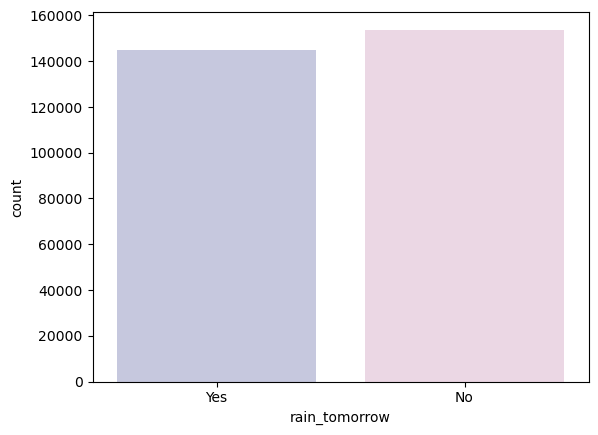

In [53]:
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= data["rain_tomorrow"], palette= cols)

<Axes: >

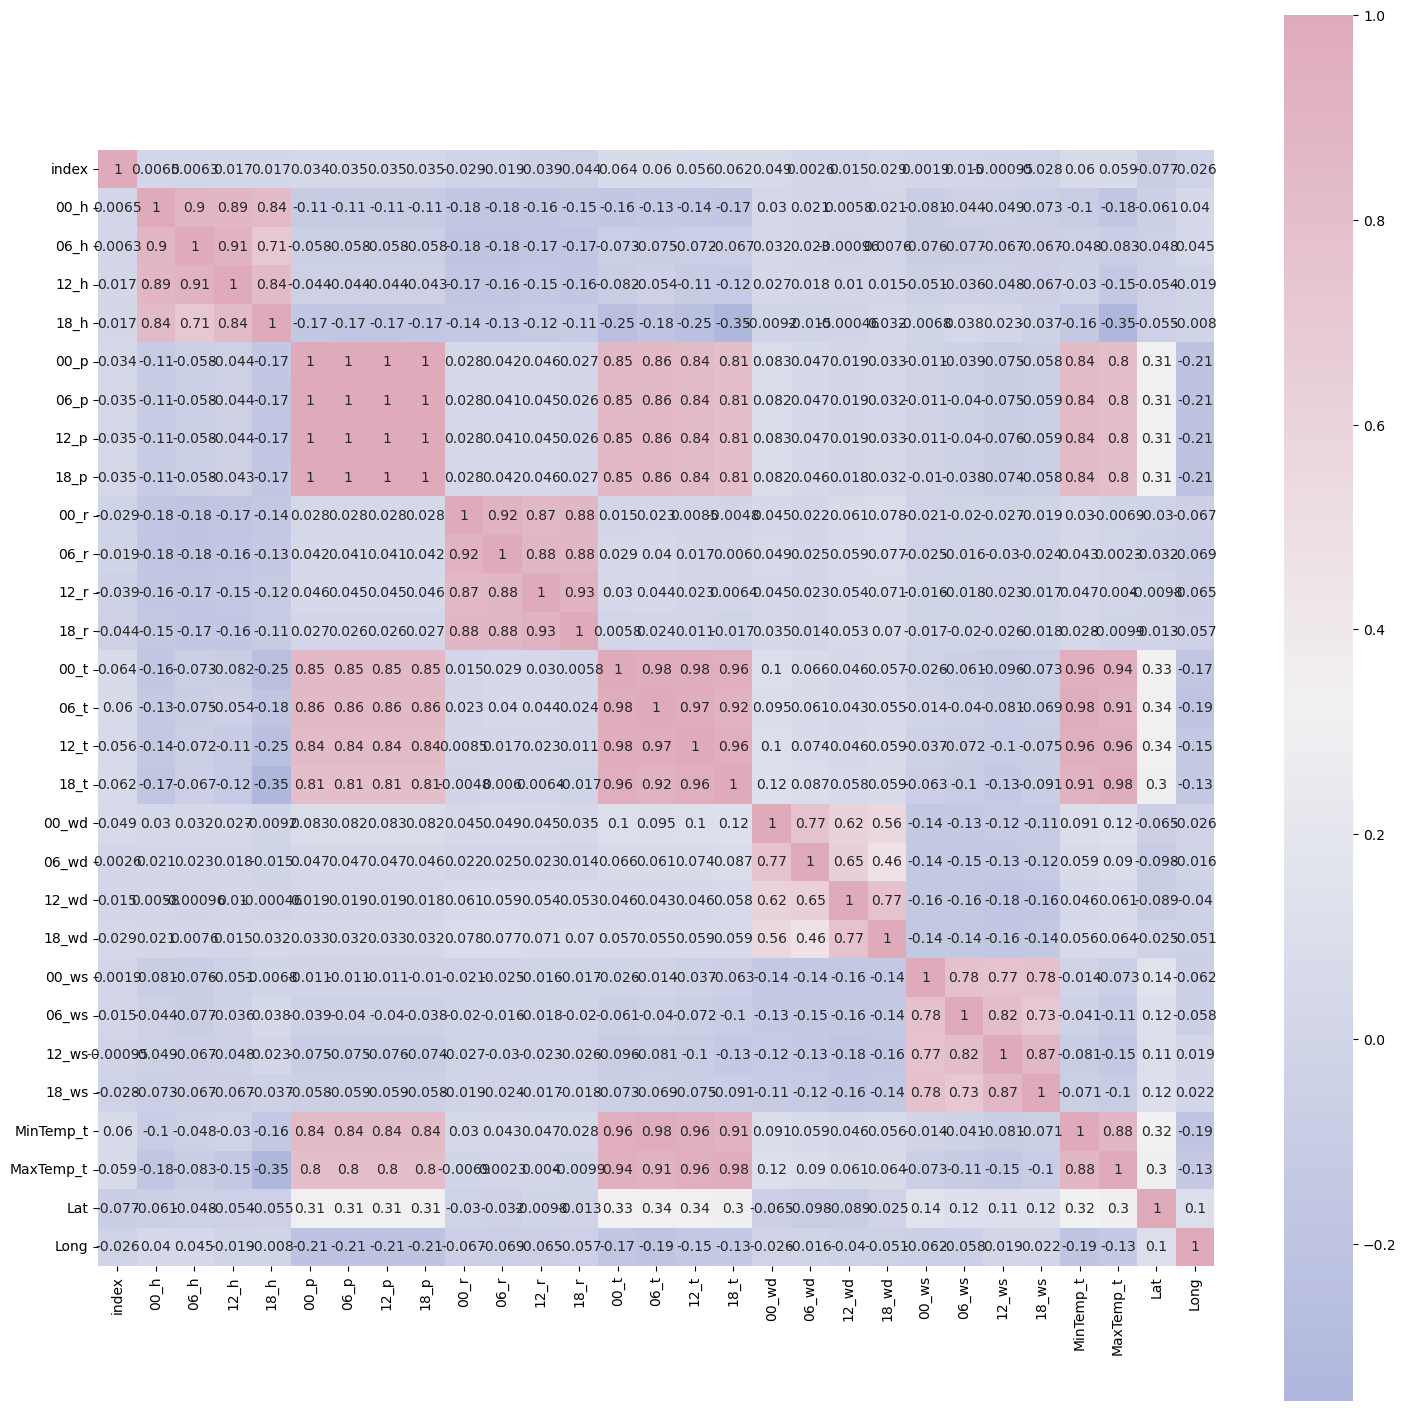

In [56]:
numeric_data = data.select_dtypes(include=['float32','float64', 'int64'])
corrmat = numeric_data.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

In [58]:
#There don't seem to be any error in dates so parsing values into datetime
data['Date']= pd.to_datetime(data["Date"])
#Creating a collumn of year
data['year'] = data.Date.dt.year

# function to encode datetime into cyclic parameters. 
#As I am planning to use this data in a neural network I prefer the months and days in a cyclic continuous feature. 

def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

data['month'] = data.Date.dt.month
data = encode(data, 'month', 12)

data['day'] = data.Date.dt.day
data = encode(data, 'day', 31)

data.head()

index      Dept     City       Date       00_h       06_h       12_h  \
0   1262  AMAZONAS  LETICIA 2017-02-17  89.666664  96.666664  88.166664   
1   1263  AMAZONAS  LETICIA 2017-02-18  92.333336  92.333336  94.833336   
2   1264  AMAZONAS  LETICIA 2017-02-19  95.333336  96.166664  86.500000   
3   1265  AMAZONAS  LETICIA 2017-02-20  94.666664  98.666664  95.000000   
4   1266  AMAZONAS  LETICIA 2017-02-21  90.500000  98.833336  85.500000   

        18_h         00_p         06_p  ...    Long  rain_today  \
0  77.800003  1000.683350  1001.899963  ... -69.941         Yes   
1  72.500000   999.266663  1002.000000  ... -69.941         Yes   
2  79.000000  1001.116699   998.883301  ... -69.941          No   
3  82.166664  1000.716614  1001.116699  ... -69.941         Yes   
4  63.833332   999.299988  1000.616699  ... -69.941         Yes   

   rain_tomorrow  year  month  month_sin  month_cos  day   day_sin   day_cos  
0            Yes  2017      2   0.866025        0.5   17 -0.299363 -0.954139  
1             No  2017      2   0.866025        0.5   18 -0.485302 -0.874347  
2            Yes  2017      2   0.866025        0.5   19 -0.651372 -0.758758  
3            Yes  2017      2   0.866025        0.5   20 -0.790776 -0.612106  
4            Yes  2017      2   0.866025        0.5   21 -0.897805 -0.440394  

[5 rows x 41 columns]

Text(0.5, 0, 'Days In Year')

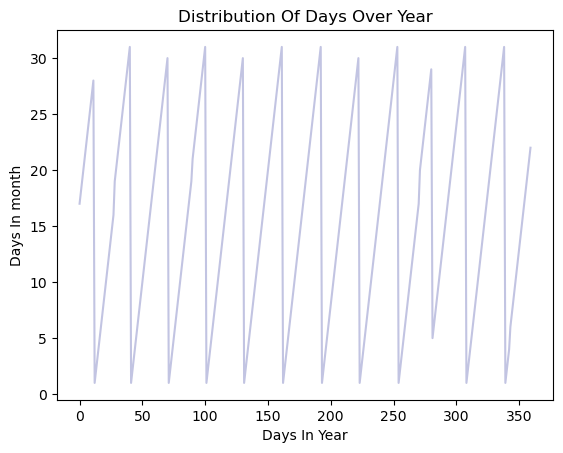

In [59]:
# roughly a year's span section 
section = data[:360] 
tm = section["day"].plot(color="#C2C4E2")
tm.set_title("Distribution Of Days Over Year")
tm.set_ylabel("Days In month")
tm.set_xlabel("Days In Year")

Text(0.5, 0, 'Sine Encoded Months')

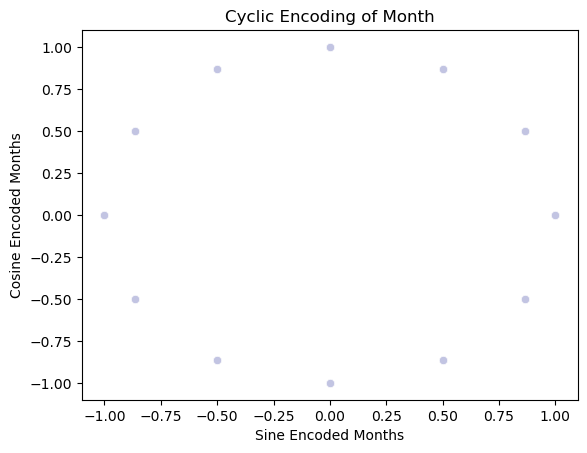

In [60]:
cyclic_month = sns.scatterplot(x="month_sin",y="month_cos",data=data, color="#C2C4E2")
cyclic_month.set_title("Cyclic Encoding of Month")
cyclic_month.set_ylabel("Cosine Encoded Months")
cyclic_month.set_xlabel("Sine Encoded Months")


In [61]:
# Get list of categorical variables
s = (data.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Dept', 'City', 'rain_today', 'rain_tomorrow']


In [62]:
# Missing values in categorical variables

for i in object_cols:
    print(i, data[i].isnull().sum())

Dept 0
City 0
rain_today 0
rain_tomorrow 1


In [63]:
# Filling missing values with mode of the column in value

for i in object_cols:
    data[i].fillna(data[i].mode()[0], inplace=True)

C:\Users\Josue Florez\AppData\Local\Temp\ipykernel_1120\1733177674.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].mode()[0], inplace=True)


In [64]:
# Get list of neumeric variables
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['00_r', '06_r', '12_r', '18_r', 'Lat', 'Long', 'month_sin', 'month_cos', 'day_sin', 'day_cos']


In [65]:
# Missing values in numeric variables

for i in num_cols:
    print(i, data[i].isnull().sum())

00_r 0
06_r 0
12_r 0
18_r 0
Lat 0
Long 0
month_sin 0
month_cos 0
day_sin 0
day_cos 0


In [66]:
# Filling missing values with median of the column in value

for i in num_cols:
    data[i].fillna(data[i].median(), inplace=True)
    
data.info()

C:\Users\Josue Florez\AppData\Local\Temp\ipykernel_1120\1421615967.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].median(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298460 entries, 0 to 298459
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   index          298460 non-null  int64         
 1   Dept           298460 non-null  object        
 2   City           298460 non-null  object        
 3   Date           298460 non-null  datetime64[ns]
 4   00_h           298460 non-null  float32       
 5   06_h           298460 non-null  float32       
 6   12_h           298460 non-null  float32       
 7   18_h           298460 non-null  float32       
 8   00_p           298460 non-null  float32       
 9   06_p           298460 non-null  float32       
 10  12_p           298460 non-null  float32       
 11  18_p           298460 non-null  float32       
 12  00_r           298460 non-null  float64       
 13  06_r           298460 non-null  float64       
 14  12_r           298460 non-null  float64       
 15  

Text(0.5, 0, 'Years')

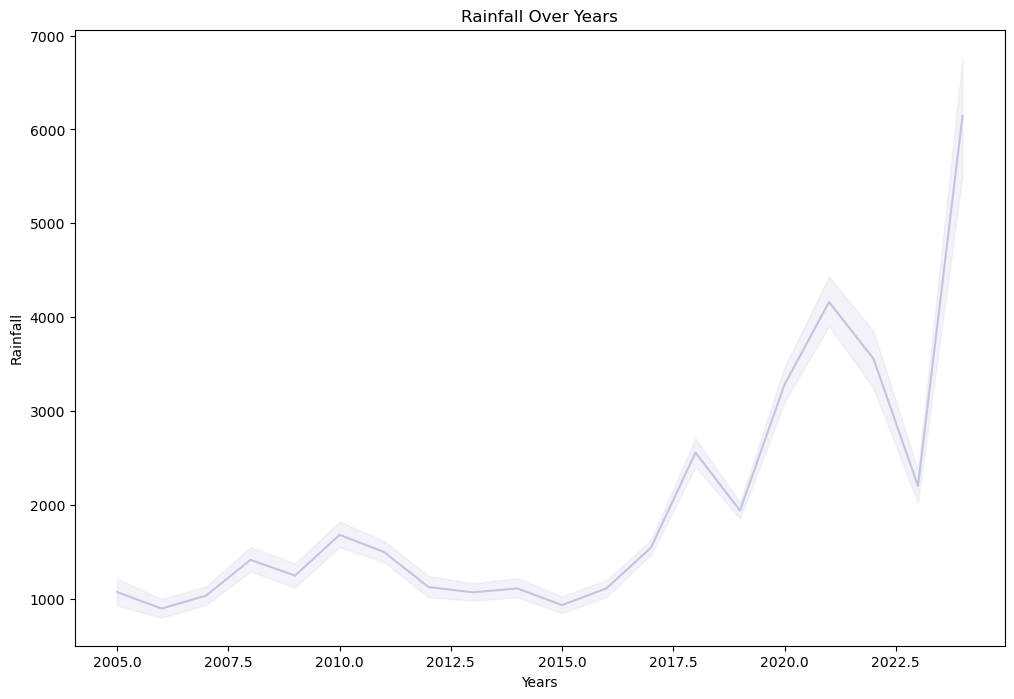

In [71]:
#plotting a lineplot rainfall over years
plt.figure(figsize=(12,8))
Time_series=sns.lineplot(x=data['Date'].dt.year,y="18_r",data=data,color="#C2C4E2")
Time_series.set_title("Rainfall Over Years")
Time_series.set_ylabel("Rainfall")
Time_series.set_xlabel("Years")

C:\Users\Josue Florez\AppData\Local\Temp\ipykernel_1120\3961458888.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  Days_of_week=sns.barplot(x=data['Date'].dt.year,y="00_ws",data=data, ci =None,palette = colours)
C:\Users\Josue Florez\AppData\Local\Temp\ipykernel_1120\3961458888.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  Days_of_week=sns.barplot(x=data['Date'].dt.year,y="00_ws",data=data, ci =None,palette = colours)
C:\Users\Josue Florez\AppData\Local\Temp\ipykernel_1120\3961458888.py:4: UserWarning: 
The palette list has fewer values (5) than needed (20) and will cycle, which may produce an uninterpretable plot.
  Days_of_week=sns.barplot(x=data['Date'].dt.year,y="00_ws",data=data, ci =None,palette = colours)


Text(0.5, 0, 'Year')

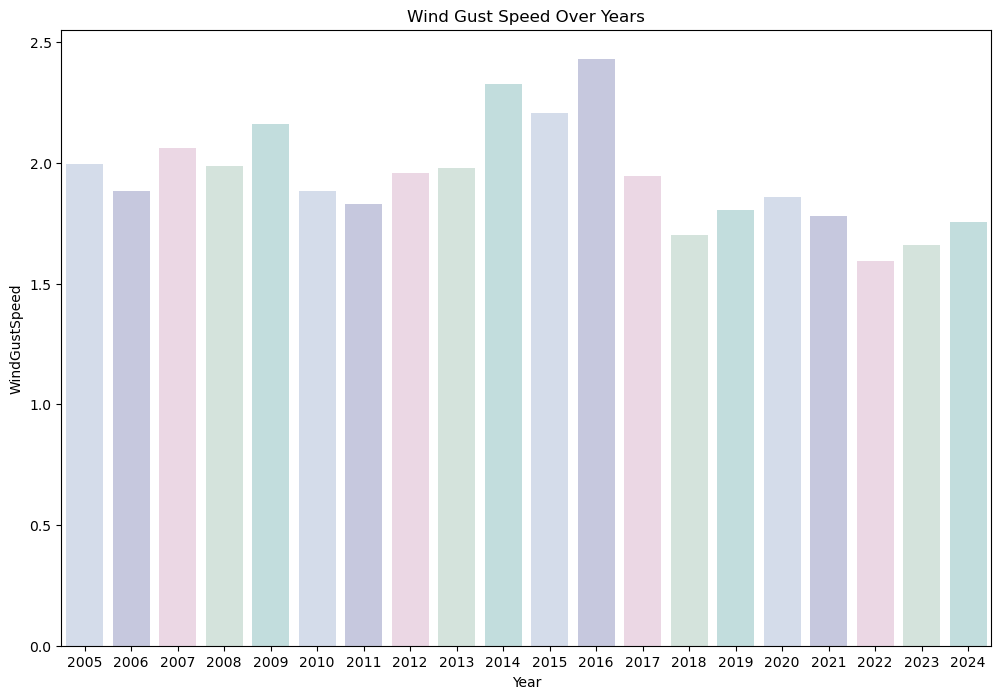

In [73]:
#Evauating Wind gust speed over years
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(12,8))
Days_of_week=sns.barplot(x=data['Date'].dt.year,y="00_ws",data=data, ci =None,palette = colours)
Days_of_week.set_title("Wind Gust Speed Over Years")
Days_of_week.set_ylabel("WindGustSpeed")
Days_of_week.set_xlabel("Year")

In [74]:
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for i in object_cols:
    data[i] = label_encoder.fit_transform(data[i])
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298460 entries, 0 to 298459
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   index          298460 non-null  int64         
 1   Dept           298460 non-null  int32         
 2   City           298460 non-null  int32         
 3   Date           298460 non-null  datetime64[ns]
 4   00_h           298460 non-null  float32       
 5   06_h           298460 non-null  float32       
 6   12_h           298460 non-null  float32       
 7   18_h           298460 non-null  float32       
 8   00_p           298460 non-null  float32       
 9   06_p           298460 non-null  float32       
 10  12_p           298460 non-null  float32       
 11  18_p           298460 non-null  float32       
 12  00_r           298460 non-null  float64       
 13  06_r           298460 non-null  float64       
 14  12_r           298460 non-null  float64       
 15  

In [75]:
# Prepairing attributes of scale data

features = data.drop(['rain_tomorrow', 'Date','day', 'month'], axis=1) # dropping target and extra columns

target = data['rain_tomorrow']

#Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) 

features.describe().T

count          mean       std       min       25%       50%  \
index       298460.0  3.656750e-17  1.000002 -1.769563 -0.859907 -0.109860   
Dept        298460.0 -7.008771e-17  1.000002 -1.814197 -0.875589 -0.171633   
City        298460.0 -1.215108e-16  1.000002 -1.660871 -0.939300  0.048112   
00_h        298460.0 -1.066552e-16  1.000002 -3.944265 -0.209071  0.300030   
06_h        298460.0 -6.513586e-17  1.000002 -4.055802 -0.113399  0.340017   
12_h        298460.0  1.683629e-16  1.000002 -3.970111 -0.266547  0.219025   
18_h        298460.0 -9.865607e-17  1.000002 -3.349365 -0.482628  0.132267   
00_p        298460.0  6.056492e-17  1.000002 -2.953256 -0.883385  0.014854   
06_p        298460.0 -2.740658e-16  1.000002 -2.945221 -0.882685  0.014522   
12_p        298460.0  5.561307e-17  1.000002 -2.952797 -0.884867  0.016275   
18_p        298460.0  2.761608e-16  1.000002 -2.948090 -0.886088  0.018824   
00_r        298460.0  3.123474e-17  1.000002 -0.140655 -0.140655 -0.140655   
06_r        298460.0  1.656965e-17  1.000002 -0.141679 -0.141679 -0.141679   
12_r        298460.0 -7.580138e-17  1.000002 -0.128726 -0.128726 -0.128726   
18_r        298460.0 -2.152150e-17  1.000002 -0.156811 -0.156811 -0.156811   
00_t        298460.0 -2.114059e-16  1.000002 -2.734807 -0.792367  0.045149   
06_t        298460.0  1.915985e-16  1.000002 -2.547968 -0.813257  0.055391   
12_t        298460.0  6.170766e-17  1.000002 -2.995381 -0.776257  0.069765   
18_t        298460.0 -7.313500e-17  1.000002 -3.119010 -0.745524  0.069322   
00_wd       298460.0 -1.020843e-16  1.000002 -1.957616 -0.631365  0.065231   
06_wd       298460.0  8.760964e-17  1.000002 -1.988019 -0.619945  0.087463   
12_wd       298460.0  1.378900e-16  1.000002 -2.200161 -0.500805  0.144162   
18_wd       298460.0  1.279863e-16  1.000002 -1.962758 -0.663902  0.066302   
00_ws       298460.0 -2.056922e-17  1.000002 -0.834449 -0.424347 -0.227447   
06_ws       298460.0  3.323453e-17  1.000002 -0.786599 -0.413768 -0.234652   
12_ws       298460.0 -5.104214e-17  1.000002 -0.936531 -0.439317 -0.254242   
18_ws       298460.0  2.380697e-17  1.000002 -1.118162 -0.488731 -0.214069   
MinTemp_t   298460.0 -1.335095e-16  1.000002 -2.355623 -0.809795  0.063311   
MaxTemp_t   298460.0  1.816948e-16  1.000002 -3.391744 -0.724108  0.120420   
Lat         298460.0  4.601411e-16  1.000002 -3.696764 -0.535012 -0.125620   
Long        298460.0  1.427504e-14  1.000002 -3.699400 -0.635464 -0.006172   
rain_today  298460.0 -7.027817e-17  1.000002 -0.969994 -0.969994 -0.969994   
year        298460.0 -1.963980e-15  1.000002 -3.190156 -0.286505  0.197437   
month_sin   298460.0 -5.285147e-18  1.000002 -1.404166 -1.215624  0.003129   
month_cos   298460.0 -3.161565e-17  1.000002 -1.393490 -1.203003  0.028323   
day_sin     298460.0  3.081812e-17  1.000002 -1.400154 -1.016529 -0.001469   
day_cos     298460.0 -2.735421e-17  1.000002 -1.406229 -1.068940 -0.057394   

                 75%        max  
index       0.890098   1.879512  
Dept        0.884301   1.822909  
City        0.820319   1.731777  
00_h        0.629606   0.878797  
06_h        0.601862   0.705013  
12_h        0.606908   1.201662  
18_h        0.673207   1.636265  
00_p        1.058109   2.229201  
06_p        1.056700   2.588611  
12_p        1.059036   1.913062  
18_p        1.058707   1.943423  
00_r       -0.127803  35.229523  
06_r       -0.126776  48.976008  
12_r       -0.121433  33.640675  
18_r       -0.126010  46.529862  
00_t        0.926424   3.684885  
06_t        0.935325   4.744341  
12_t        0.902439   4.097615  
18_t        0.856043   3.322042  
00_wd       0.681266   2.693534  
06_wd       0.668064   2.782021  
12_wd       0.676184   2.960773  
18_wd       0.716916   2.377826  
00_ws       0.099882  33.781856  
06_ws       0.081500  35.583220  
12_ws       0.100925  33.442946  
18_ws       0.207078  31.017193  
MinTemp_t   0.936418   3.226533  
MaxTemp_t   0.830896   3.310860  
Lat         0.523215   2.79027

C:\Users\Josue Florez\AppData\Local\Temp\ipykernel_1120\2961525613.py:5: UserWarning: 
The palette list has fewer values (5) than needed (37) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = features,palette = colours)


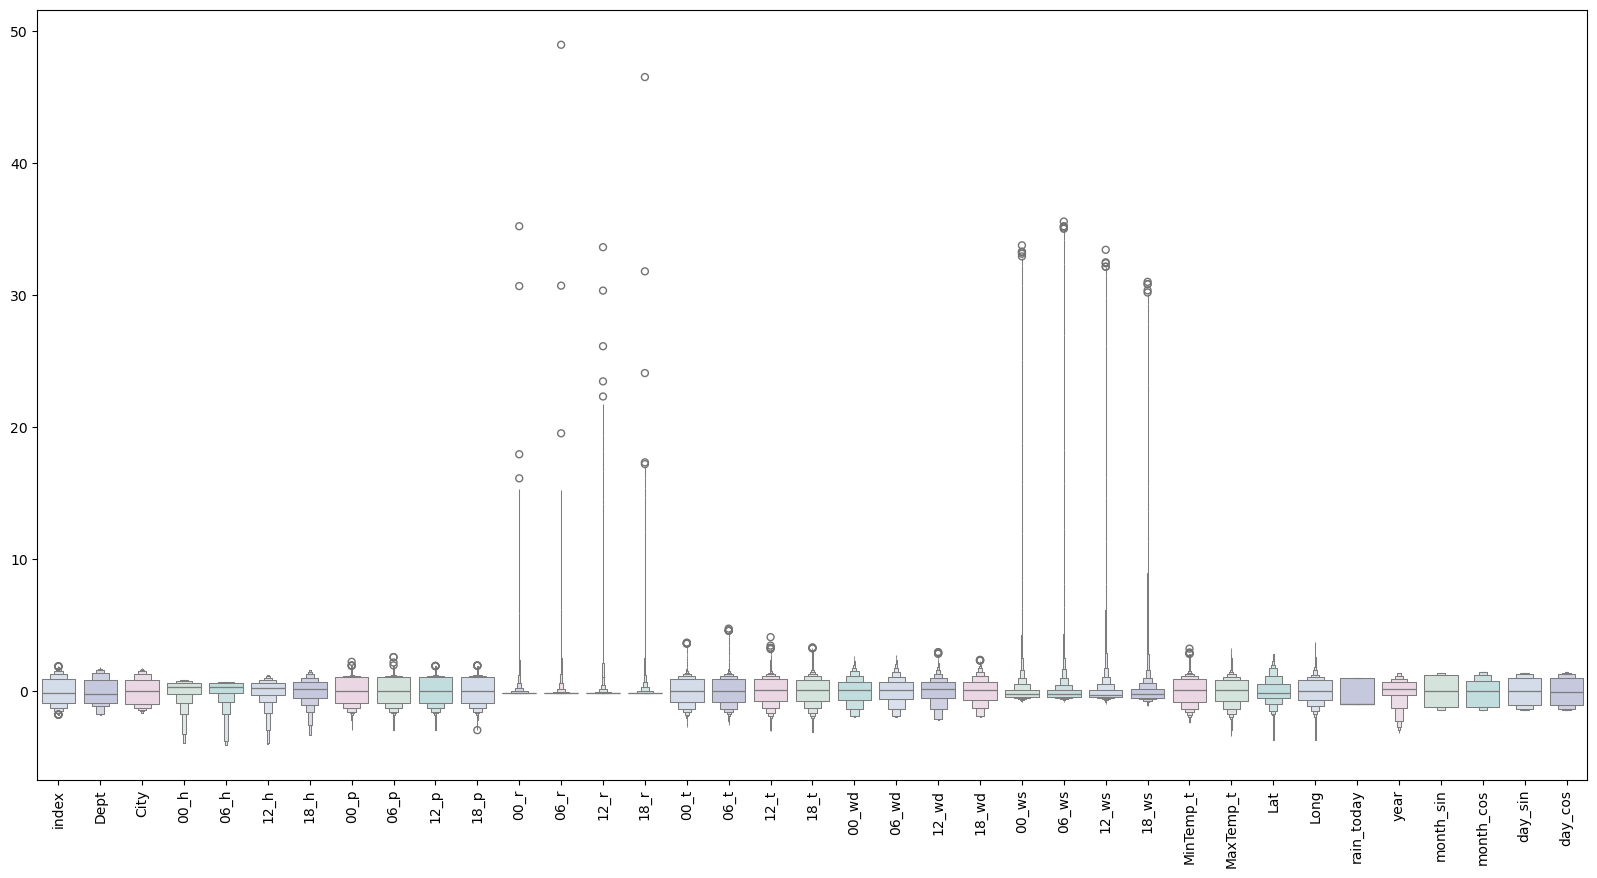

In [76]:
#Detecting outliers
#looking at the scaled features
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [110]:
features["rain_tomorrow"] = target

features = features[(features["MinTemp_t"]<1.5)&(features["MinTemp_t"]>-1.5)]
features = features[(features["MaxTemp_t"]<1.5)&(features["MaxTemp_t"]>-1.5)]
features = features[(features["00_r"]<0.2)]
features = features[(features["06_r"]<0.2)]
features = features[(features["12_r"]<0.2)]
features = features[(features["18_r"]<0.2)]
features = features[(features["00_wd"]<1)&(features["00_wd"]>-0.6)]
features = features[(features["06_wd"]<1)&(features["06_wd"]>-0.6)]
features = features[(features["12_wd"]<1)&(features["12_wd"]>-0.6)]
features = features[(features["18_wd"]<1)&(features["18_wd"]>-0.6)]
features = features[(features["00_ws"]<0.6)]
features = features[(features["06_ws"]<0.6)]
features = features[(features["12_ws"]<0.6)]
features = features[(features["18_ws"]<0.6)]
features = features[(features["00_h"]>-0.8)]
features = features[(features["06_h"]>-0.8)]
features = features[(features["12_h"]>-0.8)]
features = features[(features["18_h"]>-0.8)]
features = features[(features["00_p"]< 1.1)&(features["00_p"]>-1.2)]
features = features[(features["06_p"]< 1.1)&(features["06_p"]>-1.2)]
features = features[(features["12_p"]< 1.1)&(features["12_p"]>-1.2)]
features = features[(features["18_p"]< 1.1)&(features["18_p"]>-1.2)]
features = features[(features["00_t"]<1)&(features["00_t"]>-1)]
features = features[(features["06_t"]<1)&(features["06_t"]>-1)]
features = features[(features["12_t"]<1)&(features["12_t"]>-1)]
features = features[(features["18_t"]<1)&(features["18_t"]>-1)]


features.shape

(21325, 38)

C:\Users\Josue Florez\AppData\Local\Temp\ipykernel_1120\682696419.py:2: UserWarning: 
The palette list has fewer values (5) than needed (38) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = features,palette = colours)


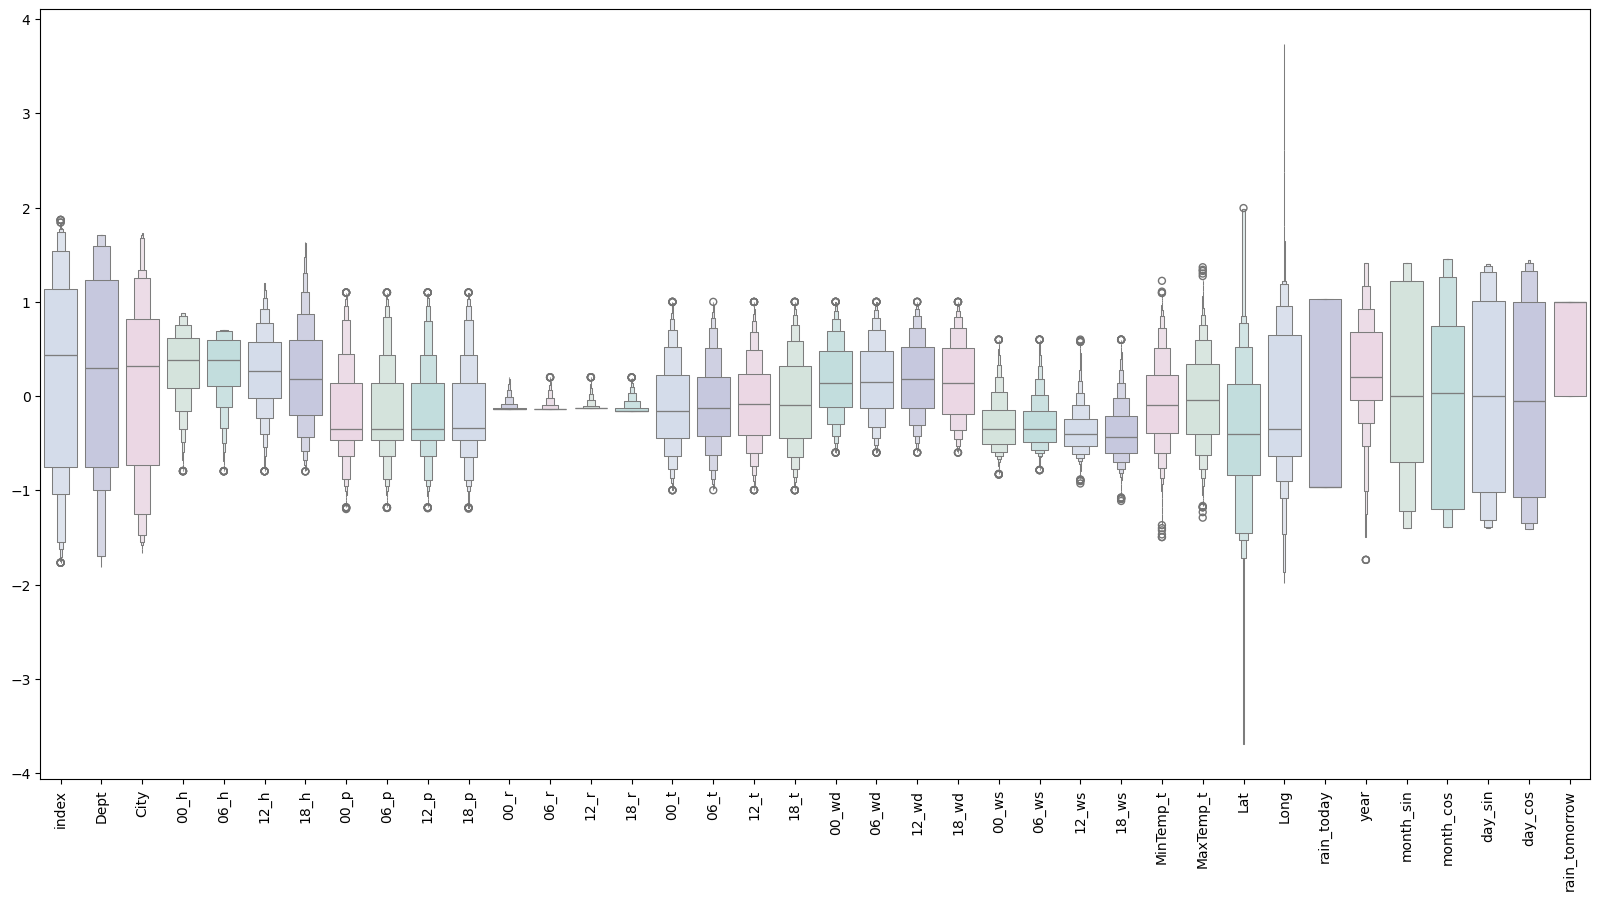

In [111]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [120]:
X = features.drop(["rain_tomorrow"], axis=1)
y = features["rain_tomorrow"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

X.shape

(21325, 37)

In [103]:
!pip install keras-tuner -q

In [125]:

from tensorflow import keras
from keras_tuner import RandomSearch

# Define el modelo como una función
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(
        units=hp.Int('units', min_value=16, max_value=128, step=16),
        activation='relu',
        input_dim=37))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

# Configurar la búsqueda
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,  # Número de combinaciones a probar
    executions_per_trial=1,  # Entrenamientos por combinación
    directory='tuner_results',  # Directorio para guardar resultados
    project_name='hyperparam_tuning'
)

# Ejecutar la búsqueda
tuner.search(X_train, y_train, epochs=100, validation_split=0.5, batch_size=32)

# Imprimir los mejores hiperparámetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Mejor número de unidades: {best_hps.get('units')}")
print(f"Mejor tasa de aprendizaje: {best_hps.get('learning_rate')}")



Reloading Tuner from tuner_results\hyperparam_tuning\tuner0.json
Mejor número de unidades: 112
Mejor tasa de aprendizaje: 0.001


In [126]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 112, kernel_initializer = 'uniform', activation = 'relu', input_dim = 37))
model.add(Dense(units = 112, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 56, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 28, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 100, callbacks=[early_stopping], validation_split=0.5)

c:\Users\Josue Florez\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5560 - loss: 0.6842 - val_accuracy: 0.6380 - val_loss: 0.6501
Epoch 2/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6291 - loss: 0.6525 - val_accuracy: 0.6438 - val_loss: 0.6452
Epoch 3/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6469 - loss: 0.6413 - val_accuracy: 0.6473 - val_loss: 0.6374
Epoch 4/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6588 - loss: 0.6288 - val_accuracy: 0.6451 - val_loss: 0.6407
Epoch 5/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6472 - loss: 0.6297 - val_accuracy: 0.6447 - val_loss: 0.6343
Epoch 6/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6648 - loss: 0.6221 - val_accuracy: 0.6545 - val_loss: 0.6295
Epoch 7/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6740 - loss: 0.6149 - val_accuracy: 0.6513 - val_loss: 0.6288
Epoch 8/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6849 - loss: 0.6049 - val_acc

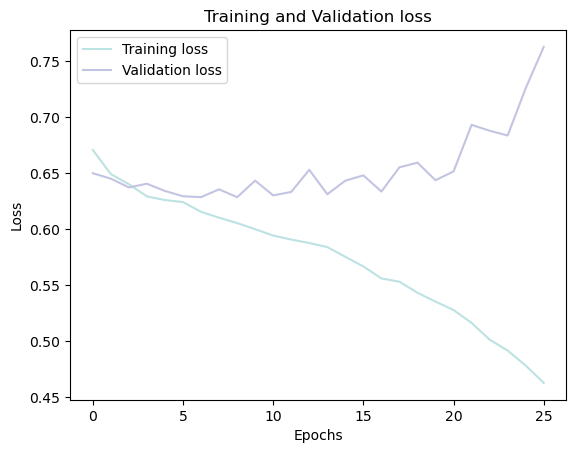

In [127]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

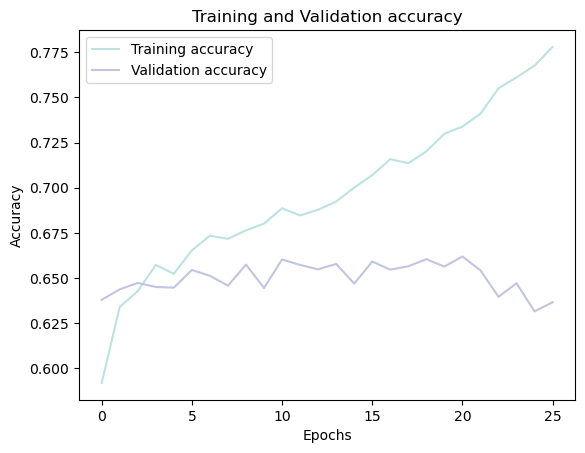

In [128]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [129]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


<Axes: >

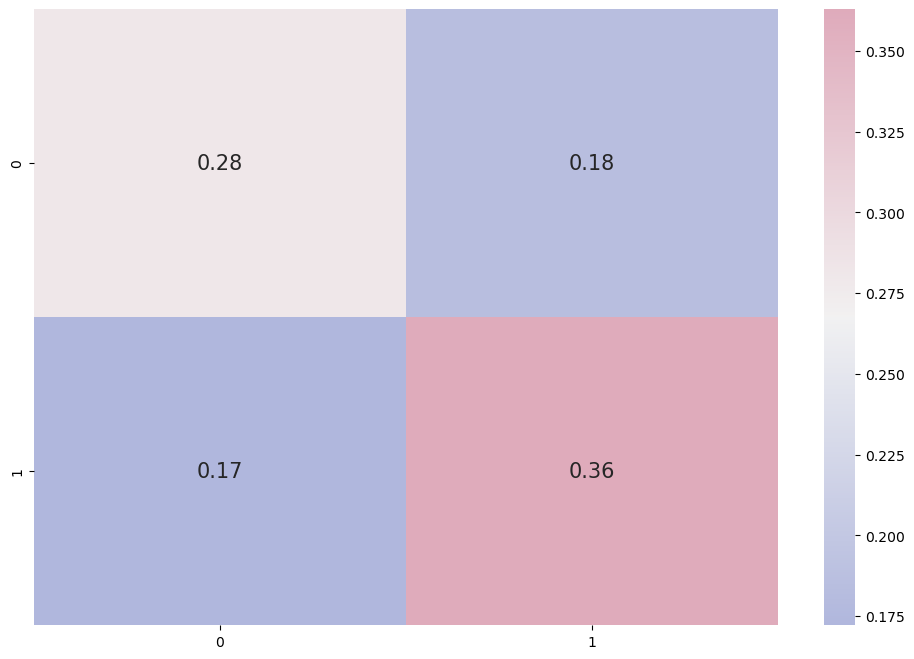

In [130]:
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [131]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.62      0.60      0.61      4958
           1       0.66      0.68      0.67      5705

    accuracy                           0.64     10663
   macro avg       0.64      0.64      0.64     10663
weighted avg       0.64      0.64      0.64     10663

